# Lending Club Data Analysis

These data set contain complete loan data for all loans issued through the 2007-2015, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. The file containing loan data through the "present" contains complete loan data for all loans issued through the previous completed calendar quarter. Additional features include credit scores, number of finance inquiries, address including zip codes, and state, and collections among others. The data set is a matrix of about 890 thousand observations and 75 variables. A data dictionary is provided in a separate file. 

In [1]:
# Data: https://www.kaggle.com/wendykan/lending-club-loan-data/data
loan <- read.csv("C:/Users/yuanq/Desktop/bittiger/loan.csv", stringsAsFactors = FALSE)
loanT <- loan

# Data structure

### Understand the data

In [2]:
summary(loan)

       id             member_id          loan_amnt      funded_amnt   
 Min.   :   54734   Min.   :   70473   Min.   :  500   Min.   :  500  
 1st Qu.: 9206643   1st Qu.:10877134   1st Qu.: 8000   1st Qu.: 8000  
 Median :34433267   Median :37095283   Median :13000   Median :13000  
 Mean   :32465133   Mean   :35001825   Mean   :14755   Mean   :14742  
 3rd Qu.:54908135   3rd Qu.:58471347   3rd Qu.:20000   3rd Qu.:20000  
 Max.   :68617057   Max.   :73544841   Max.   :35000   Max.   :35000  
                                                                      
 funded_amnt_inv     term              int_rate      installment     
 Min.   :    0   Length:887379      Min.   : 5.32   Min.   :  15.67  
 1st Qu.: 8000   Class :character   1st Qu.: 9.99   1st Qu.: 260.70  
 Median :13000   Mode  :character   Median :12.99   Median : 382.55  
 Mean   :14702                      Mean   :13.25   Mean   : 436.72  
 3rd Qu.:20000                      3rd Qu.:16.20   3rd Qu.: 572.60  
 Max.   :350

In [10]:
#data structure
str(loan)

'data.frame':	887379 obs. of  74 variables:
 $ id                         : int  1077501 1077430 1077175 1076863 1075358 1075269 1069639 1072053 1071795 1071570 ...
 $ member_id                  : int  1296599 1314167 1313524 1277178 1311748 1311441 1304742 1288686 1306957 1306721 ...
 $ loan_amnt                  : num  5000 2500 2400 10000 3000 ...
 $ funded_amnt                : num  5000 2500 2400 10000 3000 ...
 $ funded_amnt_inv            : num  4975 2500 2400 10000 3000 ...
 $ term                       : chr  " 36 months" " 60 months" " 36 months" " 36 months" ...
 $ int_rate                   : num  10.6 15.3 16 13.5 12.7 ...
 $ installment                : num  162.9 59.8 84.3 339.3 67.8 ...
 $ grade                      : chr  "B" "C" "C" "C" ...
 $ sub_grade                  : chr  "B2" "C4" "C5" "C1" ...
 $ emp_title                  : chr  "" "Ryder" "" "AIR RESOURCES BOARD" ...
 $ emp_length                 : chr  "10+ years" "< 1 year" "10+ years" "10+ years" ...
 $ ho

In [11]:
#data dimension
dim(loan)

[1] 887379     74

In [12]:
#top 6 rows
head(loan)

id      member_id loan_amnt funded_amnt funded_amnt_inv term       int_rate
1 1077501 1296599    5000      5000        4975            36 months 10.65   
2 1077430 1314167    2500      2500        2500            60 months 15.27   
3 1077175 1313524    2400      2400        2400            36 months 15.96   
4 1076863 1277178   10000     10000       10000            36 months 13.49   
5 1075358 1311748    3000      3000        3000            60 months 12.69   
6 1075269 1311441    5000      5000        5000            36 months  7.90   
  installment grade sub_grade ... total_bal_il il_util open_rv_12m open_rv_24m
1 162.87      B     B2        ... NA           NA      NA          NA         
2  59.83      C     C4        ... NA           NA      NA          NA         
3  84.33      C     C5        ... NA           NA      NA          NA         
4 339.31      C     C1        ... NA           NA      NA          NA         
5  67.79      B     B5        ... NA           NA      NA          NA         
6 156.46      A     A4        ... NA           NA      NA          NA         
  max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m
1 NA         NA       NA               NA     NA          NA          
2 NA         NA       NA               NA     NA          NA          
3 NA         NA       NA               NA     NA          NA          
4 NA         NA       NA               NA     NA          NA          
5 NA         NA       NA               NA     NA          NA          
6 NA         NA       NA               NA     NA          NA

In [3]:
loan_names <- colnames(loan)
loan_names

[1] "id"                          "member_id"                  
 [3] "loan_amnt"                   "funded_amnt"                
 [5] "funded_amnt_inv"             "term"                       
 [7] "int_rate"                    "installment"                
 [9] "grade"                       "sub_grade"                  
[11] "emp_title"                   "emp_length"                 
[13] "home_ownership"              "annual_inc"                 
[15] "verification_status"         "issue_d"                    
[17] "loan_status"                 "pymnt_plan"                 
[19] "url"                         "desc"                       
[21] "purpose"                     "title"                      
[23] "zip_code"                    "addr_state"                 
[25] "dti"                         "delinq_2yrs"                
[27] "earliest_cr_line"            "inq_last_6mths"             
[29] "mths_since_last_delinq"      "mths_since_last_record"     
[31] "open_acc"                    "pub_rec"                    
[33] "revol_bal"                   "revol_util"                 
[35] "total_acc"                   "initial_list_status"        
[37] "out_prncp"                   "out_prncp_inv"              
[39] "total_pymnt"                 "total_pymnt_inv"            
[41] "total_rec_prncp"             "total_rec_int"              
[43] "total_rec_late_fee"          "recoveries"                 
[45] "collection_recovery_fee"     "last_pymnt_d"               
[47] "last_pymnt_amnt"             "next_pymnt_d"               
[49] "last_credit_pull_d"          "collections_12_mths_ex_med" 
[51] "mths_since_last_major_derog" "policy_code"                
[53] "application_type"            "annual_inc_joint"           
[55] "dti_joint"                   "verification_status_joint"  
[57] "acc_now_delinq"              "tot_coll_amt"               
[59] "tot_cur_bal"                 "open_acc_6m"                
[61] "open_il_6m"                  "open_il_12m"                
[63] "open_il_24m"                 "mths_since_rcnt_il"         
[65] "total_bal_il"                "il_util"                    
[67] "open_rv_12m"                 "open_rv_24m"                
[69] "max_bal_bc"                  "all_util"                   
[71] "total_rev_hi_lim"            "inq_fi"                     
[73] "total_cu_tl"                 "inq_last_12m"

In [14]:
# Check dictionary and cluster features into groups for better understanding.
length(unique(loan$id))

[1] 887379

unique id equals to the number of rows of data set(no two same id)

In [15]:
length(unique(loan$member_id))

[1] 887379

unique member-id equals to the number of rows of data set(no two same id)

# Meaning of data fields

In [16]:
#data dictionary
library(readxl)
dataDictionary <- read_excel("C:/Users/yuanq/Desktop/bittiger/LCDataDictionary.xlsx")
dataDictionary

LoanStatNew               
1   addr_state                
2   annual_inc                
3   annual_inc_joint          
4   application_type          
5   collection_recovery_fee   
6   collections_12_mths_ex_med
7   delinq_2yrs               
8   desc                      
9   dti                       
10  dti_joint                 
11  earliest_cr_line          
12  emp_length                
13  emp_title                 
14  fico_range_high           
15  fico_range_low            
16  funded_amnt               
17  funded_amnt_inv           
18  grade                     
19  home_ownership            
20  id                        
21  initial_list_status       
22  inq_last_6mths            
23  installment               
24  int_rate                  
25  is_inc_v                  
26  issue_d                   
27  last_credit_pull_d        
28  last_fico_range_high      
29  last_fico_range_low       
30  last_pymnt_amnt           
... ...                       
49  sub_grade                 
50  term                      
51  title                     
52  total_acc                 
53  total_pymnt               
54  total_pymnt_inv           
55  total_rec_int             
56  total_rec_late_fee        
57  total_rec_prncp           
58  url                       
59  verified_status_joint     
60  zip_code                  
61  open_acc_6m               
62  open_il_6m                
63  open_il_12m               
64  open_il_24m               
65  mths_since_rcnt_il        
66  total_bal_il              
67  il_util                   
68  open_rv_12m               
69  open_rv_24m               
70  max_bal_bc                
71  all_util                  
72  total_rev_hi_lim          
73  inq_fi                    
74  total_cu_tl               
75  inq_last_12m              
76  acc_now_delinq            
77  tot_coll_amt              
78  tot_cur_bal               
    Description                                                                                                                                                                                                       
1   The state provided by the borrower in the loan application                                                                                                                                                        
2   The self-reported annual income provided by the borrower during registration.                                                                                                                                     
3   The combined self-reported annual income provided by the co-borrowers during registration                                                                                                                         
4   Indicates whether the loan is an individual application or a joint application with two co-borrowers                                                                                                              
5   post charge off collection fee                                                                                                                                                                                    
6   Number of collections in 12 months excluding medical collections                                                                                                                                                  
7   The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years                                                                                                      
8   Loan description provided by the borrower                                                                                                                                                                         
9   A ratio calculated using the borrowers total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan

### cluster data into groups according to the meaning

In [18]:
dataDictionaryCluster <- read_excel("C:/Users/yuanq/Desktop/bittiger/LCDataDictionary2.xlsx")
dataDictionaryCluster

LoanStatNew                      
1   User feature (general)           
2   addr_state                       
3   emp_length                       
4   emp_title                        
5   home_ownership                   
6   member_id                        
7   zip_code                         
8   NA                               
9   User feature (financial specific)
10  Income                           
11  annual_inc                       
12  annual_inc_joint                 
13  is_inc_v                         
14  verified_status_joint            
15  dti                              
16  dti_joint                        
17  NA                               
18  Credit scores                    
19  earliest_cr_line                 
20  fico_range_high                  
21  fico_range_low                   
22  last_fico_range_high             
23  last_fico_range_low              
24  inq_fi                           
25  inq_last_12m                     
26  inq_last_6mths                   
27  last_credit_pull_d               
28  NA                               
29  Credit lines                     
30  total_acc                        
... ...                              
66  issue_d                          
67  initial_list_status              
68  NA                               
69  Loan payment feature             
70  loan_amnt                        
71  installment                      
72  funded_amnt                      
73  funded_amnt_inv                  
74  last_pymnt_amnt                  
75  last_pymnt_d                     
76  next_pymnt_d                     
77  pymnt_plan                       
78  recoveries                       
79  total_pymnt                      
80  total_pymnt_inv                  
81  total_rec_int                    
82  total_rec_late_fee               
83  total_rec_prncp                  
84  collection_recovery_fee          
85  out_prncp                        
86  out_prncp_inv                    
87  NA                               
88  Potential response variables     
89  grade                            
90  sub_grade                        
91  int_rate                         
92  loan_status                      
93  NA                               
94  NA                               
95  NA                               
    Description                                                                                                                                                                                                       
1   NA                                                                                                                                                                                                                
2   The state provided by the borrower in the loan application                                                                                                                                                        
3   Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.                                                                                 
4   The job title supplied by the Borrower when applying for the loan.*                                                                                                                                               
5   The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.                                                                                               
6   A unique LC assigned Id for the borrower member.                                                                                                                                                                  
7   The first 3 numbers of the zip code provided by the borrower in the loan application.                                                      


 ### Potential target
  - grade
  - sub-grade
  - int_rate
  - loan_status

# Missing data

In [4]:
#Check the missing value of this data set
num.NA <- sort(sapply(loan, function(x) {sum(is.na(x))}), decreasing=TRUE)
sum(is.na(loan)) / (nrow(loan) *ncol(loan))

[1] 0.2434001

How to deal with missing data
  - (1) Remove features with too many missing value, 
     or remove all rows with NA if you have a lot of data
  - (2) If not missing at random, add new level to represent NA, impute with 0,
     or generate new feature.
  - (3) If missing at random, imputation using summary stats(median, mean, mode), or modeling way(e.g. tree based model->mice library)


In [20]:
dfnum.NA <- data.frame(name=names(num.NA), per50 = num.NA/nrow(loan)>=0.5,percentage=num.NA/dim(loan)[1], row.names = NULL)
head(dfnum.NA)

name               per50 percentage
1 dti_joint          TRUE  0.9994264 
2 annual_inc_joint   TRUE  0.9994241 
3 il_util            TRUE  0.9790202 
4 mths_since_rcnt_il TRUE  0.9765489 
5 open_acc_6m        TRUE  0.9759156 
6 open_il_6m         TRUE  0.9759156

In [21]:
library(ggplot2)
ggplot(data = dfnum.NA, aes(x=name, y=percentage)) + 
  geom_bar(aes(fill=per50), stat="identity") + 
  scale_x_discrete(name ="column names", 
                   limits=dfnum.NA$name)+
  theme(axis.text.x = element_text(angle=90, hjust=1, vjust=1),
        legend.position = "none") +
  geom_hline(yintercept = 0.5) + 
  ggtitle("percentage of missing")

Warning message:
"package 'ggplot2' was built under R version 3.4.3"

In [5]:
#drop the fields which have more than 50% missing value
remain.col <- names(num.NA)[which(num.NA <= 0.5 * dim(loan)[1])]
loan <- loan[, remain.col]

In [9]:
missing_column <- names(num.NA)[which(num.NA > 0.5 * dim(loan)[1])]
missing_column

[1] "dti_joint"                   "annual_inc_joint"           
 [3] "il_util"                     "mths_since_rcnt_il"         
 [5] "open_acc_6m"                 "open_il_6m"                 
 [7] "open_il_12m"                 "open_il_24m"                
 [9] "total_bal_il"                "open_rv_12m"                
[11] "open_rv_24m"                 "max_bal_bc"                 
[13] "all_util"                    "inq_fi"                     
[15] "total_cu_tl"                 "inq_last_12m"               
[17] "mths_since_last_record"      "mths_since_last_major_derog"
[19] "mths_since_last_delinq"

# Data Exploration

 How do we explore data?
  - Uni-variate
    - 1) Numeric variables
    - 2) Categorical variables
    
  - bi-variates
    - 3) Numeric variable with numerical response
    - 4) Categorical variable with numerical response
    - 5) Categorical variable with categorical response

In [48]:
#target variable-- interest rate
response = loan$int_rate
features = loan[, -which(colnames(loan)=="int_rate")]
colnames(features)

[1] "tot_coll_amt"               "tot_cur_bal"               
 [3] "total_rev_hi_lim"           "revol_util"                
 [5] "collections_12_mths_ex_med" "delinq_2yrs"               
 [7] "inq_last_6mths"             "open_acc"                  
 [9] "pub_rec"                    "total_acc"                 
[11] "acc_now_delinq"             "annual_inc"                
[13] "id"                         "member_id"                 
[15] "loan_amnt"                  "funded_amnt"               
[17] "funded_amnt_inv"            "term"                      
[19] "installment"                "grade"                     
[21] "sub_grade"                  "emp_title"                 
[23] "emp_length"                 "home_ownership"            
[25] "verification_status"        "issue_d"                   
[27] "loan_status"                "pymnt_plan"                
[29] "url"                        "desc"                      
[31] "purpose"                    "title"                     
[33] "zip_code"                   "addr_state"                
[35] "dti"                        "earliest_cr_line"          
[37] "revol_bal"                  "initial_list_status"       
[39] "out_prncp"                  "out_prncp_inv"             
[41] "total_pymnt"                "total_pymnt_inv"           
[43] "total_rec_prncp"            "total_rec_int"             
[45] "total_rec_late_fee"         "recoveries"                
[47] "collection_recovery_fee"    "last_pymnt_d"              
[49] "last_pymnt_amnt"            "next_pymnt_d"              
[51] "last_credit_pull_d"         "policy_code"               
[53] "application_type"           "verification_status_joint"

In [51]:
# numeric variables
mean(loan$int_rate)
sd(loan$int_rate)
median(loan$int_rate)
quantile(loan$int_rate, c(0.1, 0.25, 0.5, 0.75, 0.9))

[1] 13.24674

[1] 4.381867

[1] 12.99

10%   25%   50%   75%   90% 
 7.69  9.99 12.99 16.20 18.99

In [52]:
plot(density(loan$int_rate))

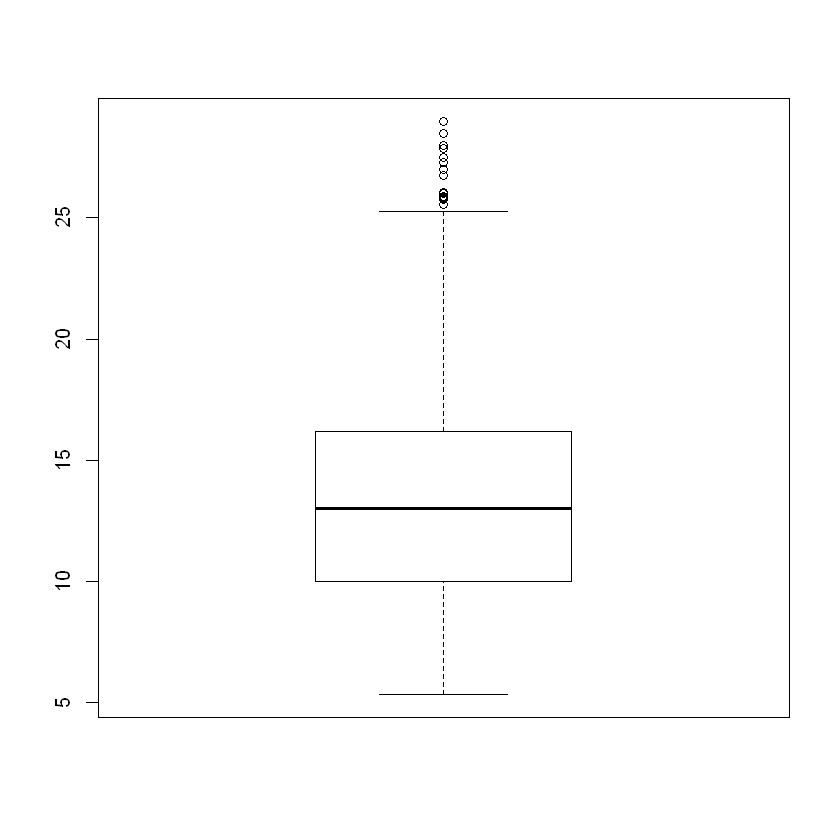

In [53]:
# Q1 - 1.5IQR, Q1, median, Q3, Q3 + 1.5IQR, where IQR is interquartile range: Q3 - Q1
boxplot(loan$int_rate)

In [72]:
plothistdensity <- function(data, nbins){
    options(repr.plot.width=8, repr.plot.height=5)
    p <- ggplot(data, aes(x=int_rate, y = ..density..))
    p <- p + geom_histogram(aes(y=..count../sum(..count..)),
                           bins = nbins,
                           color = "white",
                           fill="orange")
    p <- p + geom_density()
    p + theme_dark() + 
    ylab("Normalized_Count") + 
    ggtitle(paste(paste("int_rate : ", nbins), " bins histogram with density" ))  
}
plothistdensity(loan, 10)

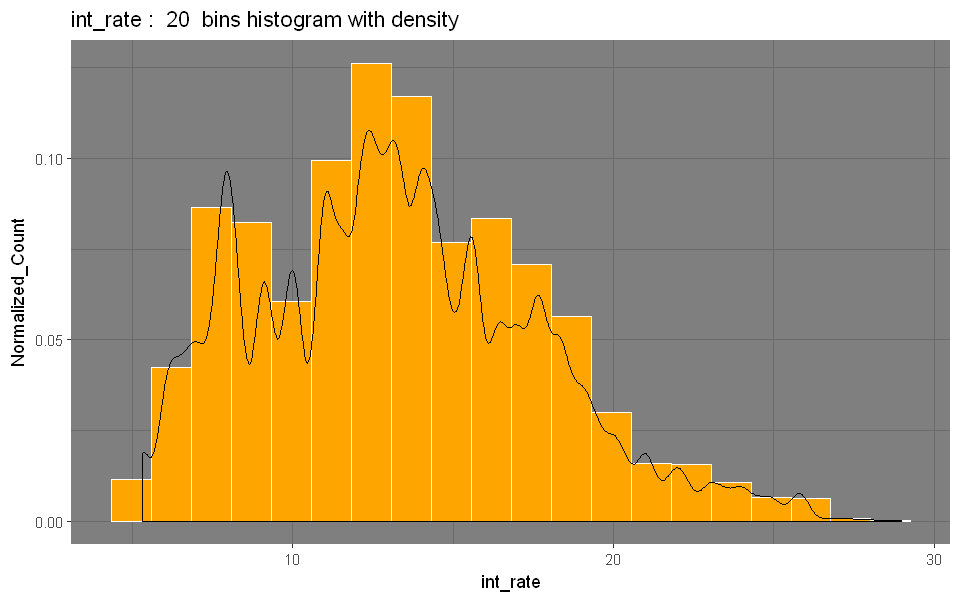

In [73]:
plothistdensity(loan, 20)

***pay attentiont to disadvantage of histogram

In [64]:
mean(loan$annual_inc, na.rm = T)
sd(loan$annual_inc, na.rm = T)
median(loan$annual_inc, na.rm = T)
quantile(loan$annual_inc, c(0.1, 0.25, 0.5, 0.75, 0.9), na.rm = T)

[1] 75027.59

[1] 64698.3

[1] 65000

10%    25%    50%    75%    90% 
 34000  45000  65000  90000 124800

#### skewness variable

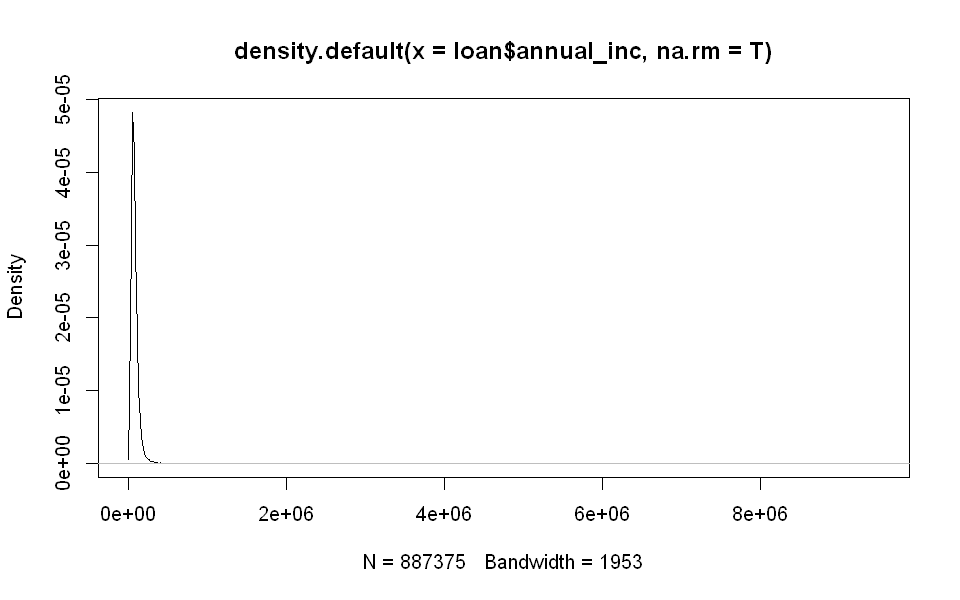

In [74]:
plot(density(loan$annual_inc, na.rm = T))

In [75]:
plot(density(log(loan$annual_inc), na.rm = T))

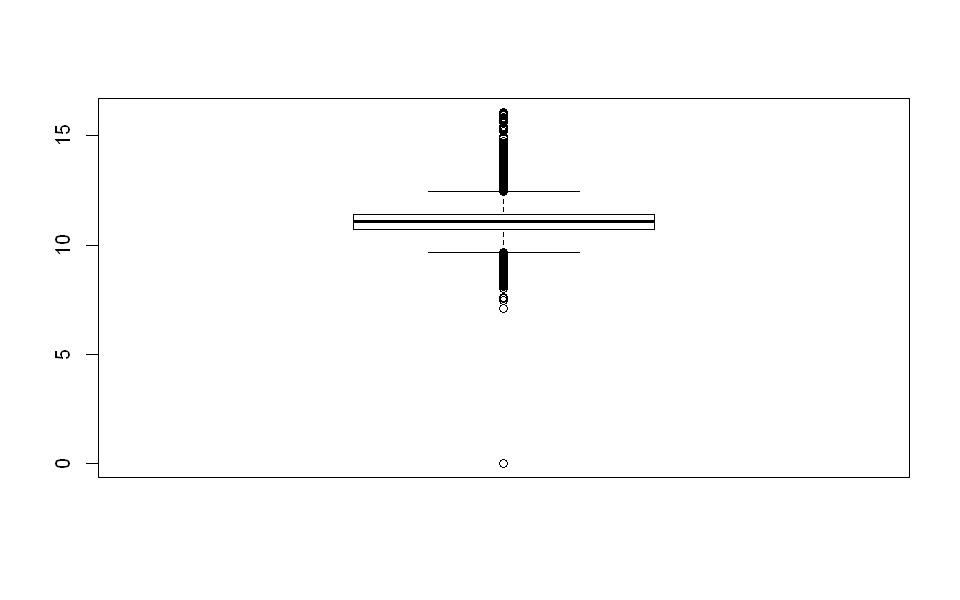

In [76]:
# Q1 - 1.5IQR, Q1, median, Q3, Q3 + 1.5IQR, where IQR is interquartile range: Q3 - Q1
boxplot(log(loan$annual_inc + 1))

In [77]:
# Categorical variables
sort(table(loan$loan_status))


Does not meet the credit policy. Status:Charged Off 
                                                761 
                                            Default 
                                               1219 
 Does not meet the credit policy. Status:Fully Paid 
                                               1988 
                                  Late (16-30 days) 
                                               2357 
                                    In Grace Period 
                                               6253 
                                             Issued 
                                               8460 
                                 Late (31-120 days) 
                                              11591 
                                        Charged Off 
                                              45248 
                                         Fully Paid 
                                             207723 
                                            C

In [78]:
round(sort(table(loan$loan_status)) / dim(loan)[1], 2)


Does not meet the credit policy. Status:Charged Off 
                                               0.00 
                                            Default 
                                               0.00 
 Does not meet the credit policy. Status:Fully Paid 
                                               0.00 
                                  Late (16-30 days) 
                                               0.00 
                                    In Grace Period 
                                               0.01 
                                             Issued 
                                               0.01 
                                 Late (31-120 days) 
                                               0.01 
                                        Charged Off 
                                               0.05 
                                         Fully Paid 
                                               0.23 
                                            C

In [80]:
# remove certain string from loan_status
loan$loan_status = gsub("Does not meet the credit policy. Status:", "", loan$loan_status)

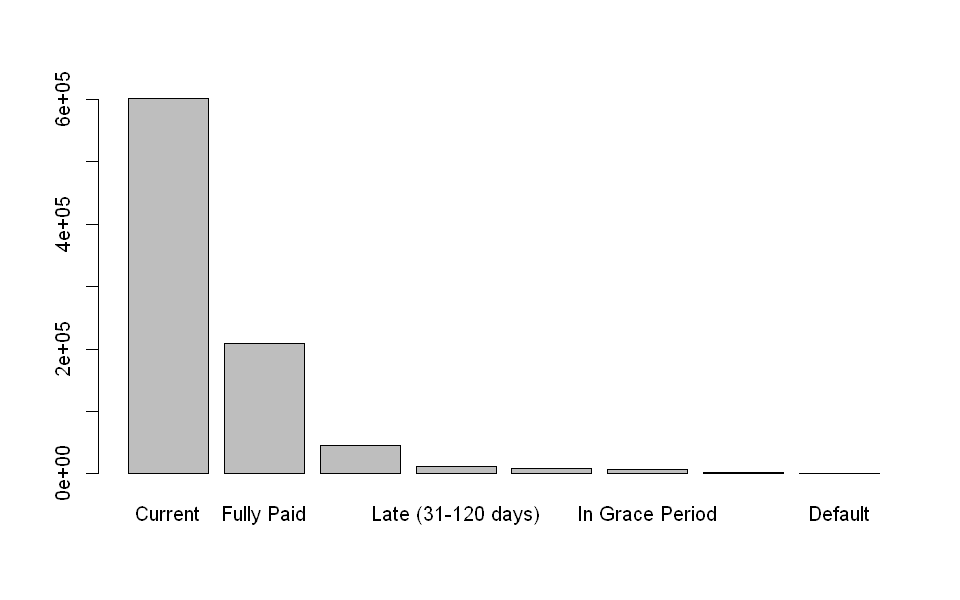

In [81]:
barplot(sort(table(loan$loan_status), decreasing = TRUE))

In [83]:
sort(table(loan$loan_status), decreasing = TRUE)


           Current         Fully Paid        Charged Off Late (31-120 days) 
            601779             209711              46009              11591 
            Issued    In Grace Period  Late (16-30 days)            Default 
              8460               6253               2357               1219 

In [87]:
#generate new features
loan$loan_status_1 = ifelse(loan$loan_status %in% c("'Current","Fully Paid","Issued"), 1, 0)

In [89]:
table(loan$loan_status_1)


     0      1 
669208 218171 

In [90]:
#purpose
sort(table(loan$purpose))


       educational   renewable_energy            wedding              house 
               423                575               2347               3707 
          vacation             moving            medical                car 
              4736               5414               8540               8863 
    small_business     major_purchase              other   home_improvement 
             10377              17277              42894              51829 
       credit_card debt_consolidation 
            206182             524215 

In [91]:
round(sort(table(loan$purpose)) / dim(loan)[1], 2)


       educational   renewable_energy            wedding              house 
              0.00               0.00               0.00               0.00 
          vacation             moving            medical                car 
              0.01               0.01               0.01               0.01 
    small_business     major_purchase              other   home_improvement 
              0.01               0.02               0.05               0.06 
       credit_card debt_consolidation 
              0.23               0.59 

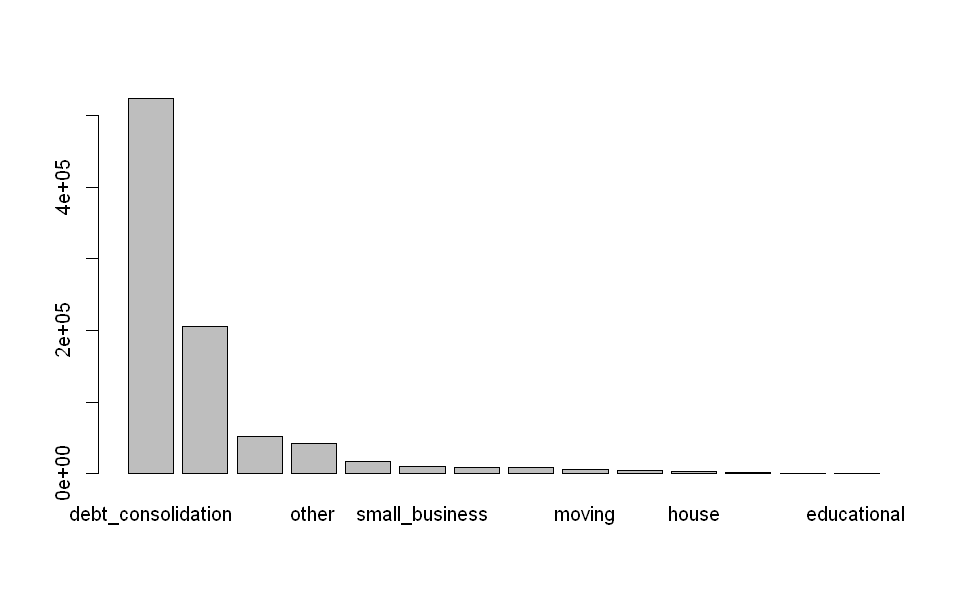

In [93]:
barplot(sort(table(loan$purpose), decreasing = TRUE))

### Numeric variable with numerical response, interest rate

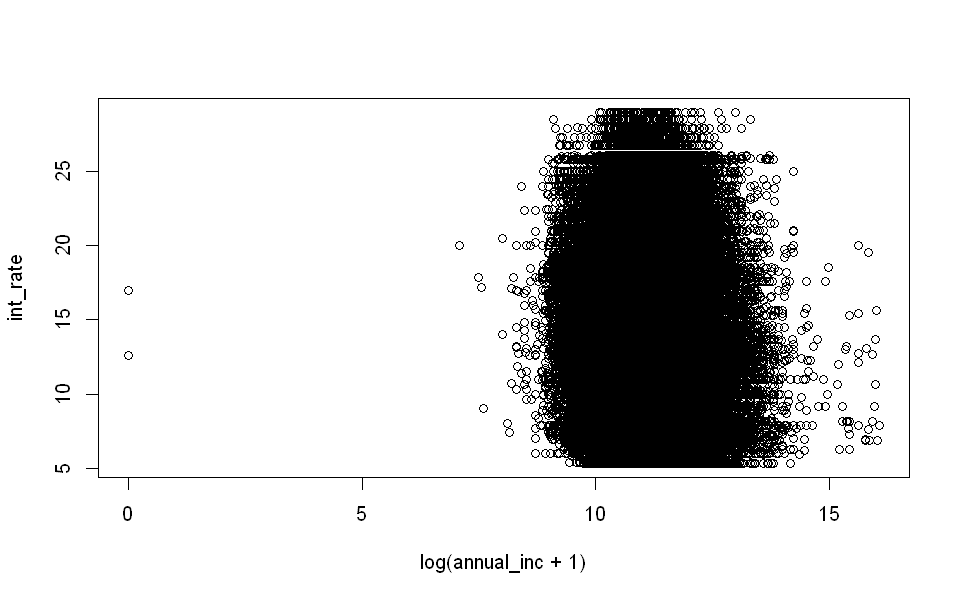

In [94]:

with(loan, plot(log(annual_inc + 1), int_rate))

In [100]:
library(corrplot)
correlations <- cor(loan[, c('int_rate', 'total_acc', 'acc_now_delinq', 'annual_inc',
                             'dti', 'loan_amnt')]) 
correlations

int_rate   total_acc acc_now_delinq annual_inc dti       
int_rate       1.00000000 NA        NA             NA         0.07990255
total_acc              NA  1        NA             NA                 NA
acc_now_delinq         NA NA         1             NA                 NA
annual_inc             NA NA        NA              1                 NA
dti            0.07990255 NA        NA             NA         1.00000000
loan_amnt      0.14502310 NA        NA             NA         0.02067549
               loan_amnt 
int_rate       0.14502310
total_acc              NA
acc_now_delinq         NA
annual_inc             NA
dti            0.02067549
loan_amnt      1.00000000

In [101]:
# possible to see NA if features has missing value
correlations <- cor(loan[, c('int_rate', 'total_acc', 'acc_now_delinq', 'annual_inc',
                             'dti', 'loan_amnt')], 
                    use = "pairwise.complete.obs")
correlations

int_rate    total_acc   acc_now_delinq annual_inc  dti         
int_rate        1.00000000 -0.03861820 0.026478461    -0.07278563  0.079902551
total_acc      -0.03861820  1.00000000 0.026460589     0.18733469  0.108055639
acc_now_delinq  0.02647846  0.02646059 1.000000000     0.01477517  0.003205314
annual_inc     -0.07278563  0.18733469 0.014775175     1.00000000 -0.087409546
dti             0.07990255  0.10805564 0.003205314    -0.08740955  1.000000000
loan_amnt       0.14502310  0.22263899 0.003946694     0.33269762  0.020675487
               loan_amnt  
int_rate       0.145023099
total_acc      0.222638992
acc_now_delinq 0.003946694
annual_inc     0.332697619
dti            0.020675487
loan_amnt      1.000000000

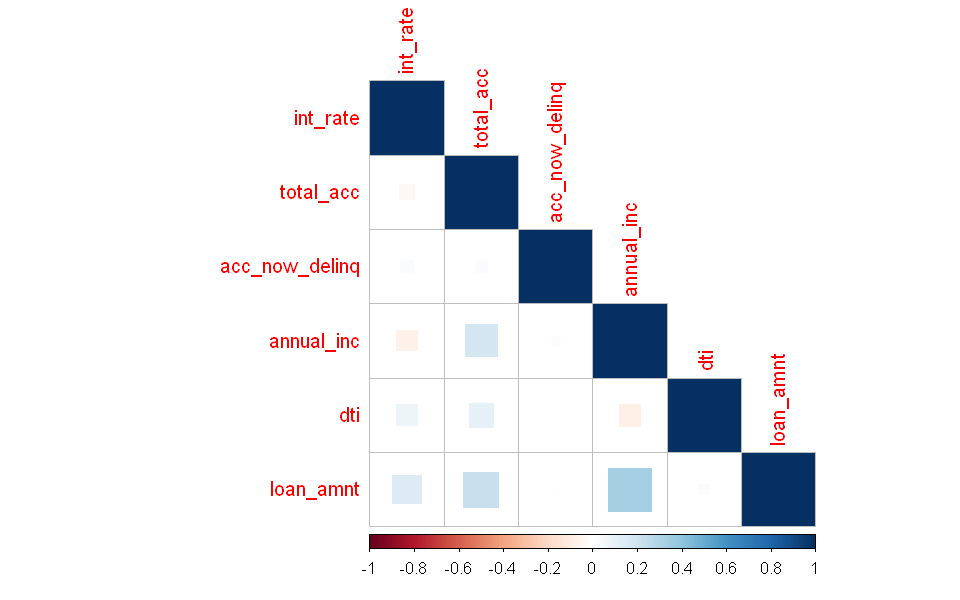

In [102]:
corrplot(correlations, method = "square", tl.cex = 1, type = 'lower')

### Categorical variable with numerical response

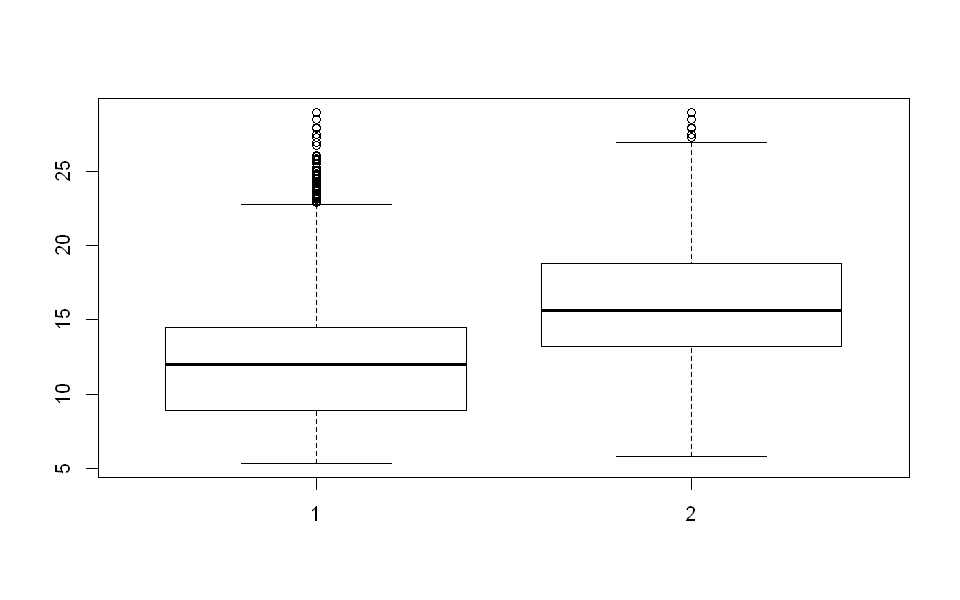

In [103]:
#int_rate & term
boxplot(subset(loan, term == ' 36 months')$int_rate,
        subset(loan, term == ' 60 months')$int_rate)

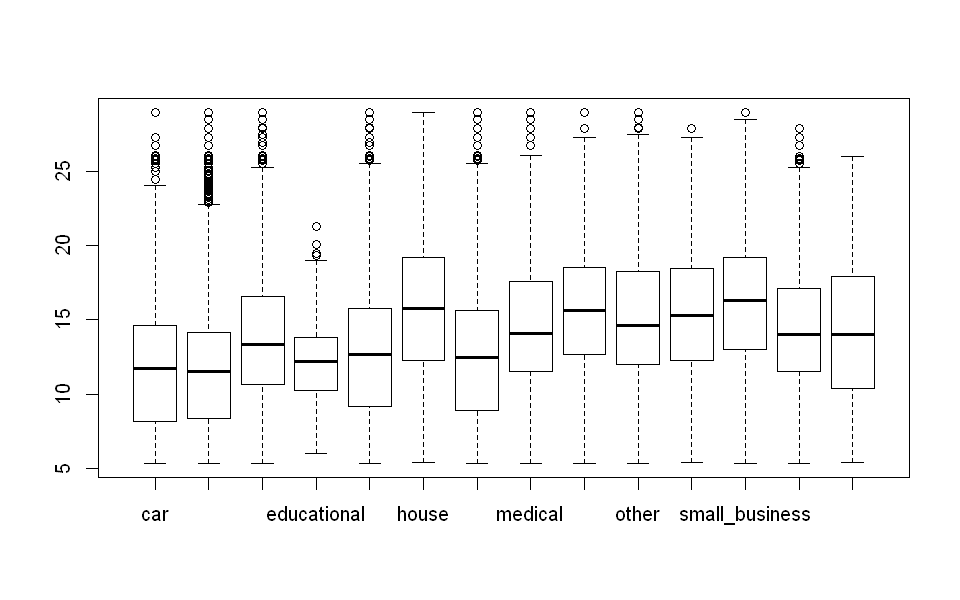

In [104]:
#int_rate and purpose
boxplot(int_rate ~ purpose, data = loan)

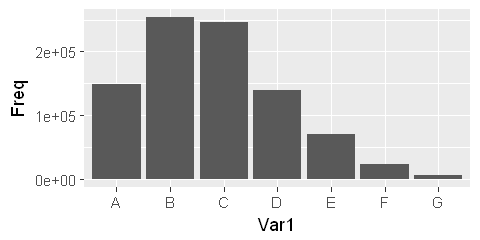

In [27]:
#int_rate and grade
options(repr.plot.width=4, repr.plot.height=2)
ggplot(data.frame(table(loan$grade)), aes(x=Var1, y=Freq)) + geom_bar(stat = "identity")

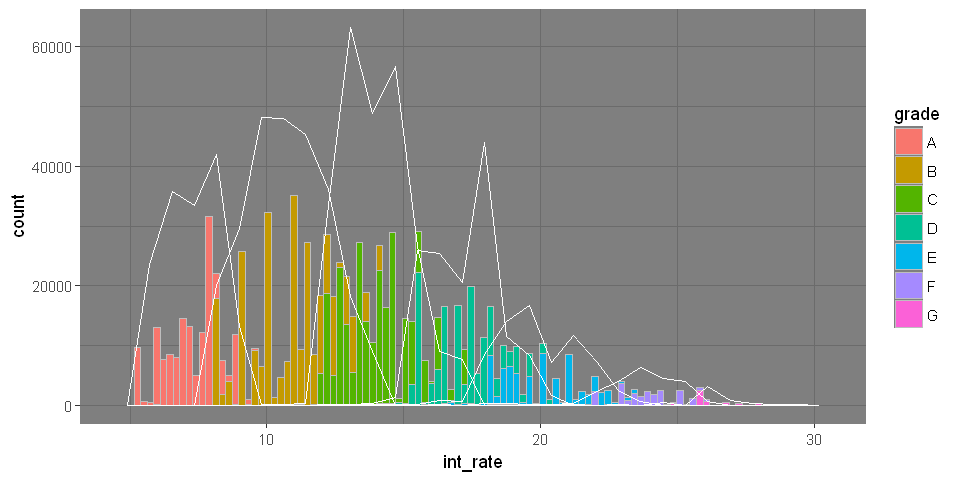

In [28]:
# group histogram 1
options(repr.plot.width=8, repr.plot.height=4)
ggplot(loan, aes(x=int_rate, fill=grade)) + 
geom_histogram(bins = 100, color = "grey") + theme_dark() + 
geom_freqpoly(bins = 30, color = "white")

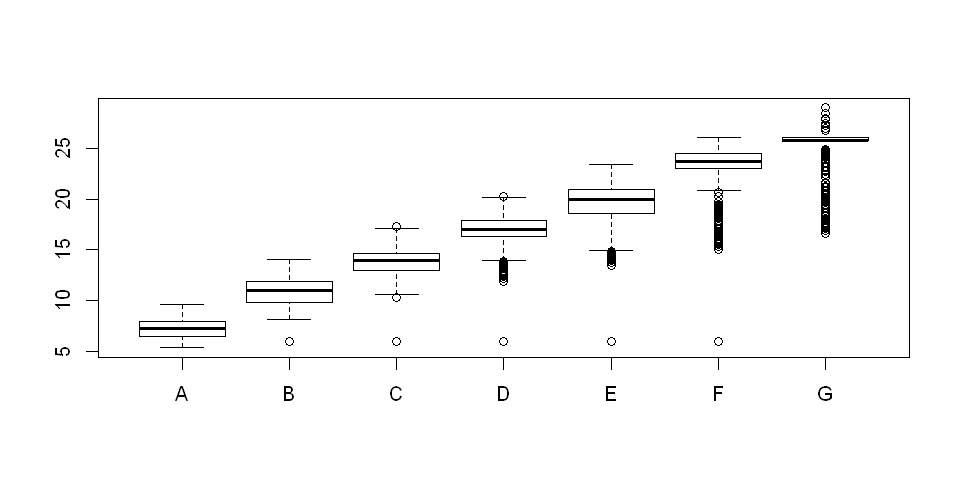

In [29]:
boxplot(int_rate~grade, data = loan)

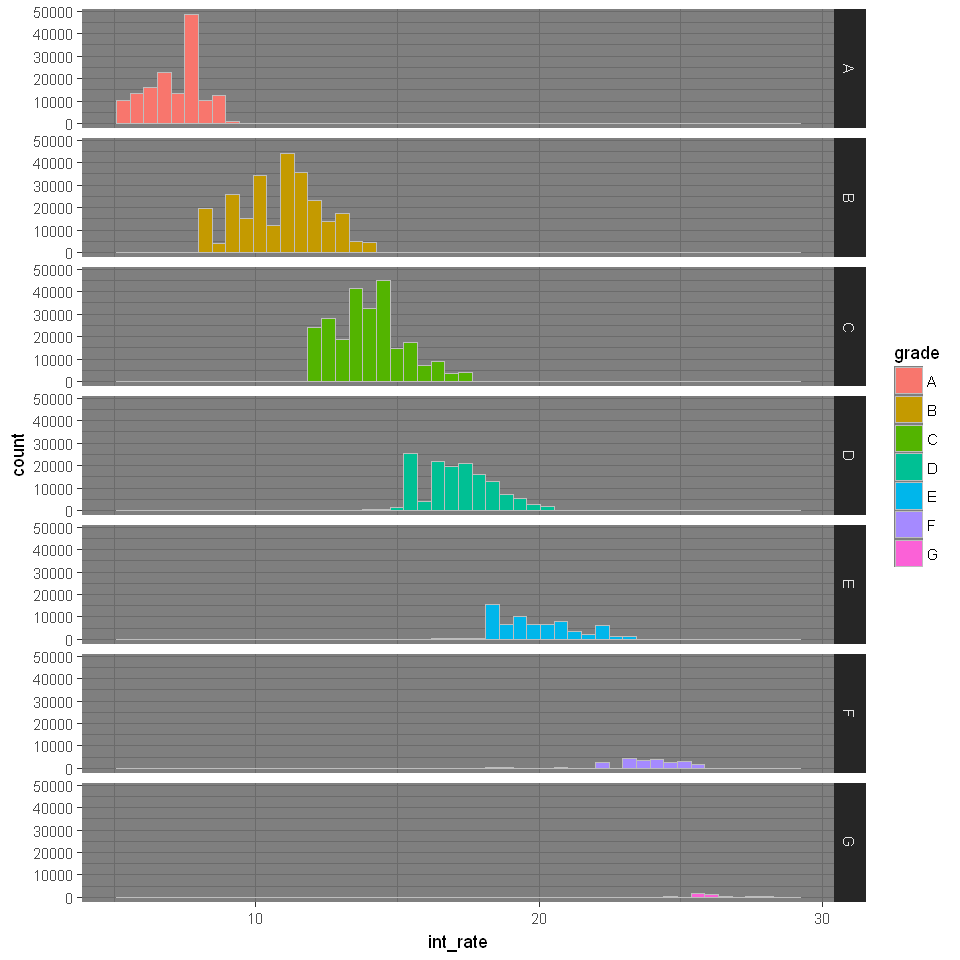

In [17]:
# group histogram 2
options(repr.plot.width=8, repr.plot.height=8)
ggplot(loan, aes(x=int_rate, fill=grade)) + 
geom_histogram(bins = 50, color = "grey") + 
facet_grid(grade ~ .) + theme_dark()

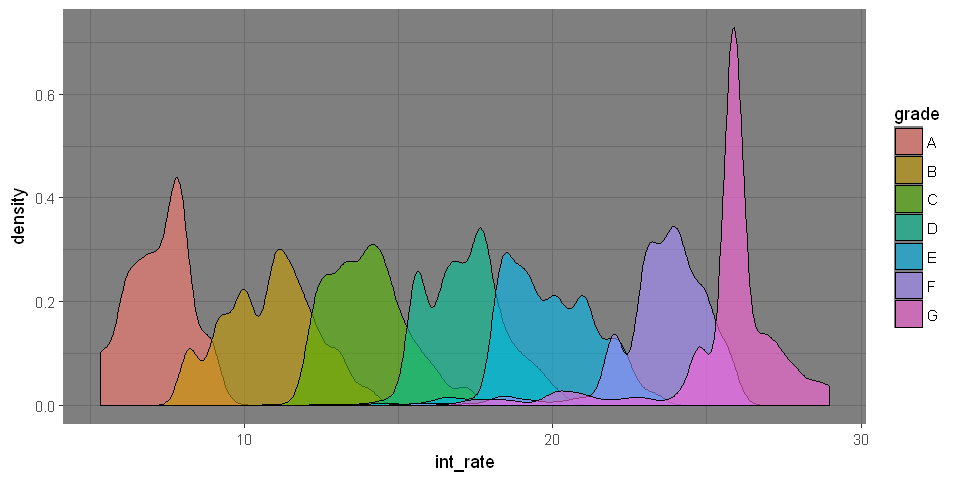

In [18]:
# group density 1
options(repr.plot.width=8, repr.plot.height=4)
ggplot(loan, aes(x=int_rate, y= ..density.., fill=grade)) + 
theme_dark() + 
geom_density(bw = 0.3, alpha= 0.6)

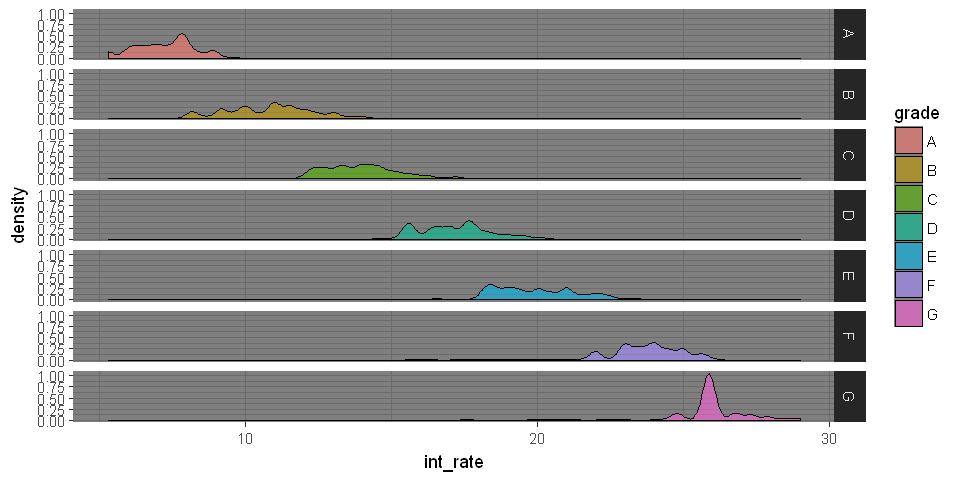

In [19]:
# group density 2
options(repr.plot.width=8, repr.plot.height=4)
ggplot(loan, aes(x=int_rate, y= ..density.., fill=grade)) + 
theme_dark() + 
facet_grid(grade ~ .) +
geom_density(bw = 0.2, alpha= 0.6)

Even we group int_rate by grade, it still shows multimodality inside each group, we can dig into it latter, but, clearly it shows grade was directly related to int_rate

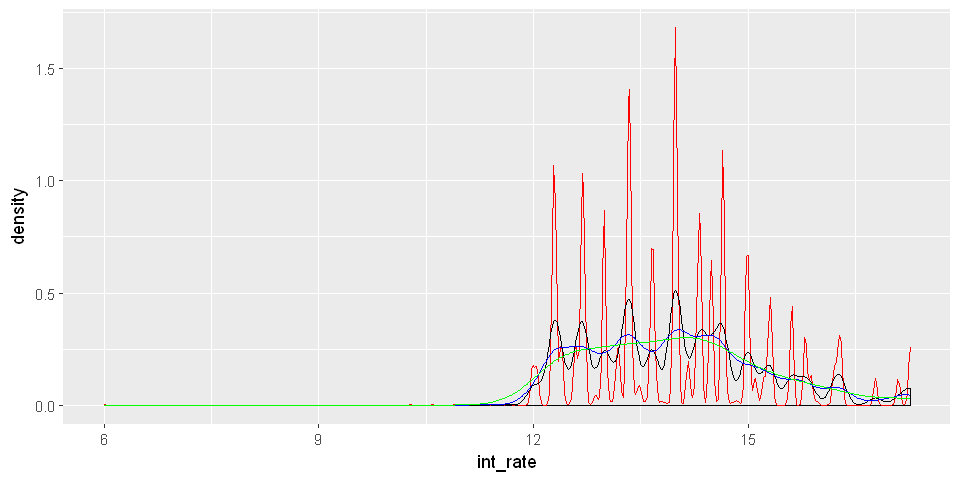

In [26]:
# more on density
# if band width is so large, it will become a kernel shape function
# in the constrast, it will not be smooth
options(repr.plot.width=8, repr.plot.height=4)
ggplot(loan[loan$grade == "C", ], aes(x=int_rate)) + geom_density() +  
geom_line(stat="density", adjust=.25, colour="red") +
geom_line(stat="density") +
geom_line(stat="density", adjust=2, colour="blue") + 
geom_line(stat="density", adjust=4, colour="green")

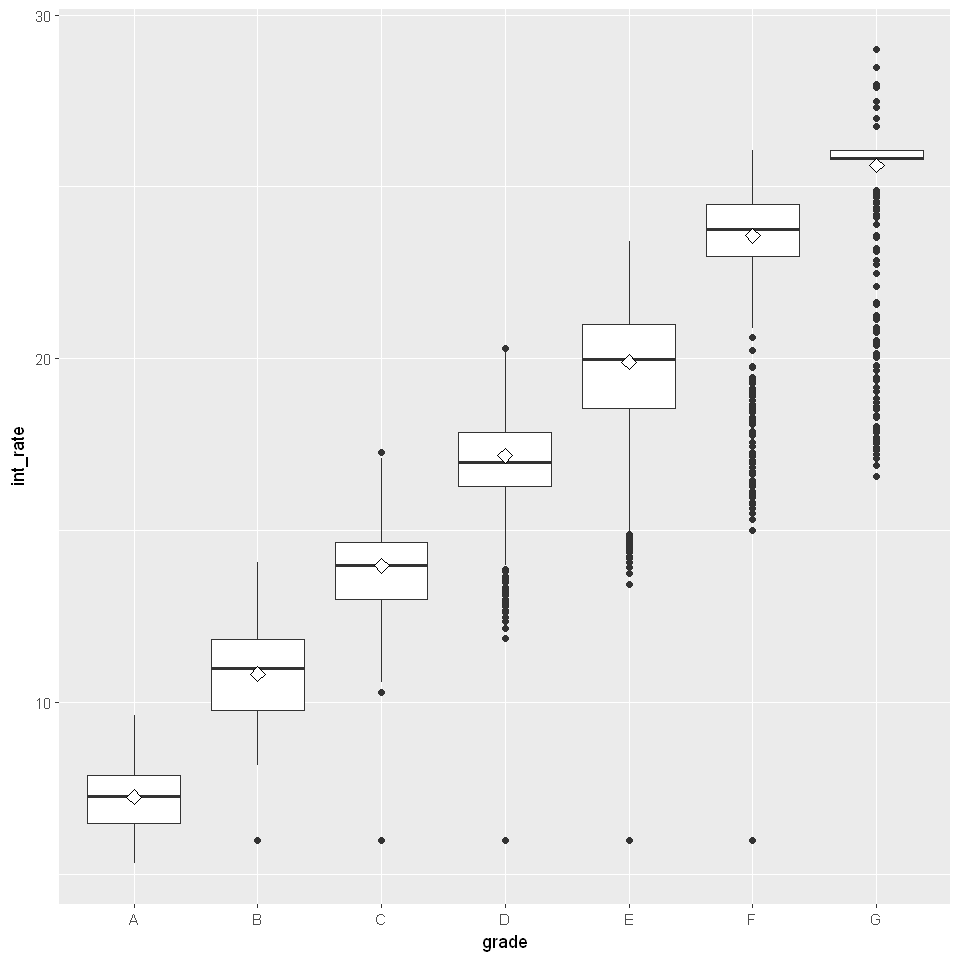

In [27]:
# boxplot 1
options(repr.plot.width=8, repr.plot.height=8)
ggplot(loan, aes(x=factor(grade), y=int_rate)) + 
geom_boxplot() + labs(x='grade') + 
stat_summary(fun.y="mean", geom="point", shape=23, size=3, fill="white")

box plot shows the skewness, quantile, outliers of each group, but it cannot show the amount of data in each group

In [28]:
table(loan$grade)


     A      B      C      D      E      F      G 
148202 254535 245860 139542  70705  23046   5489 

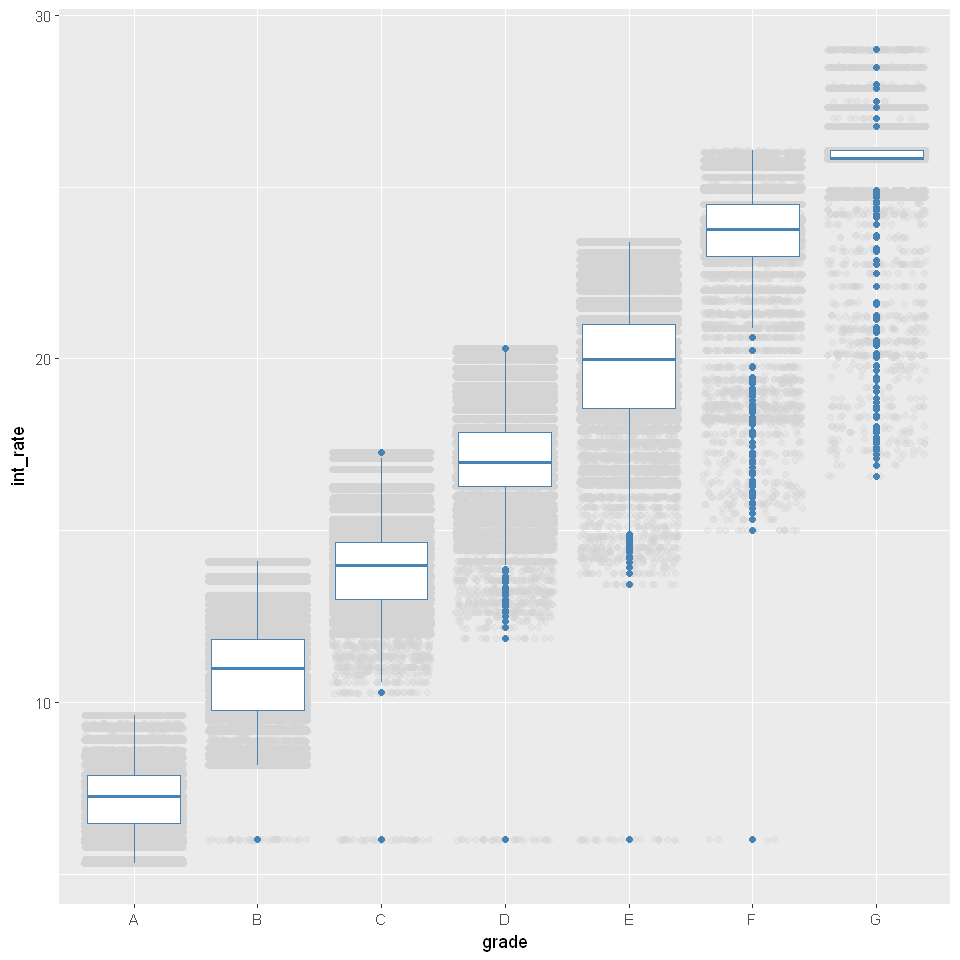

In [29]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(loan, aes(x=factor(grade), y=int_rate)) + 
geom_jitter(alpha=0.3, color='lightgrey') +
geom_boxplot(color='steelblue') + 
labs(x='grade')

we can also use a violin plot to compare multiple distribution in different group

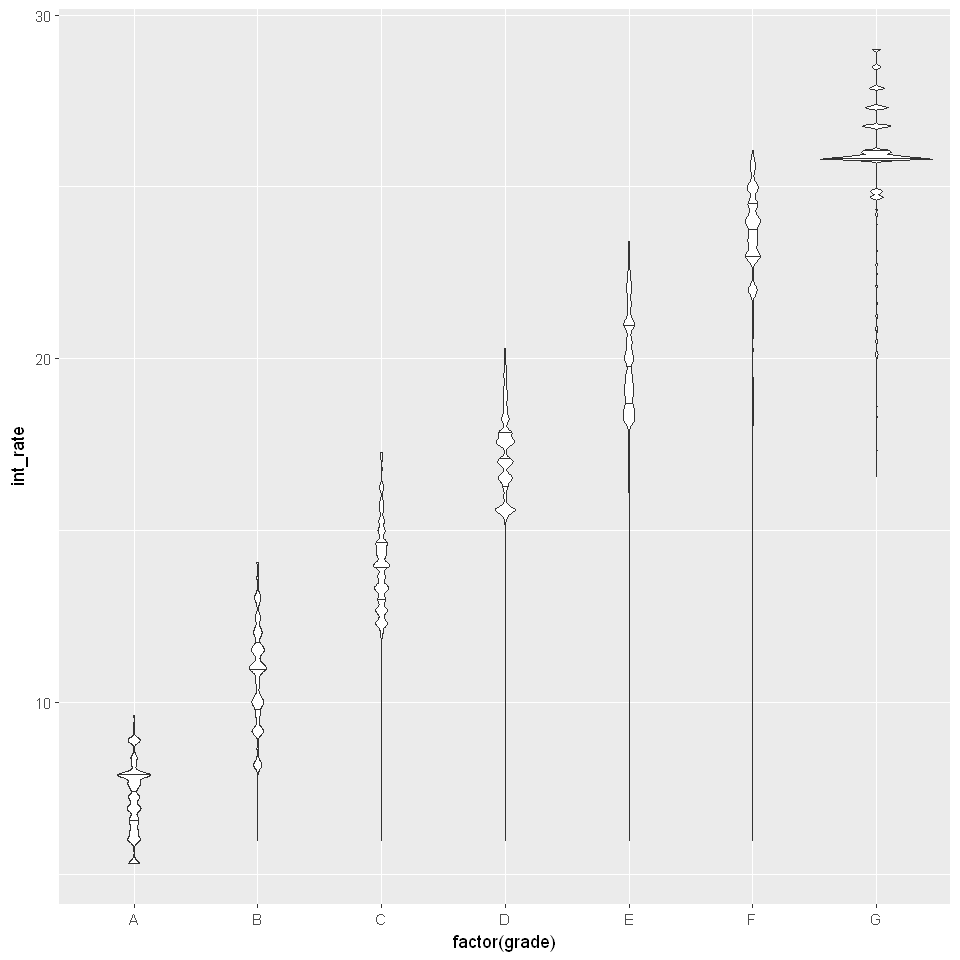

In [30]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(loan, aes(x=factor(grade), y=int_rate)) +
geom_violin(draw_quantiles = c(0.25, 0.5, 0.75)) #+ geom_boxplot(width=.1, fill="black", outlier.colour=NA) +
#stat_summary(fun.y=median, geom="point", fill="white", shape=21, size=2.5)

2 int_rate with subgrade

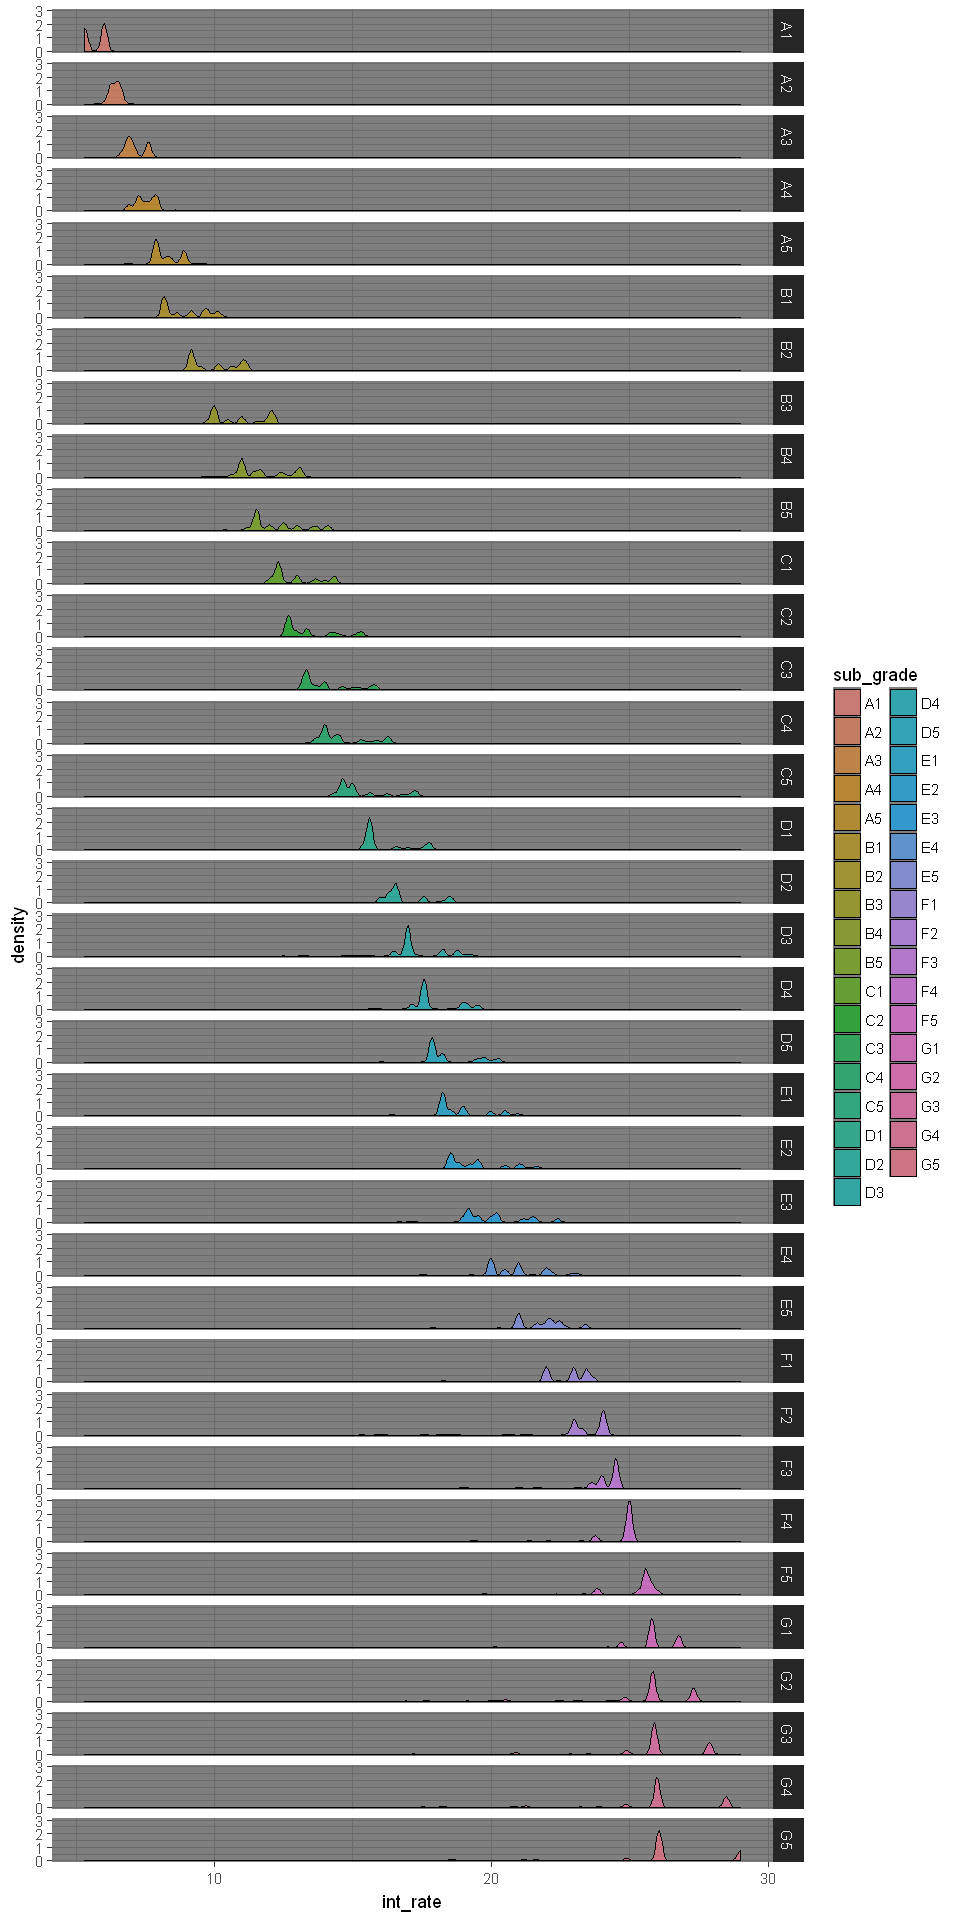

In [32]:
options(repr.plot.width=8, repr.plot.height=16)
ggplot(loan, aes(x=int_rate, y= ..density.., fill=sub_grade)) + 
theme_dark() + 
facet_grid(sub_grade ~ .) +
geom_density(bw = 0.1, alpha= 0.6)

In [105]:
#deal with time formate data
library(zoo)
head(loan$issue_d)

Warning message:
"package 'zoo' was built under R version 3.4.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



[1] "Dec-2011" "Dec-2011" "Dec-2011" "Dec-2011" "Dec-2011" "Dec-2011"

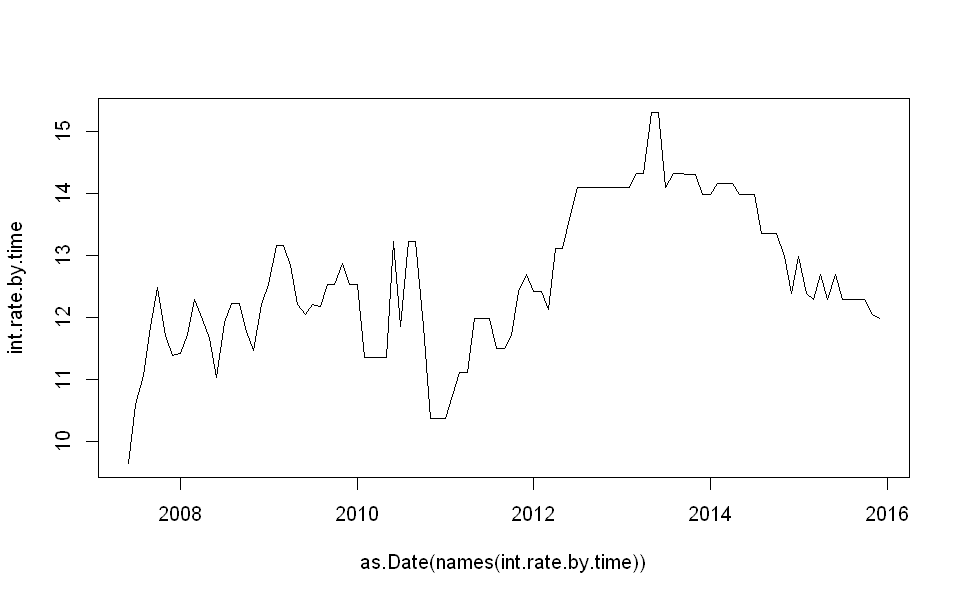

In [106]:
loan$issue_d_1 <- as.Date(as.yearmon(loan$issue_d, "%b-%Y"))
loan$issue_year <- format(loan$issue_d_1, '%Y')
loan$issue_mon <- format(loan$issue_d_1, '%m')
int.rate.by.time <- by(loan, loan$issue_d_1, function(x) {return(median(x$int_rate))})
plot(as.Date(names(int.rate.by.time)), int.rate.by.time, type = 'l')


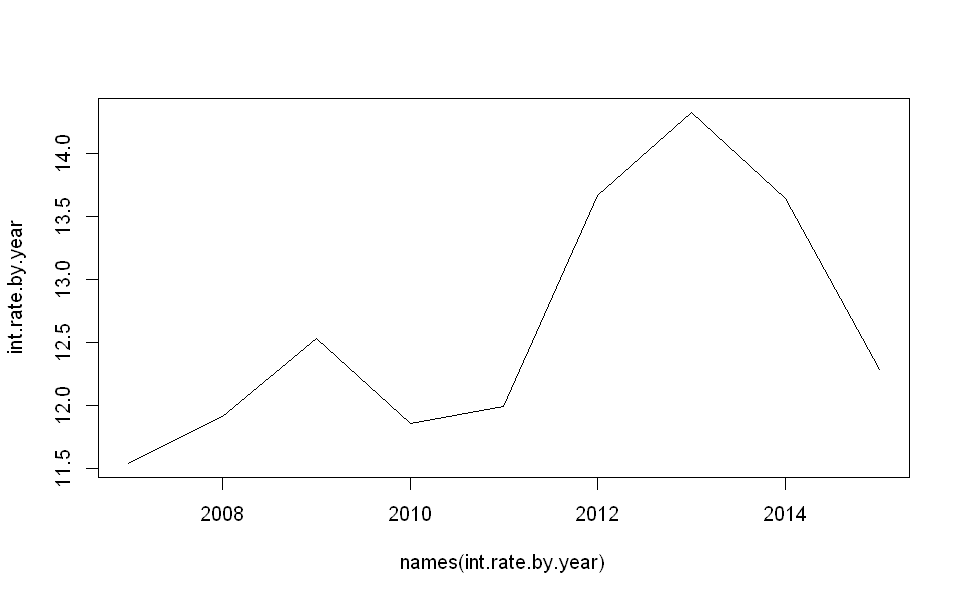

In [107]:
int.rate.by.year <- by(loan, loan$issue_year, function(x) {return(median(x$int_rate))})
plot(names(int.rate.by.year), int.rate.by.year, type = 'l')

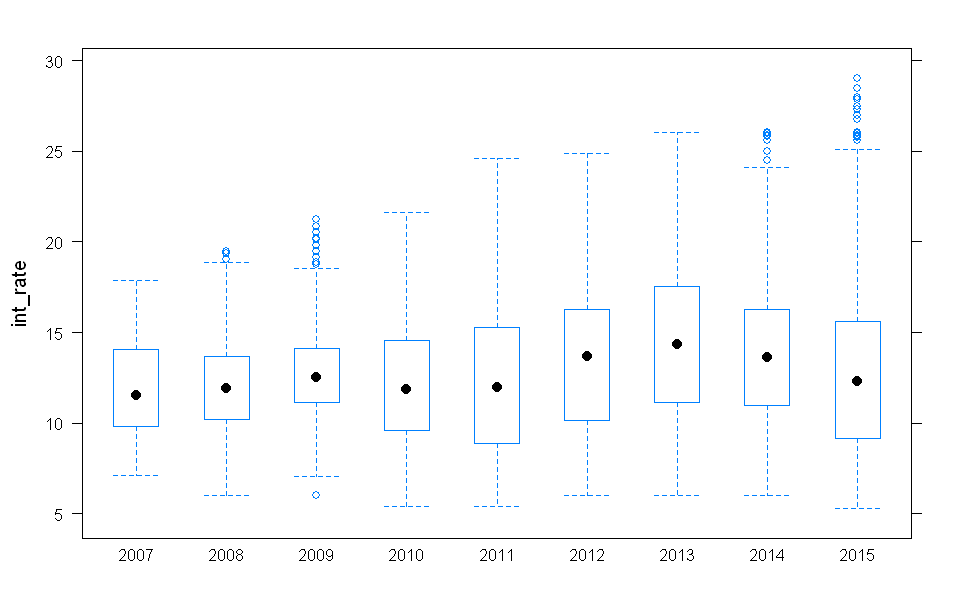

In [108]:
# Not only see the median by time, but also see the distribution by time.
#boxplot of relationship between interest rate and year
library(lattice)
bwplot(int_rate ~ issue_year, data = loan)

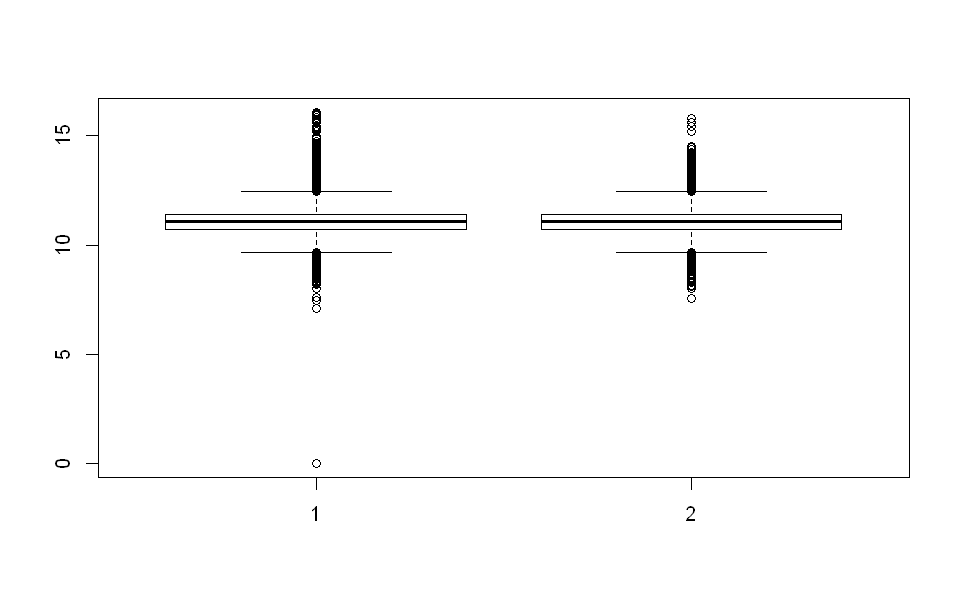

In [109]:
# Numeric variable with categorical response
#isssued and not issued
boxplot(log(subset(loan, loan_status_1 == 0)$annual_inc + 1),
        log(subset(loan, loan_status_1 == 1)$annual_inc + 1))

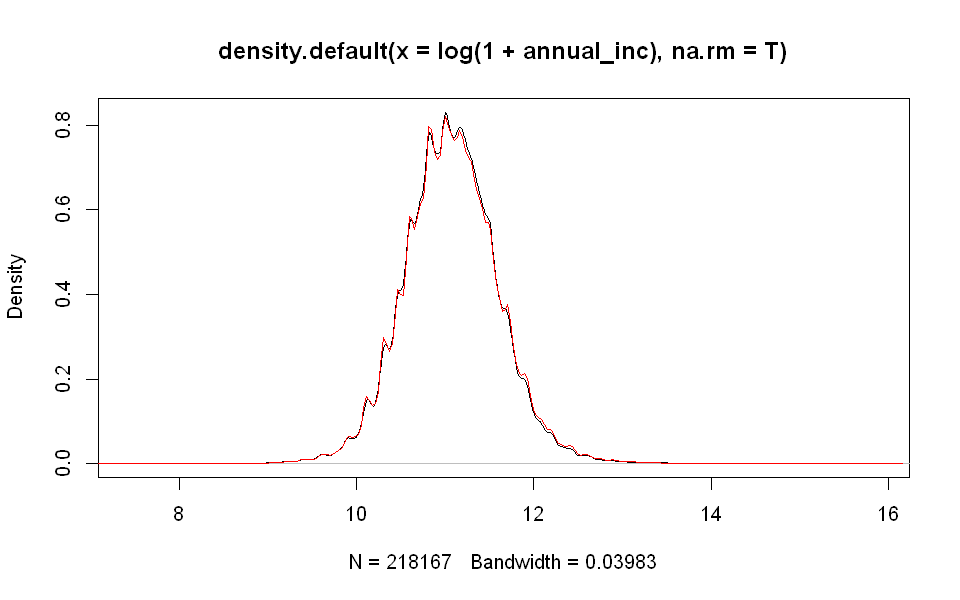

In [119]:
#issued loan annual income
with(subset(loan, loan_status_1 == 1), plot(density(log(1 + annual_inc), na.rm=T)))
with(subset(loan, loan_status_1 == 0), lines(density(log(1 + annual_inc)), col = 'red'))

In [120]:
# Categorical variable with categorical response
table(loan$loan_status_1, loan$purpose)
table(loan$loan_status_1, loan$purpose) / as.numeric(table(loan$loan_status_1))


   
       car credit_card debt_consolidation educational home_improvement  house
  0   5533      161590             397847          89            38533   2271
  1   3330       44592             126368         334            13296   1436
   
    major_purchase medical moving  other renewable_energy small_business
  0          11602    6128   3728  30770              354           6801
  1           5675    2412   1686  12124              221           3576
   
    vacation wedding
  0     3348     614
  1     1388    1733

   
             car  credit_card debt_consolidation  educational home_improvement
  0 0.0082679825 0.2414645372       0.5945042498 0.0001329930     0.0575800050
  1 0.0152632568 0.2043901343       0.5792153861 0.0015309092     0.0609430218
   
           house major_purchase      medical       moving        other
  0 0.0033935637   0.0173369117 0.0091570932 0.0055707642 0.0459797253
  1 0.0065819930   0.0260117064 0.0110555482 0.0077278832 0.0555710887
   
    renewable_energy small_business     vacation      wedding
  0     0.0005289835   0.0101627596 0.0050029288 0.0009175025
  1     0.0010129669   0.0163908127 0.0063619821 0.0079433105

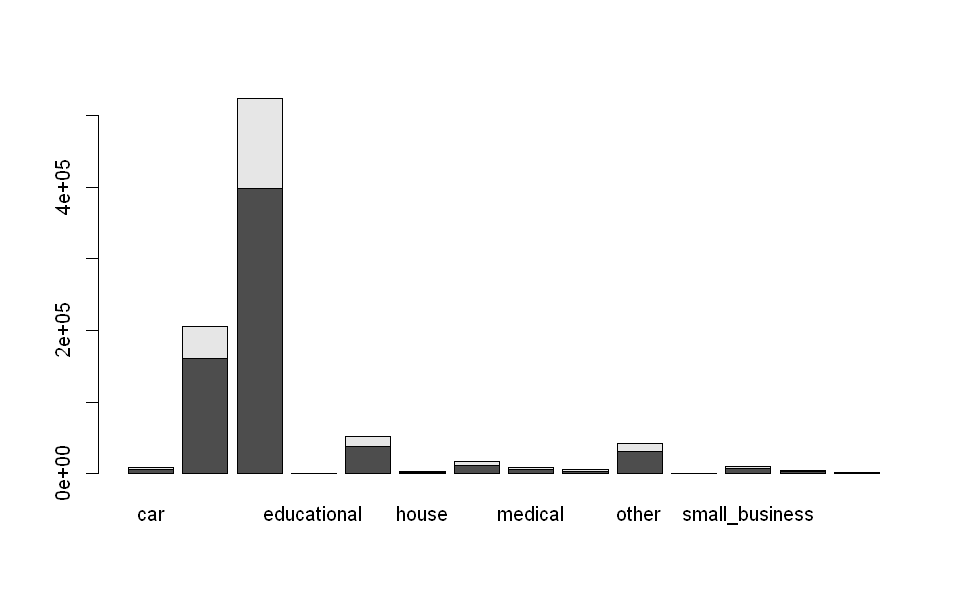

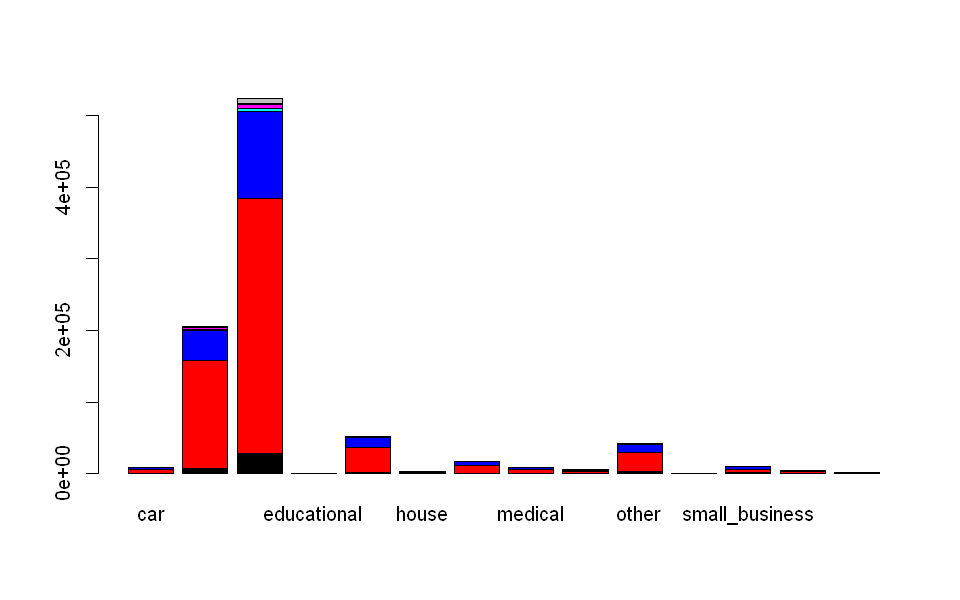

In [121]:
barplot(table(loan$loan_status_1, loan$purpose))
barplot(table(loan$loan_status, loan$purpose), col = c(1:14))

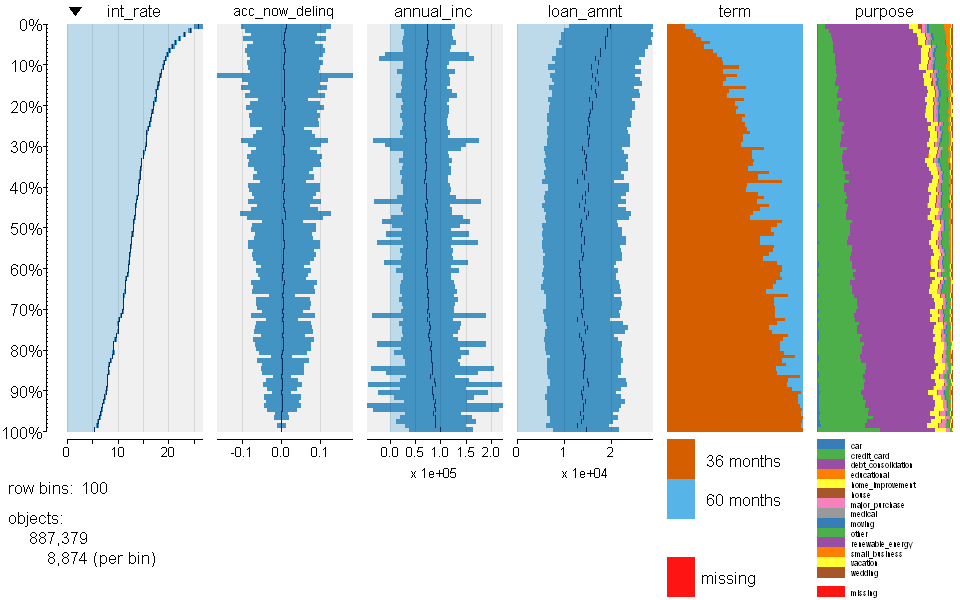

In [124]:
#no matter it is numerical or categorical
library(tabplot)
tableplot(loan, select = c('int_rate', 'acc_now_delinq', 'annual_inc',
                           'loan_amnt', 'term', 'purpose'))

### int_rate with loan_status

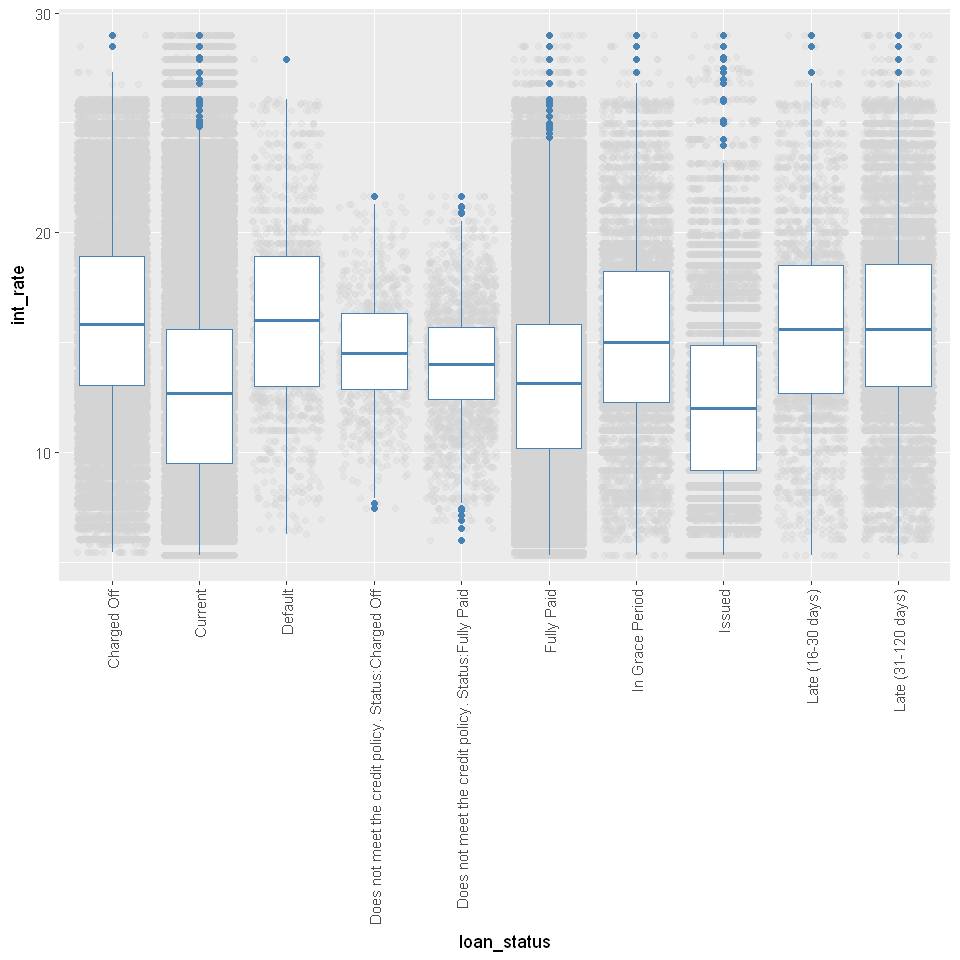

In [34]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(loan, aes(x=factor(loan_status), y=int_rate)) + 
geom_jitter(alpha=0.3, color='lightgrey') +
geom_boxplot(color='steelblue') + 
labs(x='loan_status') + 
theme(axis.text.x = element_text(angle=90, hjust=1, vjust=.5),
        legend.position = "none")

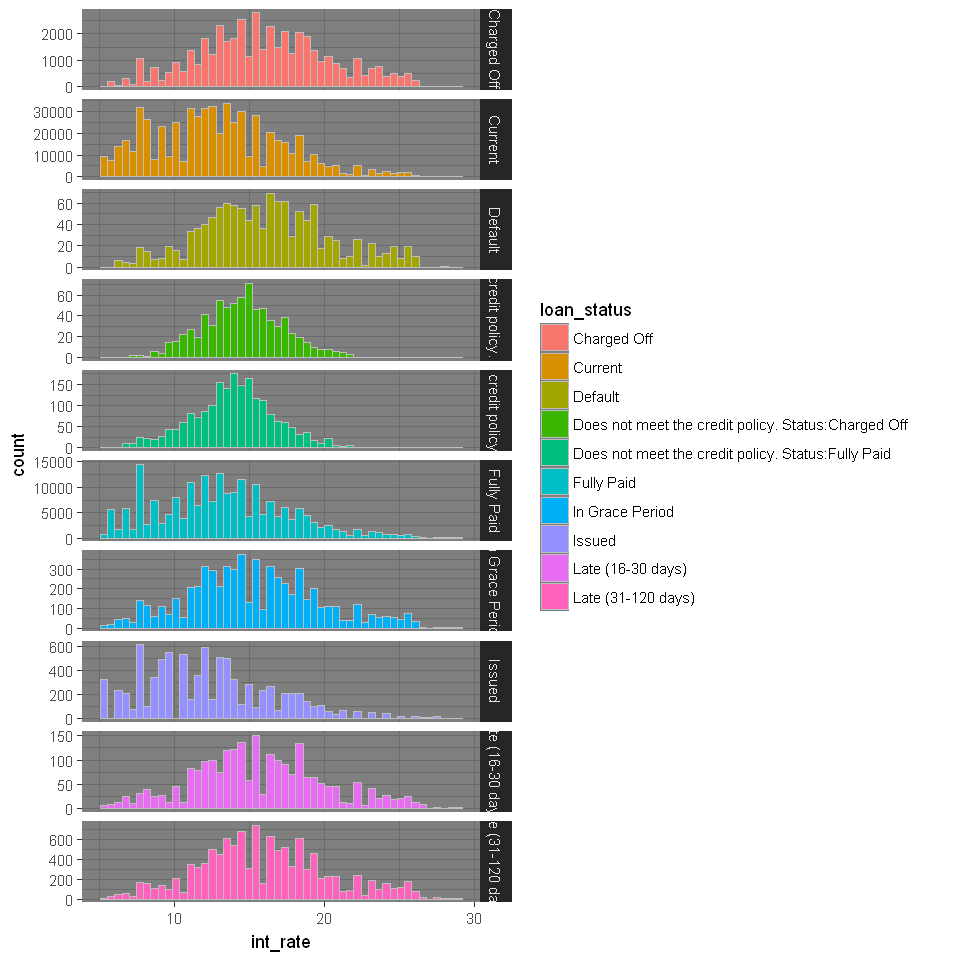

In [35]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(loan, aes(x=int_rate, fill=loan_status)) + 
geom_histogram(bins = 50, color = "grey") + 
facet_grid(loan_status ~ ., scales = "free") + theme_dark()

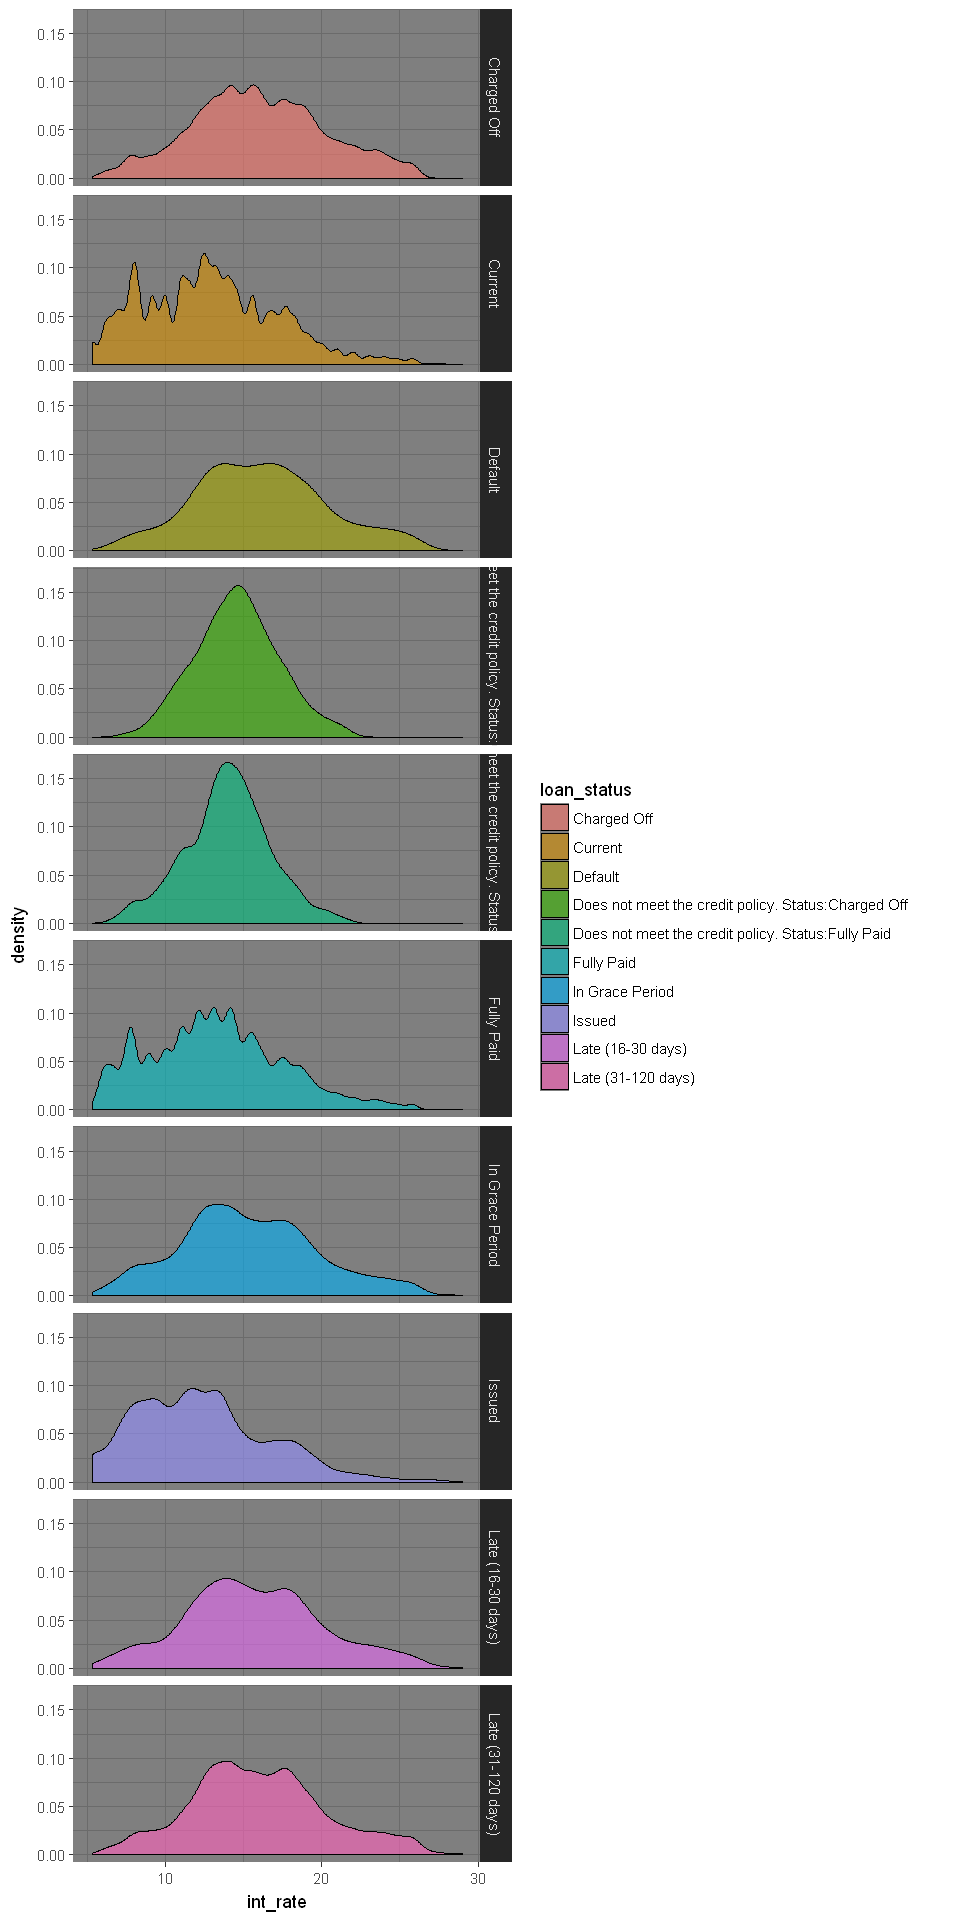

In [36]:
options(repr.plot.width=8, repr.plot.height=16)
ggplot(loan, aes(x=int_rate, y= ..density.., fill=loan_status)) + 
theme_dark() + 
facet_grid(loan_status ~ .) +
geom_density(alpha= 0.6)

### addr_state with int_rate

In [40]:
library(choroplethr)
library(choroplethrMaps)

Warning message:
"package 'choroplethr' was built under R version 3.4.3"Loading required package: acs
Warning message:
"package 'acs' was built under R version 3.4.3"Loading required package: stringr
Warning message:
"package 'stringr' was built under R version 3.4.3"Loading required package: XML
Warning message:
"package 'XML' was built under R version 3.4.3"
Attaching package: 'acs'

The following object is masked from 'package:base':

    apply

Warning message:
"package 'choroplethrMaps' was built under R version 3.4.3"

In [41]:
sum(is.na(loan$addr_state))/dim(loan)[1]

[1] 0

In [42]:
state.ave.int_rate = as.list(by(loan$int_rate, loan$addr_state, mean))
state.names = names(state.ave.int_rate)
names(state.ave.int_rate) = NULL
state.int_rate.df = data.frame(region = state.names, value = unlist(state.ave.int_rate))

In [43]:
full.name = c()
for(i in 1:51)
{
    if(i==8){
        full.name <- append(full.name, "district of columbia")
    }else{
        full.name <- append(full.name, tolower(state.name[state.int_rate.df[i,1] == state.abb]))
    }
}

state.int_rate.df$region = full.name

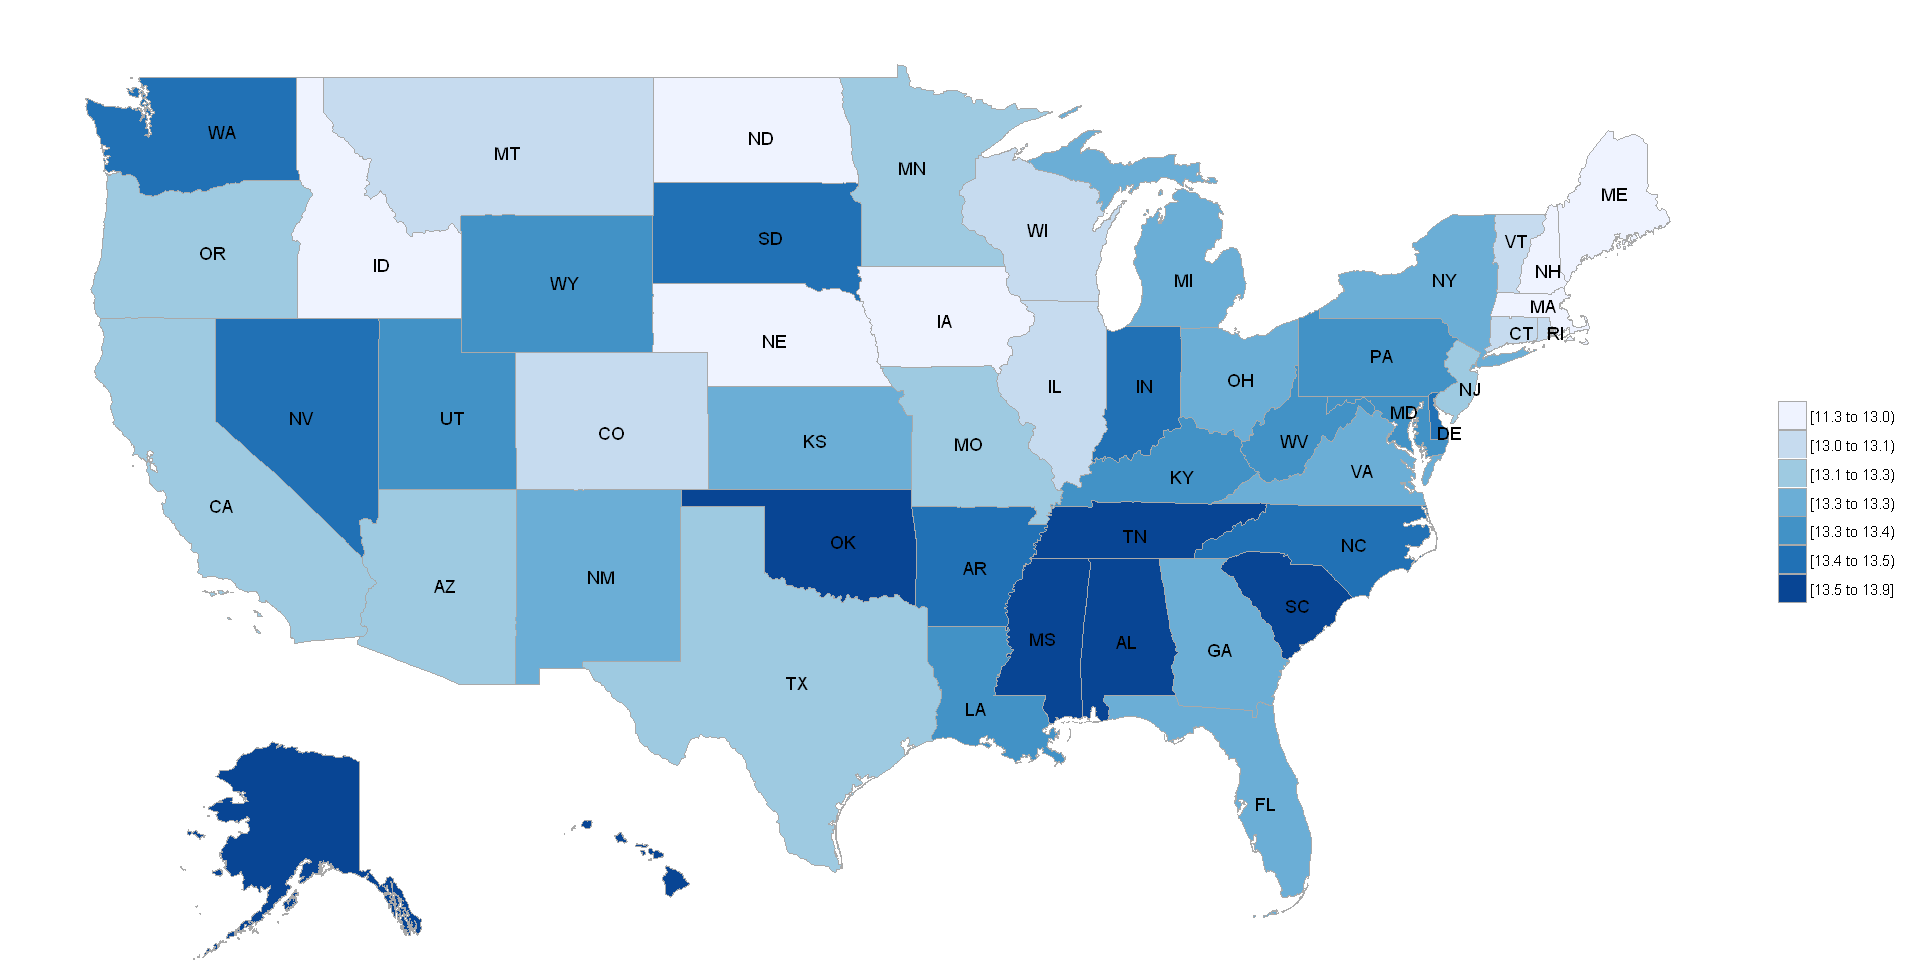

In [44]:
options(repr.plot.width=16, repr.plot.height=8)
state_choropleth(state.int_rate.df)

In [45]:
# anova analysis on different groups
aov.res = aov(int_rate ~ factor(addr_state), na.action = na.omit, data = loan)
summary(aov.res)

                       Df   Sum Sq Mean Sq F value Pr(>F)    
factor(addr_state)     50    26795   535.9   27.95 <2e-16 ***
Residuals          887328 17011539    19.2                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

##### possible feature enigneering:
 - group median of int_rate on each state
 - set level of int_rate on each state

### emp_length with int_rate

In [46]:
unique(loan$emp_length)

[1] "10+ years" "< 1 year"  "1 year"    "3 years"   "8 years"   "9 years"  
 [7] "4 years"   "5 years"   "6 years"   "2 years"   "7 years"   "n/a"

In [47]:
loan[which(loan$emp_length == "n/a"), "emp_length"] <- NA

In [48]:
sum(is.na(loan$emp_length))/dim(loan)[1]

[1] 0.05051393

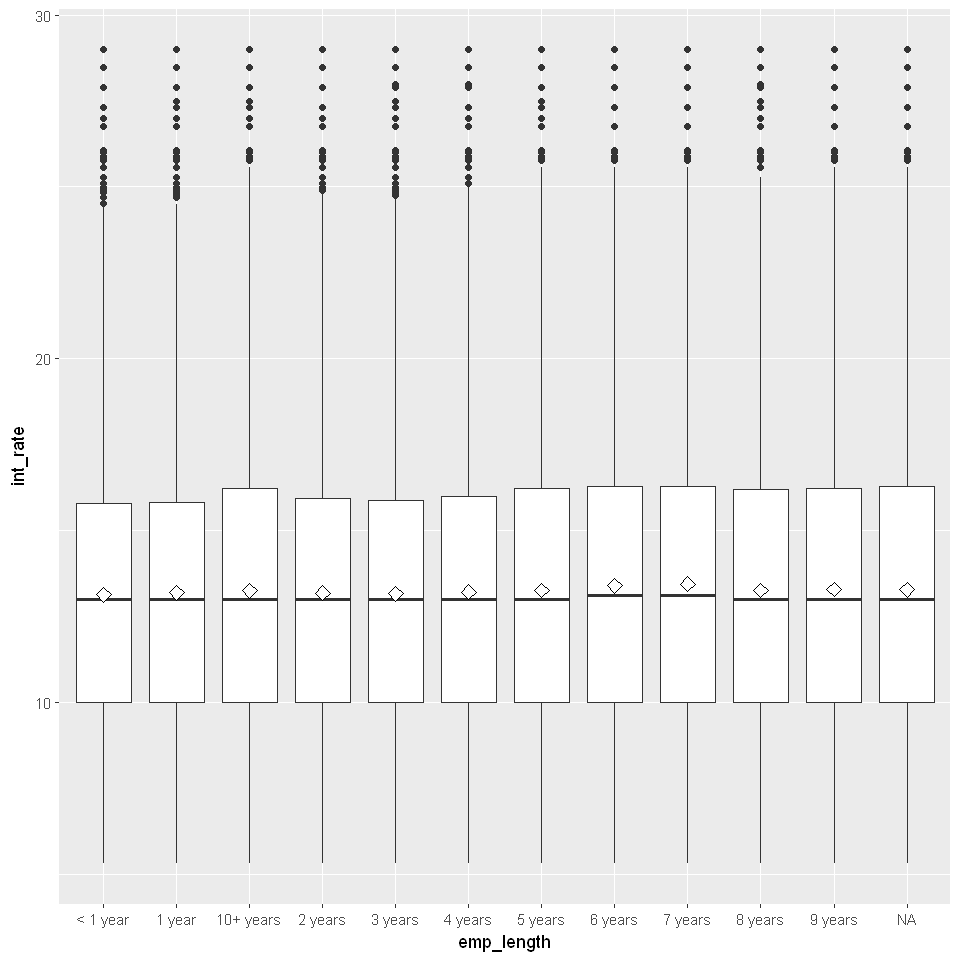

In [49]:
# boxplot 1
options(repr.plot.width=8, repr.plot.height=8)
ggplot(loan, aes(x=factor(emp_length), y=int_rate)) + 
geom_boxplot() + labs(x='emp_length') + 
stat_summary(fun.y="mean", geom="point", shape=23, size=3, fill="white")

In [50]:
# anova analysis on different groups
aov.res = aov(int_rate ~ factor(emp_length), na.action = na.omit, data = loan, )
summary(aov.res)
tukey.res = TukeyHSD(aov.res, conf.level = 0.95)                   # find significance between groups
tukey.res

                       Df   Sum Sq Mean Sq F value Pr(>F)    
factor(emp_length)     10     4781   478.1   24.86 <2e-16 ***
Residuals          842543 16202025    19.2                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
44825 observations deleted due to missingness

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = int_rate ~ factor(emp_length), data = loan, na.action = na.omit)

$`factor(emp_length)`
                            diff           lwr         upr     p adj
1 year-< 1 year     0.0599785748 -0.0194618451  0.13941899 0.3470600
10+ years-< 1 year  0.1224584721  0.0632569215  0.18166002 0.0000000
2 years-< 1 year    0.0543729150 -0.0187533651  0.12749920 0.3707992
3 years-< 1 year    0.0373230025 -0.0379529039  0.11259891 0.8845479
4 years-< 1 year    0.0802004846 -0.0011264772  0.16152745 0.0572026
5 years-< 1 year    0.1297404993  0.0497535601  0.20972744 0.0000096
6 years-< 1 year    0.2689271421  0.1825563966  0.35529789 0.0000000
7 years-< 1 year    0.3155473634  0.2301722564  0.40092247 0.0000000
8 years-< 1 year    0.1298512059  0.0440965949  0.21560582 0.0000584
9 years-< 1 year    0.1557726378  0.0631994014  0.24834587 0.0000033
10+ years-1 year    0.0624798973 -0.0021147738  0.12707457

In [51]:
significant.groups = rownames(tukey.res[[1]])           
sort(significant.groups[tukey.res[[1]][, 4] < 0.05])     # significant different groups

[1] "10+ years-< 1 year" "2 years-10+ years"  "3 years-10+ years" 
 [4] "5 years-< 1 year"   "5 years-3 years"    "6 years-< 1 year"  
 [7] "6 years-1 year"     "6 years-10+ years"  "6 years-2 years"   
[10] "6 years-3 years"    "6 years-4 years"    "6 years-5 years"   
[13] "7 years-< 1 year"   "7 years-1 year"     "7 years-10+ years" 
[16] "7 years-2 years"    "7 years-3 years"    "7 years-4 years"   
[19] "7 years-5 years"    "8 years-< 1 year"   "8 years-3 years"   
[22] "8 years-6 years"    "8 years-7 years"    "9 years-< 1 year"  
[25] "9 years-2 years"    "9 years-3 years"    "9 years-6 years"   
[28] "9 years-7 years"

In [52]:
table(loan$emp_length)


 < 1 year    1 year 10+ years   2 years   3 years   4 years   5 years   6 years 
    70605     57095    291569     78870     70026     52529     55704     42950 
  7 years   8 years   9 years 
    44594     43955     34657 

In [53]:
# feature engineering : split emp_length to < 5 ; >= 5
loan$emp_length_sim = NA
loan[which(loan$emp_length %in% c('10+ years', '8 years','9 years','5 years','6 years','7 years')), "emp_length_sim"] = ">= 5"
loan[which(loan$emp_length %in% c('< 1 year', '1 year','2 years','3 years','4 years')), "emp_length_sim"] = "< 5"

In [54]:
table(loan$emp_length_sim)


   < 5   >= 5 
329125 513429 

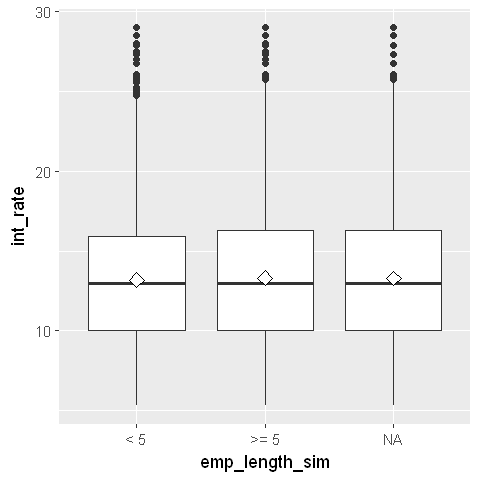

In [55]:
# boxplot 1
options(repr.plot.width=4, repr.plot.height=4)
ggplot(loan, aes(x=factor(emp_length_sim), y=int_rate)) + 
geom_boxplot() + labs(x='emp_length_sim') + 
stat_summary(fun.y="mean", geom="point", shape=23, size=3, fill="white")

In [56]:
# t-test on group means
t.test(int_rate ~ emp_length_sim, data = loan, na.action = na.omit) # significant


	Welch Two Sample t-test

data:  int_rate by emp_length_sim
t = -11.374, df = 709990, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.13010148 -0.09185434
sample estimates:
 mean in group < 5 mean in group >= 5 
          13.17751           13.28849 


### emp_title with int_rate

In [59]:
# display top ten emp_title
loan$emp_title = tolower(loan$emp_title)            # convert all string to lowercase
sort(table(loan$emp_title), decreasing = T)[1:100]   # possible text processing, na exists as a level


                                          teacher                  manager 
                   51457                    16619                    14963 
                   owner         registered nurse               supervisor 
                    8586                     7721                     6937 
                  driver                    sales                       rn 
                    6215                     6208                     6017 
          office manager          project manager          general manager 
                    4687                     4625                     4256 
            truck driver                 director                 engineer 
                    3566                     3427                     3186 
               president            sales manager           vice president 
                    3094                     2713                     2633 
          police officer       operations manager            store manager 
           

In [60]:
# convert " " to na
loan$emp_title[which(loan$emp_title == "")] = NA

In [61]:
length(unique(loan$emp_title))

[1] 261562

In [62]:
# most of emp_title are unique

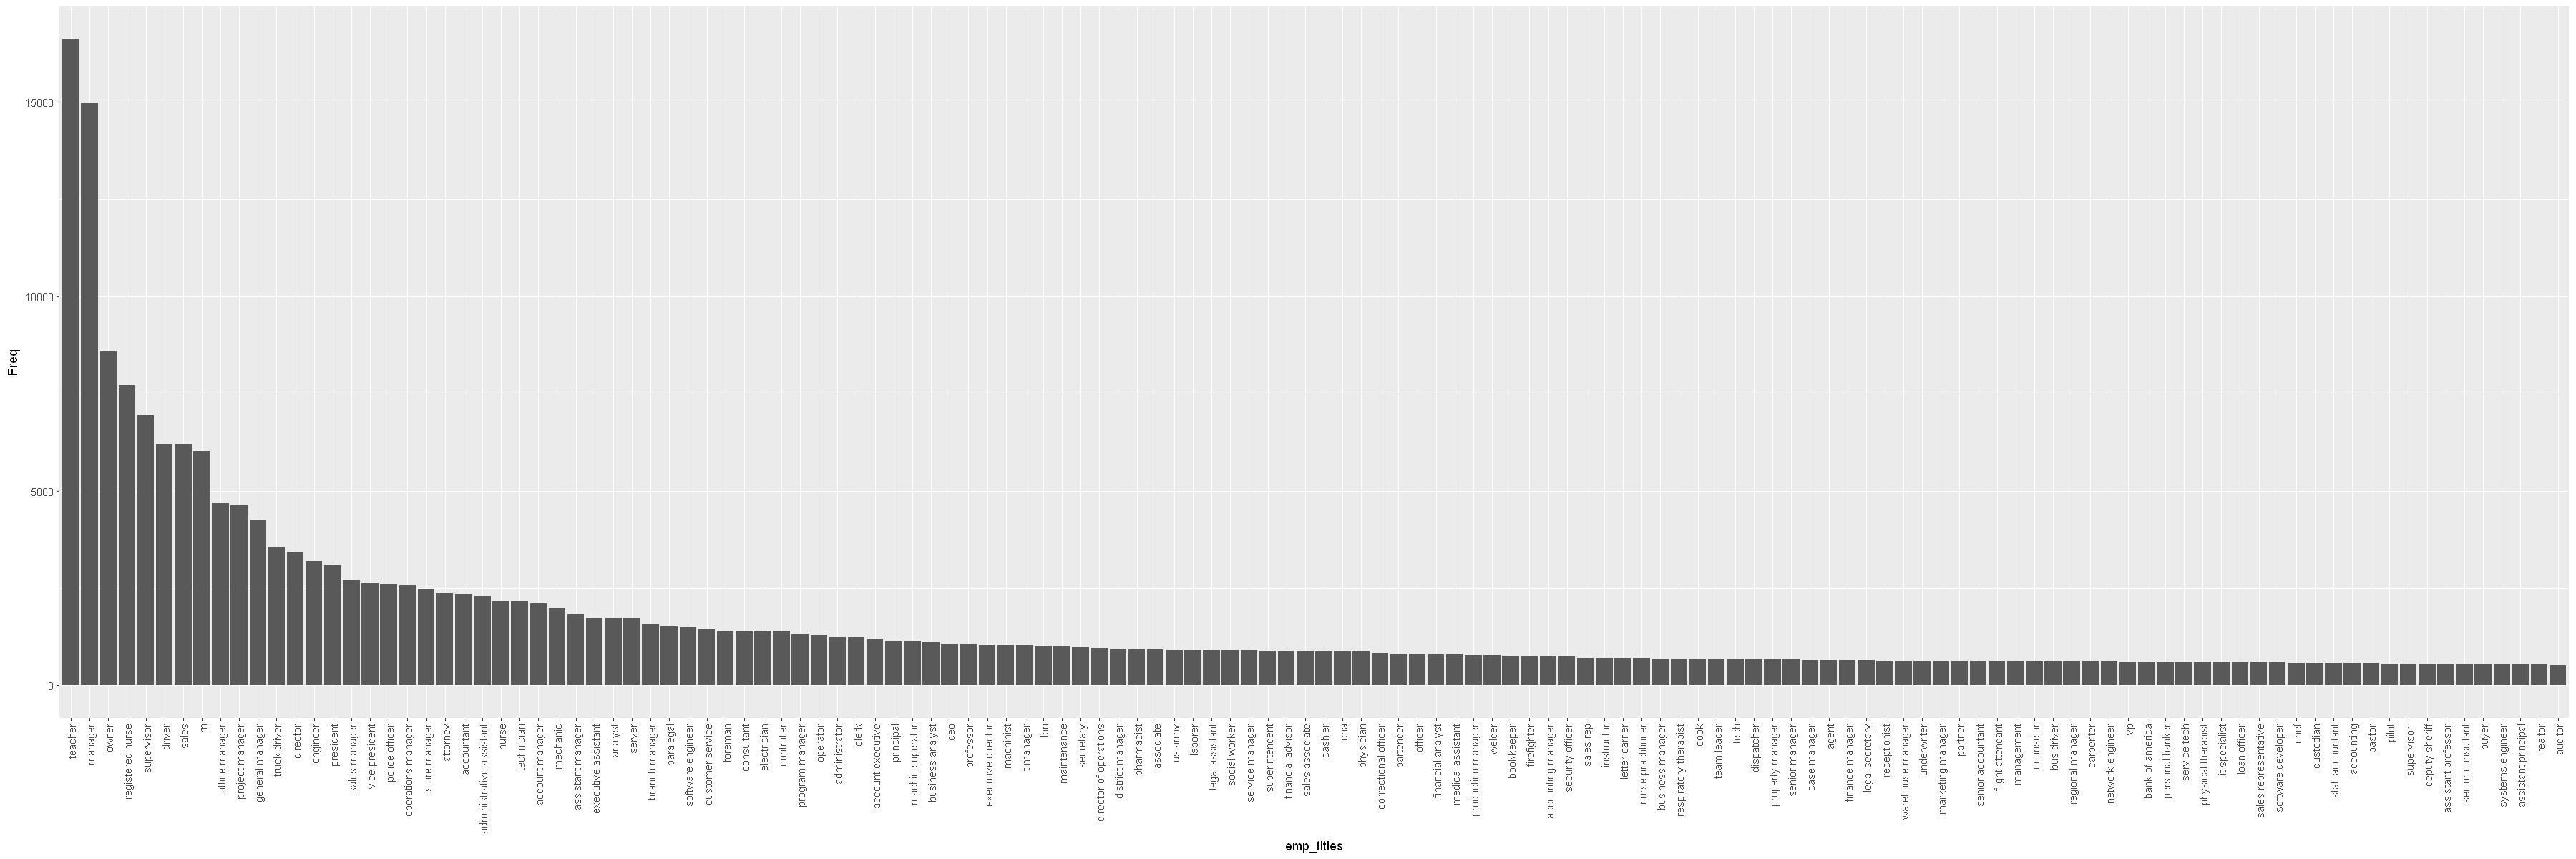

In [63]:
# bar plot 
emp_title.pop = sort(table(loan$emp_title)[which(table(loan$emp_title)>500)], decreasing = T)
emp_title.pop = as.data.frame(emp_title.pop)

options(repr.plot.width=30, repr.plot.height=10)
ggplot(data = emp_title.pop, aes(x=Var1, y=Freq)) + 
  geom_bar(stat="identity") + 
#    scale_y_log10() + 
    scale_x_discrete(name ="emp_titles", 
                     limits=emp_title.pop$Var1)+
  theme(axis.text.x = element_text(angle=90, hjust=1, vjust=.5),
        legend.position = "none")

In [ ]:
# possible feature engineering : binning
# https://towardsdatascience.com/understanding-feature-engineering-part-1-continuous-numeric-data-da4e47099a7b

### home_ownership with int_rate

In [64]:
unique(loan$home_ownership)

[1] "RENT"     "OWN"      "MORTGAGE" "OTHER"    "NONE"     "ANY"

In [65]:
# so small
sum(loan$home_ownership == "NONE") / dim(loan)[1]

[1] 5.634571e-05

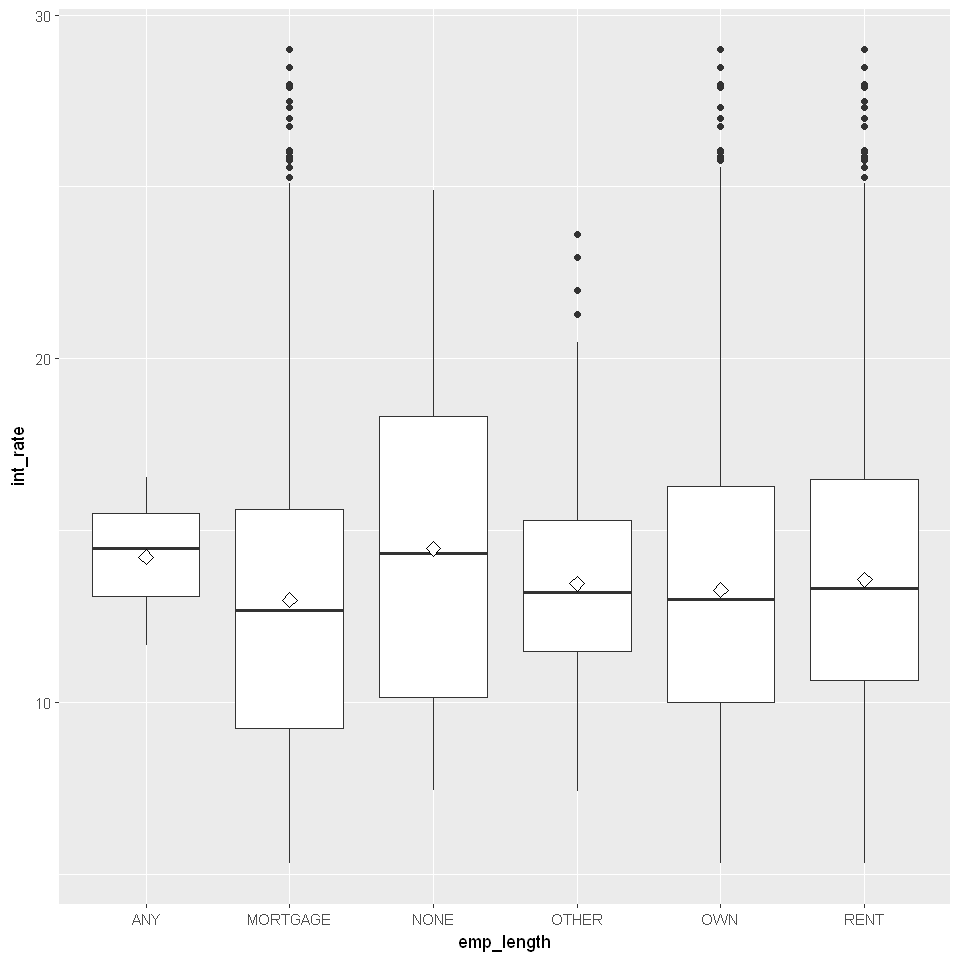

In [66]:
# boxplot 1
options(repr.plot.width=8, repr.plot.height=8)
ggplot(loan, aes(x=factor(home_ownership), y=int_rate)) + 
#geom_jitter(alpha=0.3, color='lightgrey') +
geom_boxplot() + labs(x='emp_length') + 
stat_summary(fun.y="mean", geom="point", shape=23, size=3, fill="white")

we can observe rough trend, that mortage < own < rent

### zip code with int_rate

In [67]:
sum(is.na(loan$zip_code))/dim(loan)[1]

[1] 0

In [68]:
table(loan$zip_code, loan$addr_state)

       
          AK   AL   AR   AZ   CA   CO   CT   DC   DE   FL   GA   HI   IA   ID
  007xx    0    0    0    0    0    0    0    0    0    1    0    0    0    0
  008xx    0    0    0    0    0    0    0    0    0    0    0    0    0    0
  010xx    0    0    0    0    0    0    1    0    0    0    0    0    0    0
  011xx    0    0    0    0    0    0    1    0    0    0    0    0    0    0
  012xx    0    0    0    0    0    0    0    0    0    0    0    0    0    0
  013xx    0    0    0    0    0    0    0    0    0    0    0    0    0    0
  014xx    0    0    0    0    0    0    0    0    0    0    0    0    0    0
  015xx    0    0    0    0    0    0    0    0    0    0    0    0    0    0
  016xx    0    0    0    0    0    0    0    0    0    0    0    0    0    0
  017xx    0    0    0    0    1    0    0    0    0    0    0    0    0    0
  018xx    0    0    0    0    0    0    0    0    0    0    0    0    0    0
  019xx    0    0    0    0    0    0    0    0    0    

In [69]:
# possible : feature engineering combine zip_code and addr_state to generate more accurate address

## USER FEATURES (financial specific) vs int_rate

### annual_inc with int_rate

In [70]:
length(which(is.na(loan$annual_inc) | (loan$annual_inc == 0)))/dim(loan)[1]

[1] 6.761485e-06

In [73]:
summary(loan$annual_inc)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      0   45000   65000   75028   90000 9500000       4 

In [76]:
length(which(loan$annual_inc == 0))

[1] 2

In [77]:
#impute missing value and noise data
loan$annual_inc[which(is.na(loan$annual_inc) | (loan$annual_inc == 0))] = mean(loan$annual_inc, na.rm=T)
#loan$annual_inc[which(is.na(loan$annual_inc) == 0)] = mean(loan$annual_inc, na.rm=T)

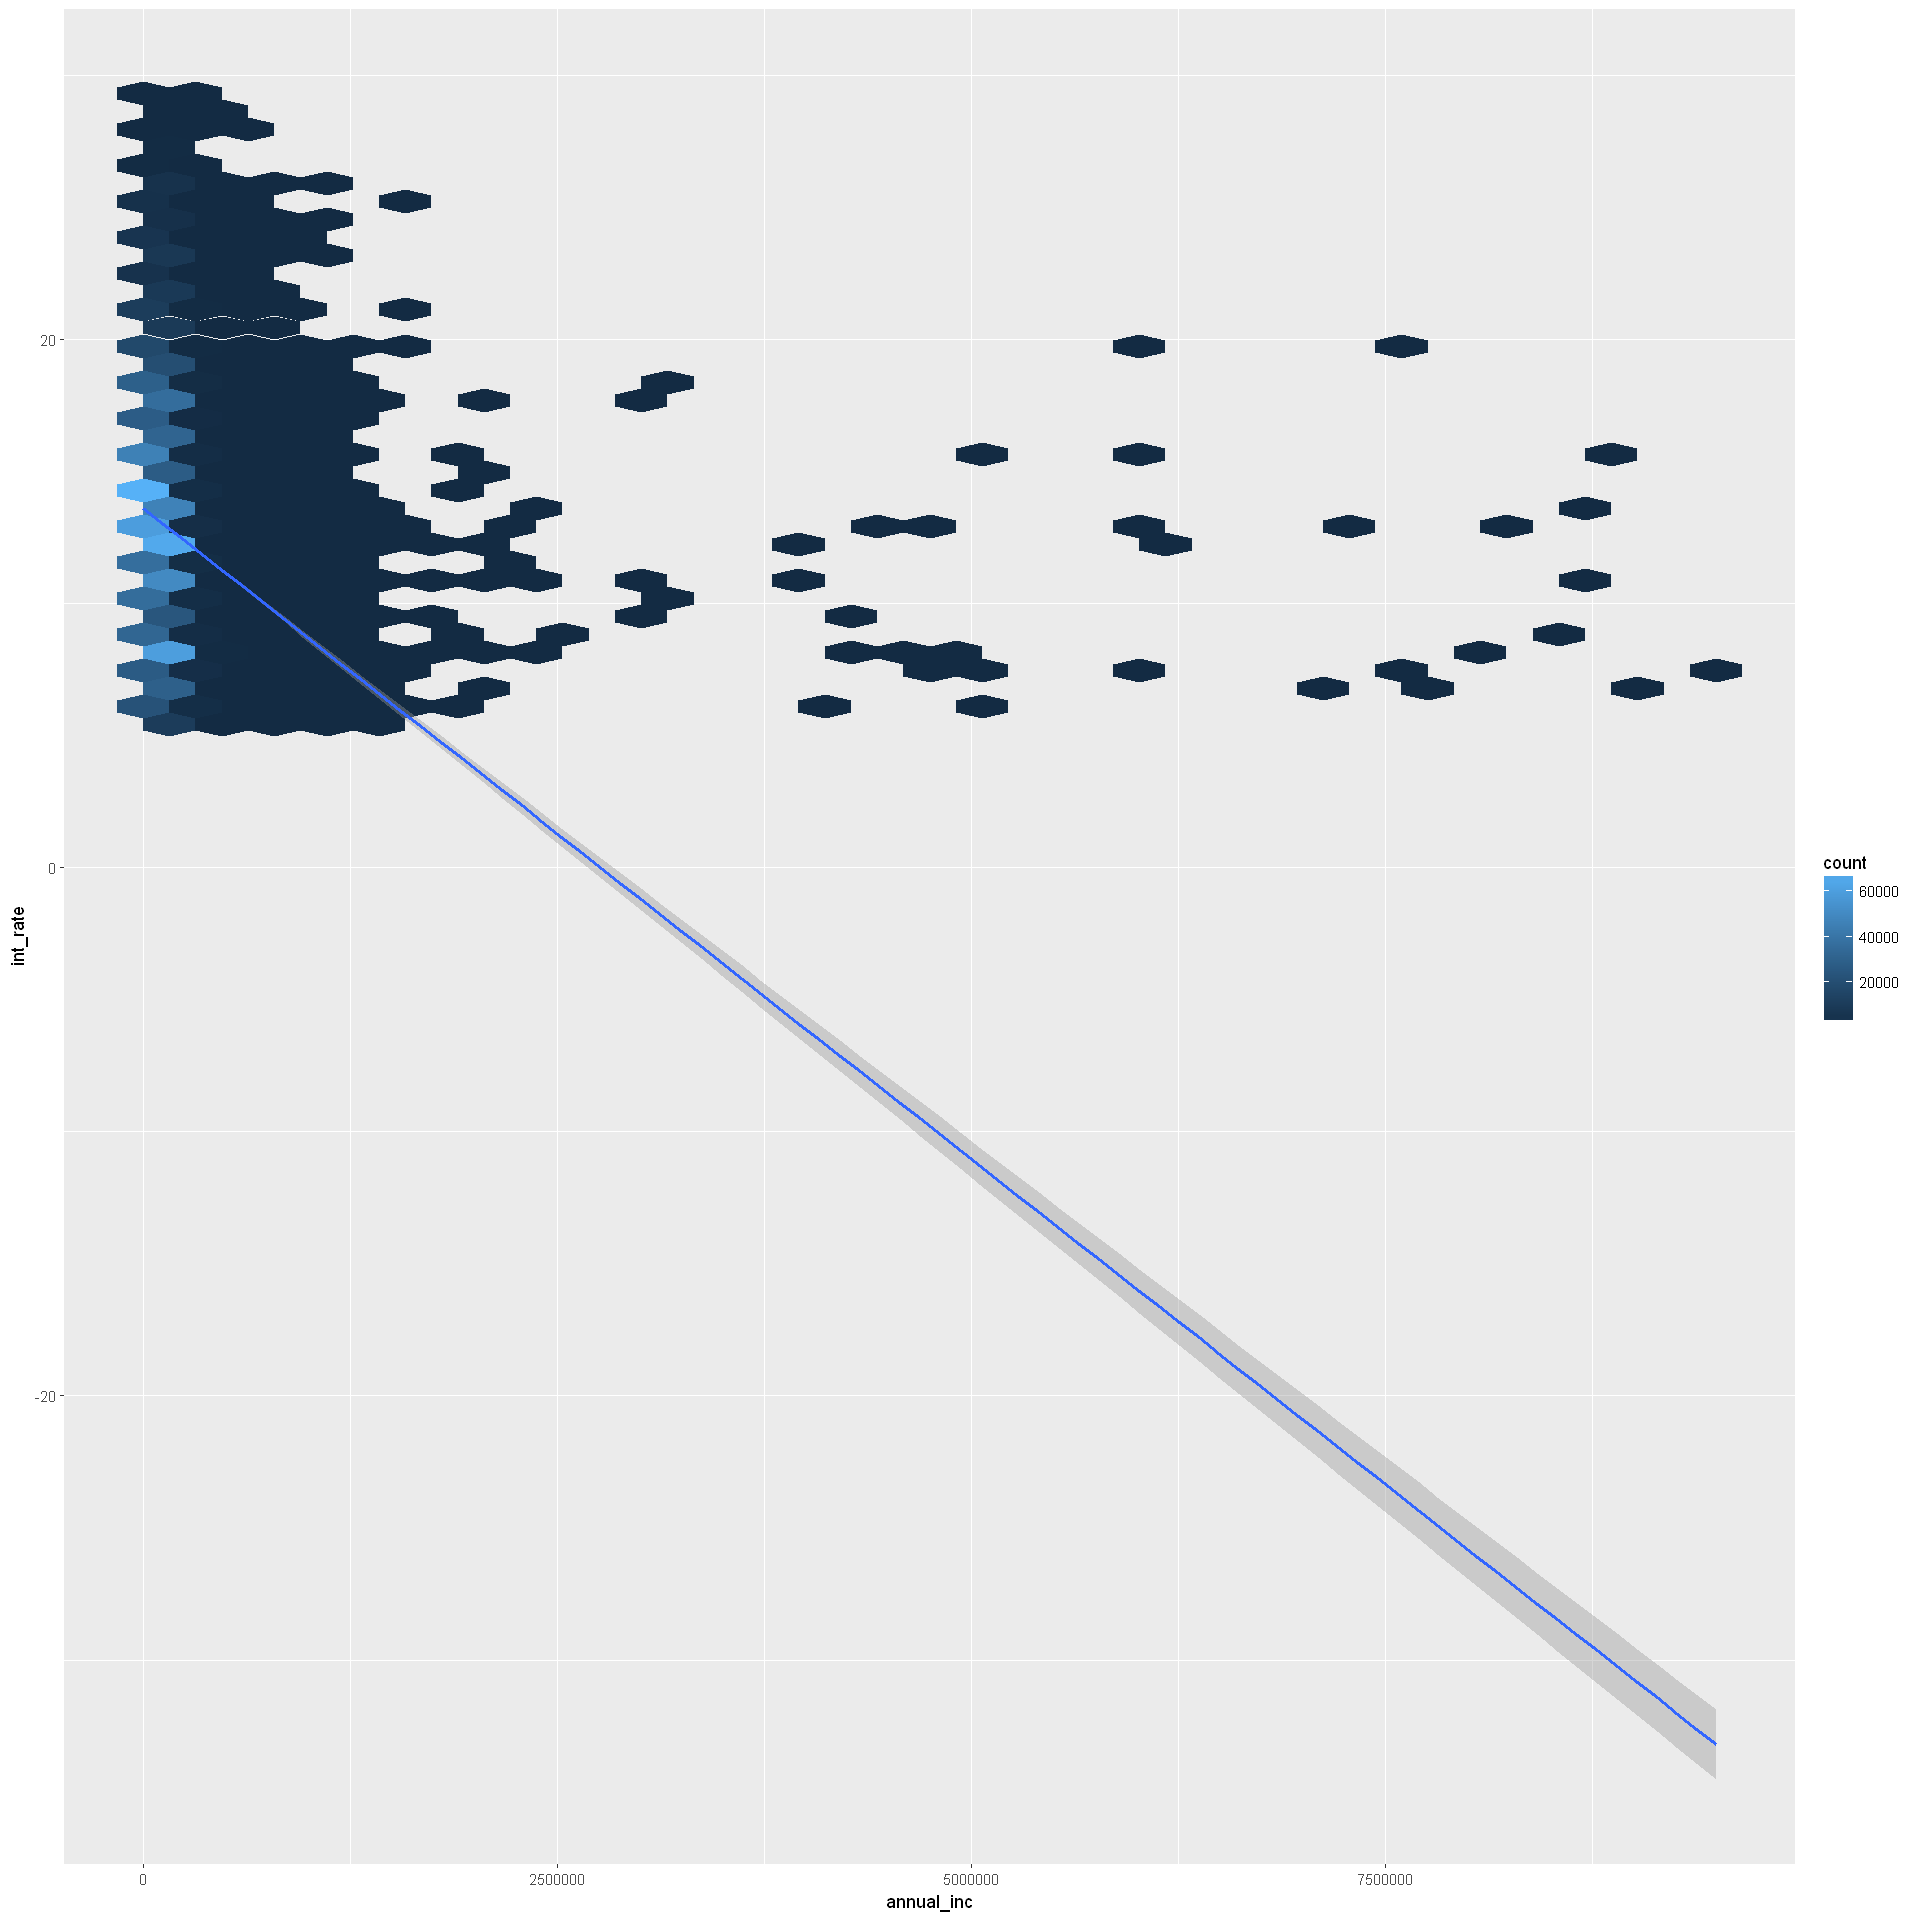

In [78]:
# linear relationship
options(repr.plot.width=16, repr.plot.height=16)
ggplot(loan, aes(x = annual_inc, y=int_rate)) + geom_hex() + stat_smooth(method=lm)

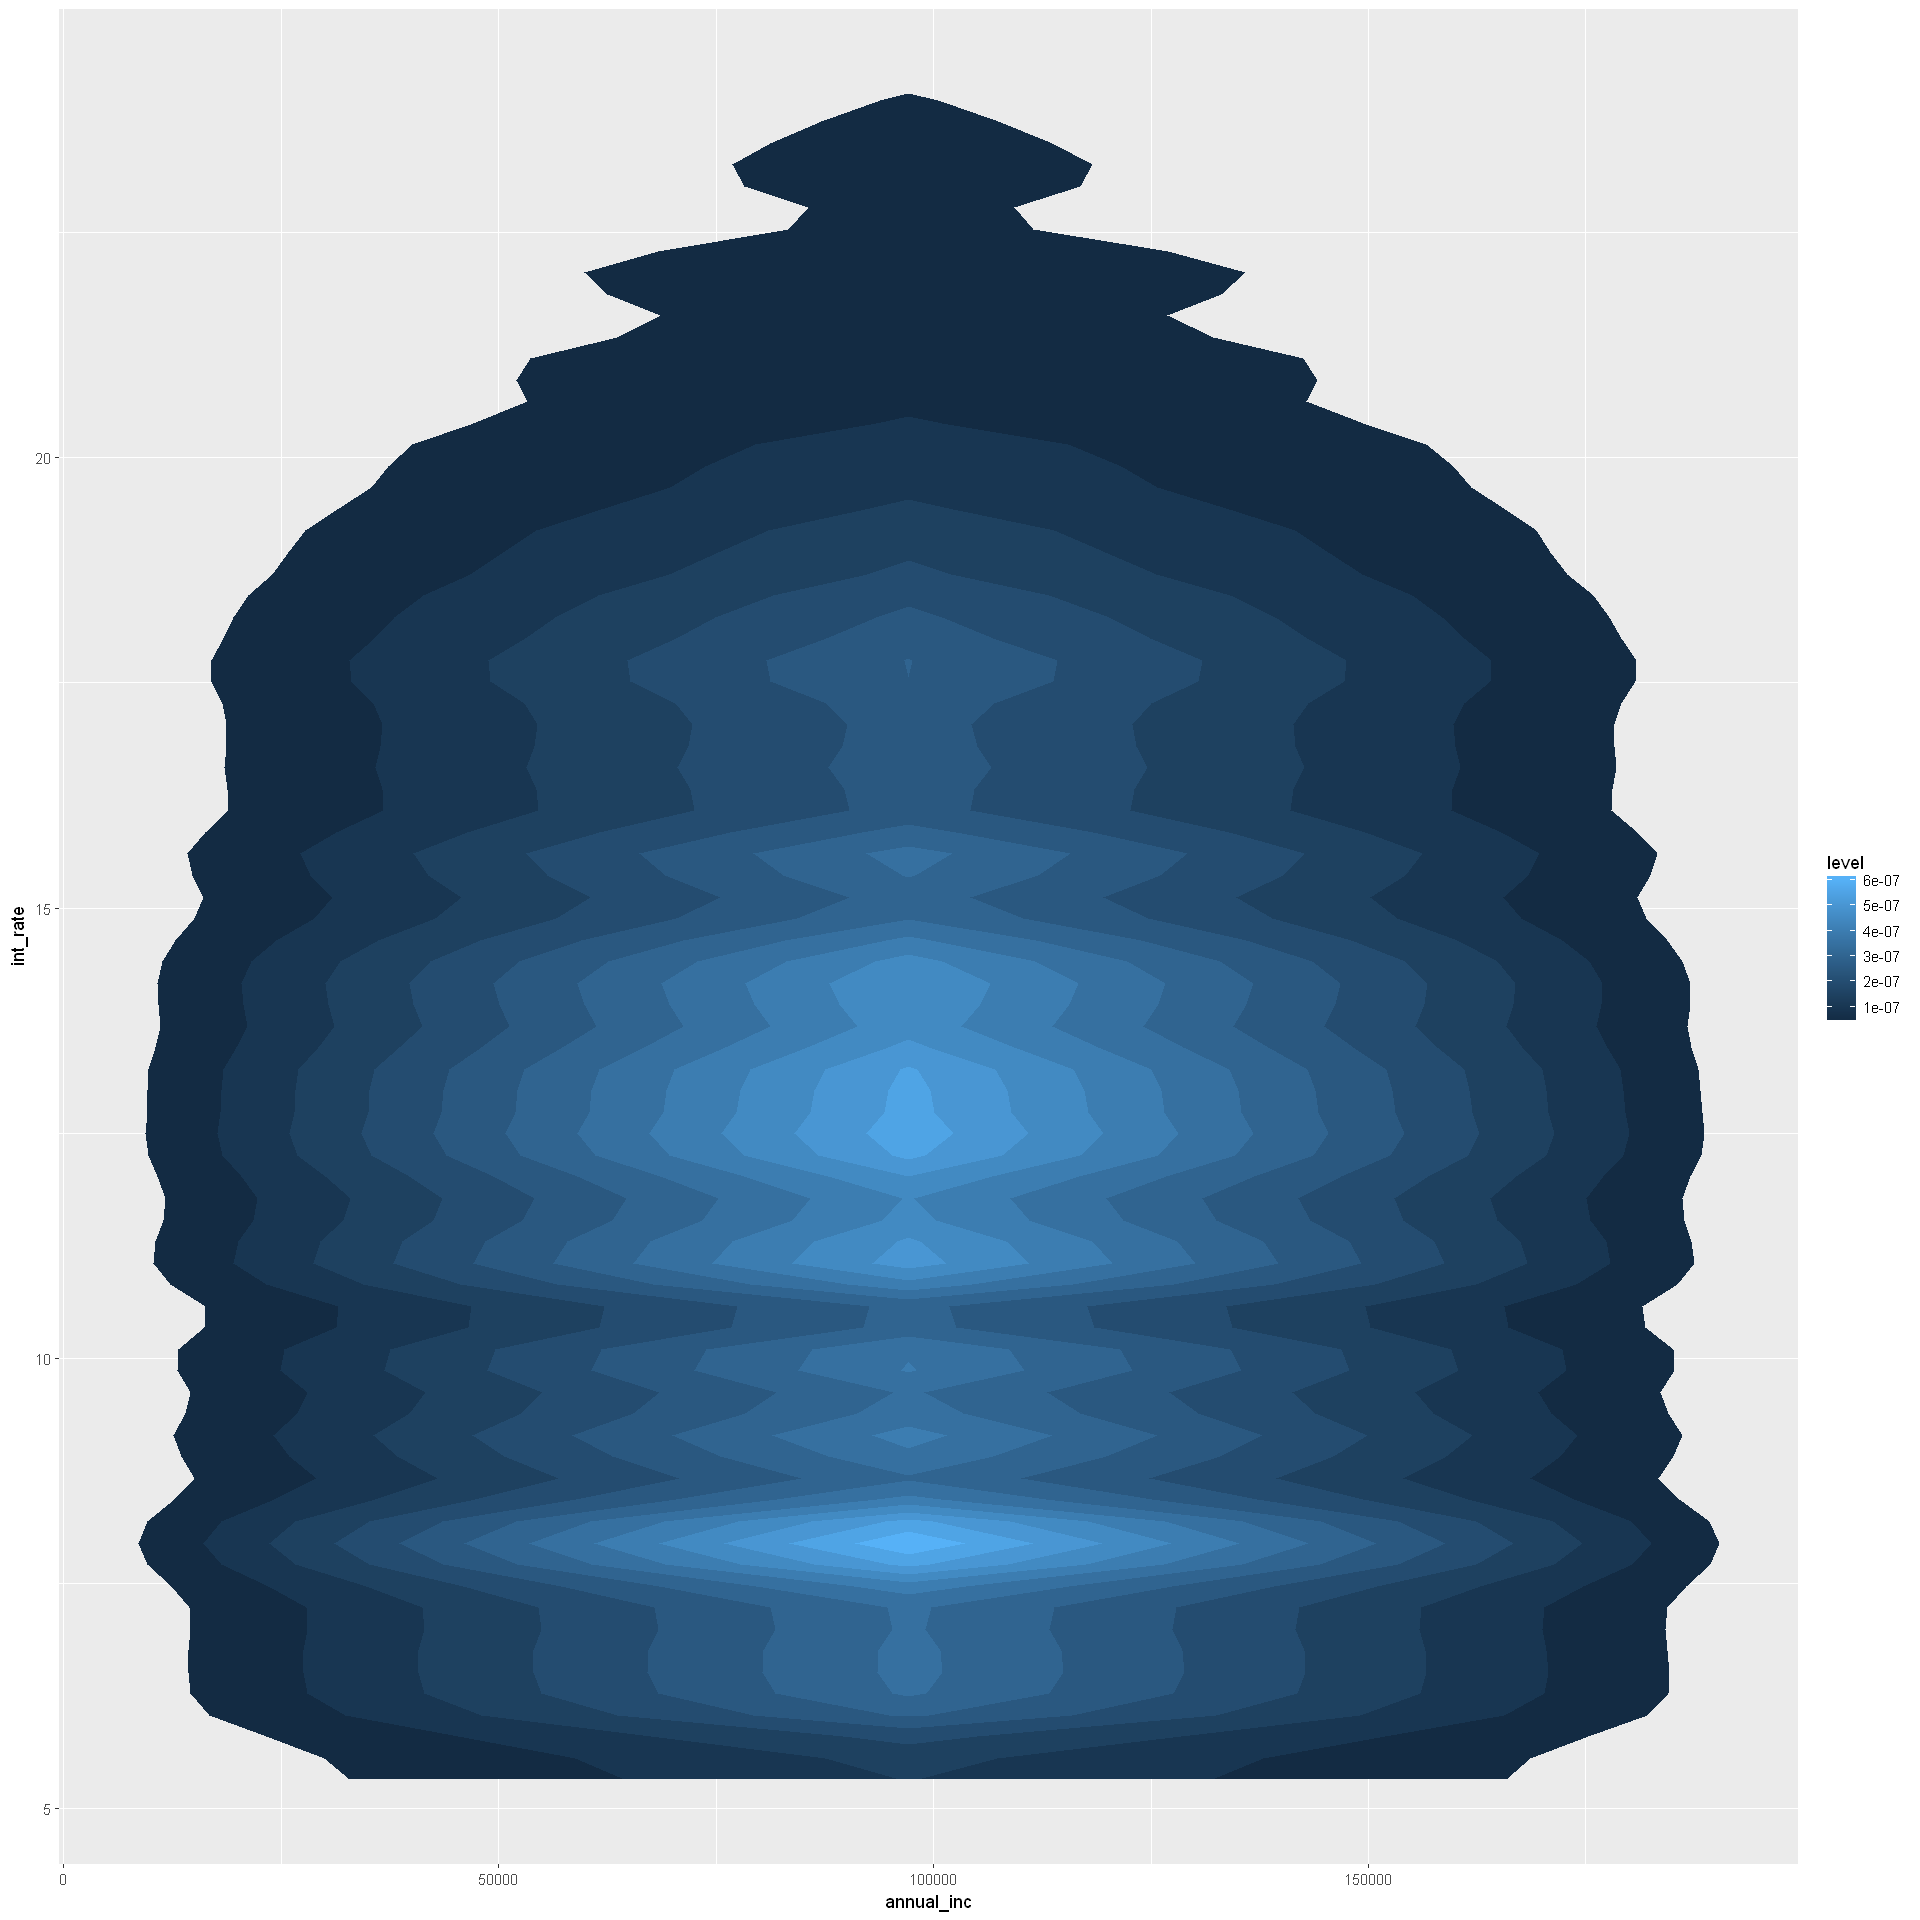

In [79]:
ggplot(loan, aes(x = annual_inc, y=int_rate)) + 
stat_density_2d(aes(fill = ..level..), geom = "polygon")

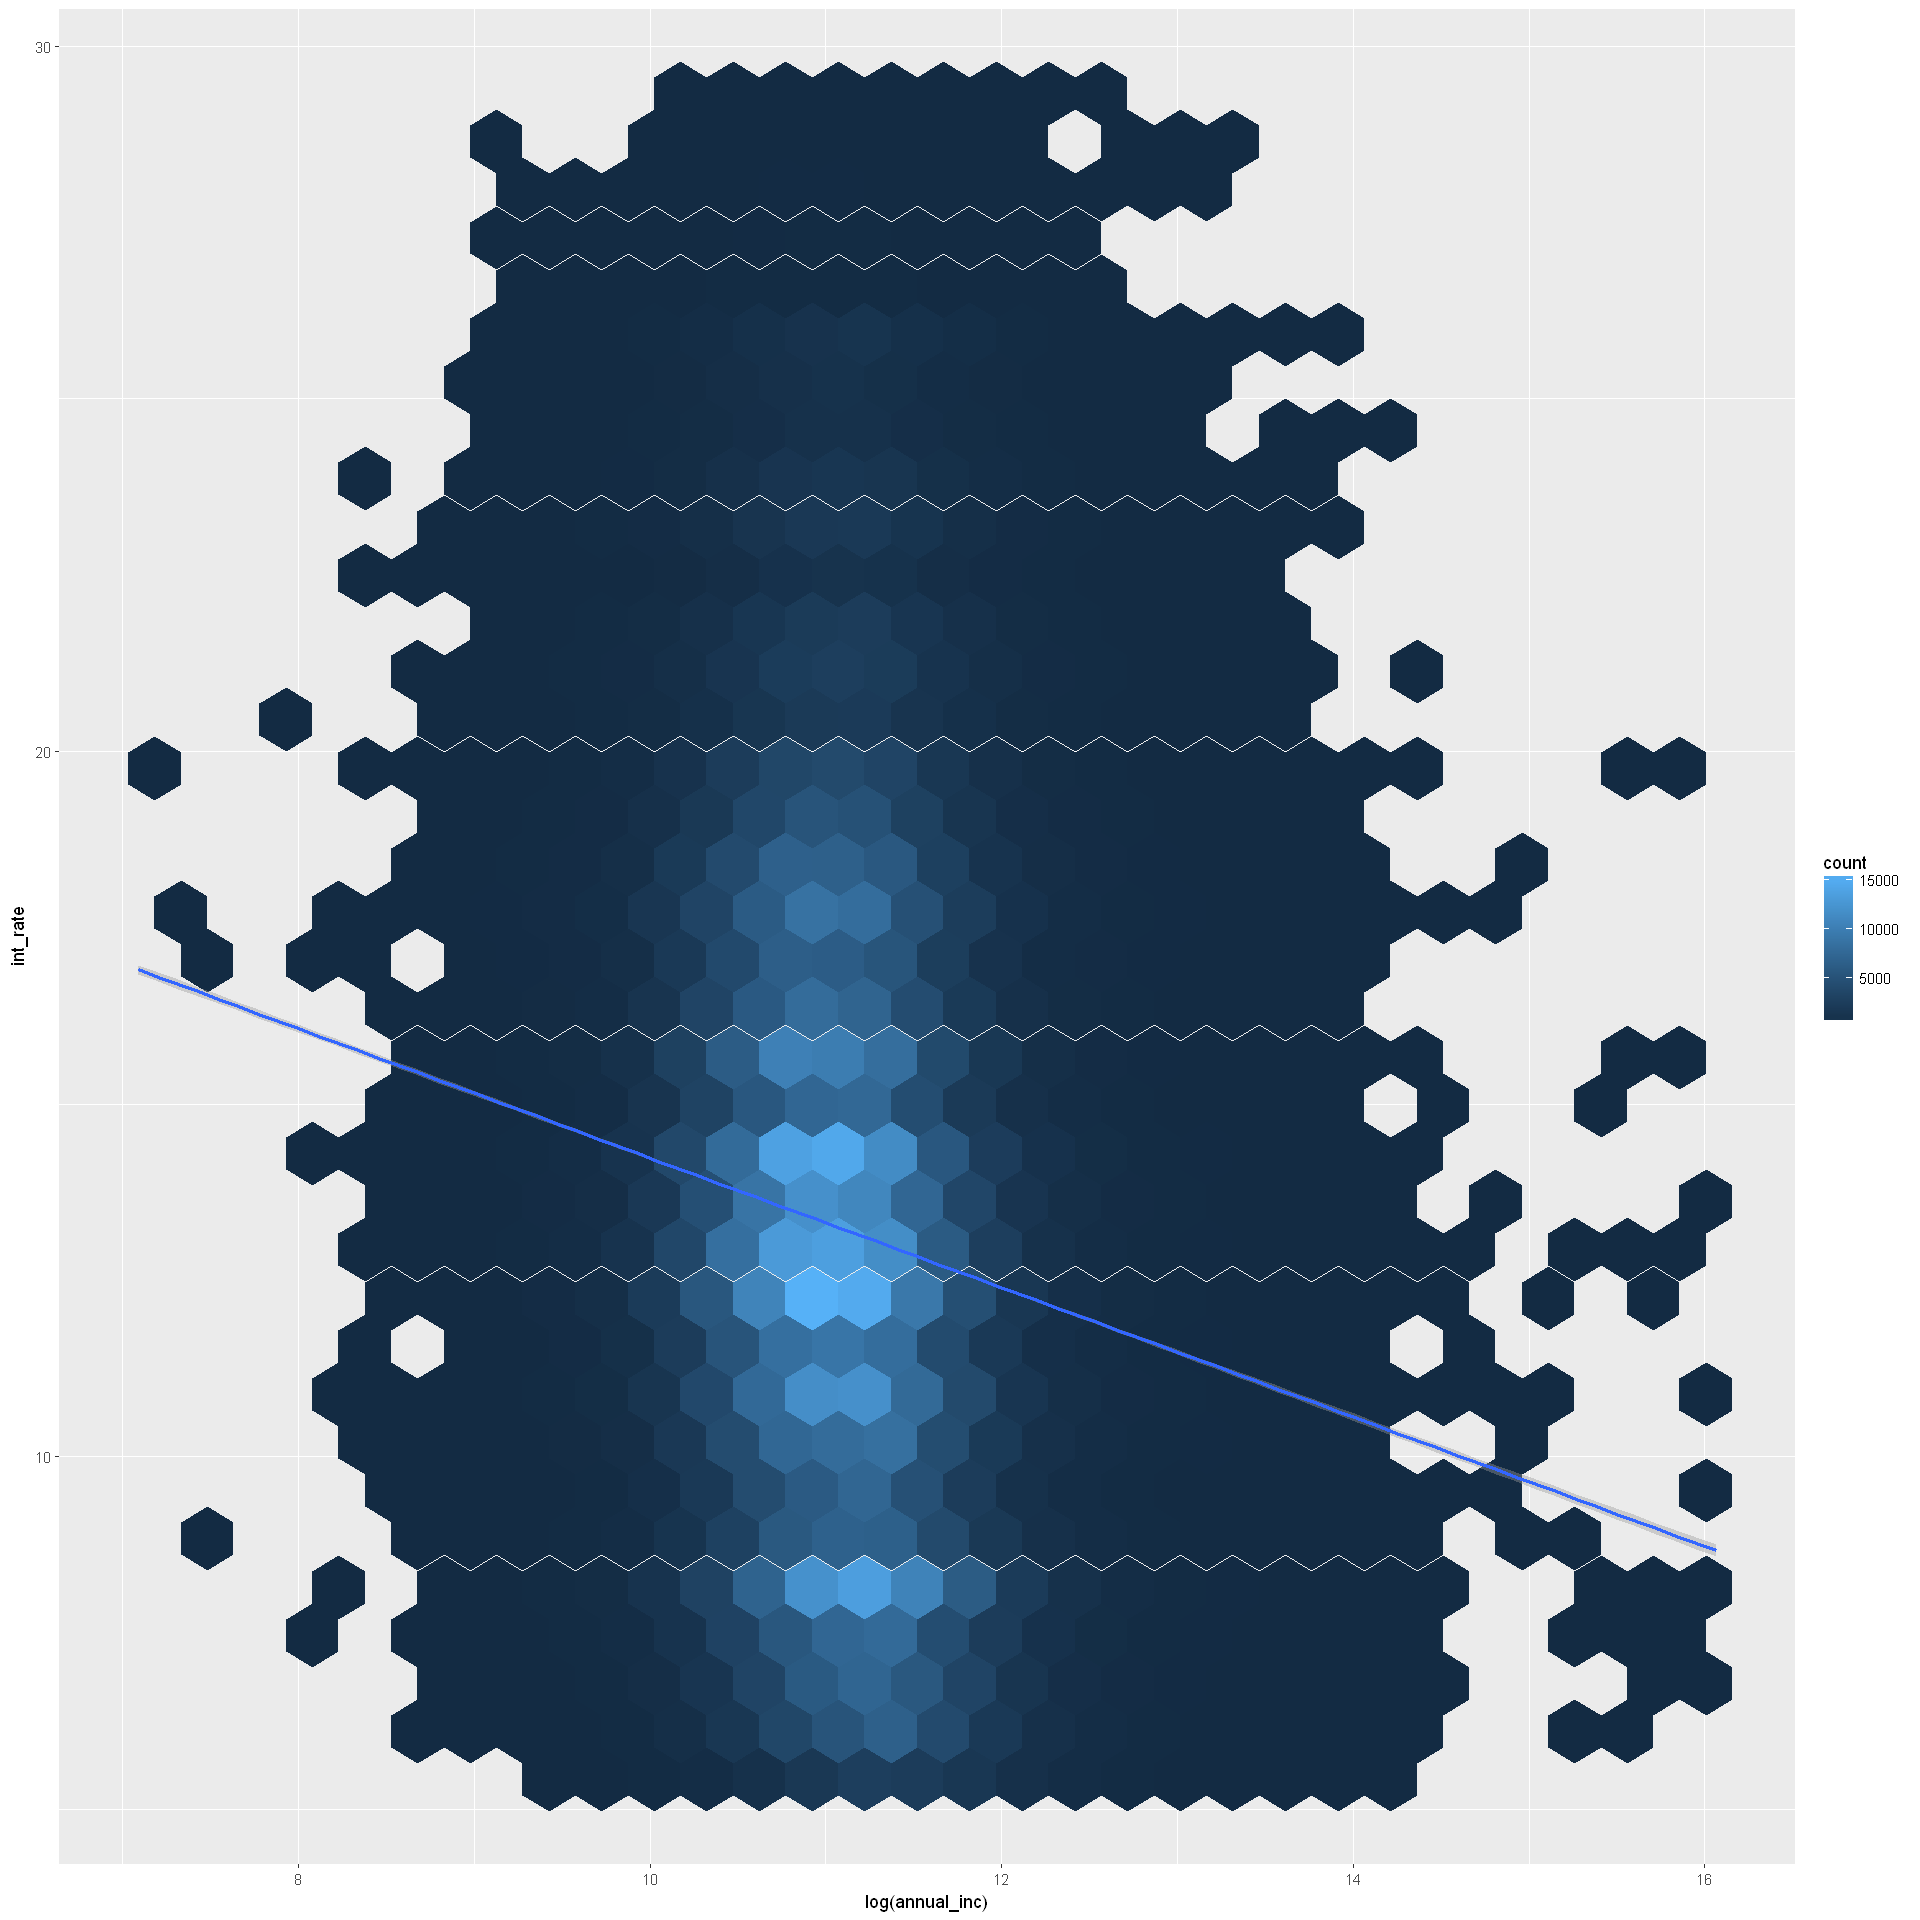

In [80]:
# linear relationship in log scale : possible feature engineering
options(repr.plot.width=16, repr.plot.height=16)
ggplot(loan, aes(x = log(annual_inc), y=int_rate)) + geom_hex() + stat_smooth(method=lm)

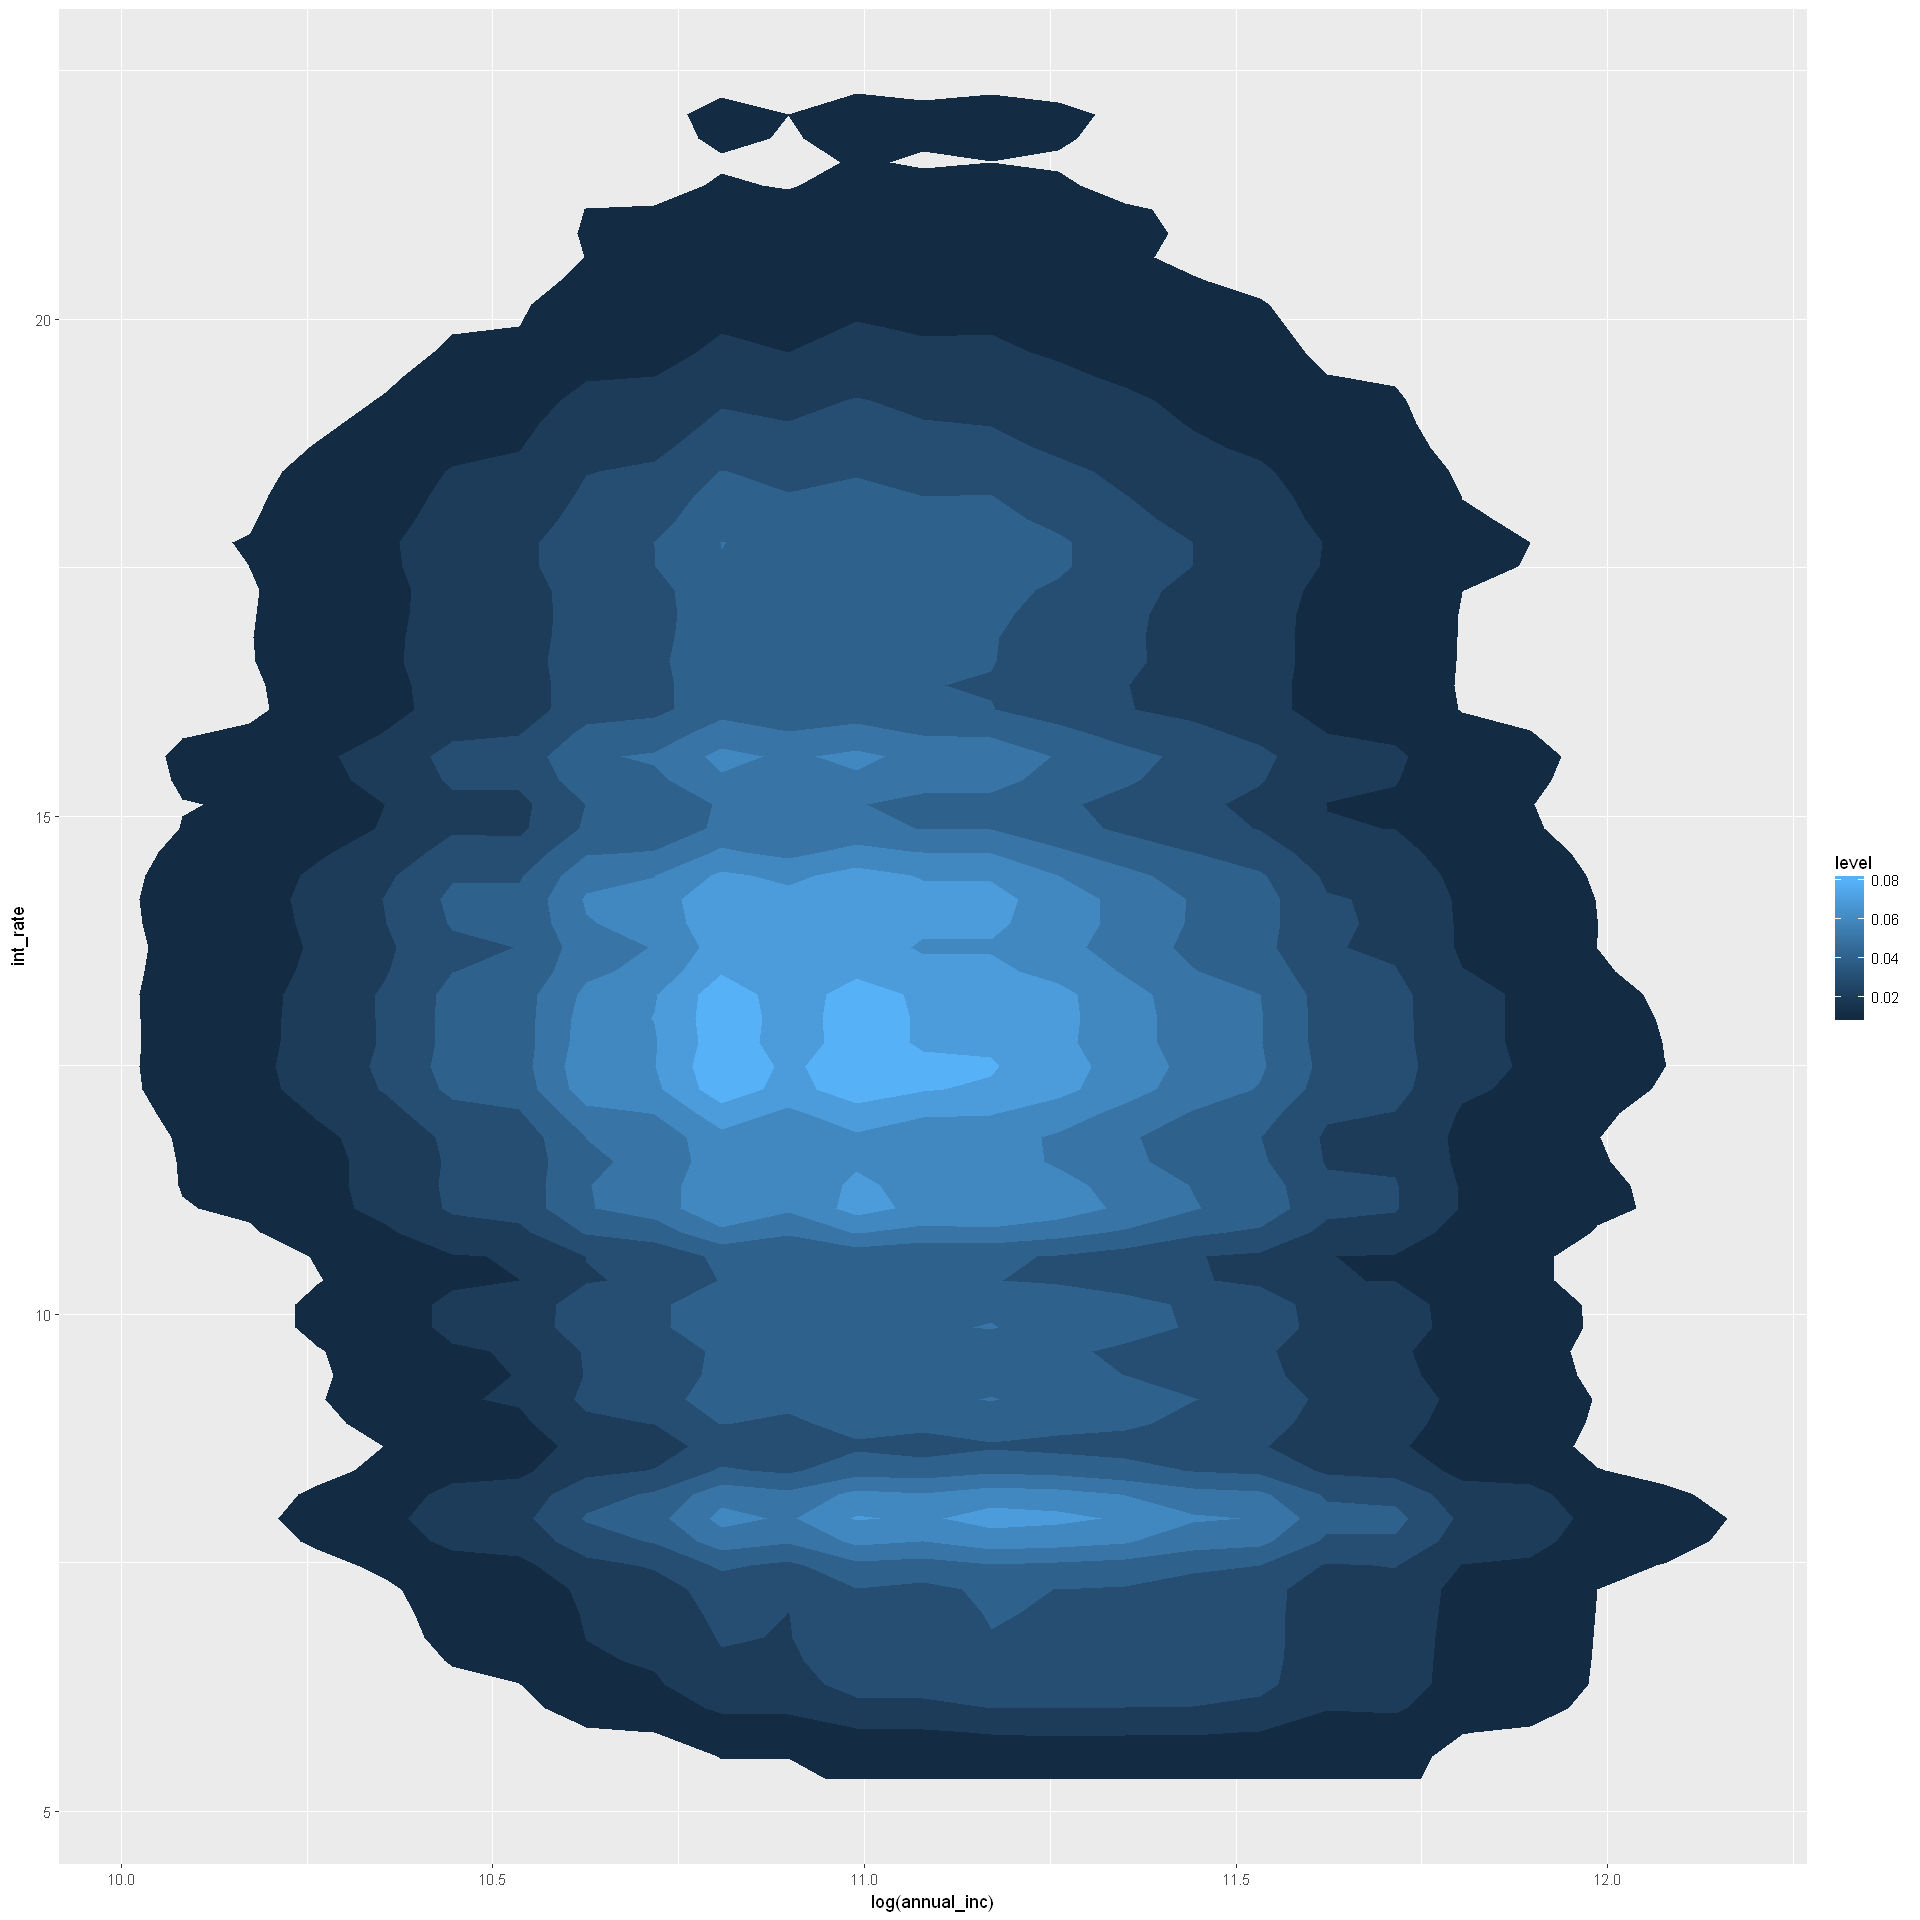

In [81]:
ggplot(loan, aes(x = log(annual_inc), y=int_rate)) + 
stat_density_2d(aes(fill = ..level..), geom = "polygon")

In [82]:
cor(loan$annual_inc, loan$int_rate)

[1] -0.07278456

In [83]:
# possible feature
cor(log(loan$annual_inc), loan$int_rate)

[1] -0.110645

### annual_inc_joint with int_rate

In [84]:
# drop this feature
sum(is.na(loan$annual_inc_joint))/dim(loan)[1]

Warning message in is.na(loan$annual_inc_joint):
"is.na() applied to non-(list or vector) of type 'NULL'"

[1] 0

### verified_status_joint with int_rate

In [85]:
unique(loan$verification_status)

[1] "Verified"        "Source Verified" "Not Verified"

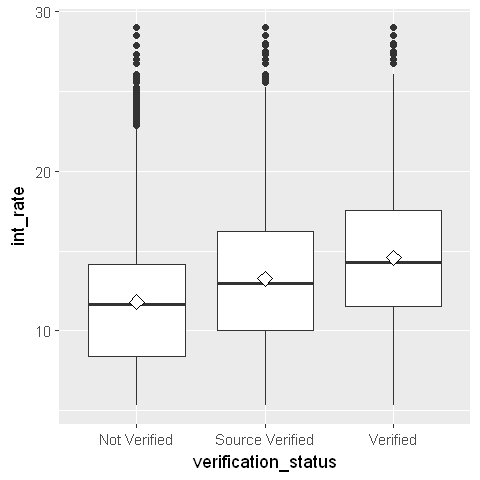

In [86]:
# boxplot 1
options(repr.plot.width=4, repr.plot.height=4)
ggplot(loan, aes(x=factor(verification_status), y=int_rate)) + 
geom_boxplot() + labs(x='verification_status') + 
stat_summary(fun.y="mean", geom="point", shape=23, size=3, fill="white")

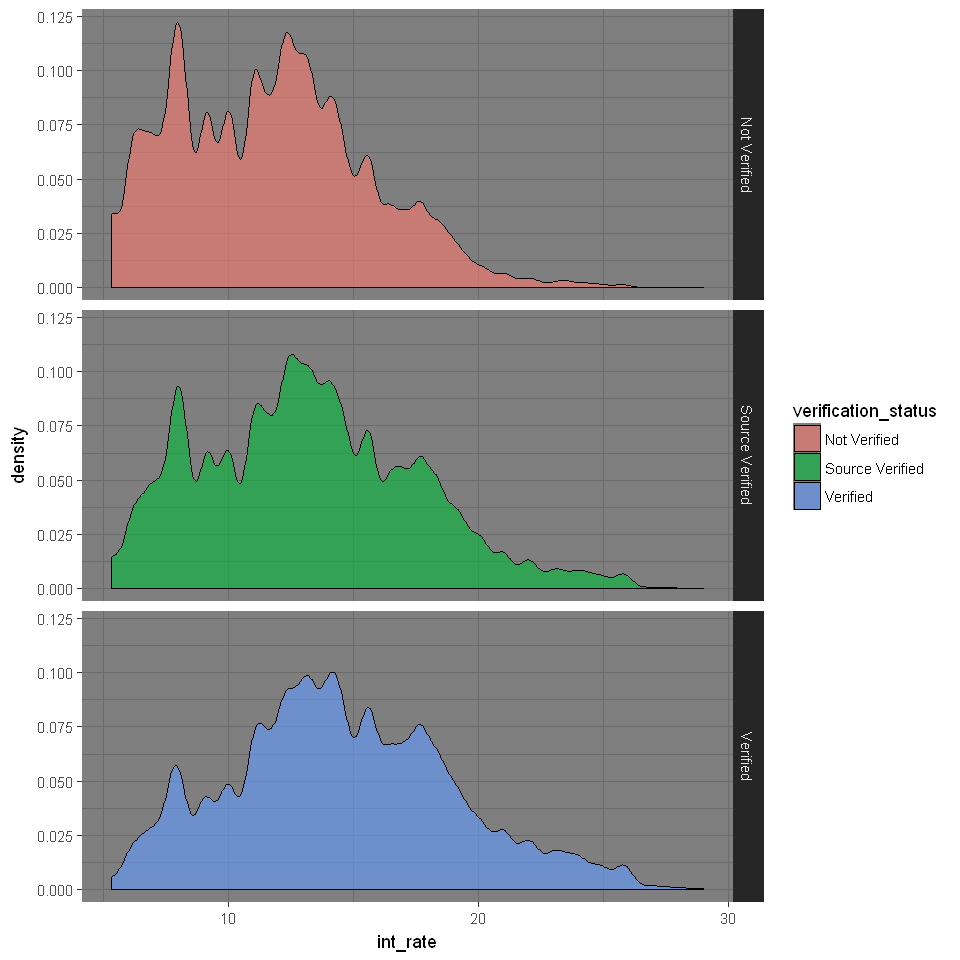

In [87]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(loan, aes(x=int_rate, y= ..density.., fill=verification_status)) + 
theme_dark() + 
facet_grid(verification_status ~ .) +
geom_density(alpha= 0.6)

In [88]:
table(loan$verification_status)


   Not Verified Source Verified        Verified 
         266750          329558          291071 

In [89]:
# anova analysis on different groups
aov.res = aov(int_rate ~ factor(verification_status), na.action = na.omit, data = loan, )
summary(aov.res)

                                Df   Sum Sq Mean Sq F value Pr(>F)    
factor(verification_status)      2  1080177  540089   30032 <2e-16 ***
Residuals                   887376 15958157      18                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

### dti with int_rate
dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

In [91]:
sum(is.na(loan$dti))/dim(loan)[1]#debt to ratio

[1] 0

In [92]:
quantile(loan$dti)

0%     25%     50%     75%    100% 
   0.00   11.91   17.65   23.95 9999.00

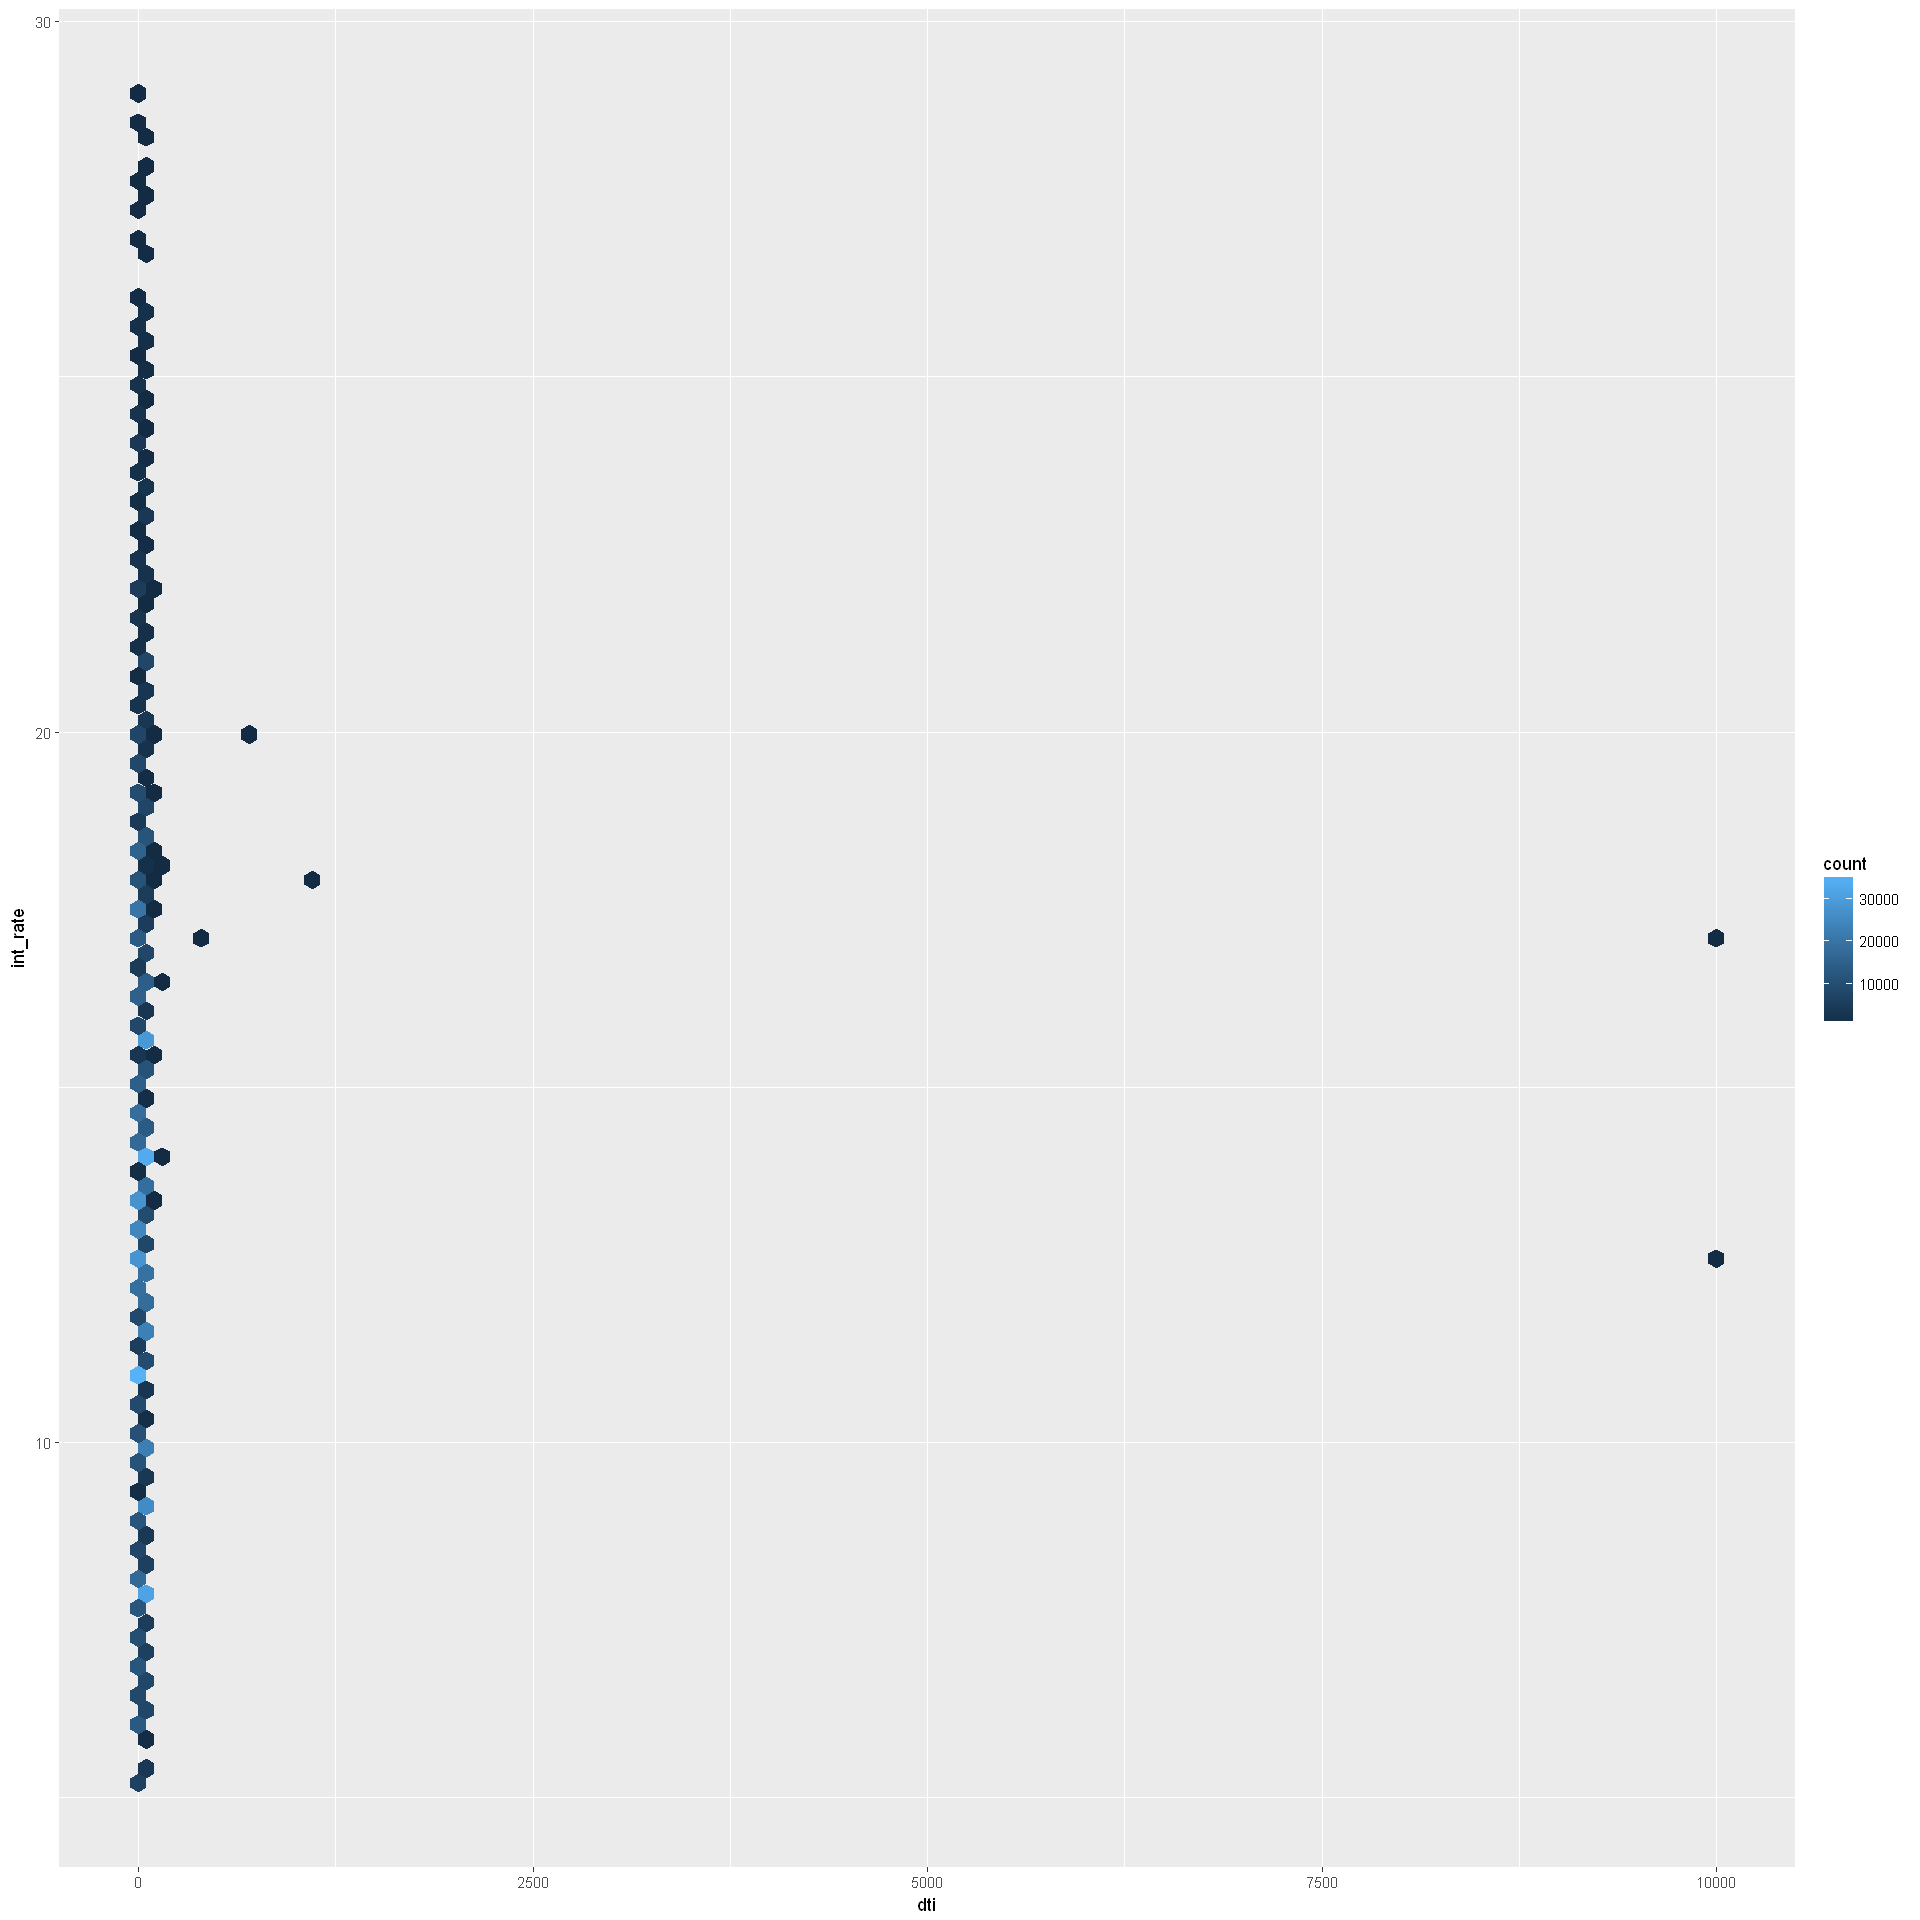

In [93]:
options(repr.plot.width=16, repr.plot.height=16)
ggplot(loan, aes(x = dti, y=int_rate)) + geom_hex(bins=100) #+ stat_smooth(method=lm)

In [94]:
# weak linear relationship
cor(loan$dti, loan$int_rate)

[1] 0.07990255

### dti_joint with int_rate

In [95]:
# drop this feature
sum(is.na(loan$dti_joint))/dim(loan)[1]

Warning message in is.na(loan$dti_joint):
"is.na() applied to non-(list or vector) of type 'NULL'"

[1] 0

### earliest_cr_line with int_rate

In [96]:
sum(is.na(loan$earliest_cr_line))/dim(loan)[1]

[1] 0

In [97]:
length(unique(loan$earliest_cr_line))

[1] 698

In [98]:
library(zoo)
loan$earliest_cr_line_date = as.Date(as.yearmon(loan$earliest_cr_line, "%b-%Y"))

Warning message:
"package 'zoo' was built under R version 3.4.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



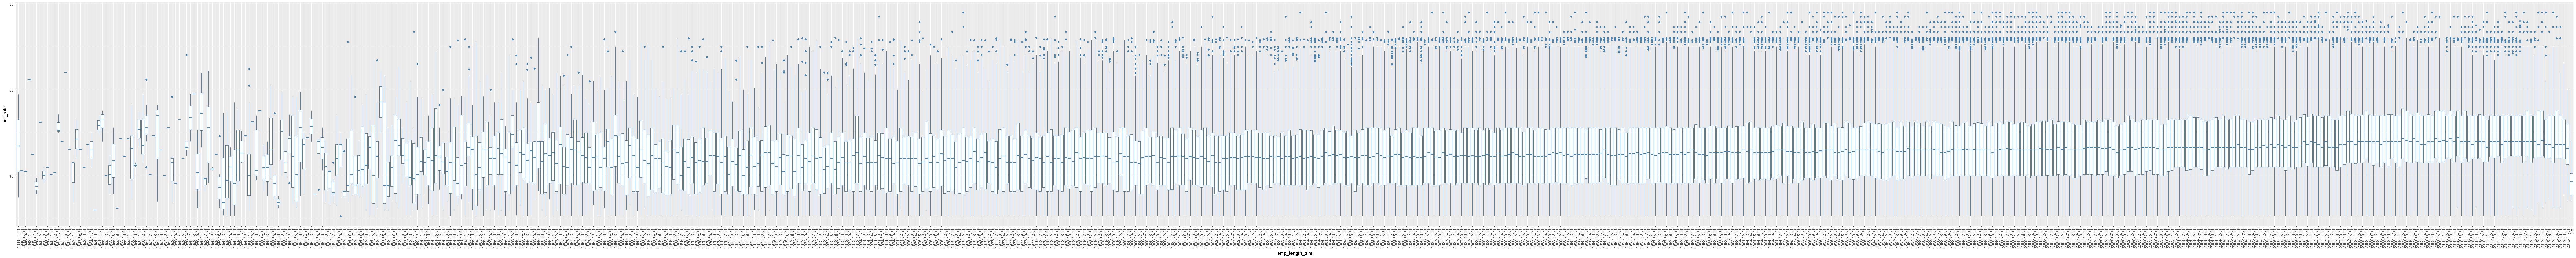

In [99]:
options(repr.plot.width=80, repr.plot.height=8)
ggplot(loan, aes(x=factor(earliest_cr_line_date), y=int_rate)) + 
geom_boxplot(color='steelblue') + labs(x='emp_length_sim') + 
theme(axis.text.x = element_text(angle=90, hjust=1, vjust=.5),
        legend.position = "none")

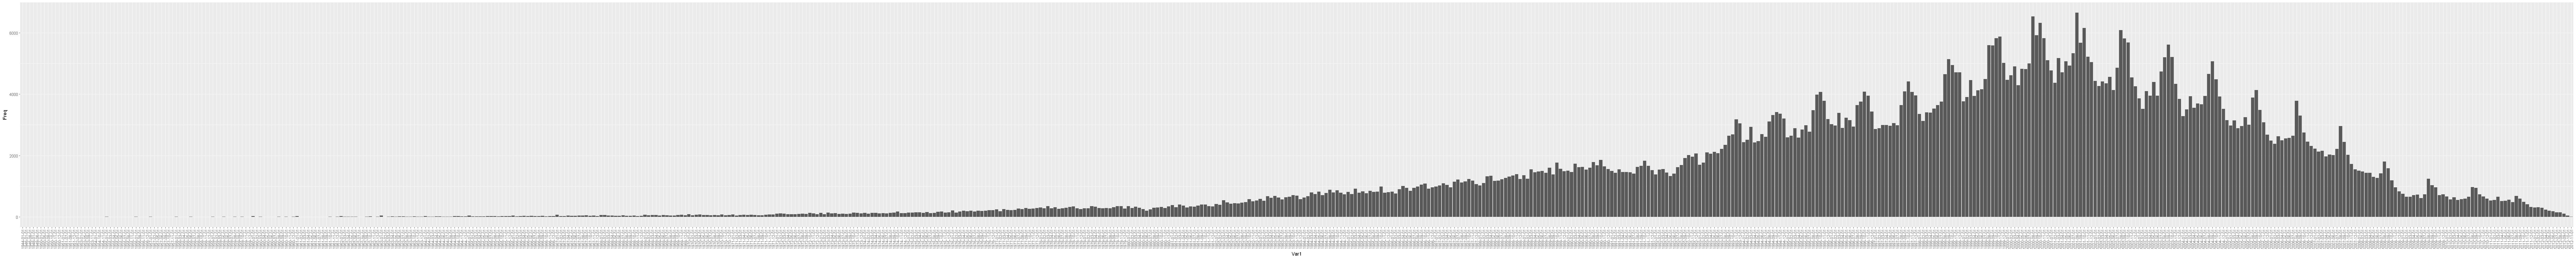

In [100]:
options(repr.plot.width=80, repr.plot.height=8)
ggplot(as.data.frame(table(loan$earliest_cr_line_date)), aes(x=Var1, y=Freq)) + 
geom_bar(stat="identity") +
theme(axis.text.x = element_text(angle=90, hjust=1, vjust=.5),
        legend.position = "none")

In [ ]:
# time series features for peak at every sep or august for count

### inq_fi with int_rate
inq_fi : Number of personal finance inquiries

In [101]:
# drop this feature
sum(is.na(loan$inq_fi))/dim(loan)[1]

Warning message in is.na(loan$inq_fi):
"is.na() applied to non-(list or vector) of type 'NULL'"

[1] 0

In [102]:
unique(loan$inq_fi)

NULL

### inq_last_12m with int_rate
inq_last_12m : Number of credit inquiries in past 12 months

In [103]:
# drop this feature
sum(is.na(loan$inq_last_12m))/dim(loan)[1]

Warning message in is.na(loan$inq_last_12m):
"is.na() applied to non-(list or vector) of type 'NULL'"

[1] 0

### inq_last_6mths with int_rate
inq_last_6mths : The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

In [108]:
sum(is.na(loan$inq_last_6mths))/dim(loan)[1]

[1] 3.268051e-05

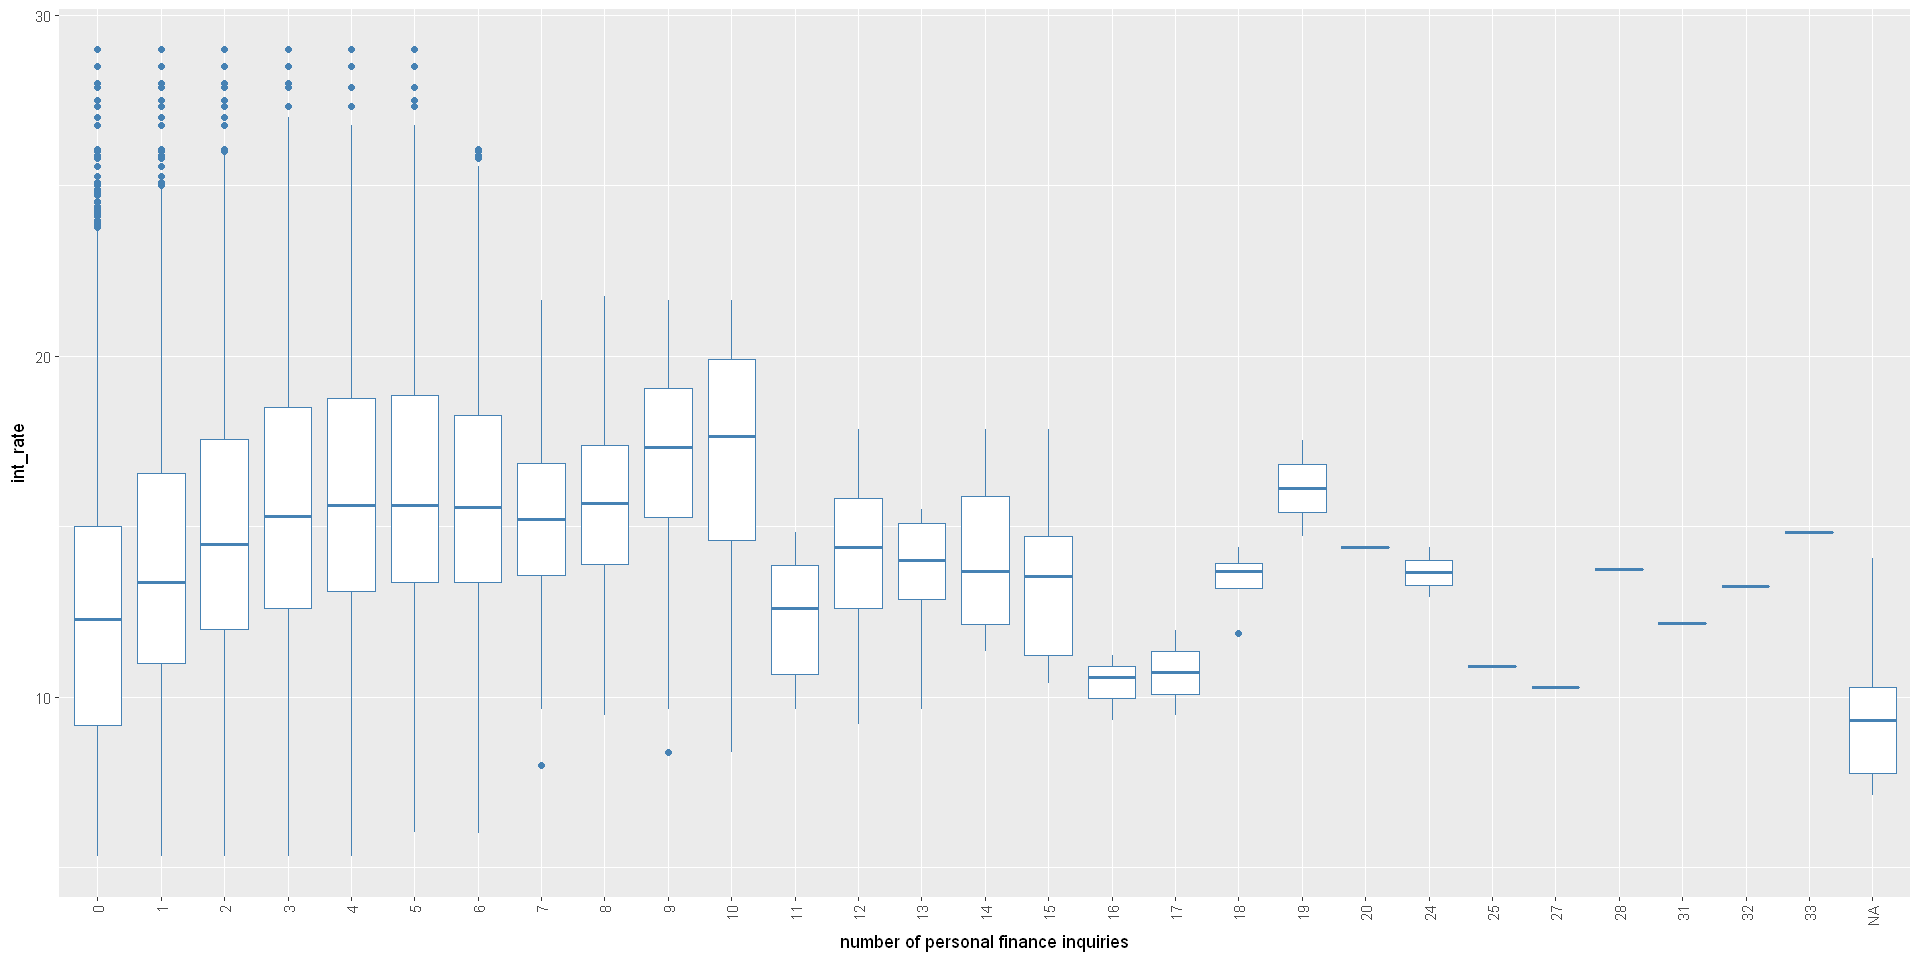

In [109]:
options(repr.plot.width=16, repr.plot.height=8)
ggplot(loan, aes(x=factor(inq_last_6mths), y=int_rate)) + 
geom_boxplot(color='steelblue') + labs(x='number of personal finance inquiries') + 
theme(axis.text.x = element_text(angle=90, hjust=1, vjust=.5),
        legend.position = "none")

the box plot show the interest rate and number of personal finance inquiries have positive relationship, but then the trendency is not obvious due to less number of observations

In [110]:
table(loan$inq_last_6mths)


     0      1      2      3      4      5      6      7      8      9     10 
497905 241494  94117  37398  10758   3985   1231    195    122     50     24 
    11     12     13     14     15     16     17     18     19     20     24 
    15     15      6      6      9      3      2      4      2      1      2 
    25     27     28     31     32     33 
     1      1      1      1      1      1 

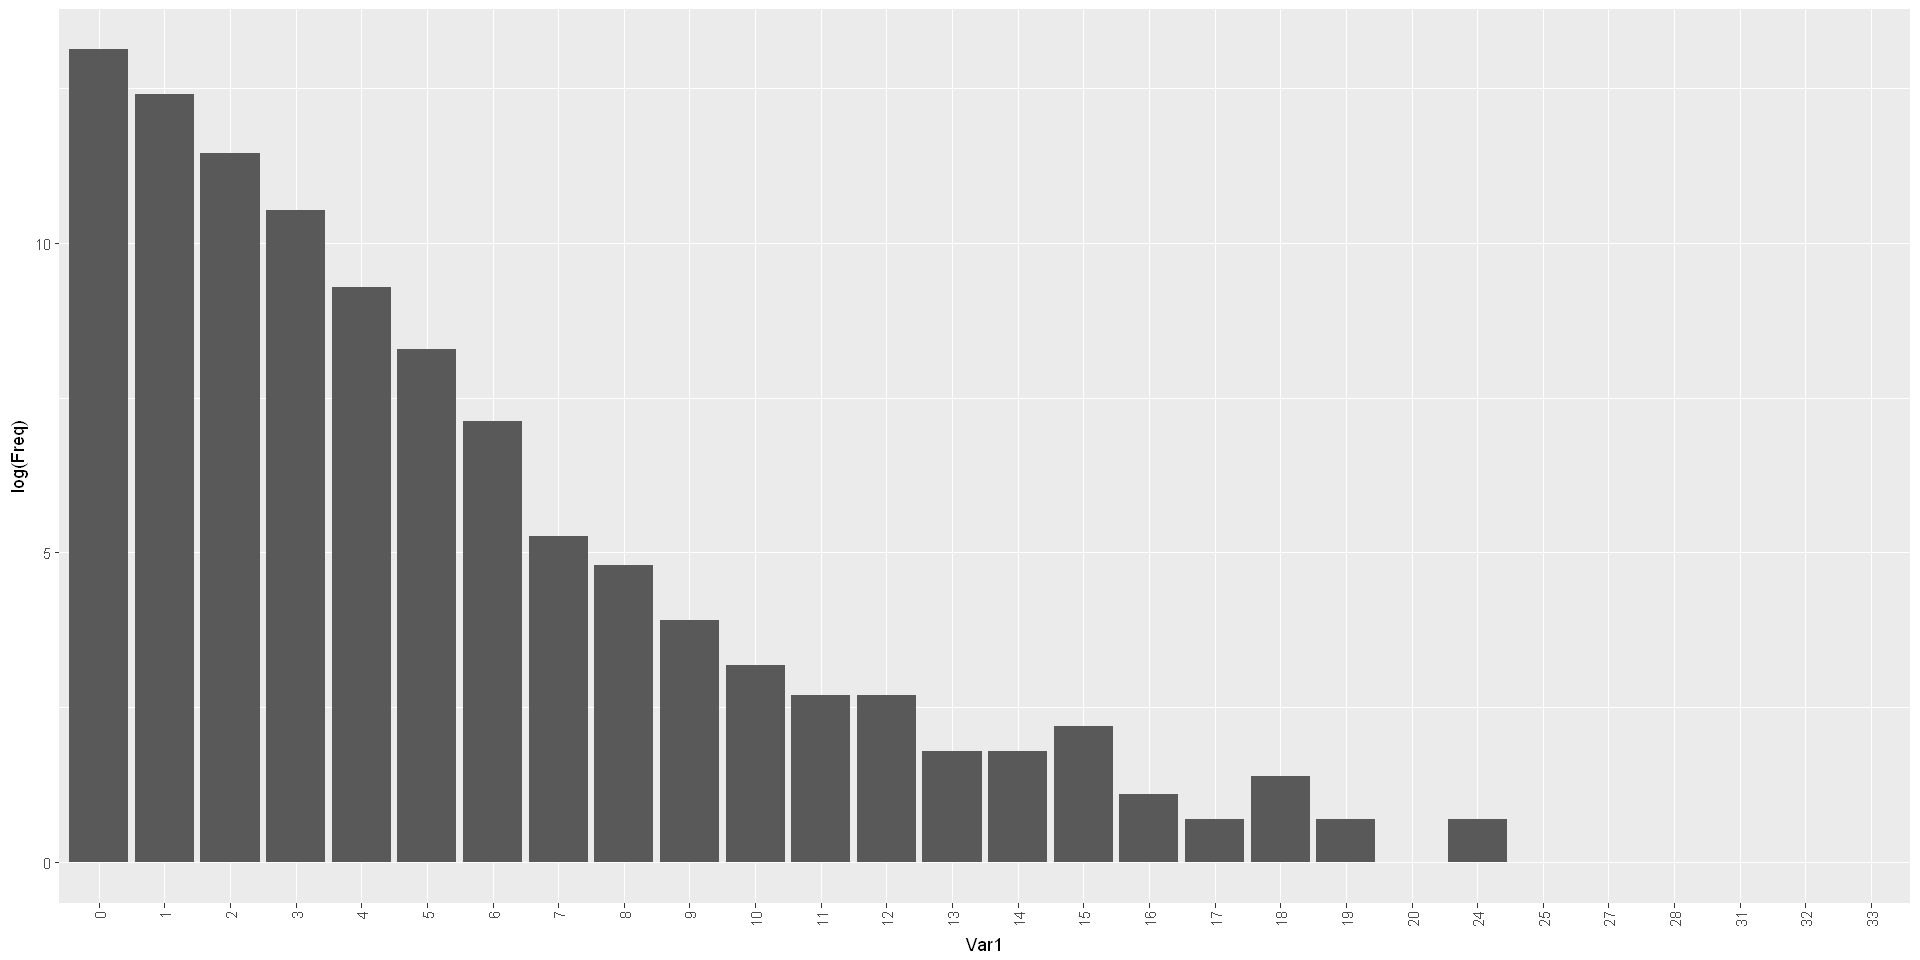

In [111]:
options(repr.plot.width=16, repr.plot.height=8)
ggplot(as.data.frame(table(loan$inq_last_6mths)), aes(x=Var1, y=log(Freq))) + 
geom_bar(stat="identity") + 
theme(axis.text.x = element_text(angle=90, hjust=1, vjust=.5),
        legend.position = "none")

### last_credit_pull_d with int_rate
last_credit_pull_d : The most recent month LC pulled credit for this loan

In [120]:
sum(is.na(loan$last_credit_pull_d))

[1] 0

In [114]:
loan$last_credit_pull_d_date = as.Date(as.yearmon(loan$last_credit_pull_d, "%b-%Y"))

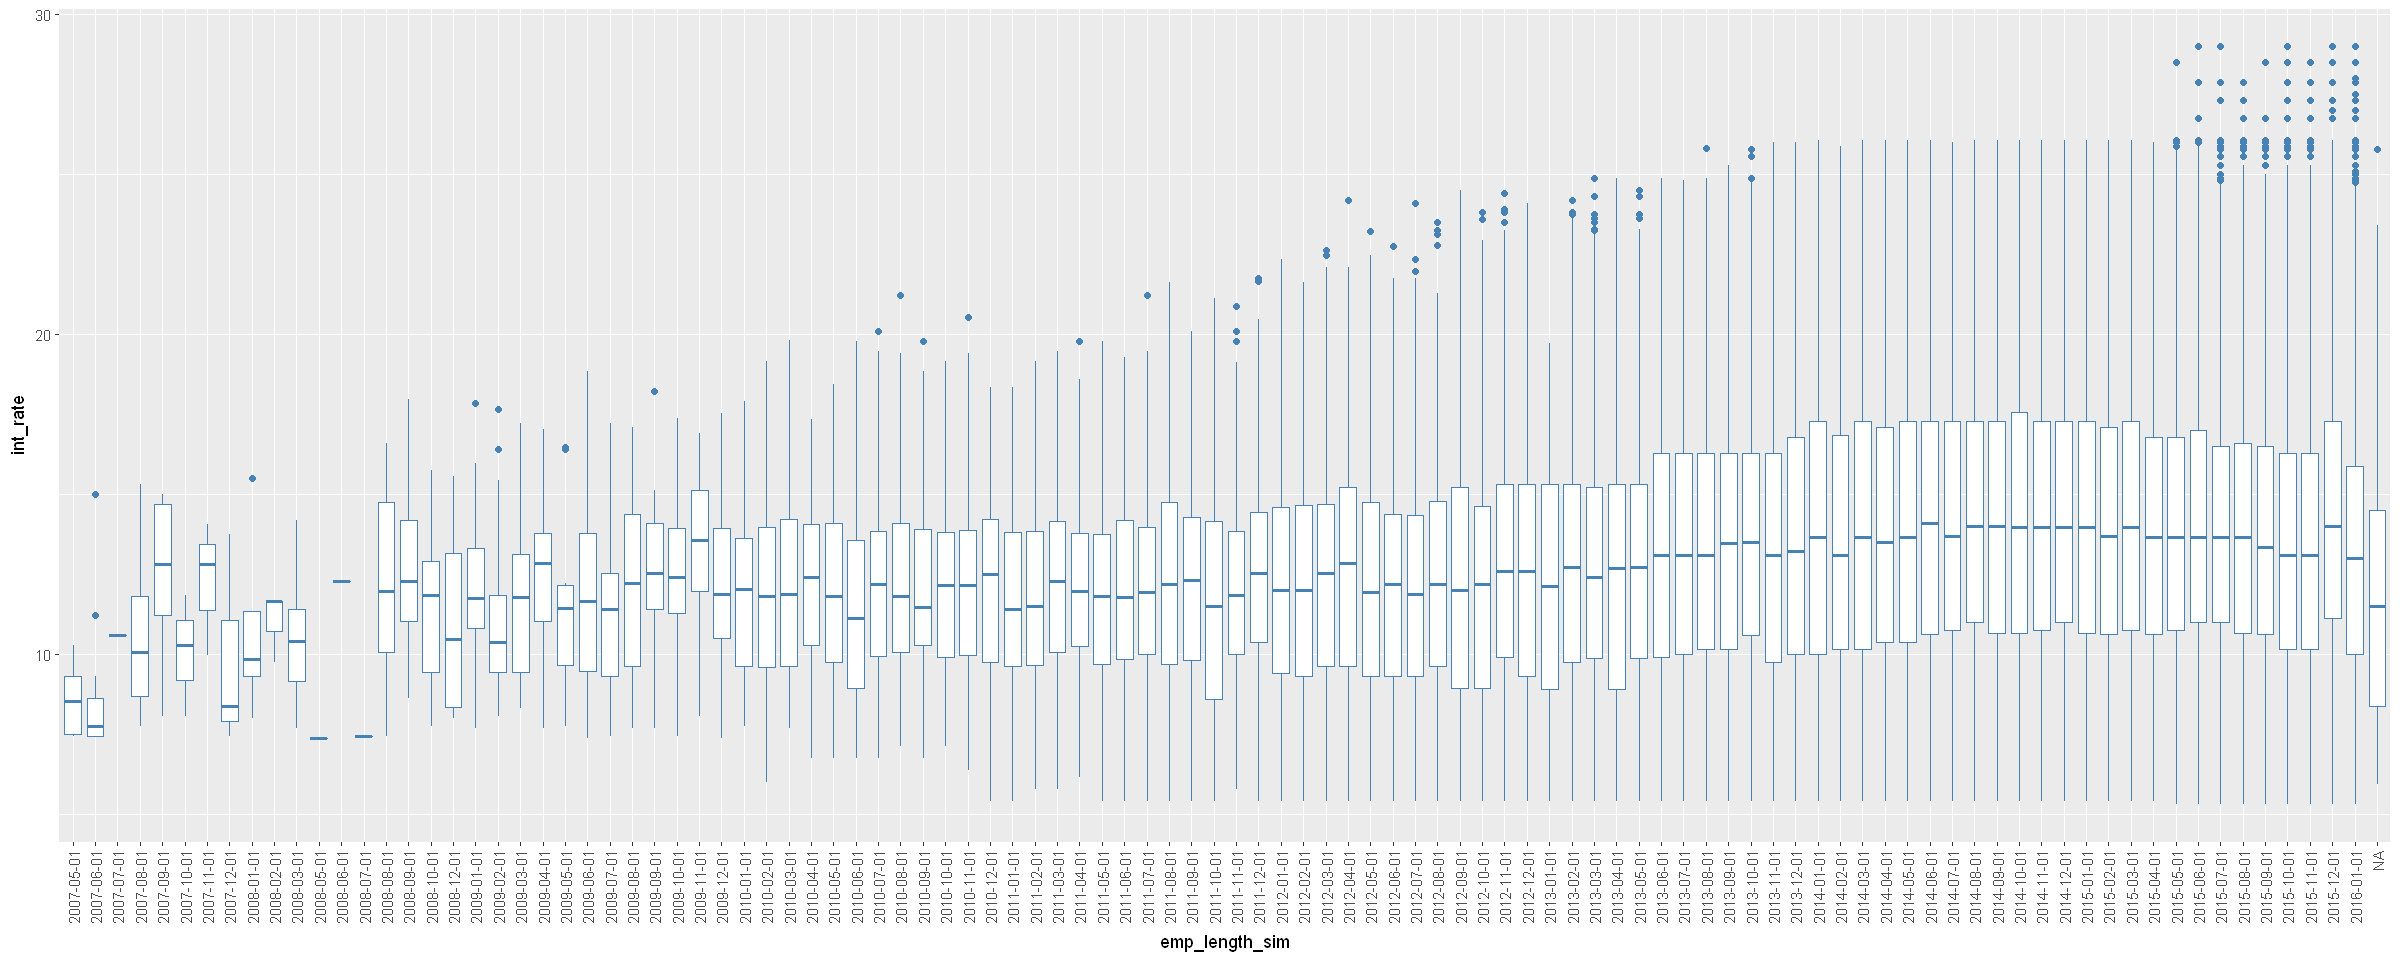

In [115]:
options(repr.plot.width=20, repr.plot.height=8)
ggplot(loan, aes(x=factor(last_credit_pull_d_date), y=int_rate)) + 
geom_boxplot(color='steelblue') + labs(x='emp_length_sim') + 
theme(axis.text.x = element_text(angle=90, hjust=1, vjust=.5),
        legend.position = "none")

In [116]:
table(loan$last_credit_pull_d_date)


2007-05-01 2007-06-01 2007-07-01 2007-08-01 2007-09-01 2007-10-01 2007-11-01 
        10         16          1         17          5          3          3 
2007-12-01 2008-01-01 2008-02-01 2008-03-01 2008-05-01 2008-06-01 2008-07-01 
         3          4          3          8          1          1          1 
2008-08-01 2008-09-01 2008-10-01 2008-12-01 2009-01-01 2009-02-01 2009-03-01 
        15          9         13          7         40         21         17 
2009-04-01 2009-05-01 2009-06-01 2009-07-01 2009-08-01 2009-09-01 2009-10-01 
        25         14         20         21         33         21         54 
2009-11-01 2009-12-01 2010-01-01 2010-02-01 2010-03-01 2010-04-01 2010-05-01 
        53         75         36         88         74         79         64 
2010-06-01 2010-07-01 2010-08-01 2010-09-01 2010-10-01 2010-11-01 2010-12-01 
        67        140         73        121        123        127        159 
2011-01-01 2011-02-01 2011-03-01 2011-04-01 2011-05-01 2011-06-

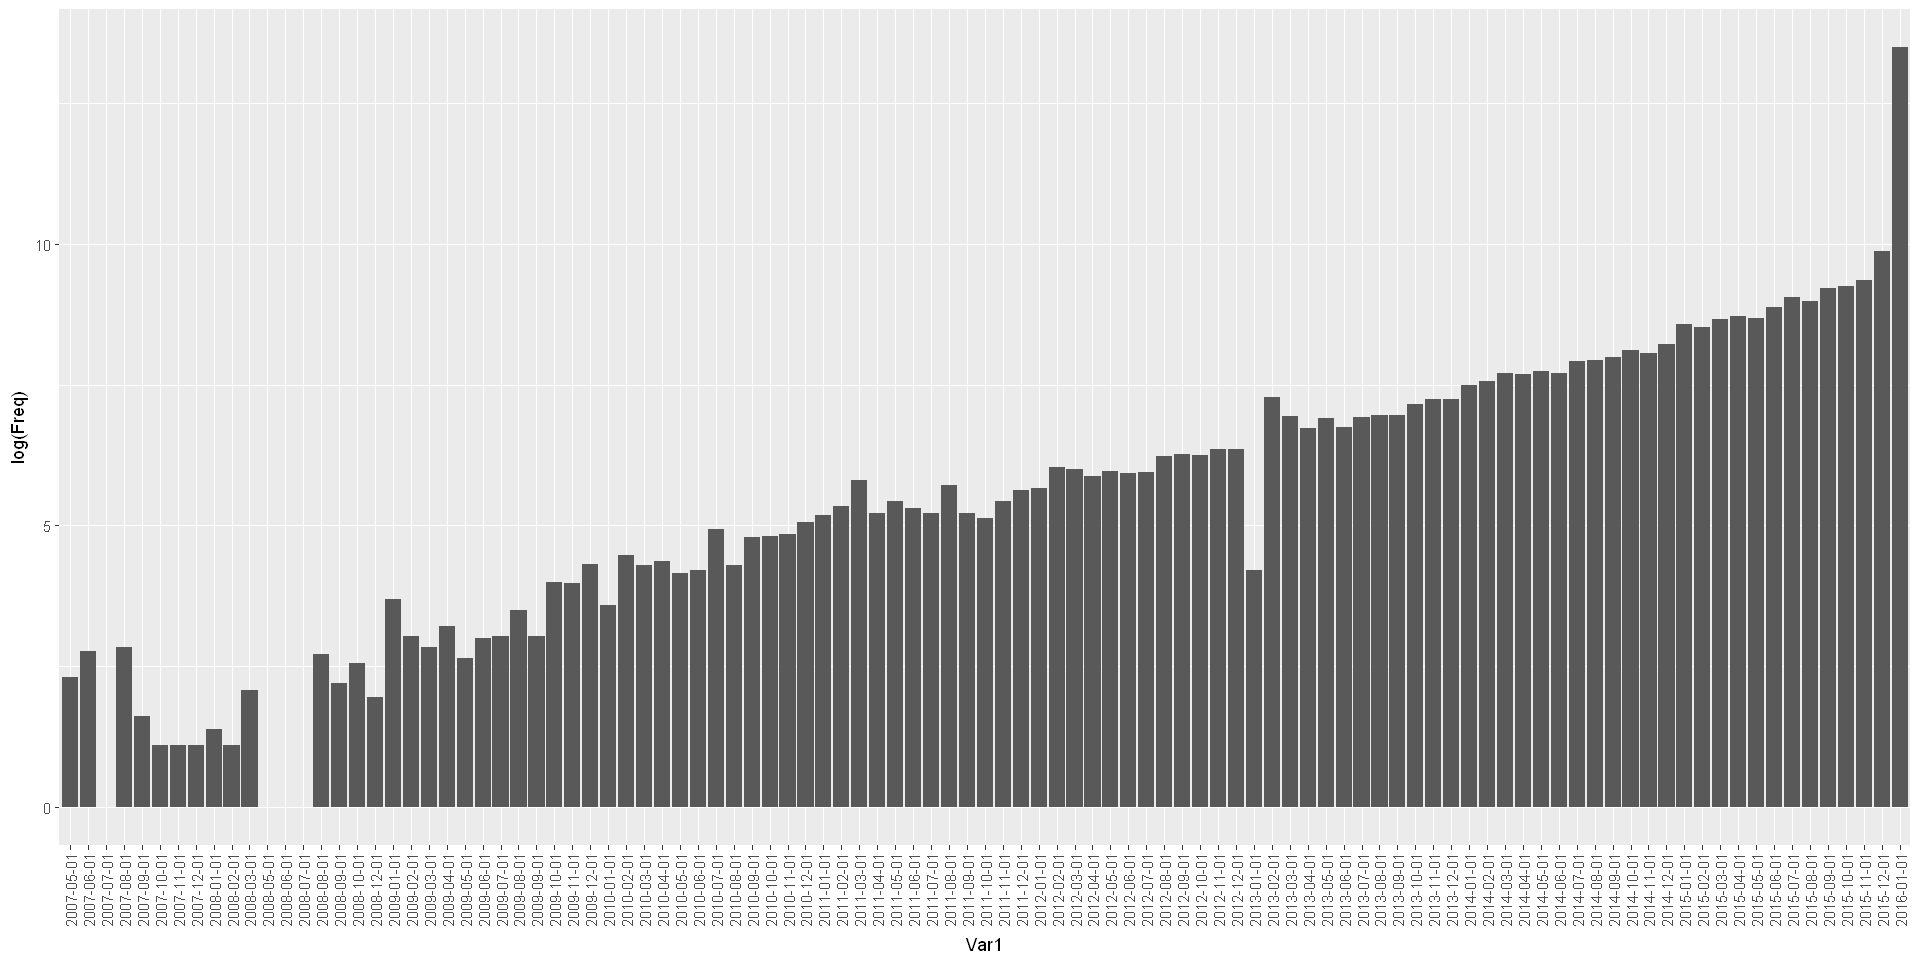

In [117]:
options(repr.plot.width=16, repr.plot.height=8)
ggplot(as.data.frame(table(loan$last_credit_pull_d_date)), aes(x=Var1, y=log(Freq))) + 
geom_bar(stat="identity") + 
theme(axis.text.x = element_text(angle=90, hjust=1, vjust=.5),
        legend.position = "none")

## Credit lines features

### total_acc with int_rate
total_acc : The total number of credit lines currently in the borrower's credit file

In [123]:
sum(is.na(loan$total_acc))/dim(loan)[1]

[1] 3.268051e-05

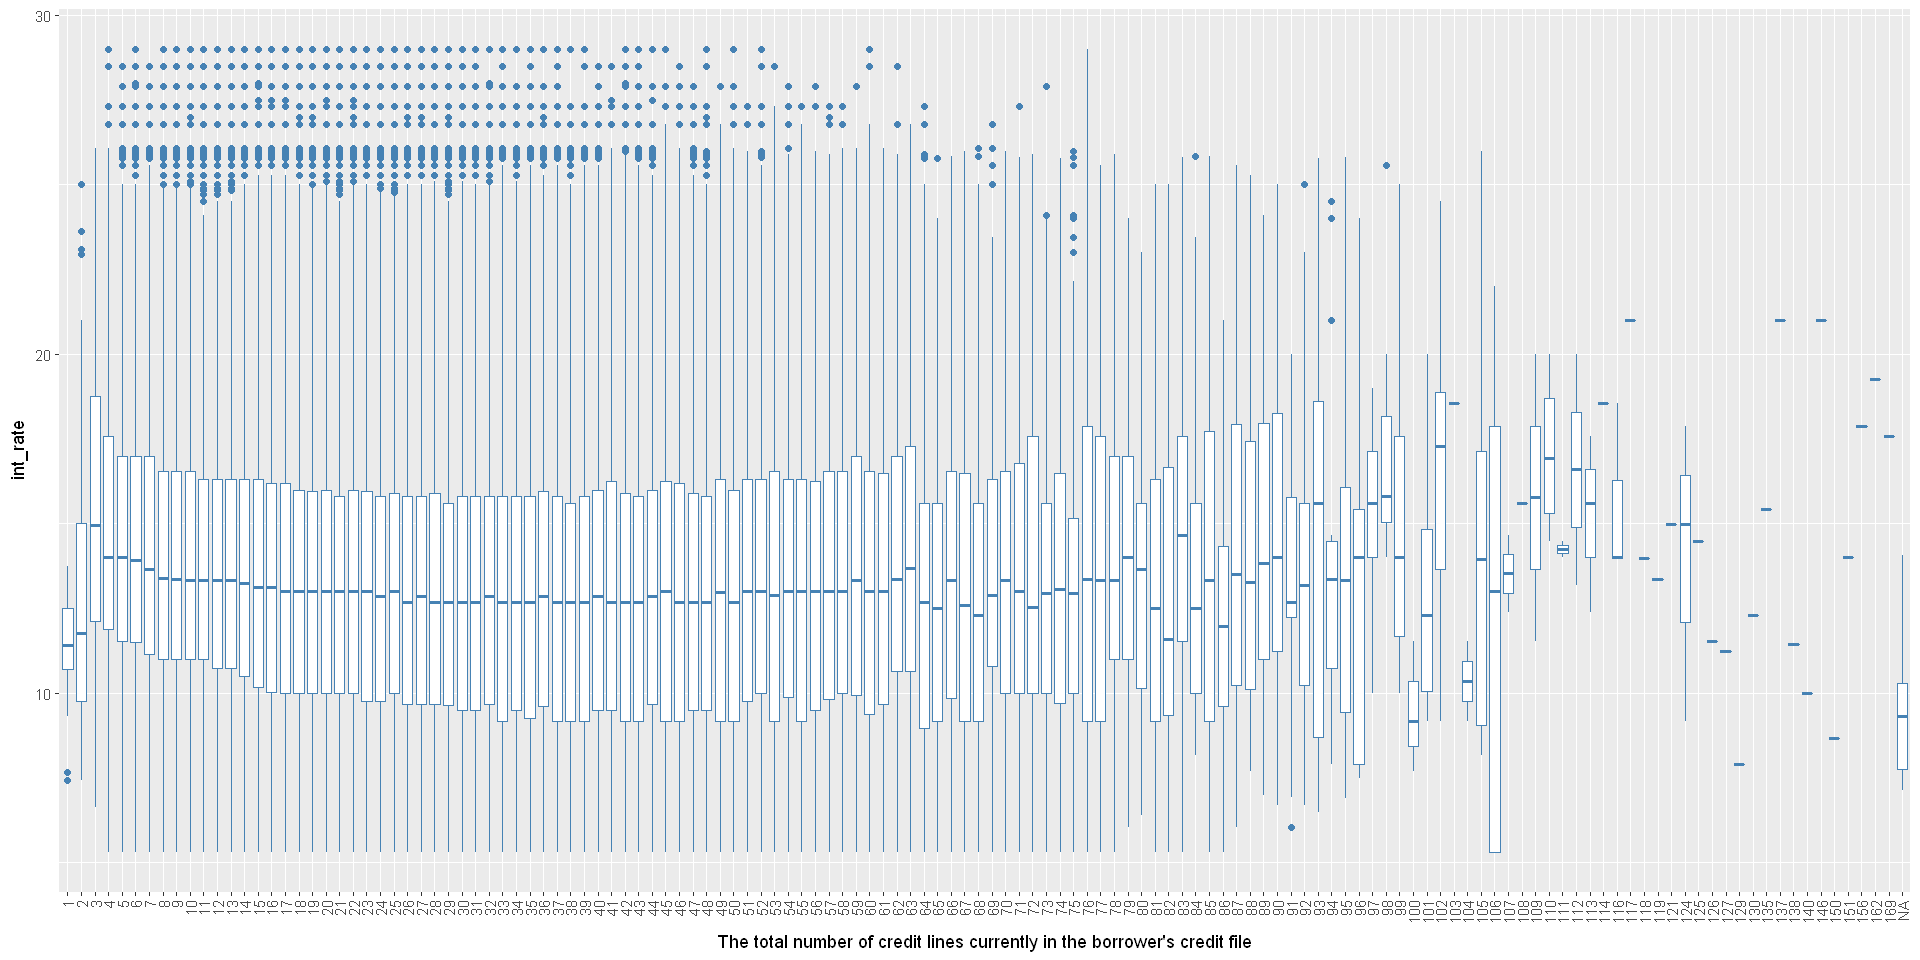

In [124]:
options(repr.plot.width=16, repr.plot.height=8)
ggplot(loan, aes(x=factor(total_acc), y=int_rate)) + 
geom_boxplot(color='steelblue') + labs(x="The total number of credit lines currently in the borrower's credit file") + 
theme(axis.text.x = element_text(angle=90, hjust=1, vjust=.5),
        legend.position = "none")

In [125]:
table(loan$total_acc)


    1     2     3     4     5     6     7     8     9    10    11    12    13 
   21    62   472  2873  4645  6804  9364 11994 14684 17416 19938 22125 24720 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
26289 27944 29126 30768 31108 31574 32118 32009 32259 31315 31039 29721 29018 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
27624 26150 25021 23795 21999 20958 19099 17887 16456 15206 14094 12586 11870 
   40    41    42    43    44    45    46    47    48    49    50    51    52 
10710  9806  8923  8036  7389  6583  5881  5362  4745  4204  3883  3368  3039 
   53    54    55    56    57    58    59    60    61    62    63    64    65 
 2690  2348  2081  1849  1618  1509  1356  1159  1161  1133  1877   518   461 
   66    67    68    69    70    71    72    73    74    75    76    77    78 
  374   331   324   285   250   215   158   186   152   136   105   101    96 
   79    80    81    82    83    84    85    86    

the box plot show the interest rate and number of personal finance inquiries have positive relationship, but then the trendency is not obvious due to less number of observations

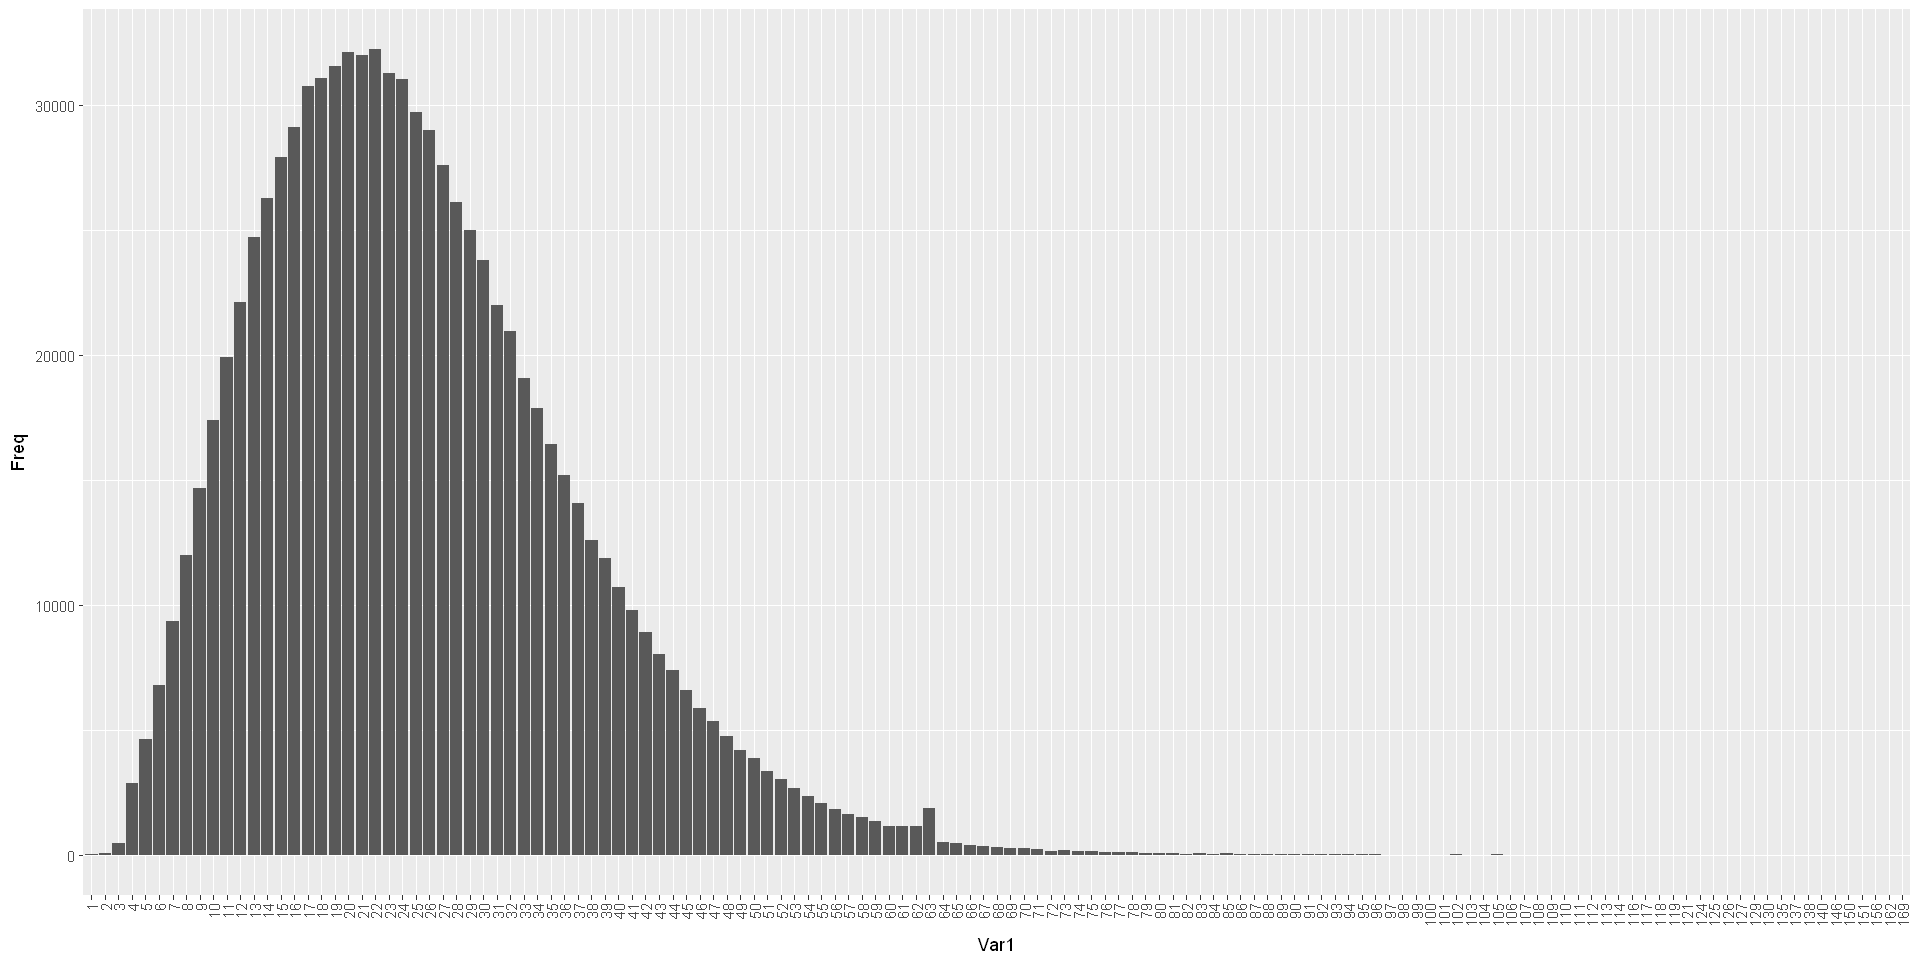

In [126]:
options(repr.plot.width=16, repr.plot.height=8)
ggplot(as.data.frame(table(loan$total_acc)), aes(x=Var1, y=Freq)) + 
geom_bar(stat="identity") + 
theme(axis.text.x = element_text(angle=90, hjust=1, vjust=.5),
        legend.position = "none")

In [127]:
# could be modeled as some distribution

### 16. tot_cur_bal with int_rate
tot_cur_bal : Total current balance of all accounts

In [128]:
sum(is.na(loan$tot_cur_bal))/dim(loan)[1]

[1] 0.07919502

Warning message:
"Removed 70276 rows containing non-finite values (stat_binhex)."Warning message:
"Removed 70276 rows containing non-finite values (stat_smooth)."

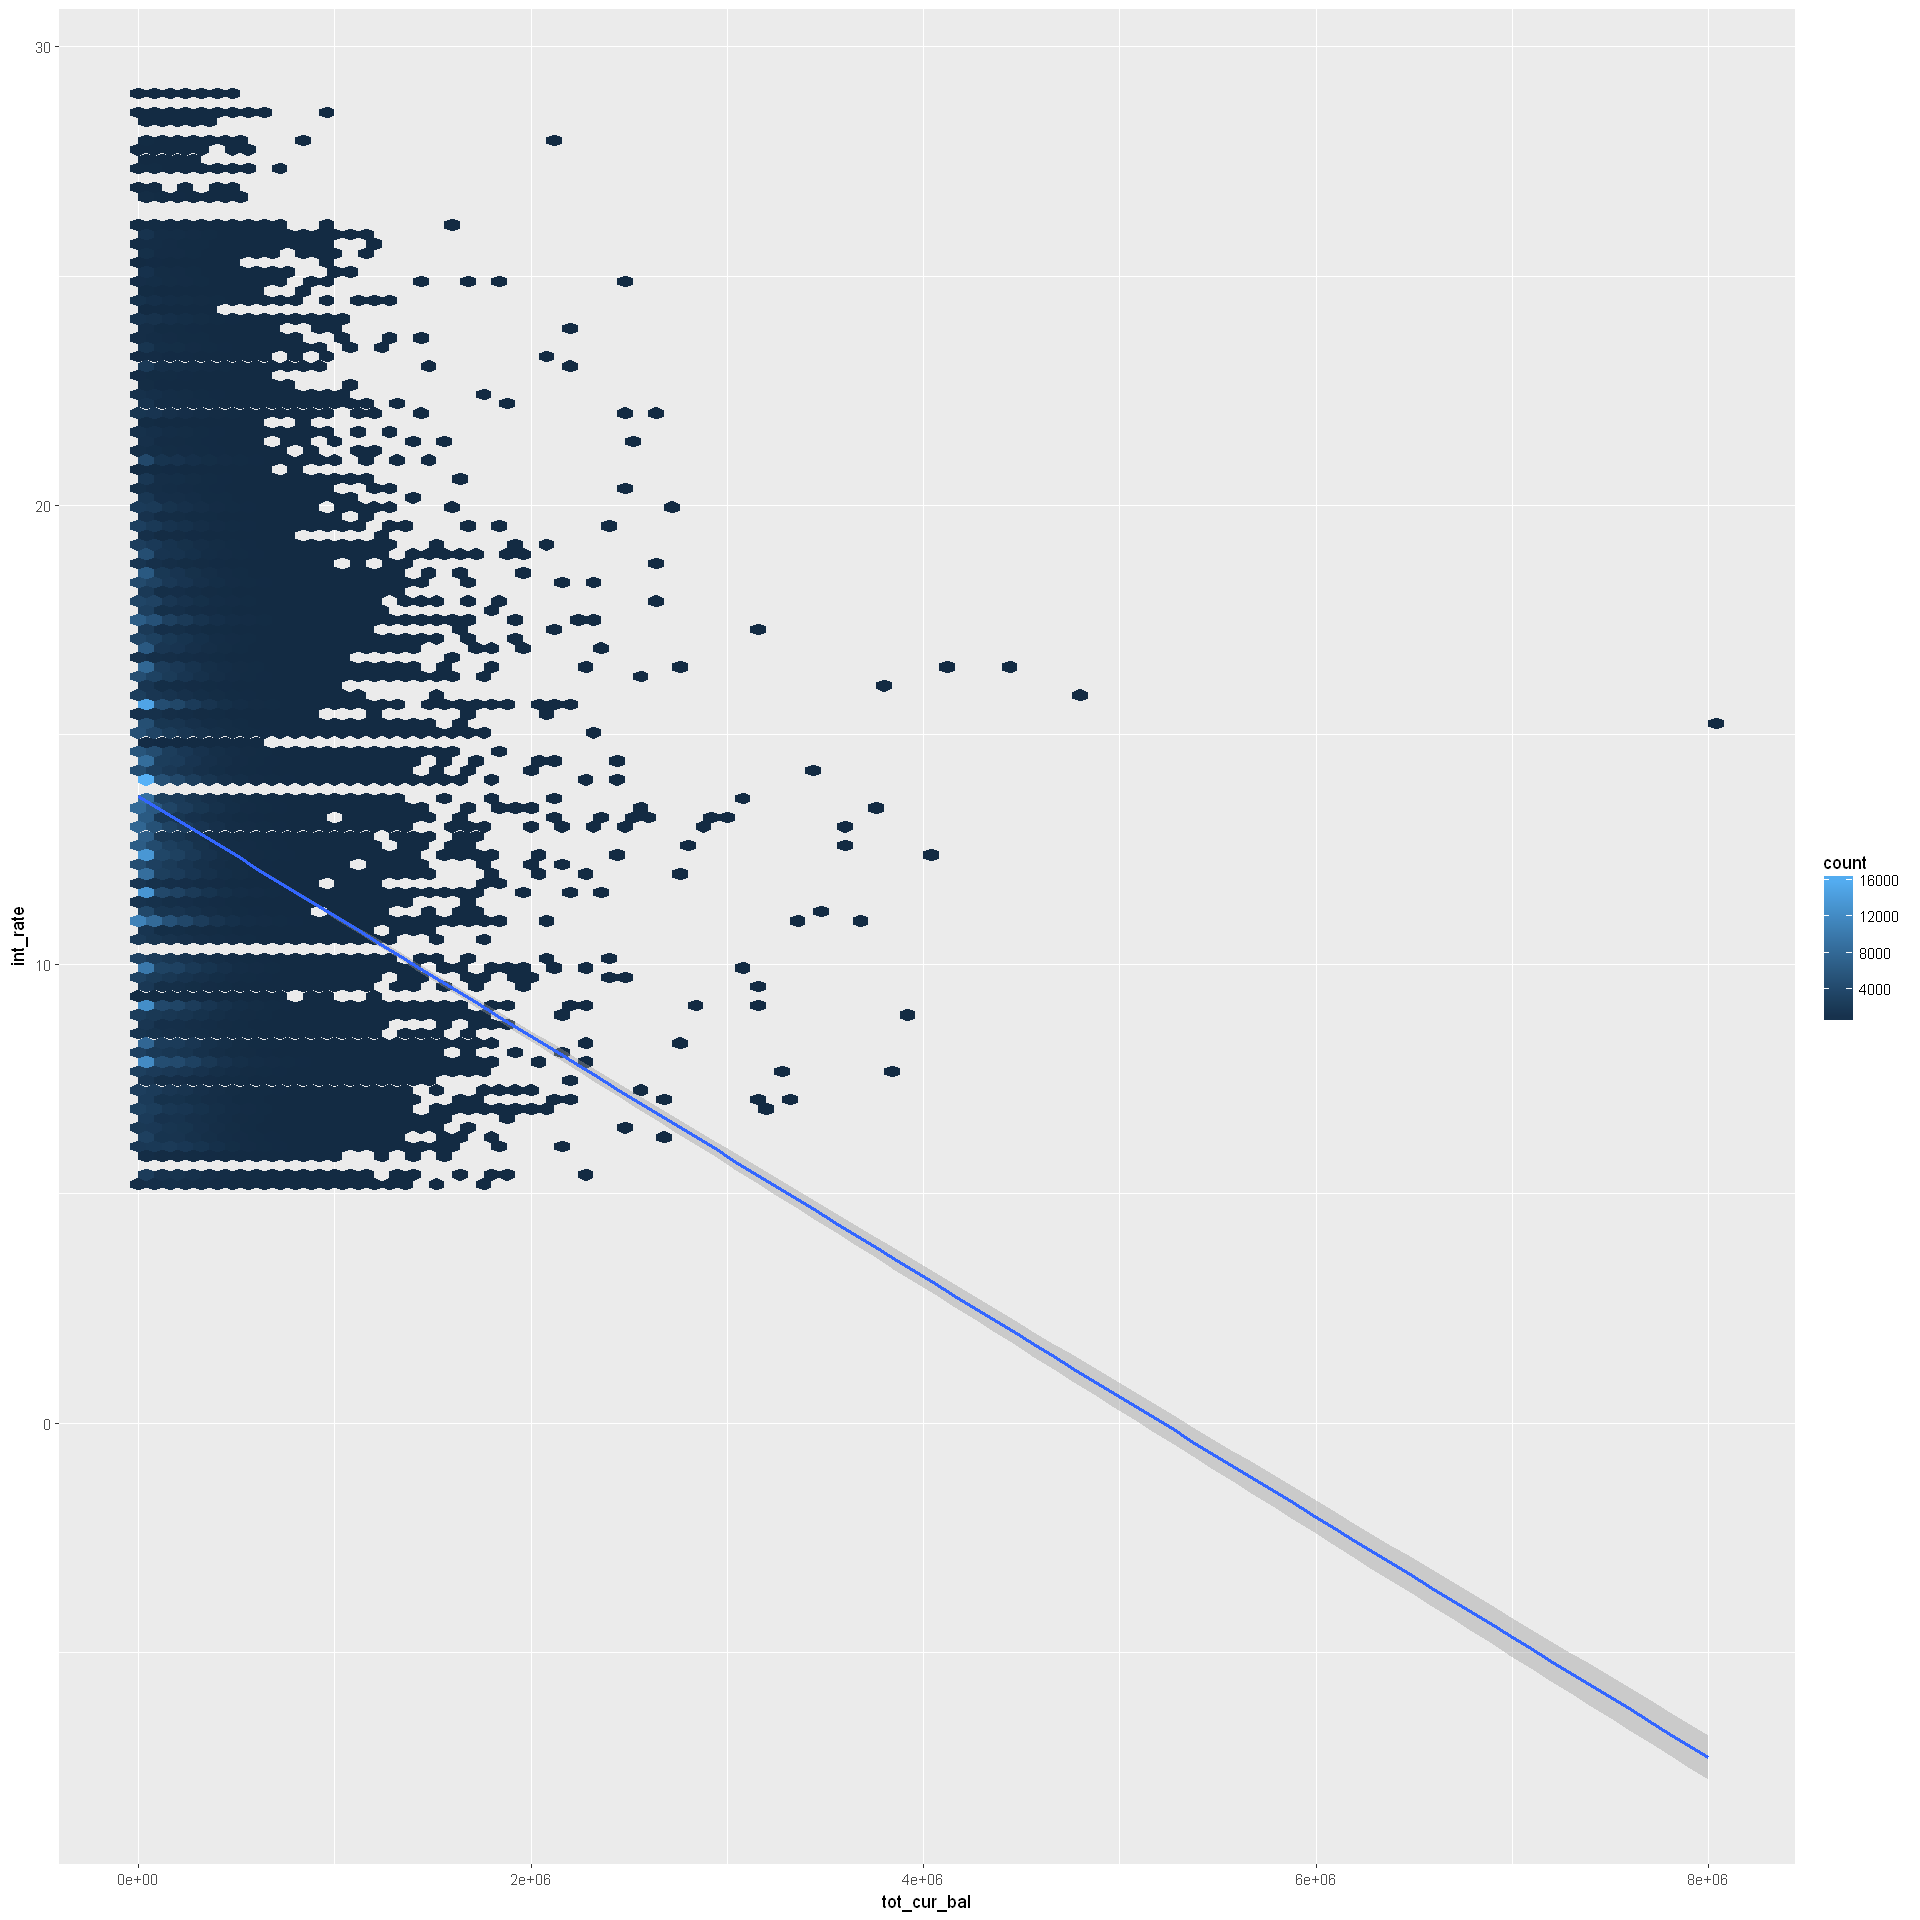

In [129]:
# linear relationship
options(repr.plot.width=16, repr.plot.height=16)
ggplot(loan, aes(x = tot_cur_bal, y=int_rate)) + geom_hex(bins=100) + stat_smooth(method=lm)

Warning message:
"Removed 70402 rows containing non-finite values (stat_binhex)."Warning message:
"Removed 70402 rows containing non-finite values (stat_smooth)."

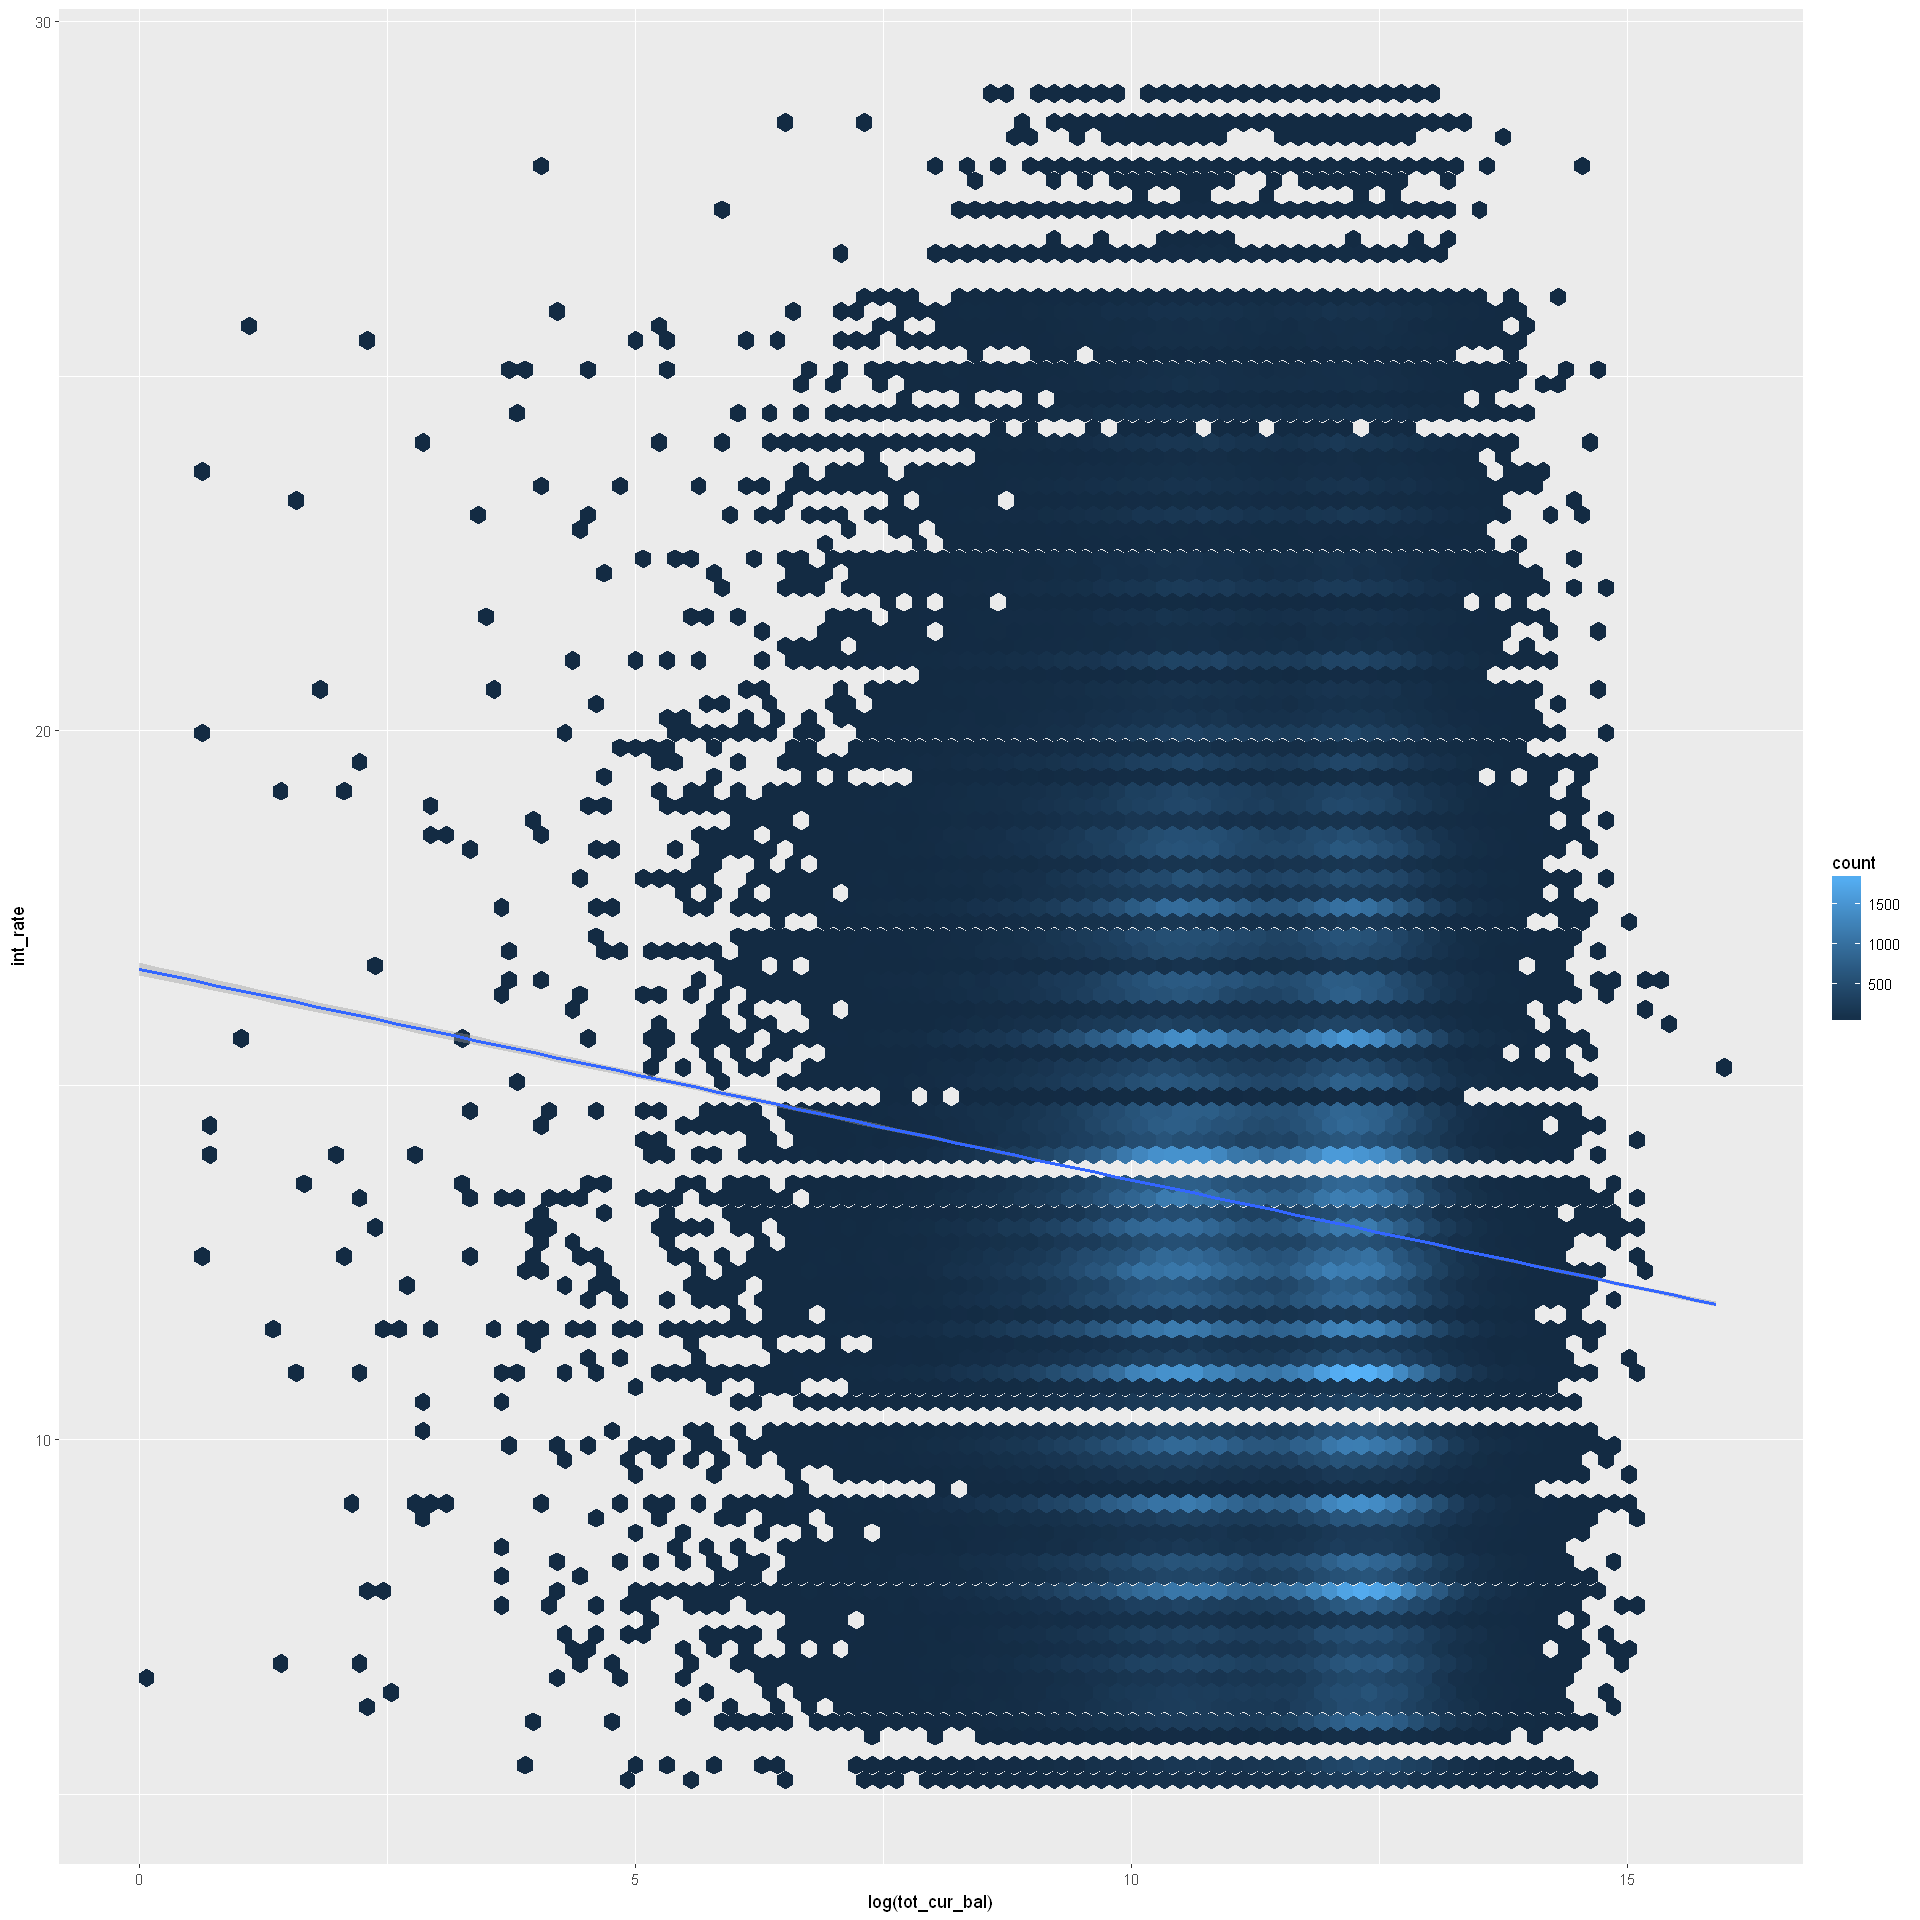

In [130]:
options(repr.plot.width=16, repr.plot.height=16)
ggplot(loan, aes(x = log(tot_cur_bal), y=int_rate)) + geom_hex(bins=100) + stat_smooth(method=lm)

### 17. all_util with int_rate

In [131]:
# drop this feature
sum(is.na(loan$all_util))/dim(loan)[1]

Warning message in is.na(loan$all_util):
"is.na() applied to non-(list or vector) of type 'NULL'"

[1] 0

### 18. open_acc with int_rate

In [132]:
sum(is.na(loan$open_acc))/dim(loan)[1]

[1] 3.268051e-05

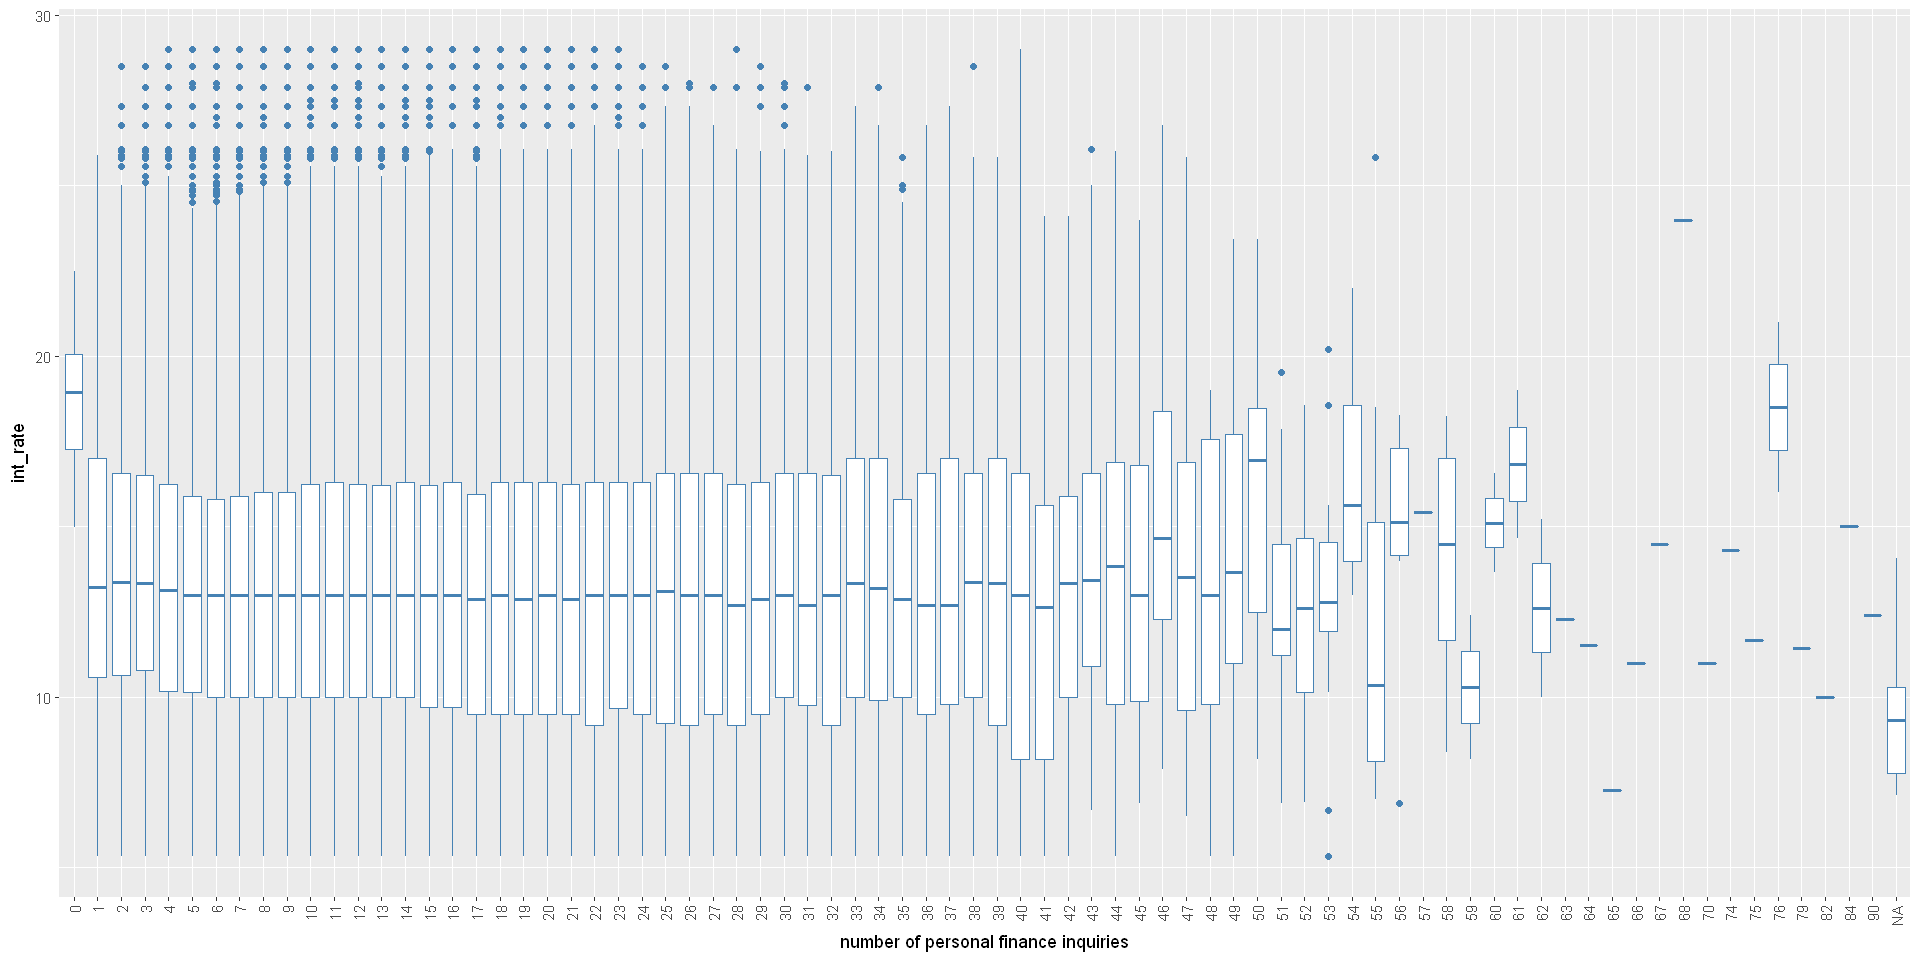

In [133]:
options(repr.plot.width=16, repr.plot.height=8)
ggplot(loan, aes(x=factor(open_acc), y=int_rate)) + 
geom_boxplot(color='steelblue') + labs(x='number of personal finance inquiries') + 
theme(axis.text.x = element_text(angle=90, hjust=1, vjust=.5),
        legend.position = "none")

In [134]:
table(loan$open_acc)


    0     1     2     3     4     5     6     7     8     9    10    11    12 
    7   232  2776  9619 23367 39766 55954 67896 76578 80285 78321 72265 64690 
   13    14    15    16    17    18    19    20    21    22    23    24    25 
56642 47814 39778 33310 27262 22327 18274 14475 11600  9306  7328  5875  4700 
   26    27    28    29    30    31    32    33    34    35    36    37    38 
 3402  2825  2122  1750  1329  1047   934   704   547   441   345   287   219 
   39    40    41    42    43    44    45    46    47    48    49    50    51 
  191   138   114   110    72    46    48    39    30    32    23    14    17 
   52    53    54    55    56    57    58    59    60    61    62    63    64 
   13    16     5     8     6     1     5     2     2     2     2     1     1 
   65    66    67    68    70    74    75    76    79    82    84    90 
    1     1     1     1     1     1     1     2     1     1     1     1 

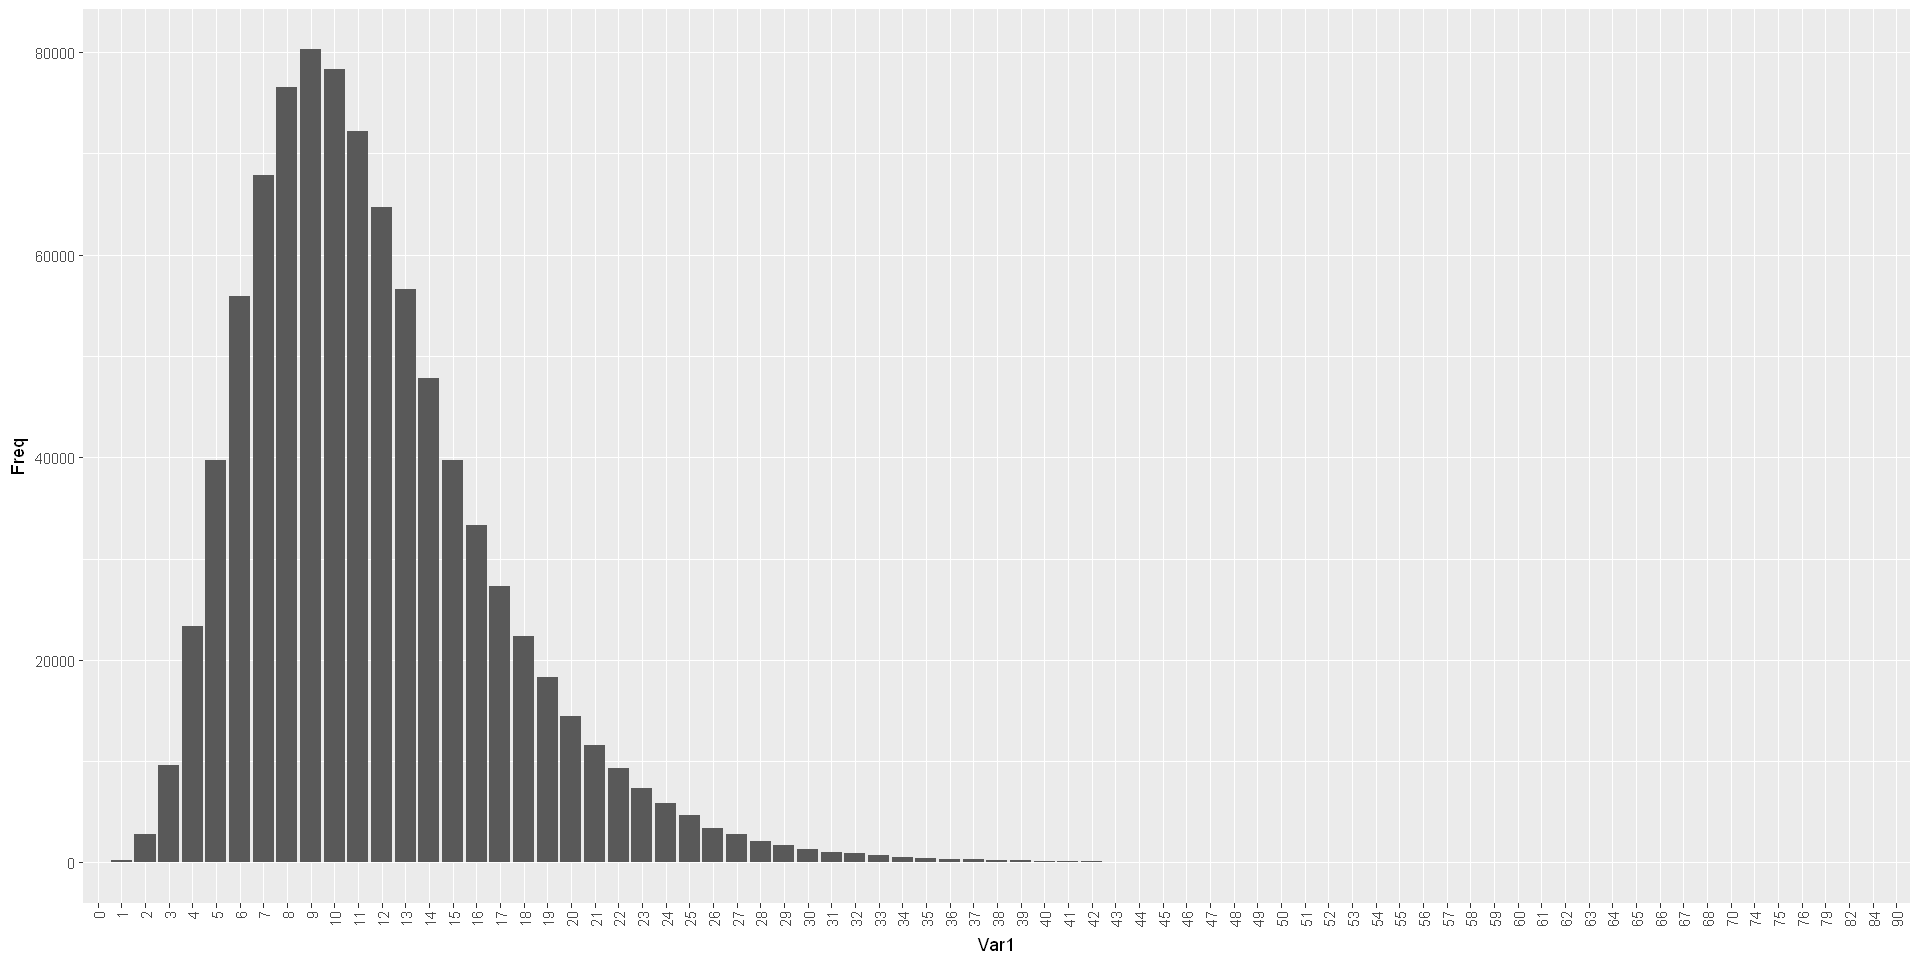

In [135]:
options(repr.plot.width=16, repr.plot.height=8)
ggplot(as.data.frame(table(loan$open_acc)), aes(x=Var1, y=Freq)) + 
geom_bar(stat="identity") + 
theme(axis.text.x = element_text(angle=90, hjust=1, vjust=.5),
        legend.position = "none")

### 19. open_acc_6m with int_rate
open_acc_6m : Number of open trades in last 6 months

In [138]:
#drop

### 20. total_cu_tl with int_rate
total_cu_tl : Number of finance trades

In [139]:
#drop

### 21. acc_now_deling with int_rate
acc_now_deling : The number of accounts on which the borrower is now delinquent.

In [141]:
 sum(is.na(loan$acc_now_delinq))/dim(loan)[1]

[1] 3.268051e-05

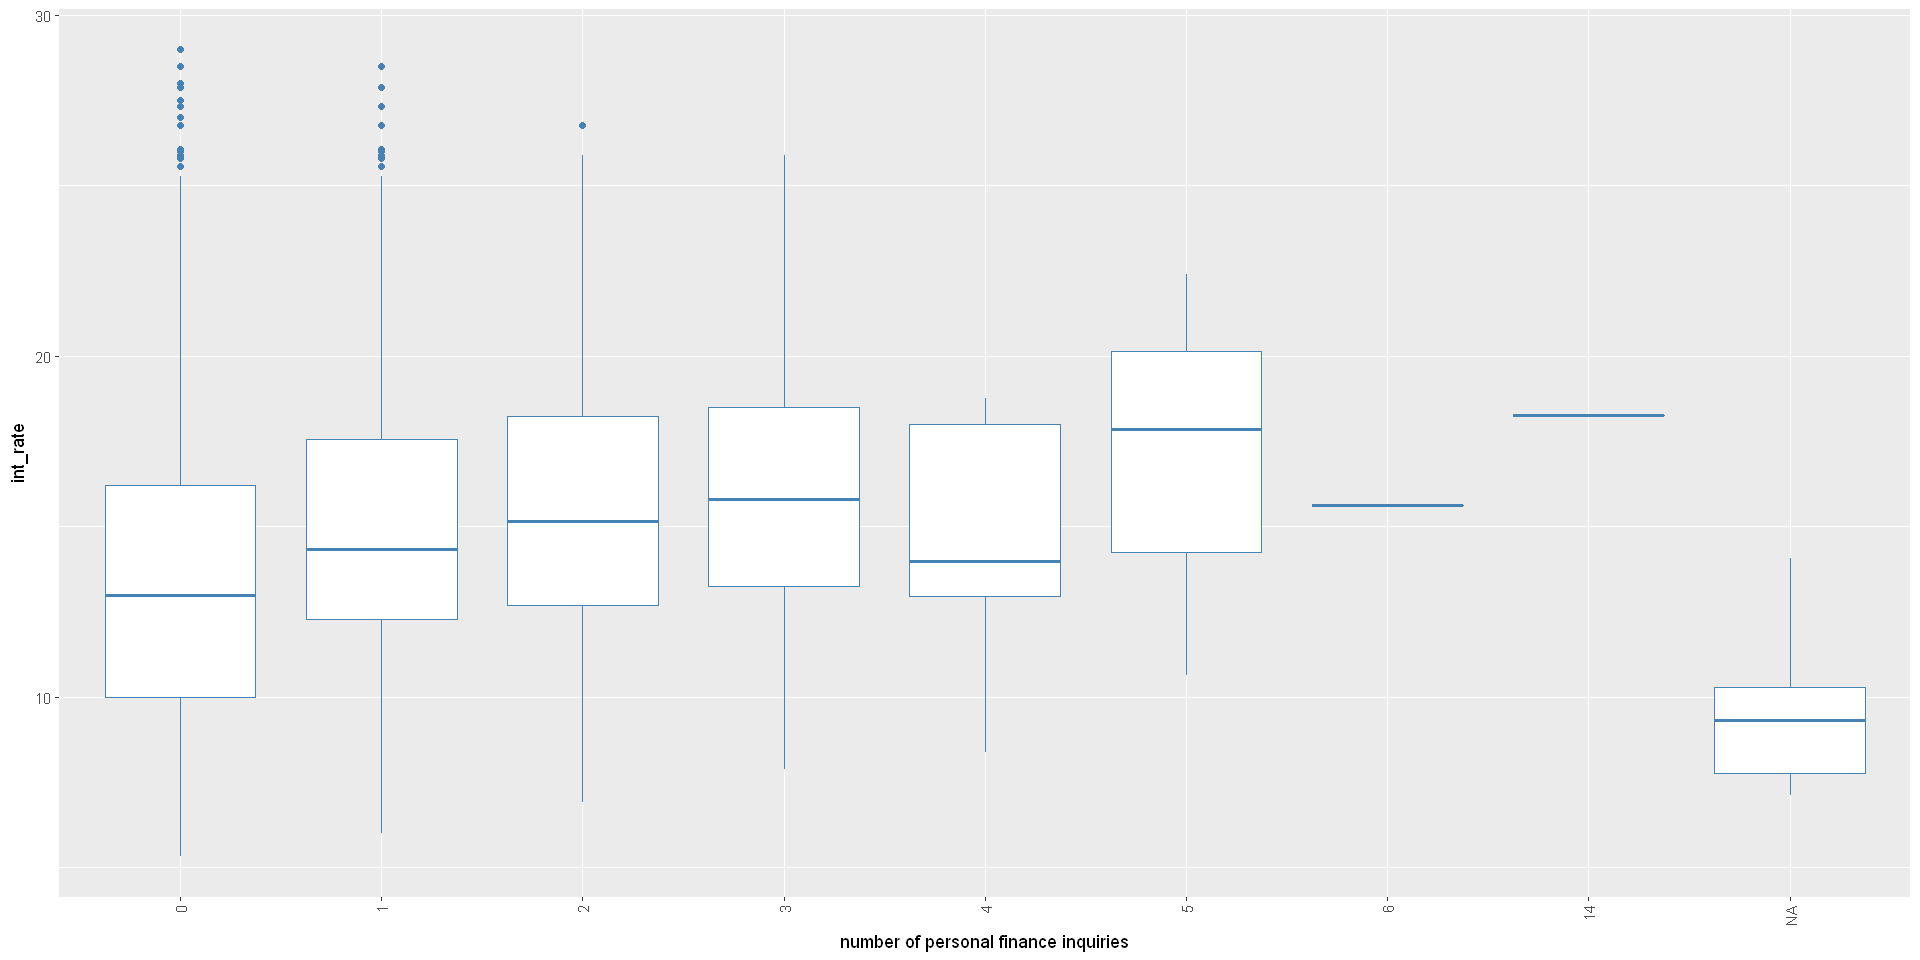

In [142]:
options(repr.plot.width=16, repr.plot.height=8)
ggplot(loan, aes(x=factor(acc_now_delinq), y=int_rate)) + 
geom_boxplot(color='steelblue') + labs(x='number of personal finance inquiries') + 
theme(axis.text.x = element_text(angle=90, hjust=1, vjust=.5),
        legend.position = "none")

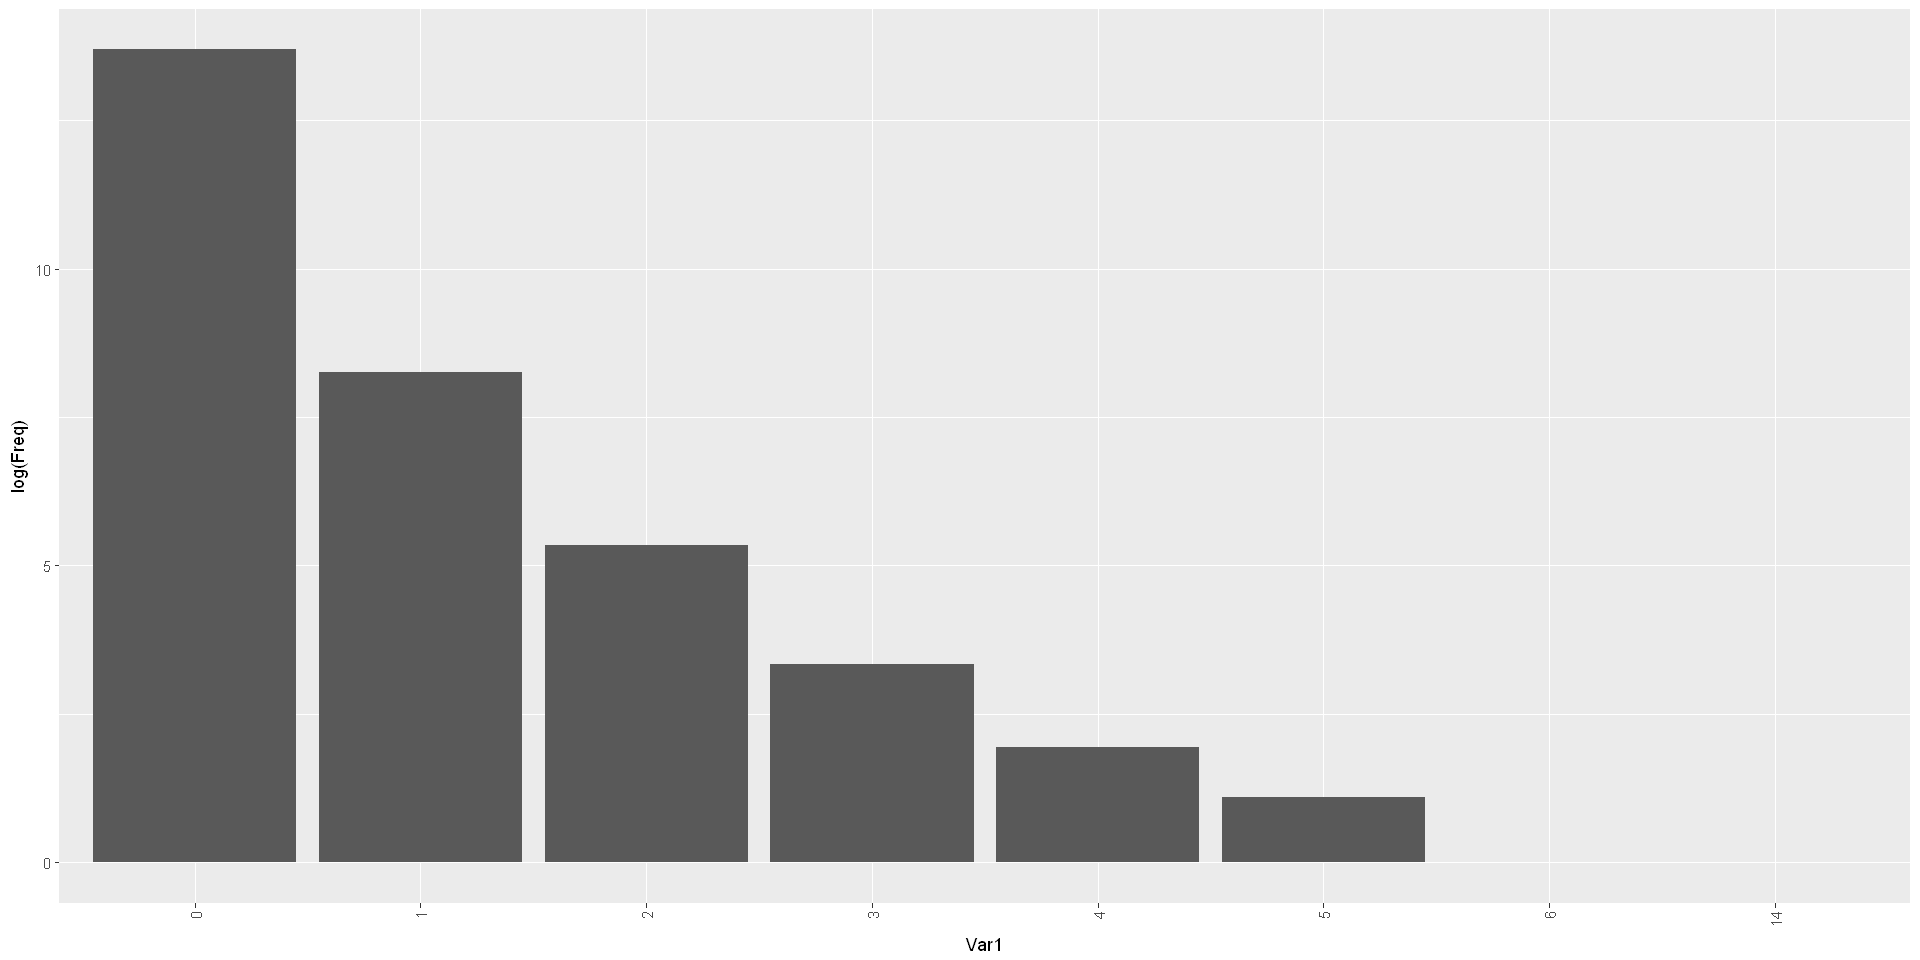

In [143]:
options(repr.plot.width=16, repr.plot.height=8)
ggplot(as.data.frame(table(loan$acc_now_delinq)), aes(x=Var1, y=log(Freq))) + 
geom_bar(stat="identity") + 
theme(axis.text.x = element_text(angle=90, hjust=1, vjust=.5),
        legend.position = "none")

### 22. deling_2yrs with int_rate
deling_2yrs : The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

In [144]:
sum(is.na(loan$delinq_2yrs))/dim(loan)[1]

[1] 3.268051e-05

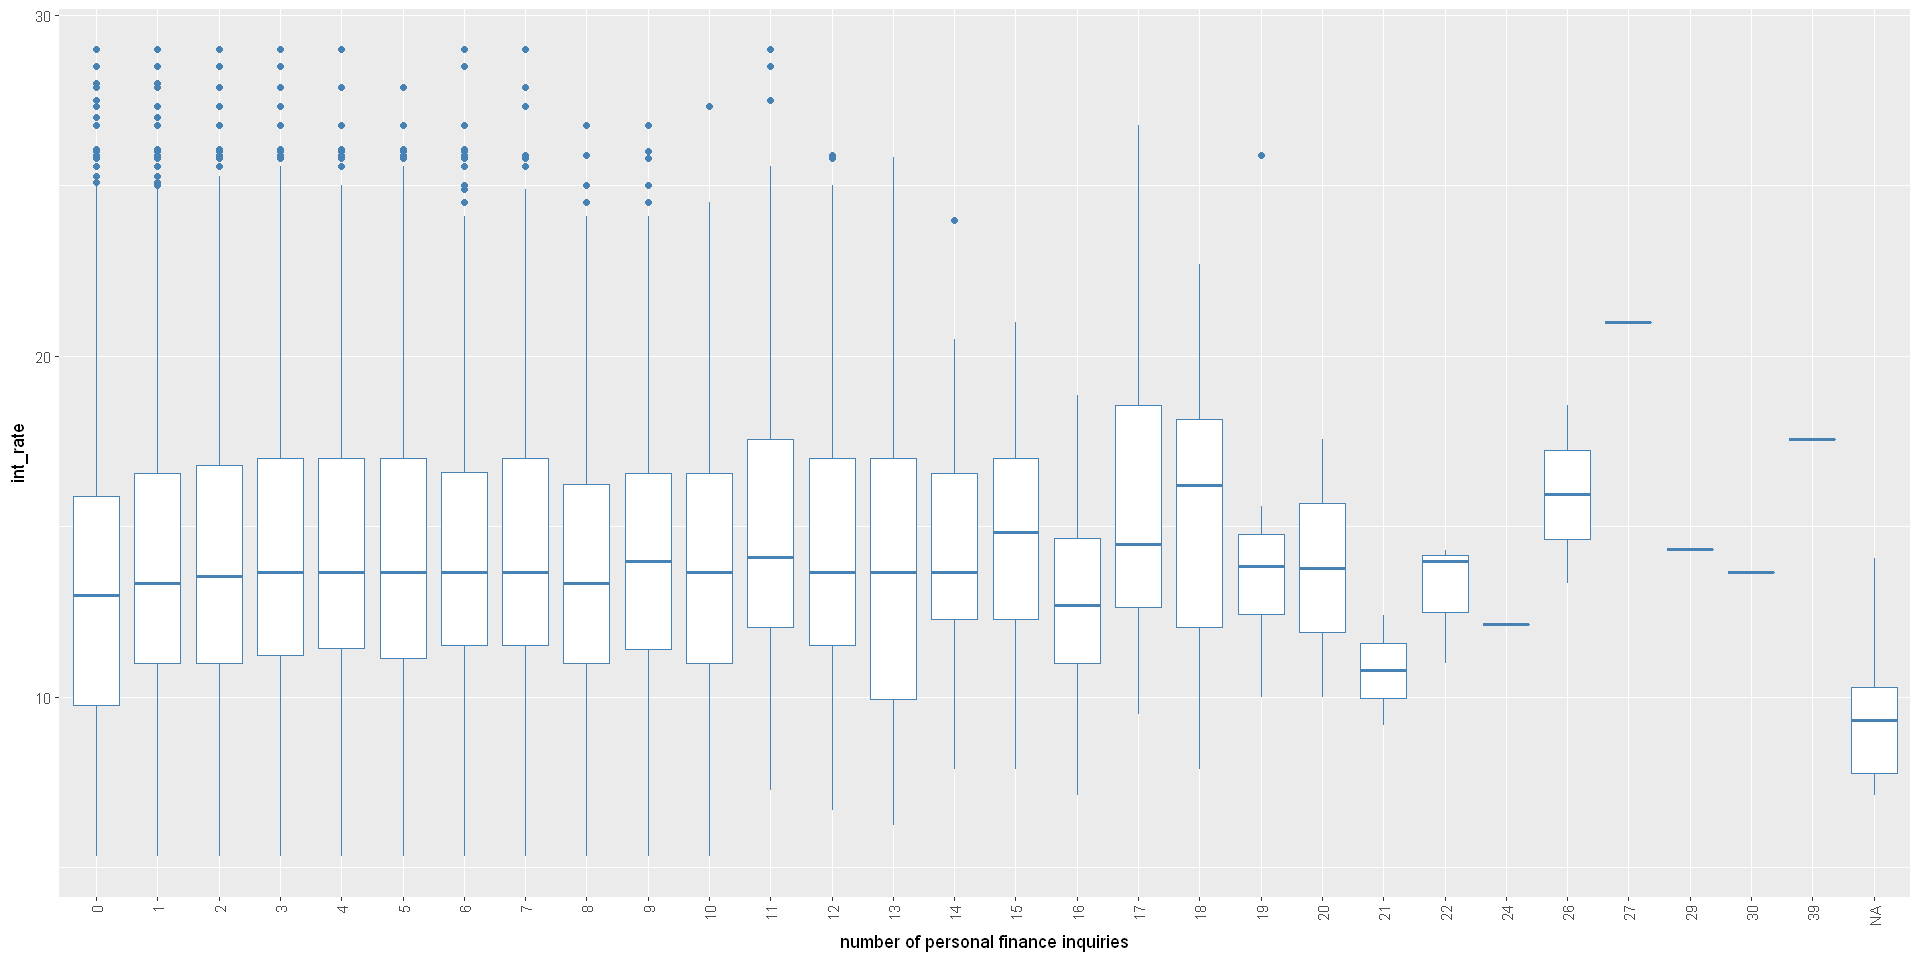

In [145]:
options(repr.plot.width=16, repr.plot.height=8)
ggplot(loan, aes(x=factor(delinq_2yrs), y=int_rate)) + 
geom_boxplot(color='steelblue') + labs(x='number of personal finance inquiries') + 
theme(axis.text.x = element_text(angle=90, hjust=1, vjust=.5),
        legend.position = "none")

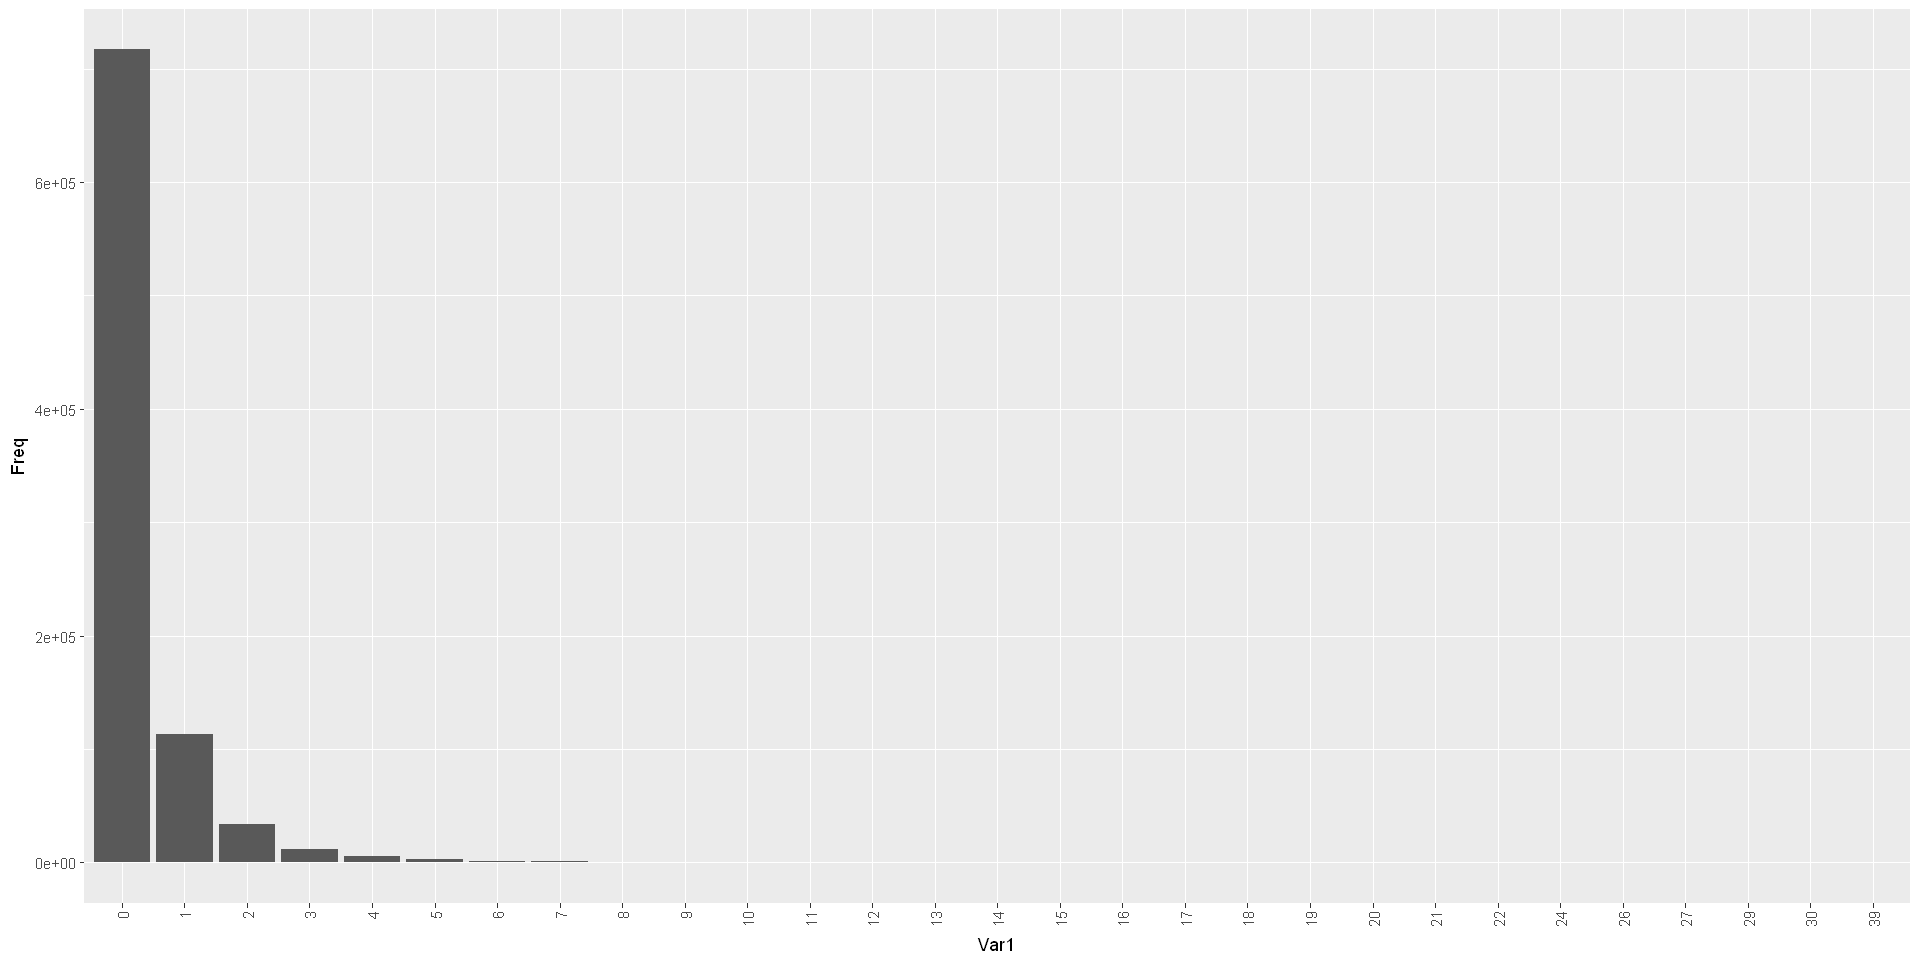

In [146]:
options(repr.plot.width=16, repr.plot.height=8)
ggplot(as.data.frame(table(loan$delinq_2yrs)), aes(x=Var1, y=Freq)) + 
geom_bar(stat="identity") + 
theme(axis.text.x = element_text(angle=90, hjust=1, vjust=.5),
        legend.position = "none")

In [154]:
cor(loan$delinq_2yrs, loan$int_rate, use = "complete.obs")

[1] 0.05517777

Warning message:
"Removed 29 rows containing non-finite values (stat_binhex)."Warning message:
"Removed 29 rows containing non-finite values (stat_smooth)."

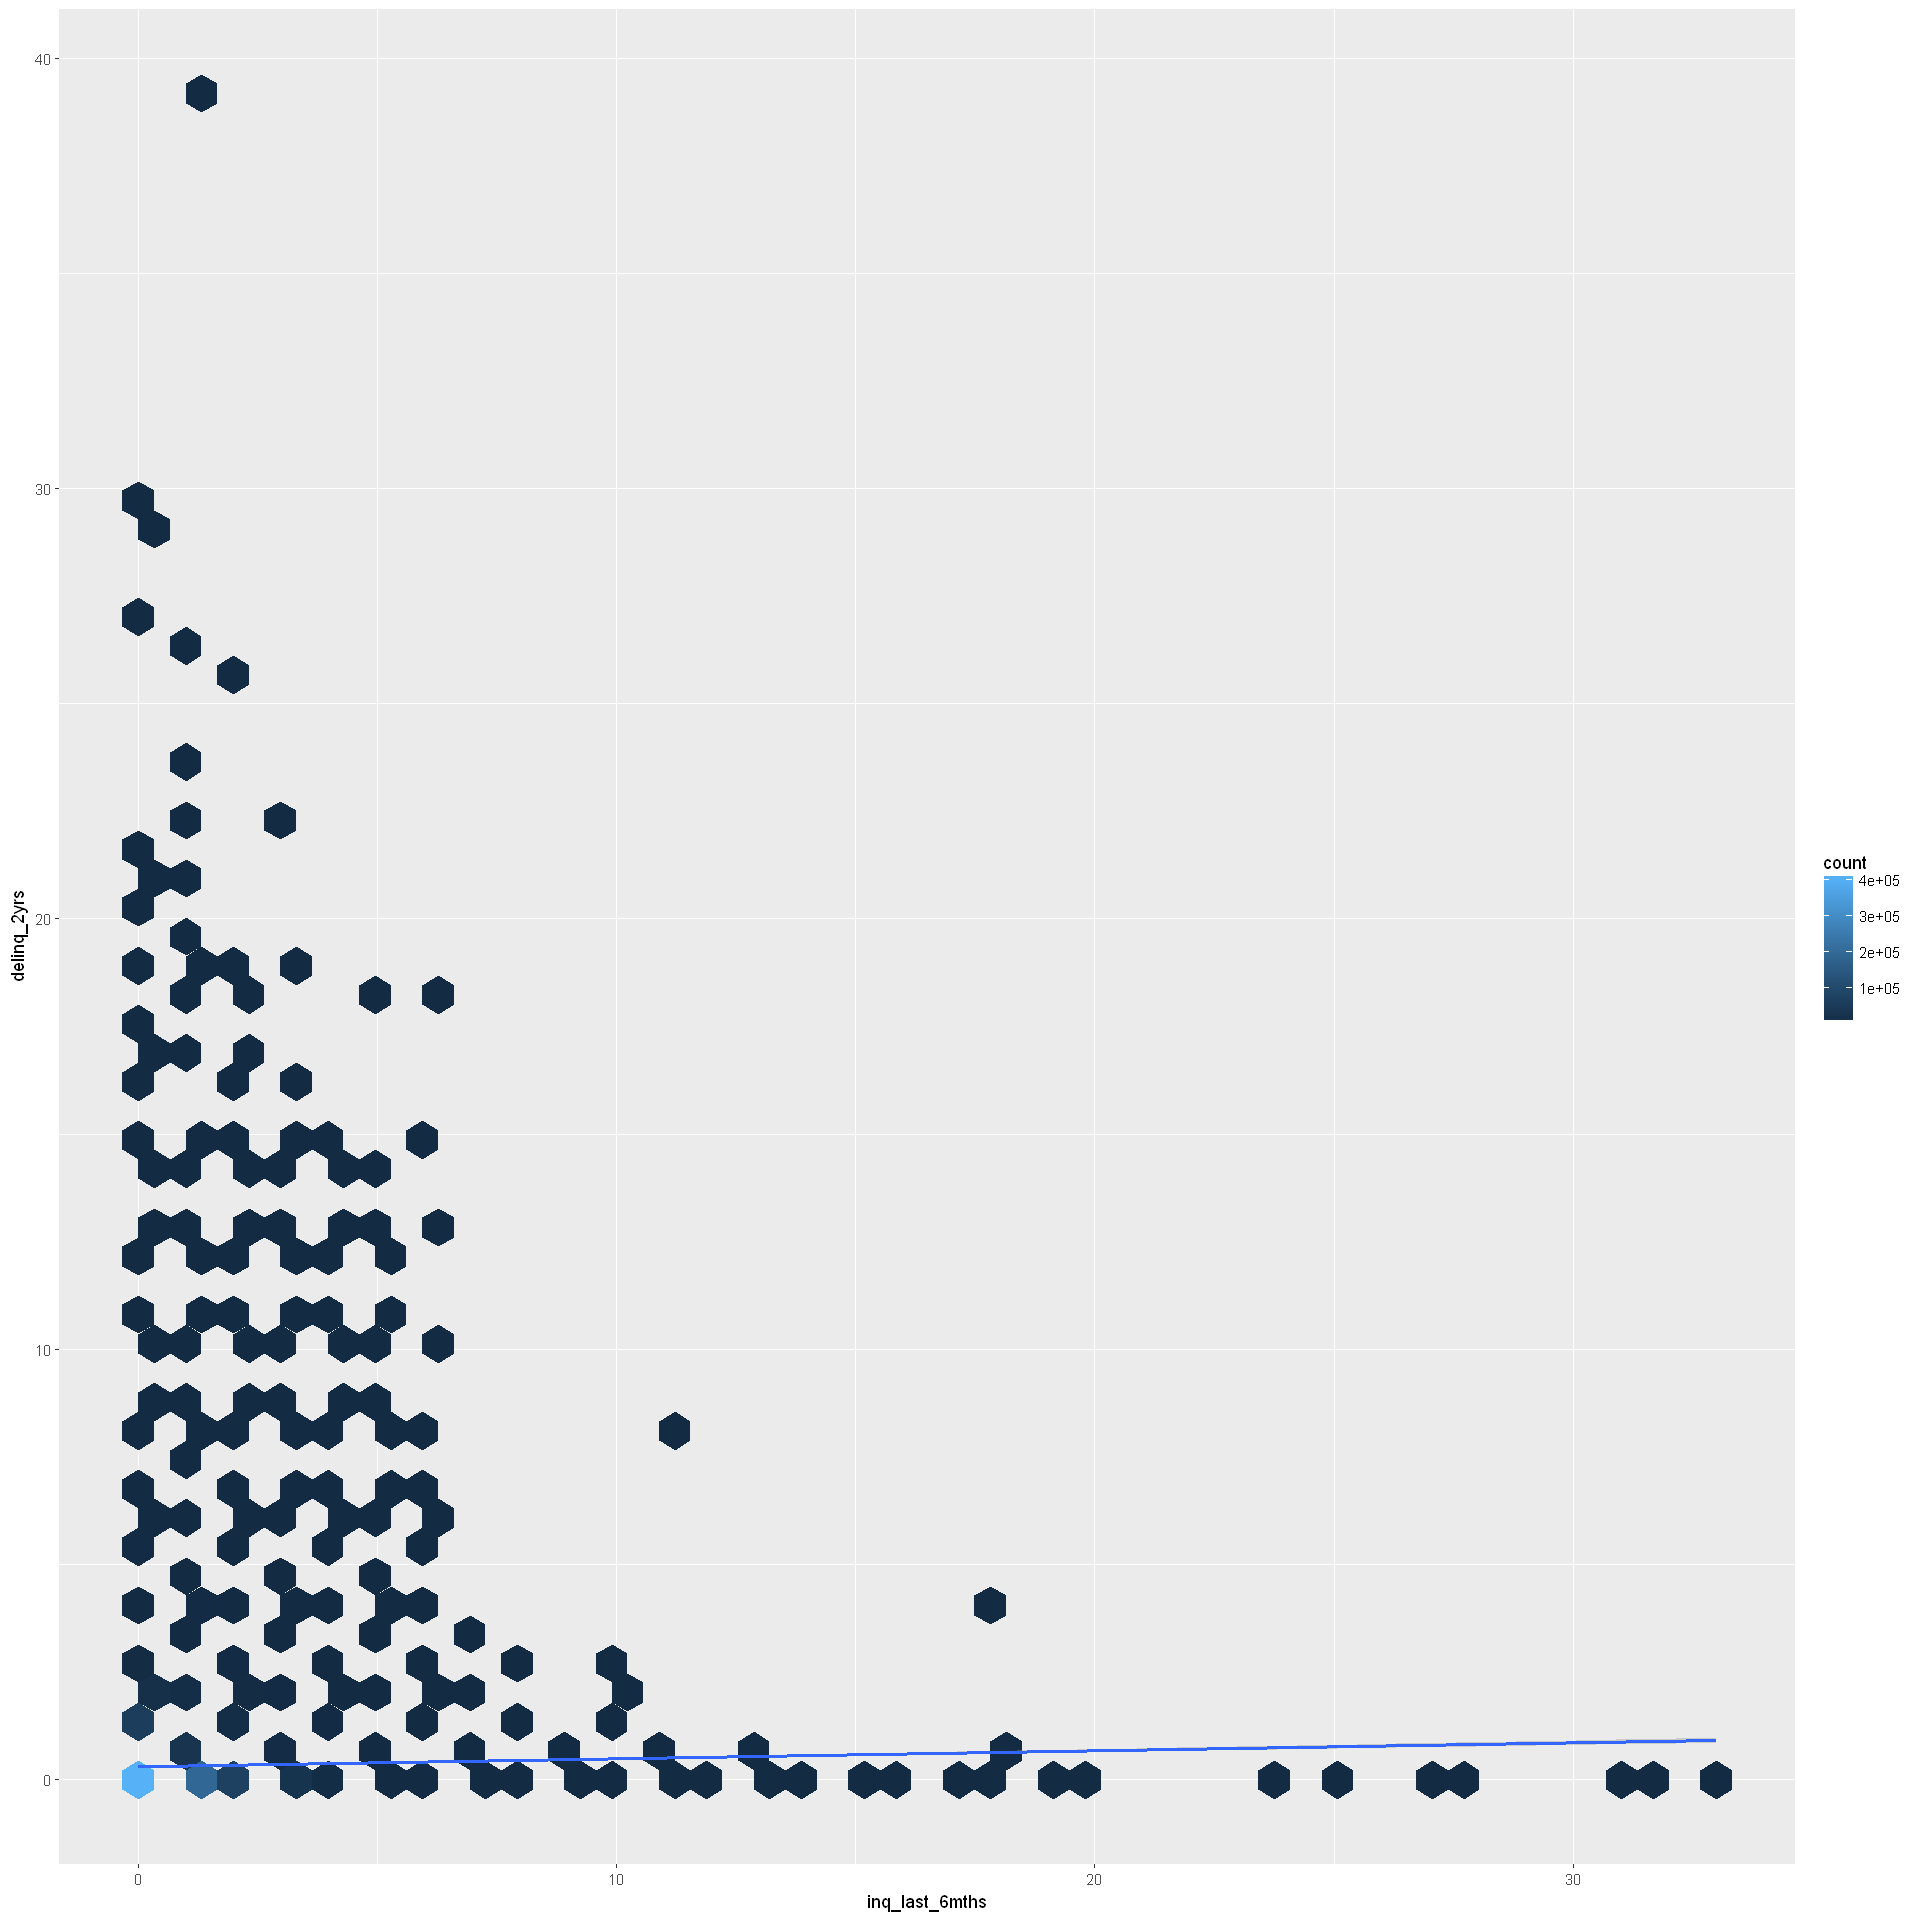

In [155]:
options(repr.plot.width=16, repr.plot.height=16)
ggplot(loan, aes(x = inq_last_6mths, y=delinq_2yrs)) + geom_hex(bins=50) + stat_smooth(method=lm)

### 23. mths_since_last_delinq
mths_since_last_delinq : The number of months since the borrower's last delinquency.

In [157]:
# drop
sum(is.na(loanT$mths_since_last_delinq))/dim(loan)[1]

[1] 0.5119706

### 24. collections_12_mths_ex_med
collections_12_mths_ex_med : Number of collections in 12 months excluding medical collections

In [159]:
sum(is.na(loan$collections_12_mths_ex_med))/dim(loan)[1]

[1] 0.0001634026

In [160]:
table(loan$collections_12_mths_ex_med)


     0      1      2      3      4      5      6      7     10     14     16 
875553  10824    732     88     23      7      2      1      1      1      1 
    20 
     1 

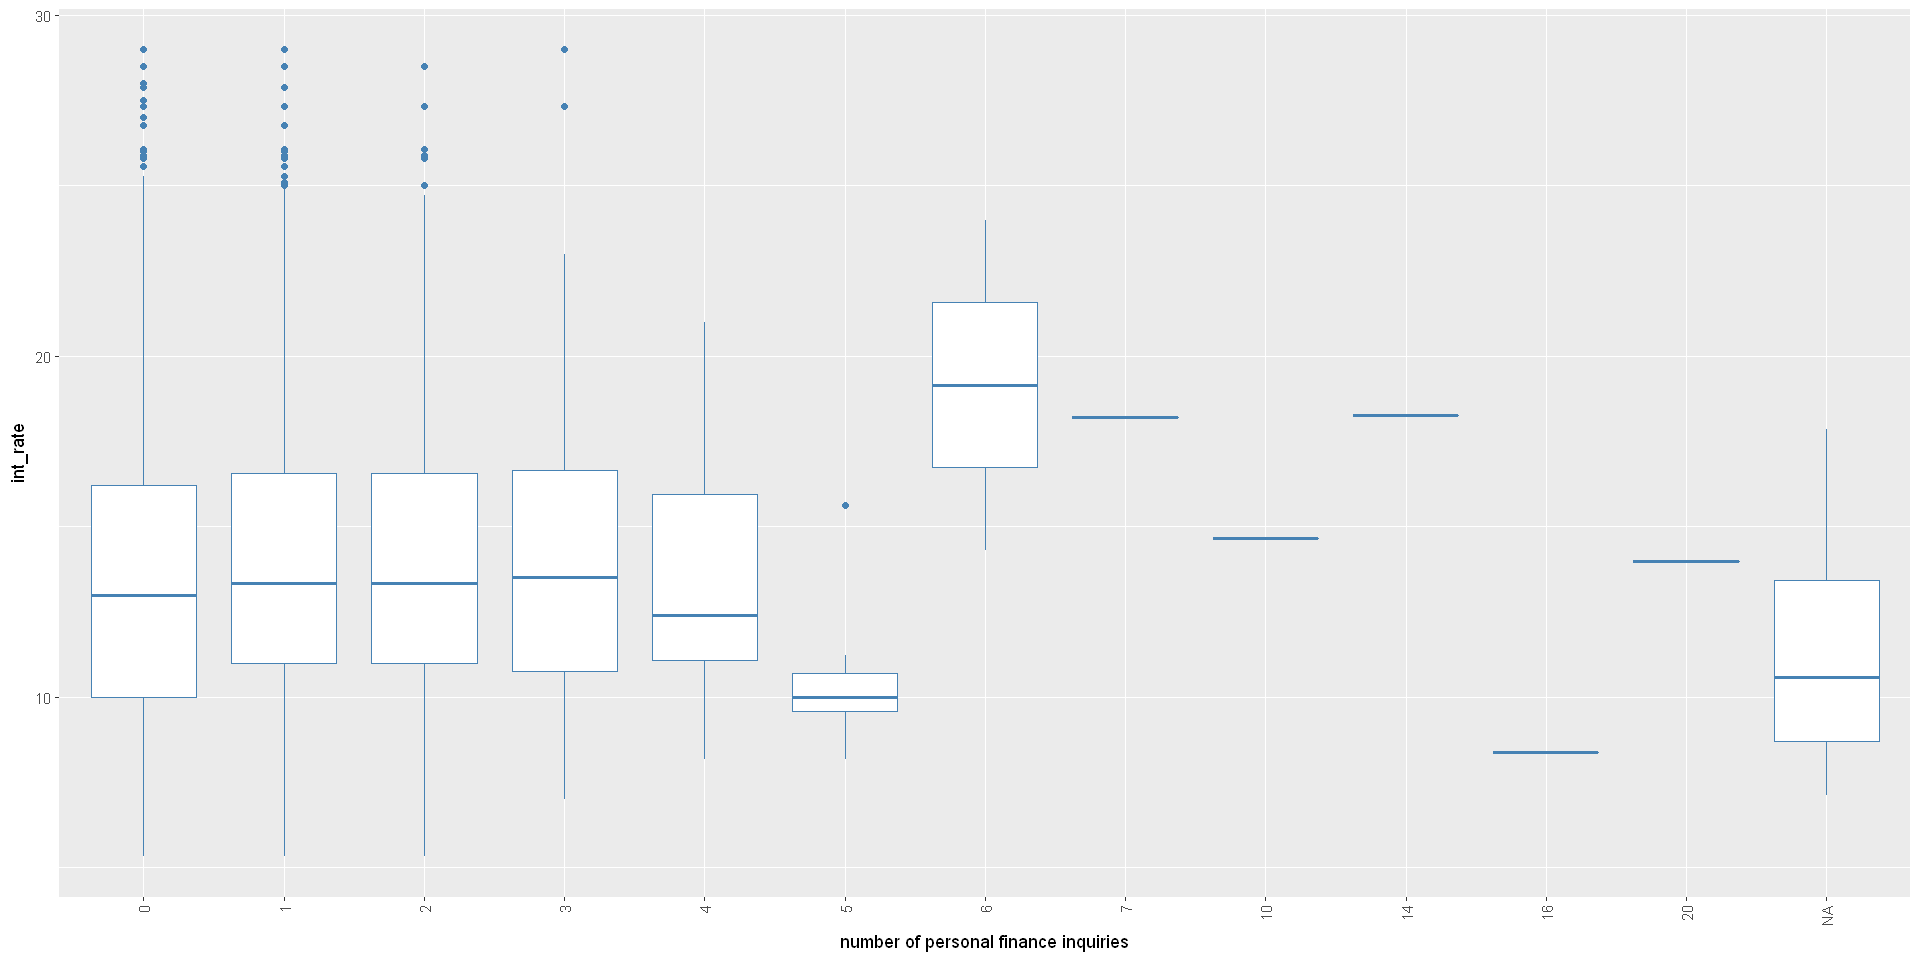

In [161]:
options(repr.plot.width=16, repr.plot.height=8)
ggplot(loan, aes(x=factor(collections_12_mths_ex_med), y=int_rate)) + 
geom_boxplot(color='steelblue') + labs(x='number of personal finance inquiries') + 
theme(axis.text.x = element_text(angle=90, hjust=1, vjust=.5),
        legend.position = "none")

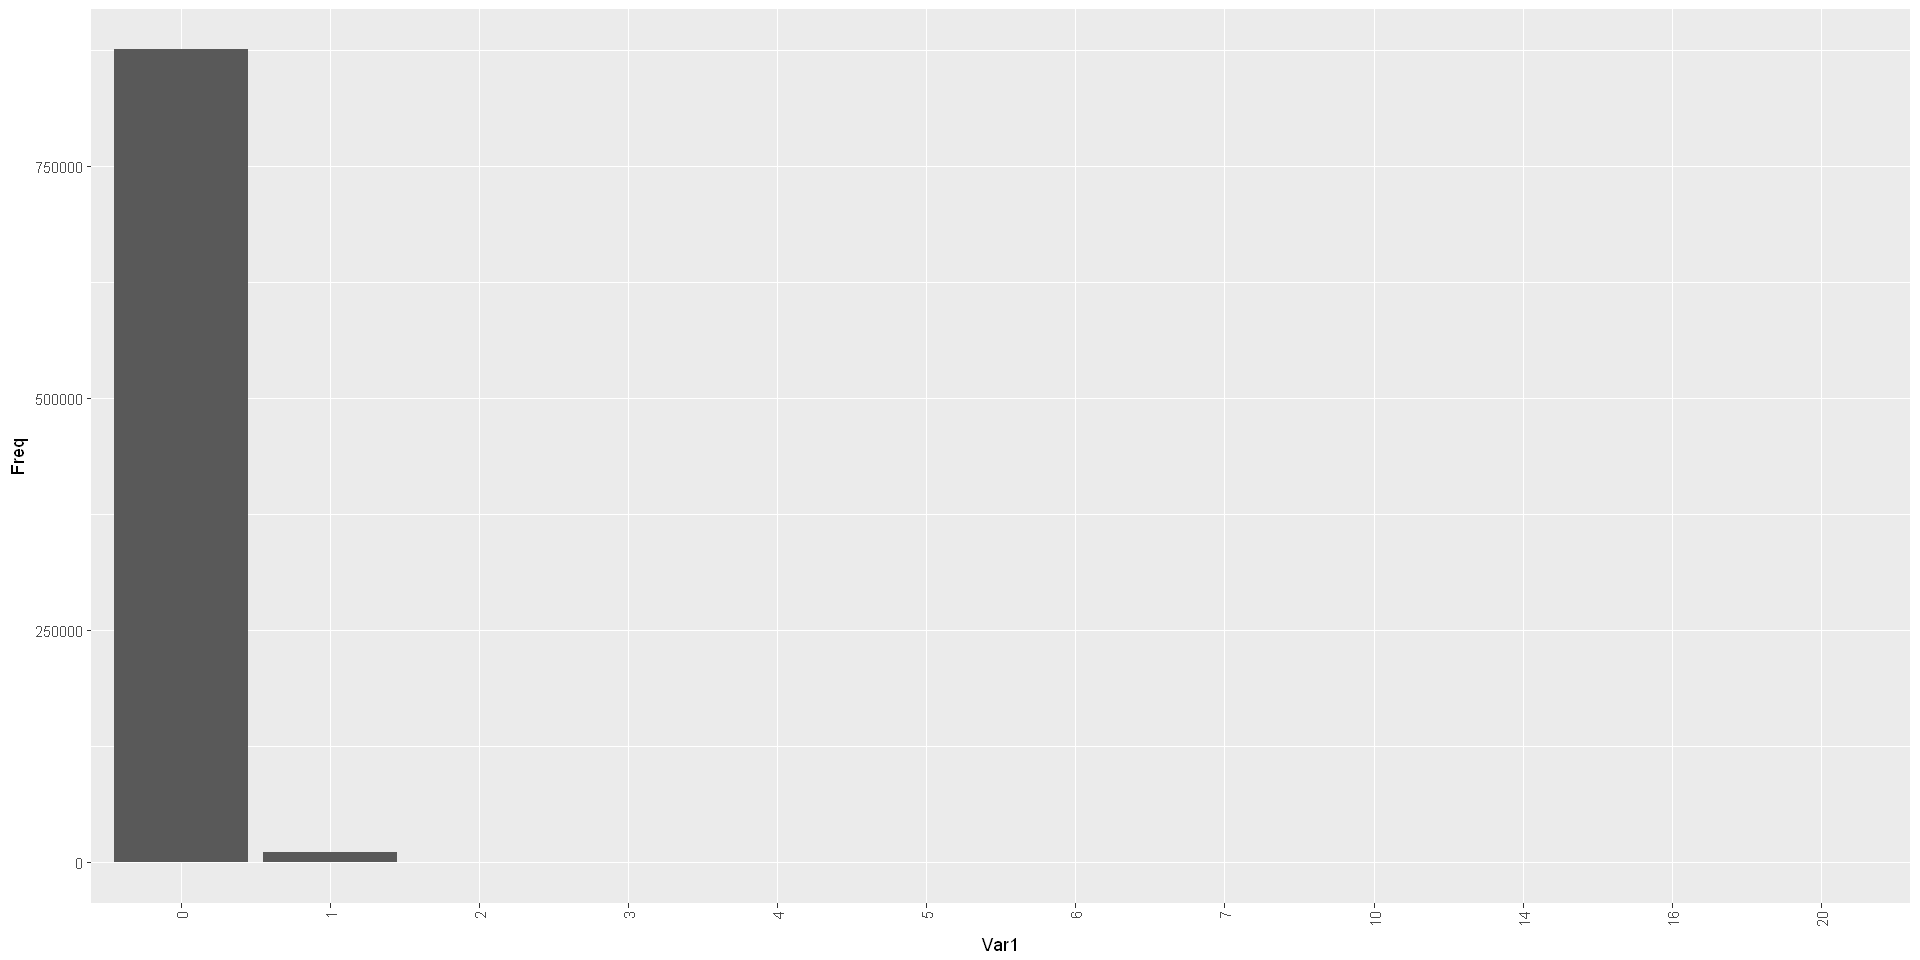

In [162]:
options(repr.plot.width=16, repr.plot.height=8)
ggplot(as.data.frame(table(loan$collections_12_mths_ex_med)), aes(x=Var1, y=Freq)) + 
geom_bar(stat="identity") + 
theme(axis.text.x = element_text(angle=90, hjust=1, vjust=.5),
        legend.position = "none")

### 25. tot_coll_amt
tot_coll_amt : Total collection amounts ever owed

In [163]:
sum(is.na(loan$tot_coll_amt))/dim(loan)[1]

[1] 0.07919502

Warning message:
"Removed 70276 rows containing non-finite values (stat_binhex)."

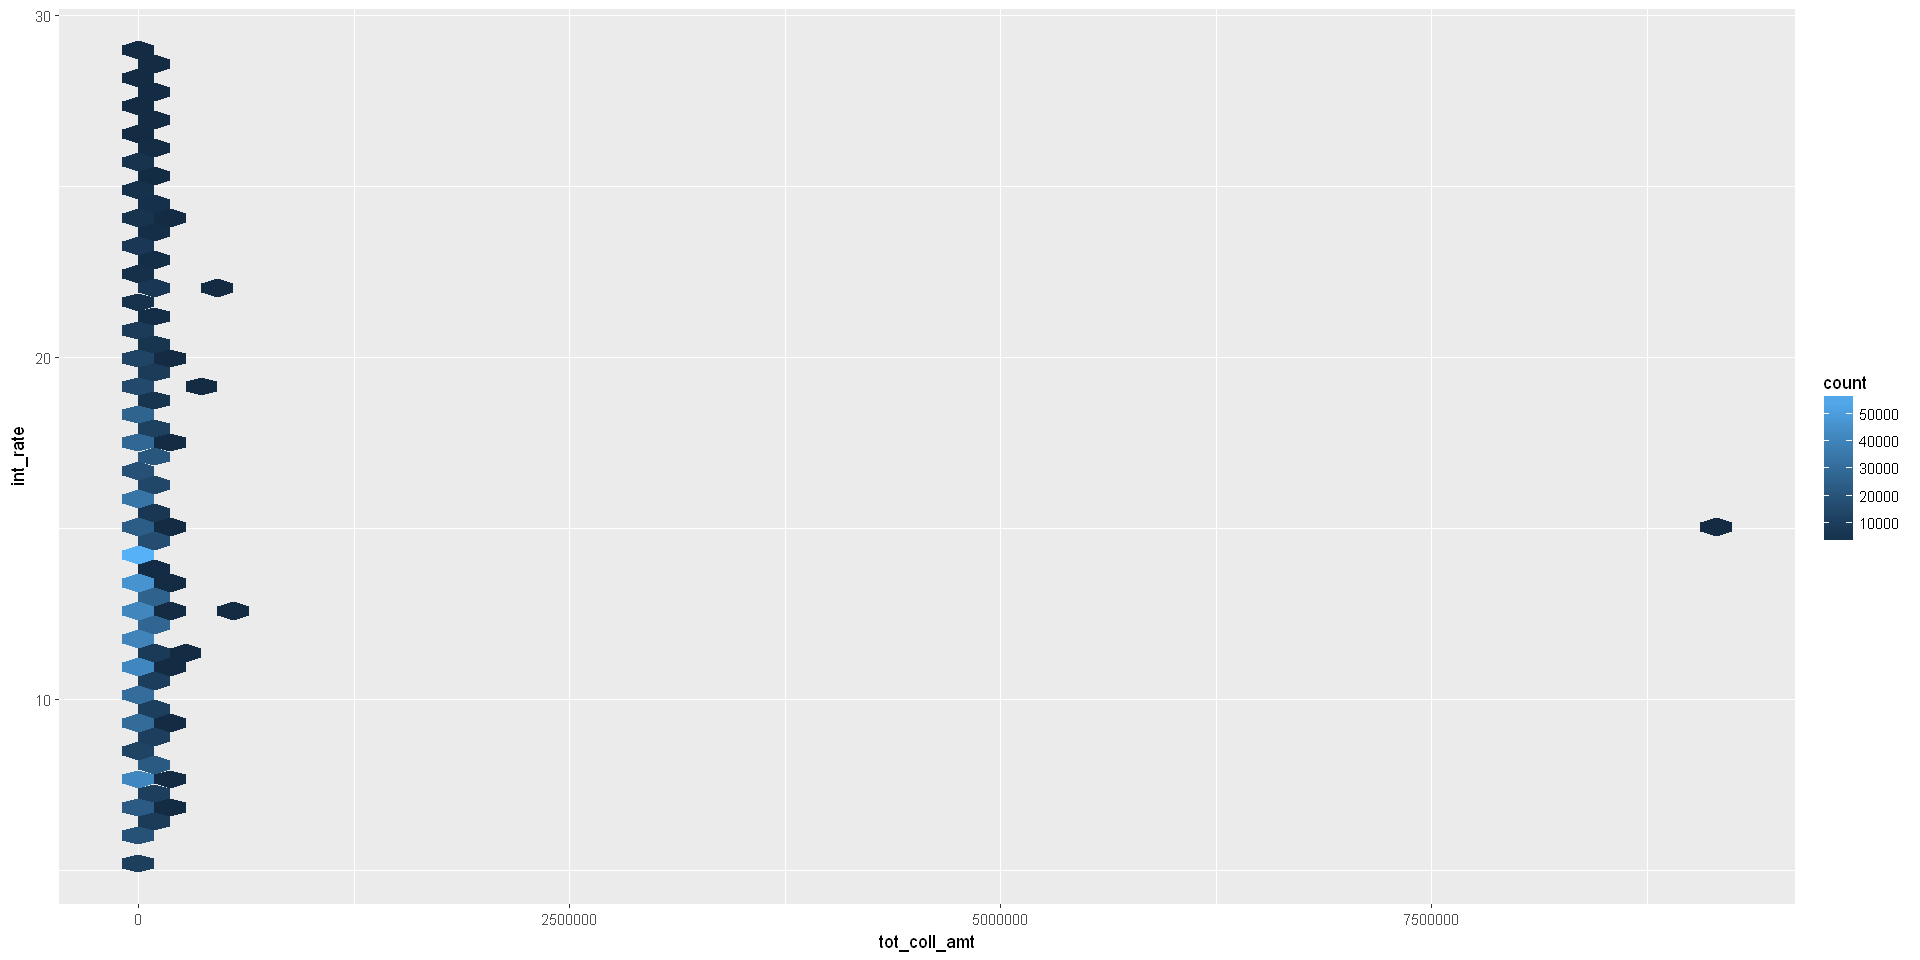

In [164]:
options(repr.plot.width=16, repr.plot.height=8)
ggplot(loan, aes(x=tot_coll_amt, y=int_rate)) + geom_hex(bins=50)

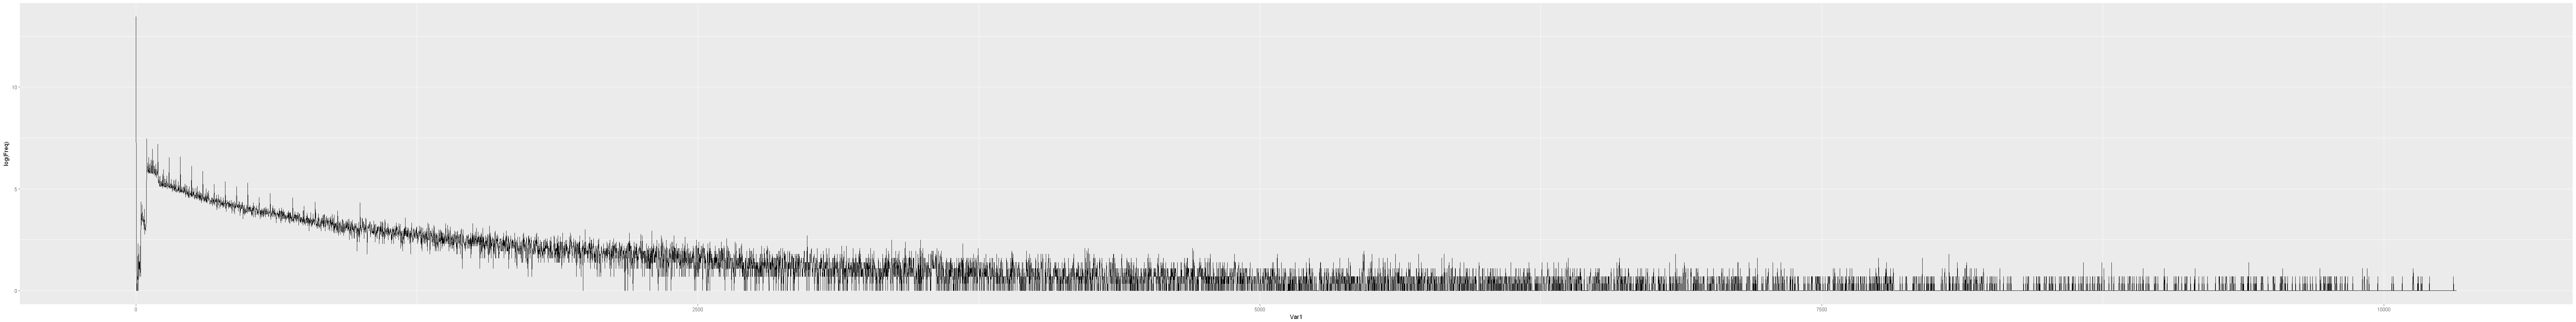

In [165]:
options(repr.plot.width=64, repr.plot.height=8)
tot_coll_amt.data = as.data.frame(table(loan$tot_coll_amt))
tot_coll_amt.data = as.data.frame(sapply(tot_coll_amt.data[, 1:2], as.numeric))
ggplot(tot_coll_amt.data, aes(x=Var1, y=log(Freq))) + 
geom_line()

### 26. pub_rec
pub_rec : Number of derogatory public records

In [166]:
sum(is.na(loan$pub_rec))/dim(loan)[1]

[1] 3.268051e-05

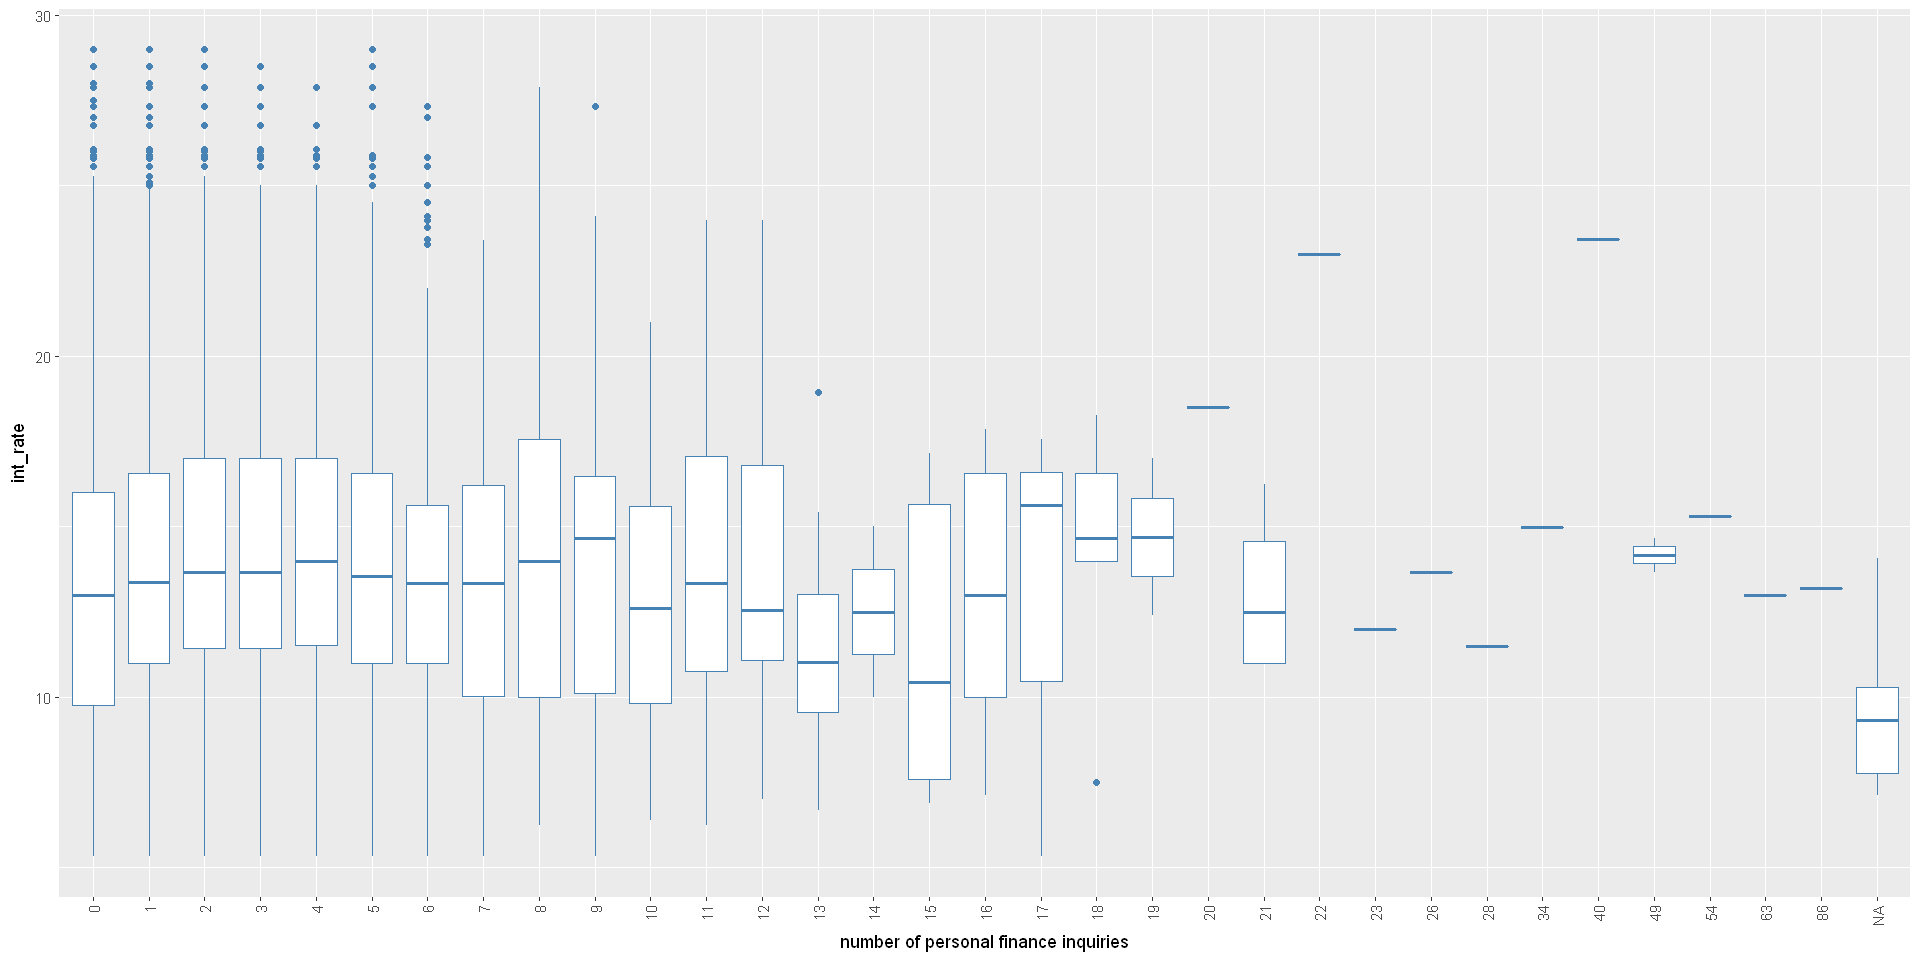

In [167]:
options(repr.plot.width=16, repr.plot.height=8)
ggplot(loan, aes(x=factor(pub_rec), y=int_rate)) + 
geom_boxplot(color='steelblue') + labs(x='number of personal finance inquiries') + 
theme(axis.text.x = element_text(angle=90, hjust=1, vjust=.5),
        legend.position = "none")

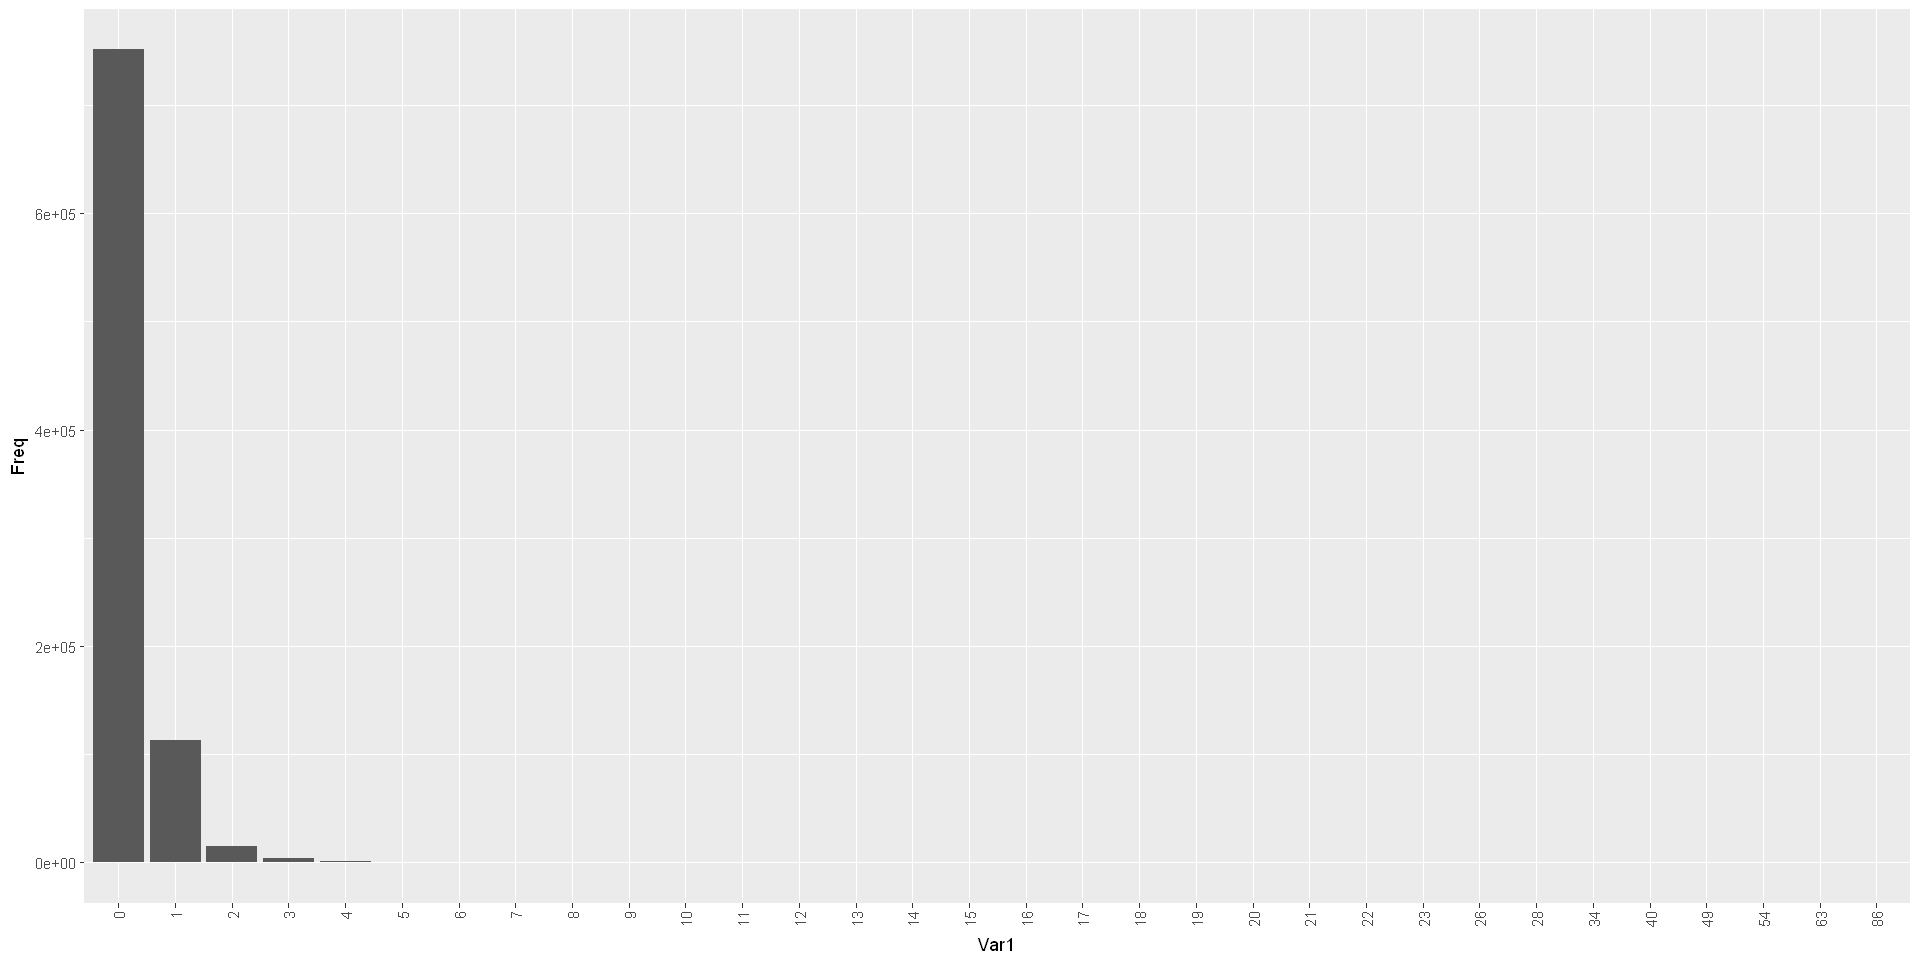

In [168]:
options(repr.plot.width=16, repr.plot.height=8)
ggplot(as.data.frame(table(loan$pub_rec)), aes(x=Var1, y=Freq)) + 
geom_bar(stat="identity") + 
theme(axis.text.x = element_text(angle=90, hjust=1, vjust=.5),
        legend.position = "none")

### 26. mths_since_last_major_derog
mths_since_last_major_derog : Months since most recent 90-day or worse rating

In [173]:
sum(is.na(loanT$mths_since_last_major_derog))/dim(loan)[1]

[1] 0.7501597

In [174]:
#drop

### 27. mths_since_last_record
mths_since_last_record : The number of months since the last public record.

In [175]:
# drop
sum(is.na(loanT$mths_since_last_record))/dim(loan)[1]

[1] 0.845553

### 28. il_util
il_util : Ratio of total current balance to high credit/credit limit on all install acct

In [180]:
# drop
sum(is.na(loanT$il_util))/dim(loan)[1]

[1] 0.9790202

### 29. mths_since_rcnt_il

In [181]:
# drop
sum(is.na(loanT$mths_since_rcnt_il))/dim(loan)[1]

[1] 0.9765489

### 30. open_il_12m

In [182]:
# drop
sum(is.na(loanT$open_il_12m))/dim(loan)[1]

[1] 0.9759156

### 31. open_il_24m

In [183]:
# drop
sum(is.na(loanT$open_il_24m))/dim(loan)[1]

[1] 0.9759156

### 32. open_il_6m

In [184]:
# drop
sum(is.na(loanT$open_il_6m))/dim(loan)[1]

[1] 0.9759156

### 33. total_bal_il

In [185]:
# drop
sum(is.na(loanT$total_bal_il))/dim(loan)[1]

[1] 0.9759156

### 34. max_bal_bc

In [186]:
# drop
sum(is.na(loanT$max_bal_bc))/dim(loan)[1]

[1] 0.9759156

### 35. open_rv_12m

In [187]:
# drop
sum(is.na(loanT$open_rv_12m))/dim(loan)[1]

[1] 0.9759156

### 36. open_rv_24m

In [188]:
# drop
sum(is.na(loanT$open_rv_24m))/dim(loan)[1]

[1] 0.9759156

### 37. revol_bal
revol_bal : Total credit revolving balance

In [190]:
sum(is.na(loan$revol_bal))/dim(loan)[1]

[1] 0

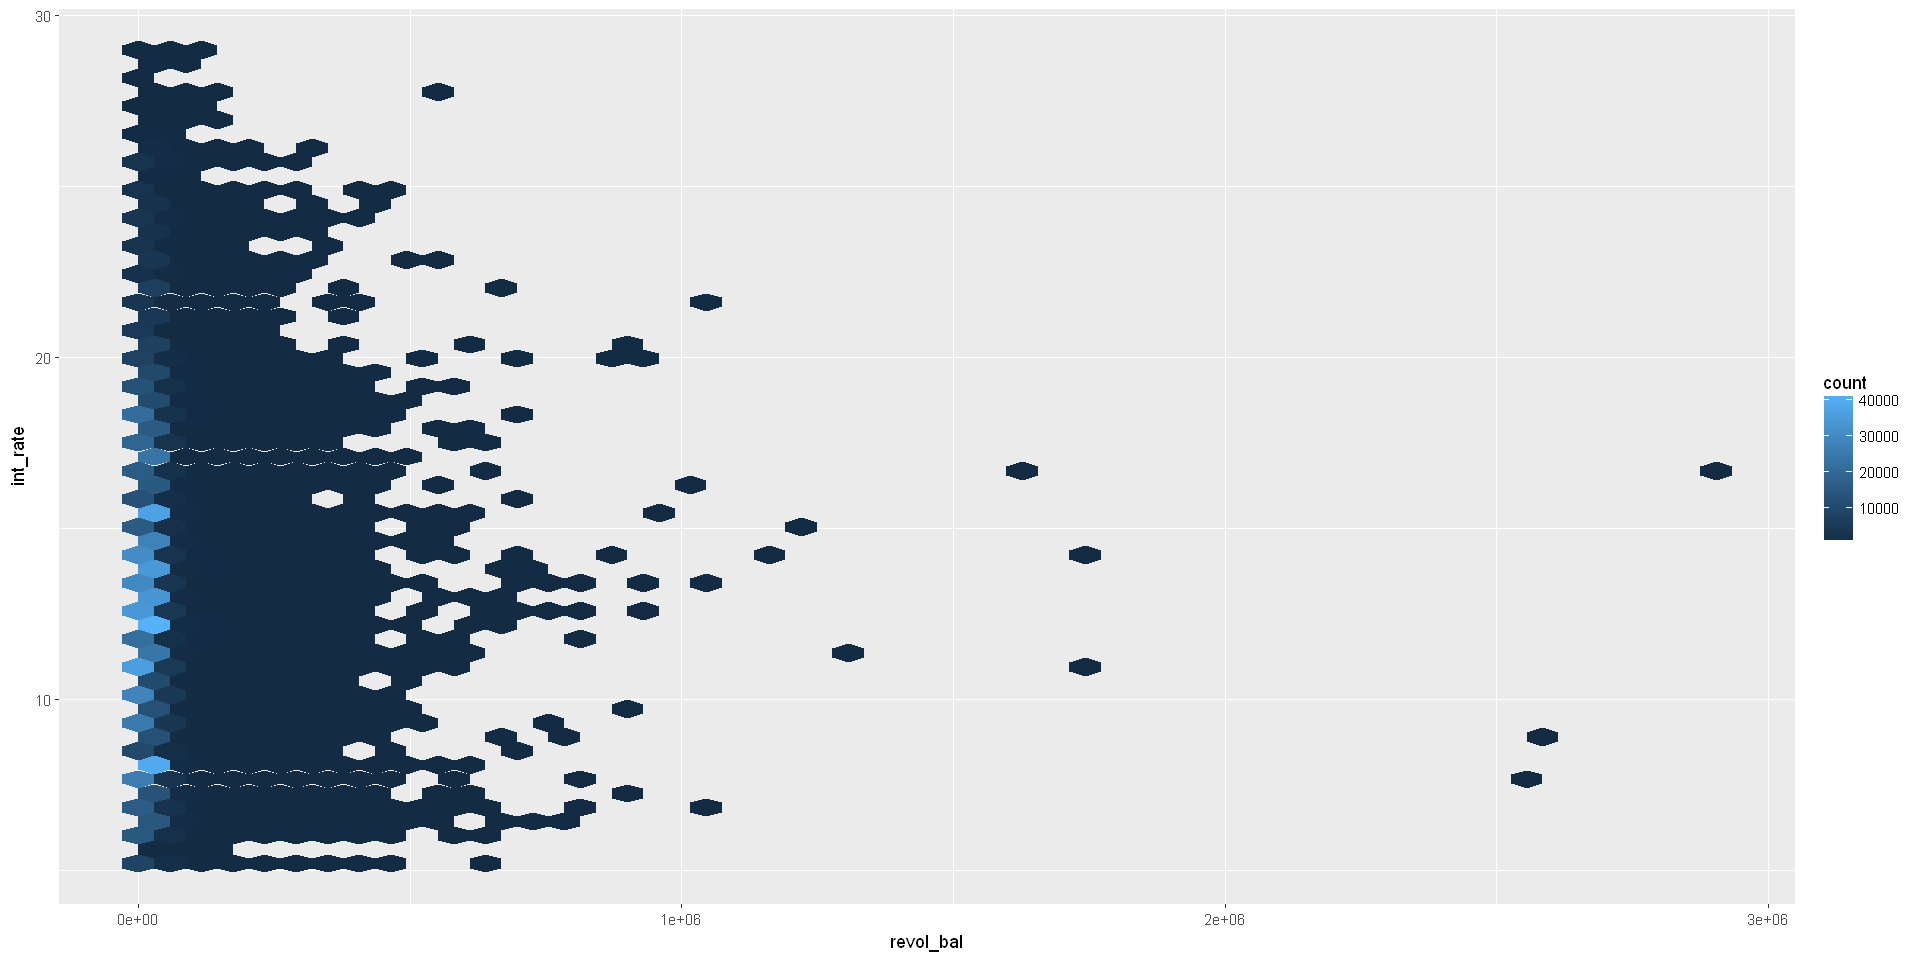

In [191]:
options(repr.plot.width=16, repr.plot.height=8)
ggplot(loan, aes(x=revol_bal, y=int_rate)) + geom_hex(bins=50)

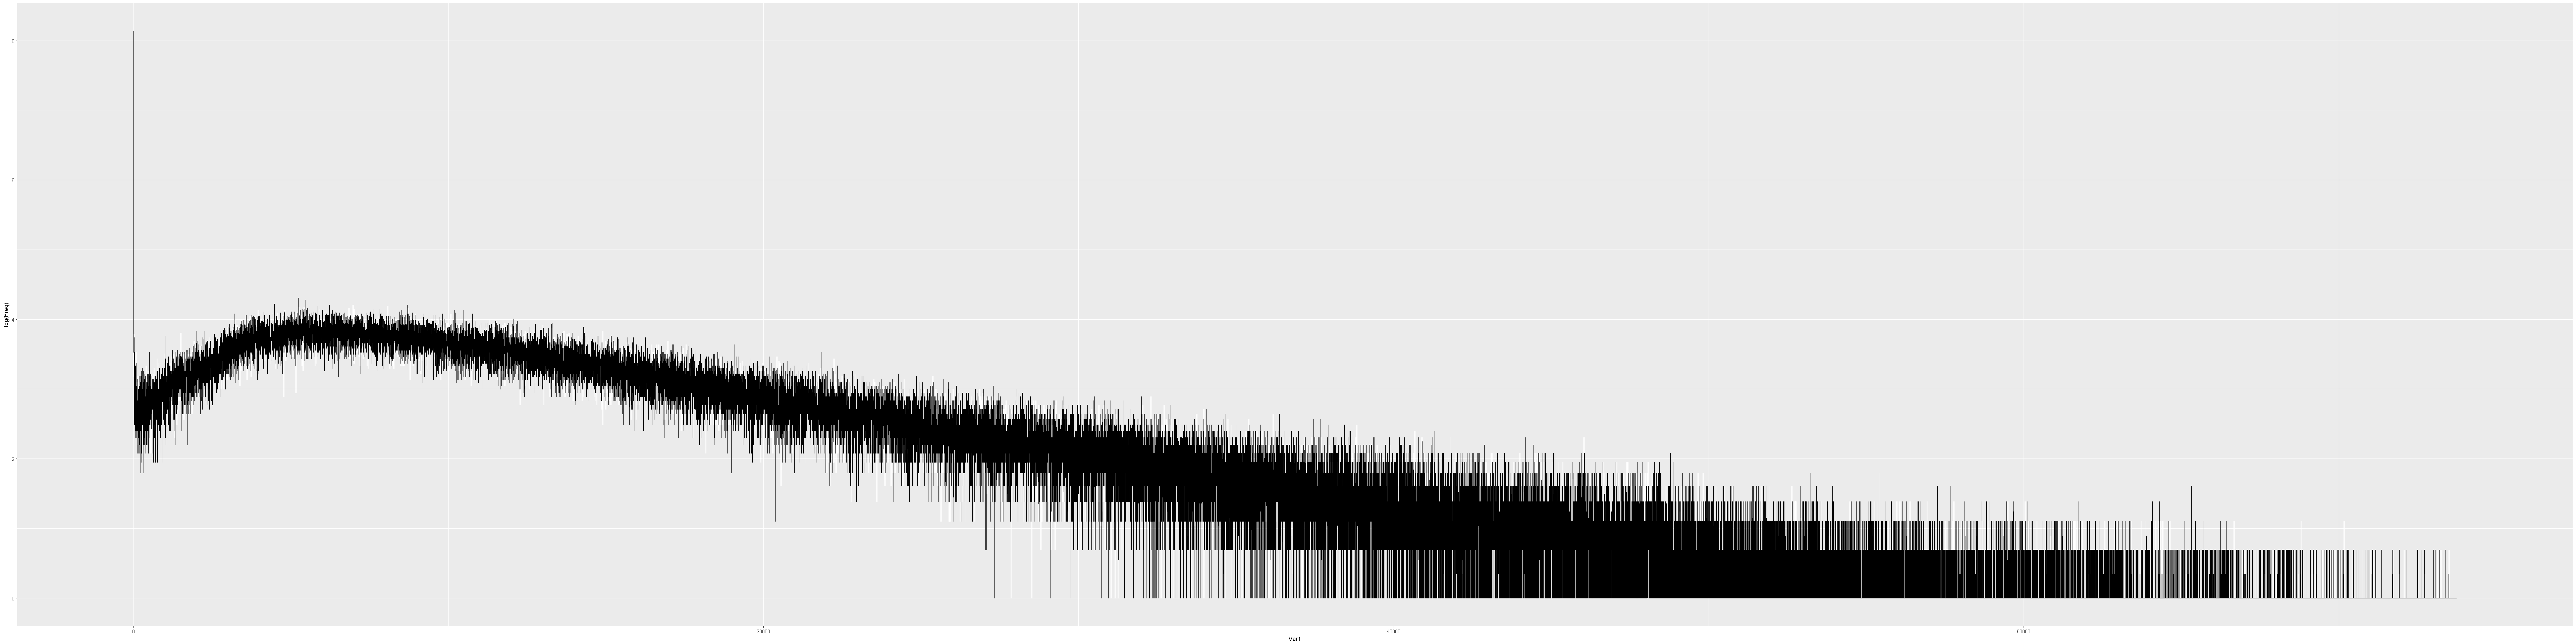

In [192]:
options(repr.plot.width=64, repr.plot.height=16)
revol_bal.data = as.data.frame(table(loan$revol_bal))
revol_bal.data = as.data.frame(sapply(revol_bal.data[, 1:2], as.numeric))
ggplot(revol_bal.data, aes(x=Var1, y=log(Freq))) + 
geom_line()

In [193]:
cor(loan$revol_bal, loan$int_rate)

[1] -0.03570809

### 38. revol_util
revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [194]:
sum(is.na(loan$revol_util))/dim(loan)[1]

[1] 0.0005657109

Warning message:
"Removed 502 rows containing non-finite values (stat_binhex)."

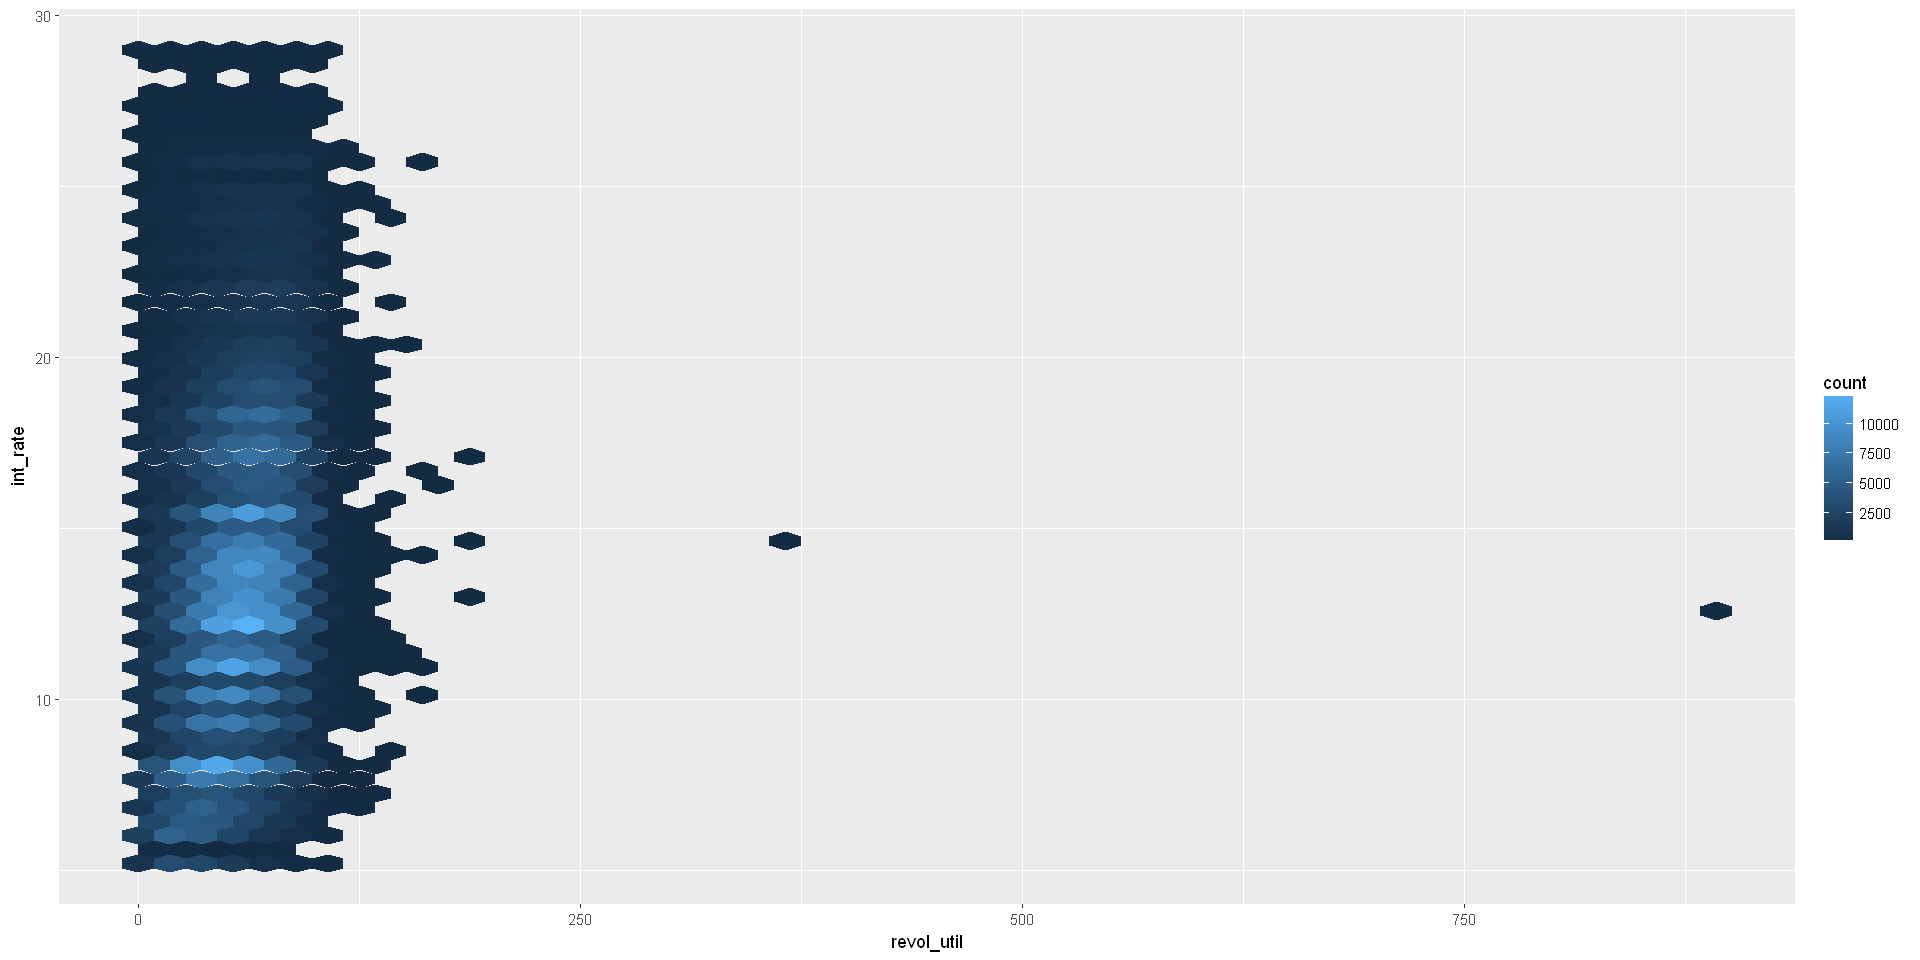

In [195]:
options(repr.plot.width=16, repr.plot.height=8)
ggplot(loan, aes(x=revol_util, y=int_rate)) + geom_hex(bins=50)

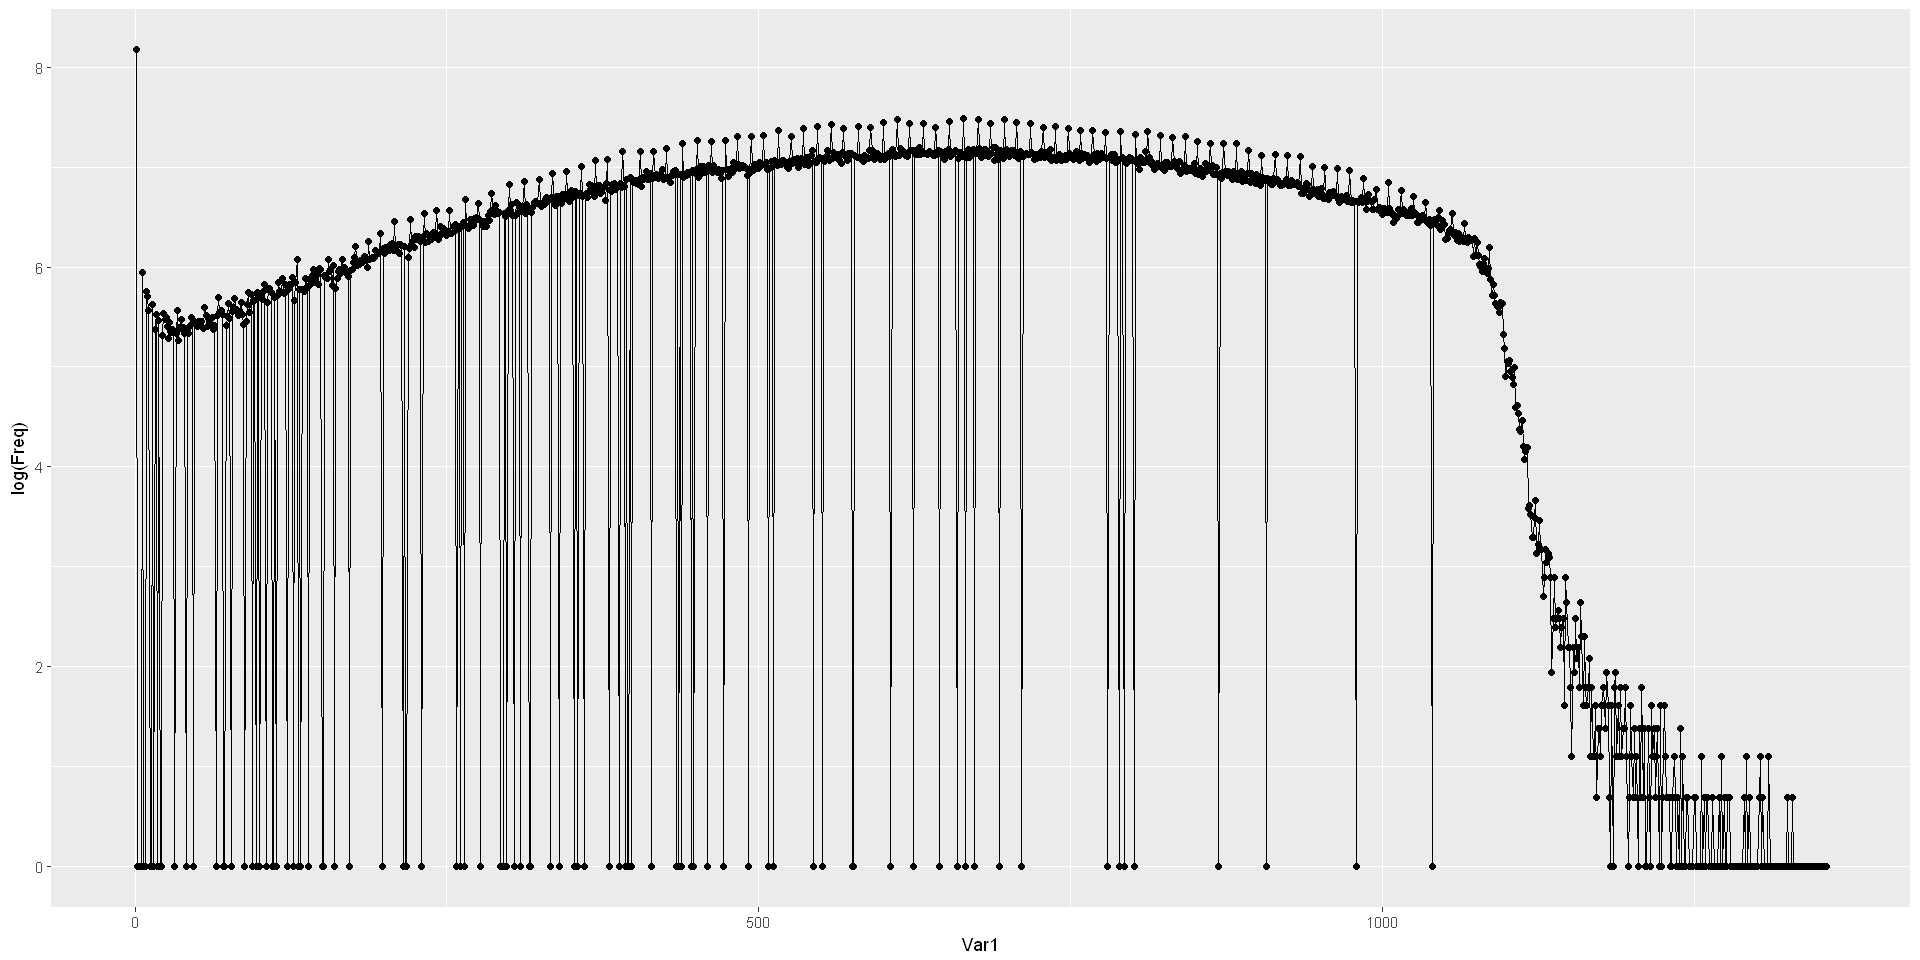

In [196]:
options(repr.plot.width=16, repr.plot.height=8)
revol_util.data = as.data.frame(table(loan$revol_util))
revol_util.data = as.data.frame(sapply(revol_util.data[, 1:2], as.numeric))
ggplot(revol_util.data, aes(x=Var1, y=log(Freq))) + 
geom_line() + geom_point()

### 39. total_rev_hi_lim 
total_rev_hi_lim : Total revolving high credit/credit limit

In [197]:
sum(is.na(loan$total_rev_hi_lim))/dim(loan)[1]

[1] 0.07919502

Warning message:
"Removed 70276 rows containing non-finite values (stat_binhex)."

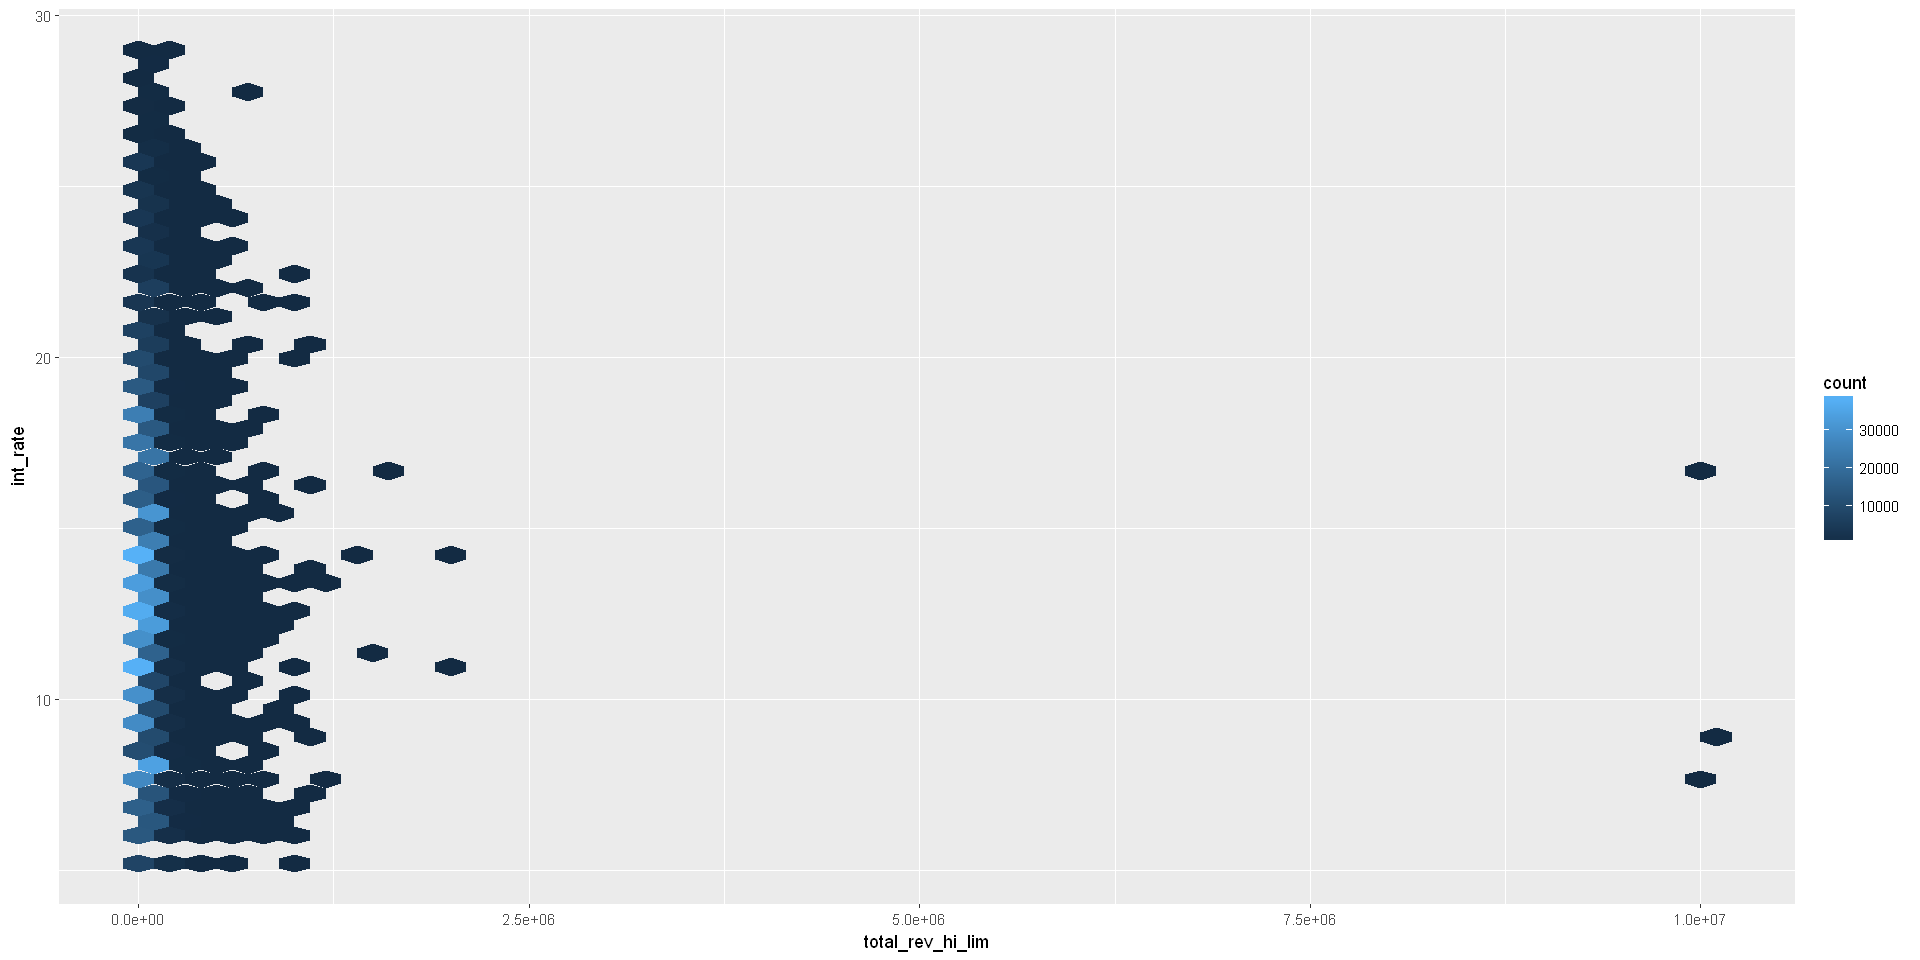

In [198]:
options(repr.plot.width=16, repr.plot.height=8)
ggplot(loan, aes(x= total_rev_hi_lim, y=int_rate)) + geom_hex(bins=50)

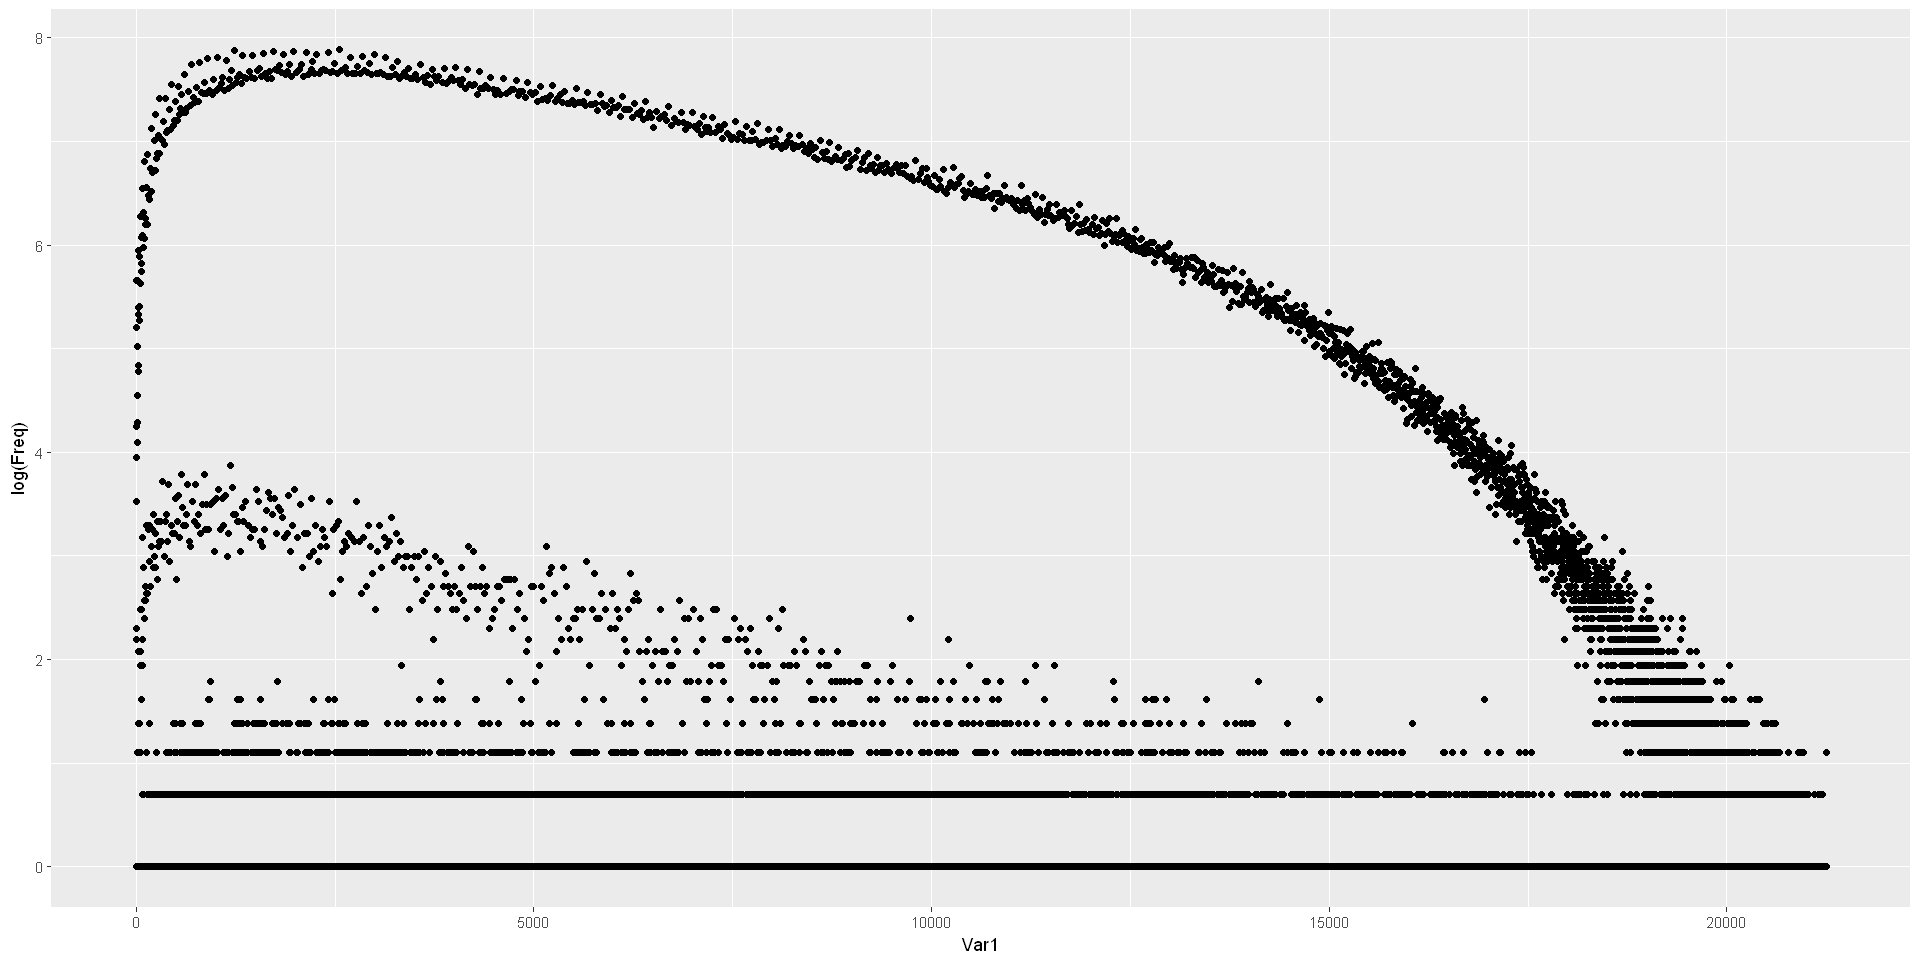

In [199]:
options(repr.plot.width=16, repr.plot.height=8)
total_rev_hi_lim.data = as.data.frame(table(loan$total_rev_hi_lim))
total_rev_hi_lim.data = as.data.frame(sapply(total_rev_hi_lim.data[, 1:2], as.numeric))
ggplot(total_rev_hi_lim.data, aes(x=Var1, y=log(Freq))) + 
geom_point()

### 40. policy_code
policy_code : publicly available policy_code=1

In [202]:
sum(is.na(loan$policy_code))/dim(loan)[1]

[1] 0

In [201]:
# drop 
unique(loan$policy_code)

[1] 1

### 41. url

In [203]:
# same as id, no use
loan$url[1:10]

[1] "https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077501"
 [2] "https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077430"
 [3] "https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077175"
 [4] "https://www.lendingclub.com/browse/loanDetail.action?loan_id=1076863"
 [5] "https://www.lendingclub.com/browse/loanDetail.action?loan_id=1075358"
 [6] "https://www.lendingclub.com/browse/loanDetail.action?loan_id=1075269"
 [7] "https://www.lendingclub.com/browse/loanDetail.action?loan_id=1069639"
 [8] "https://www.lendingclub.com/browse/loanDetail.action?loan_id=1072053"
 [9] "https://www.lendingclub.com/browse/loanDetail.action?loan_id=1071795"
[10] "https://www.lendingclub.com/browse/loanDetail.action?loan_id=1071570"

### 42. application_type
application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers

In [204]:
sum(is.na(loan$application_type))/dim(loan)[1]

[1] 0

In [205]:
table(loan$application_type)


INDIVIDUAL      JOINT 
    886868        511 

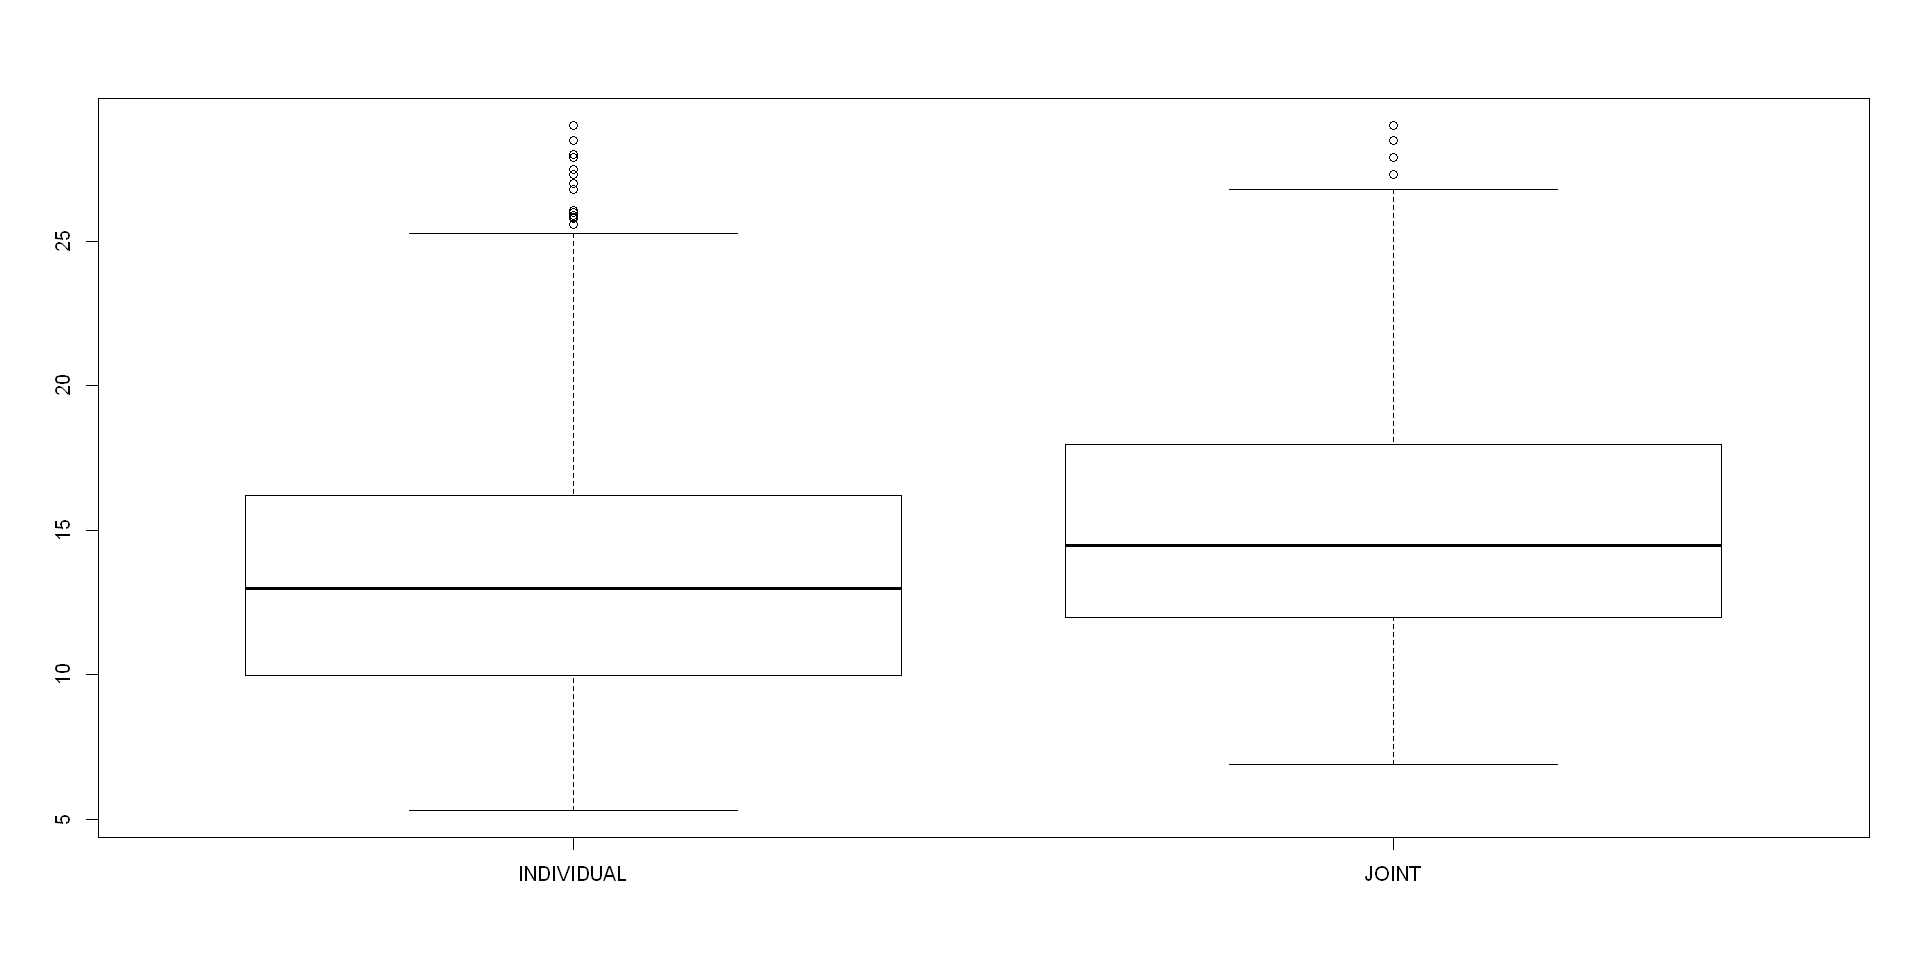

In [207]:
boxplot(loan$int_rate~loan$application_type)

### 43. desc
desc : Loan description provided by the borrower

In [208]:
sum(is.na(loan$desc))/dim(loan)[1]

[1] 0

In [209]:
# need nlp
loan$desc[1:10]

[1] "  Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
 [2] "  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>"
 [3] ""                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
 [4] "  Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time.<br>"                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  Borrower added on 12/21/11 > I plan on combining three large interest bills together and freeing up some extra each month to pay toward other bills.  I've always been a good payor but have found myself needing to make adjustments to my budget due to a medical scare. My job is very stable, I love it.<br>"                                                                                                                                                                                                                                                                                            
 [6] ""                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
 [7] "  Borrower added on 12/18/11 > I am planning on using the funds to pay off two retail credit cards with 24.99% interest rates, as well as a major bank credit card with a 18.99% rate.  I pay all my bills on time, looking for a lower combined payment and lower monthly payment.<br>"                                                                                                                               

### 44. id

In [210]:
length(unique(loan$id))

[1] 887379

### 45. purpose
purpose : A category provided by the borrower for the loan request.

In [211]:
sum(is.na(loan$purpose))/dim(loan)[1]

[1] 0

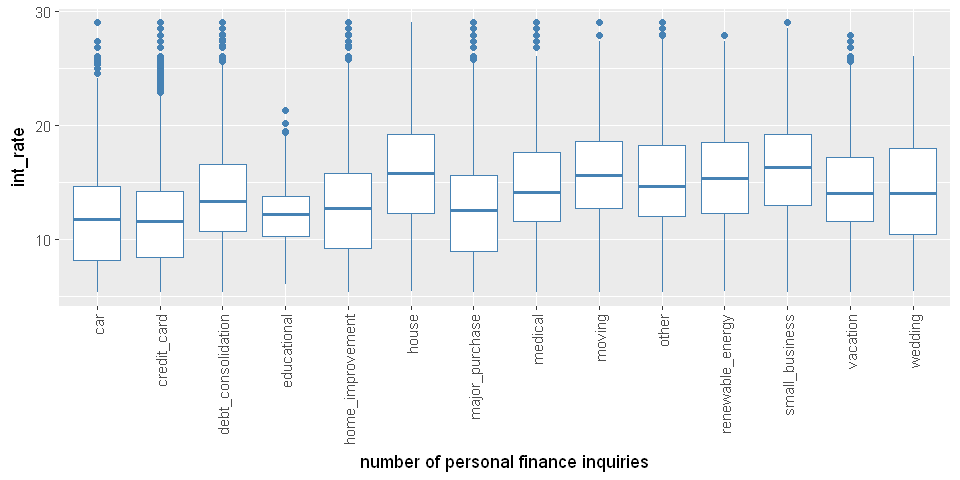

In [212]:
options(repr.plot.width=8, repr.plot.height=4)
ggplot(loan, aes(x=factor(purpose), y=int_rate)) + 
geom_boxplot(color='steelblue') + labs(x='number of personal finance inquiries') + 
theme(axis.text.x = element_text(angle=90, hjust=1, vjust=.5),
        legend.position = "none")

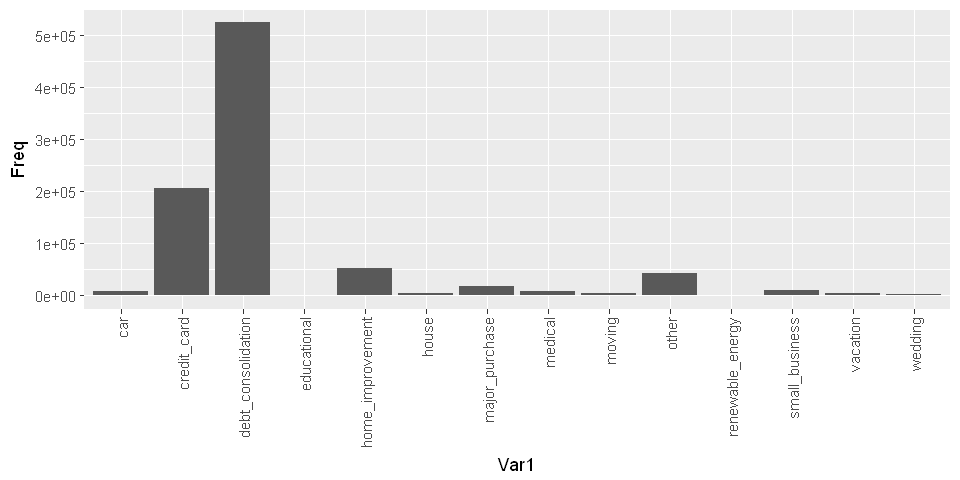

In [213]:
options(repr.plot.width=8, repr.plot.height=4)
ggplot(as.data.frame(table(loan$purpose)), aes(x=Var1, y=Freq)) + 
geom_bar(stat="identity") + 
theme(axis.text.x = element_text(angle=90, hjust=1, vjust=.5),
        legend.position = "none")

### 46. title
title : The loan title provided by the borrower

In [214]:
sum(is.na(loan$title))

[1] 0

In [215]:
length(unique(loan$title))

[1] 63146

In [216]:
# display top ten emp_title
loan$title = tolower(loan$title)            # convert all string to lowercase
sort(table(loan$title), decreasing = T)[1:50]   # possible text processing, na exists as a level


       debt consolidation   credit card refinancing          home improvement 
                   435239                    164717                     42663 
                    other            major purchase             consolidation 
                    31978                     12346                      7740 
                 business          medical expenses             car financing 
                     6823                      6782                      5591 
  debt consolidation loan                  vacation     moving and relocation 
                     4683                      3993                      3929 
credit card consolidation             personal loan        consolidation loan 
                     3509                      3313                      2597 
       credit card payoff     credit card refinance               home buying 
                     2530                      2437                      2383 
              consolidate                  personal

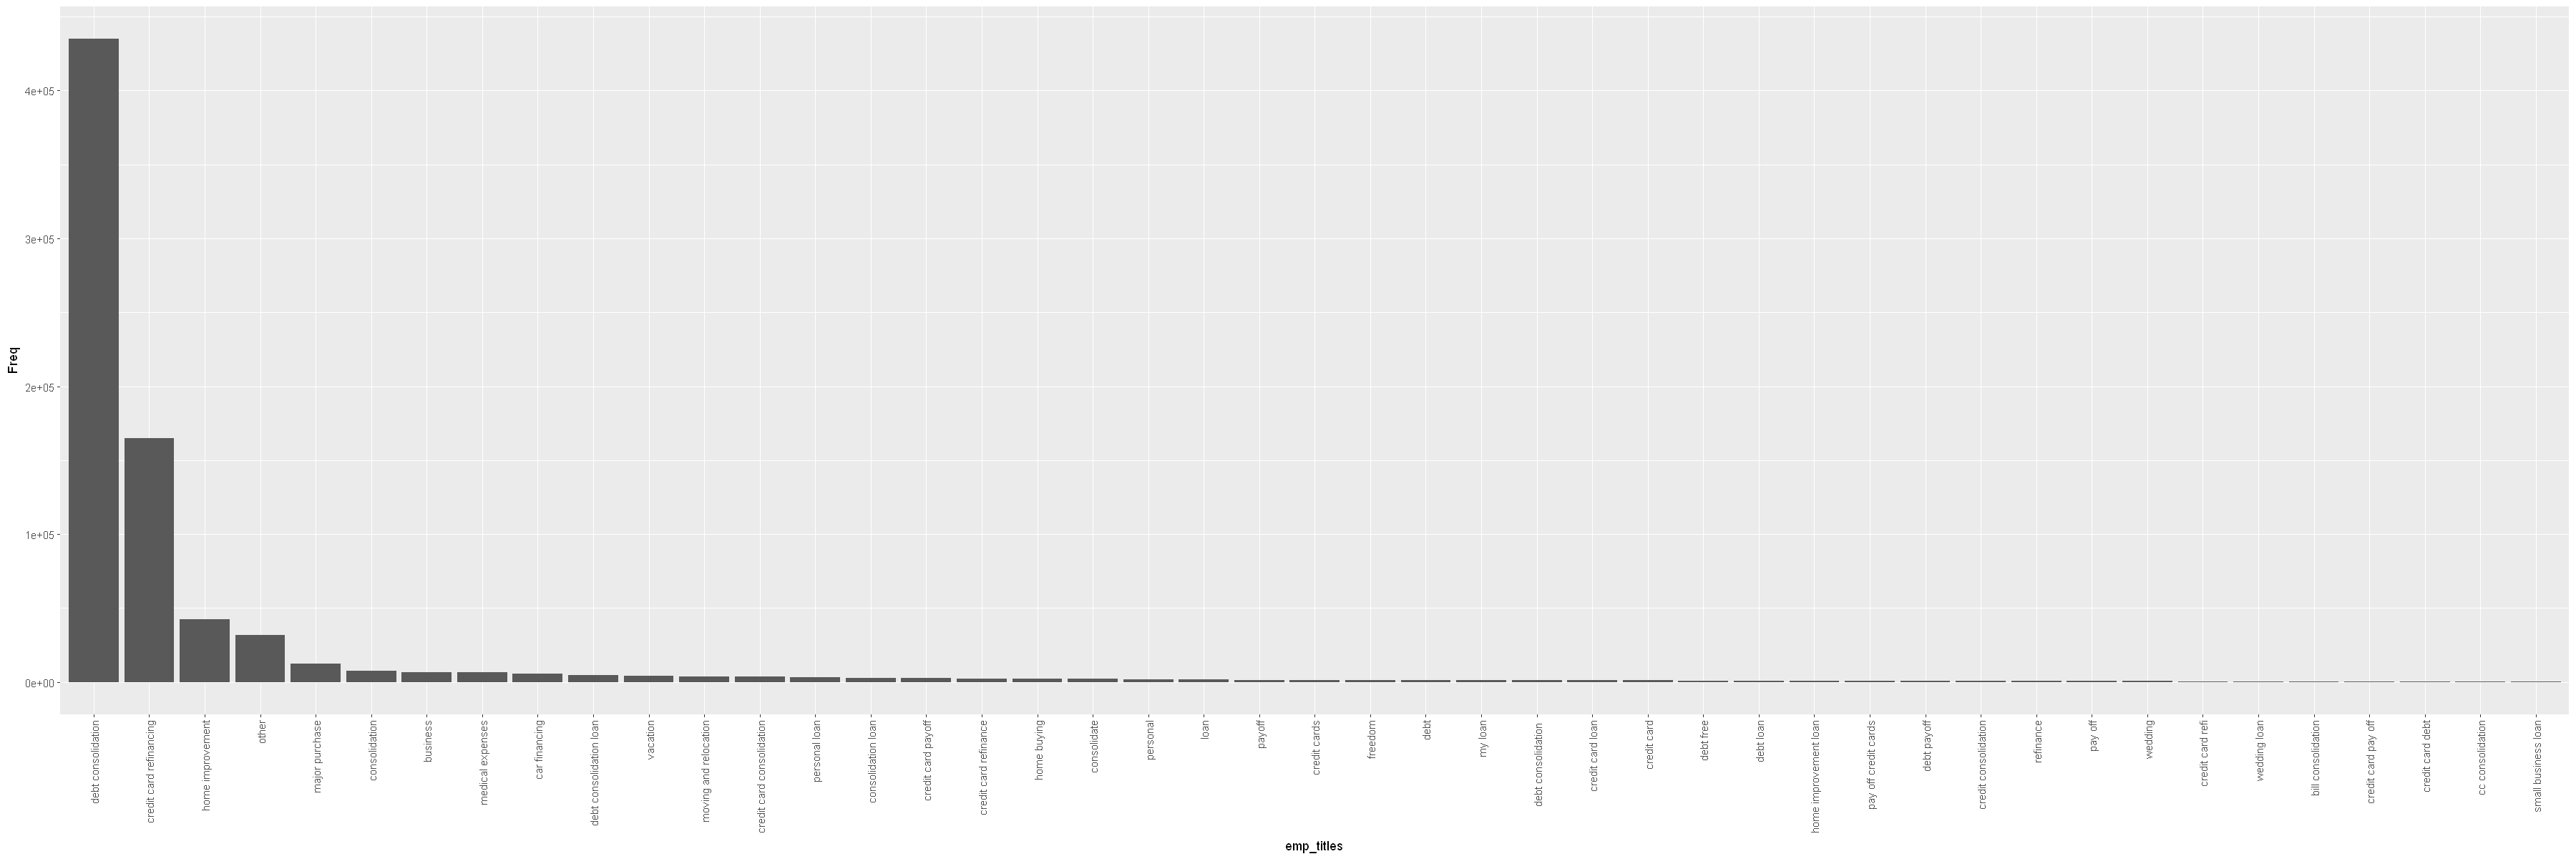

In [217]:
# bar plot 
title.pop = sort(table(loan$title)[which(table(loan$title)>500)], decreasing = T)
title.pop = as.data.frame(title.pop)

options(repr.plot.width=30, repr.plot.height=10)
ggplot(data = title.pop, aes(x=Var1, y=Freq)) + 
  geom_bar(stat="identity") + 
#    scale_y_log10() + 
    scale_x_discrete(name ="emp_titles", 
                     limits=title.pop$Var1)+
  theme(axis.text.x = element_text(angle=90, hjust=1, vjust=.5),
        legend.position = "none")

In [ ]:
# possible group

### 47. term
term : The number of payments on the loan. Values are in months and can be either 36 or 60.

In [218]:
sum(is.na(loan$term))/dim(loan)[1]

[1] 0

In [219]:
unique(loan$term)

[1] " 36 months" " 60 months"

In [220]:
t.test(int_rate ~ term, data = loan, na.action = na.omit) # significant


	Welch Two Sample t-test

data:  int_rate by term
t = -431.12, df = 467040, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.111525 -4.074310
sample estimates:
mean in group  36 months mean in group  60 months 
                12.01868                 16.11160 


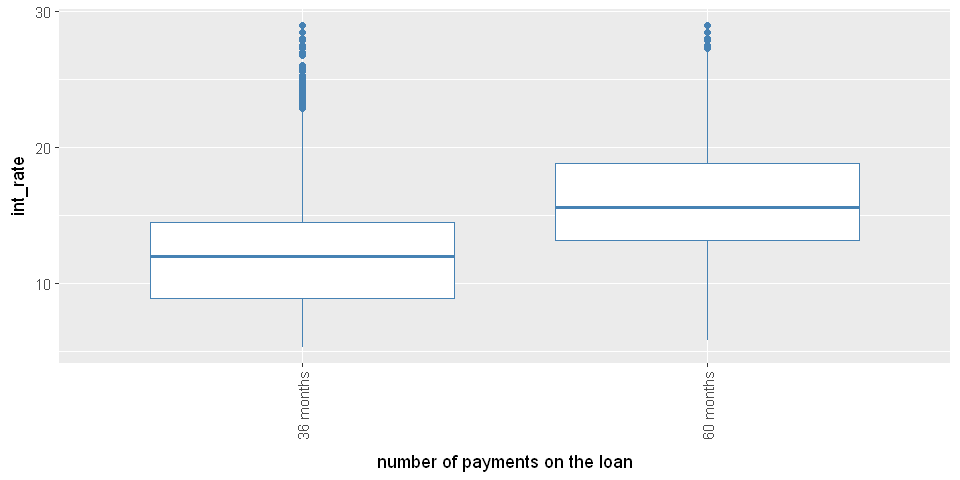

In [221]:
options(repr.plot.width=8, repr.plot.height=4)
ggplot(loan, aes(x=factor(term), y=int_rate)) + 
geom_boxplot(color='steelblue') + labs(x='number of payments on the loan') + 
theme(axis.text.x = element_text(angle=90, hjust=1, vjust=.5),
        legend.position = "none")

### 48. issue_d
issue_d : The month which the loan was funded

In [222]:
sum(is.na(loan$issue_d))/dim(loan)[1]

[1] 0

In [223]:
length(unique(loan$issue_d))

[1] 103

In [224]:
loan$issue_d_date = as.Date(as.yearmon(loan$issue_d, "%b-%Y"))

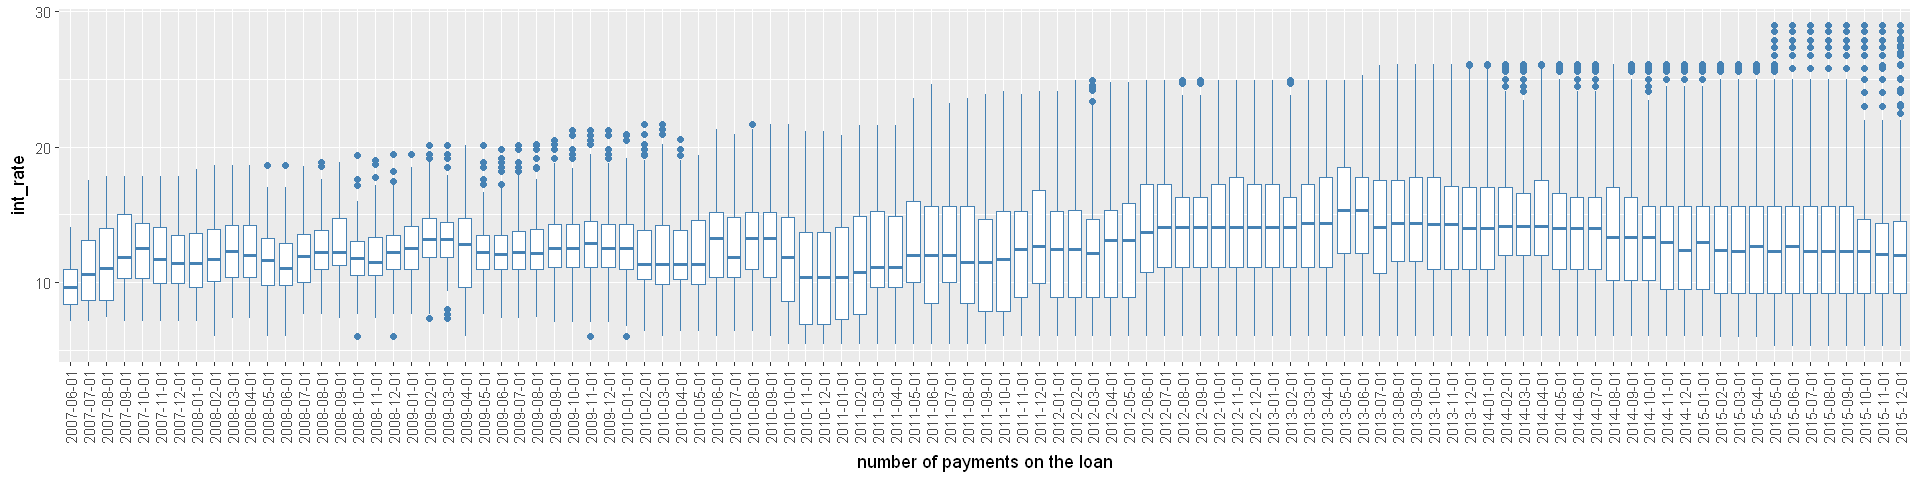

In [225]:
options(repr.plot.width=16, repr.plot.height=4)
ggplot(loan, aes(x=factor(issue_d_date), y=int_rate)) + 
geom_boxplot(color='steelblue') + labs(x='number of payments on the loan') + 
theme(axis.text.x = element_text(angle=90, hjust=1, vjust=.5),
        legend.position = "none")

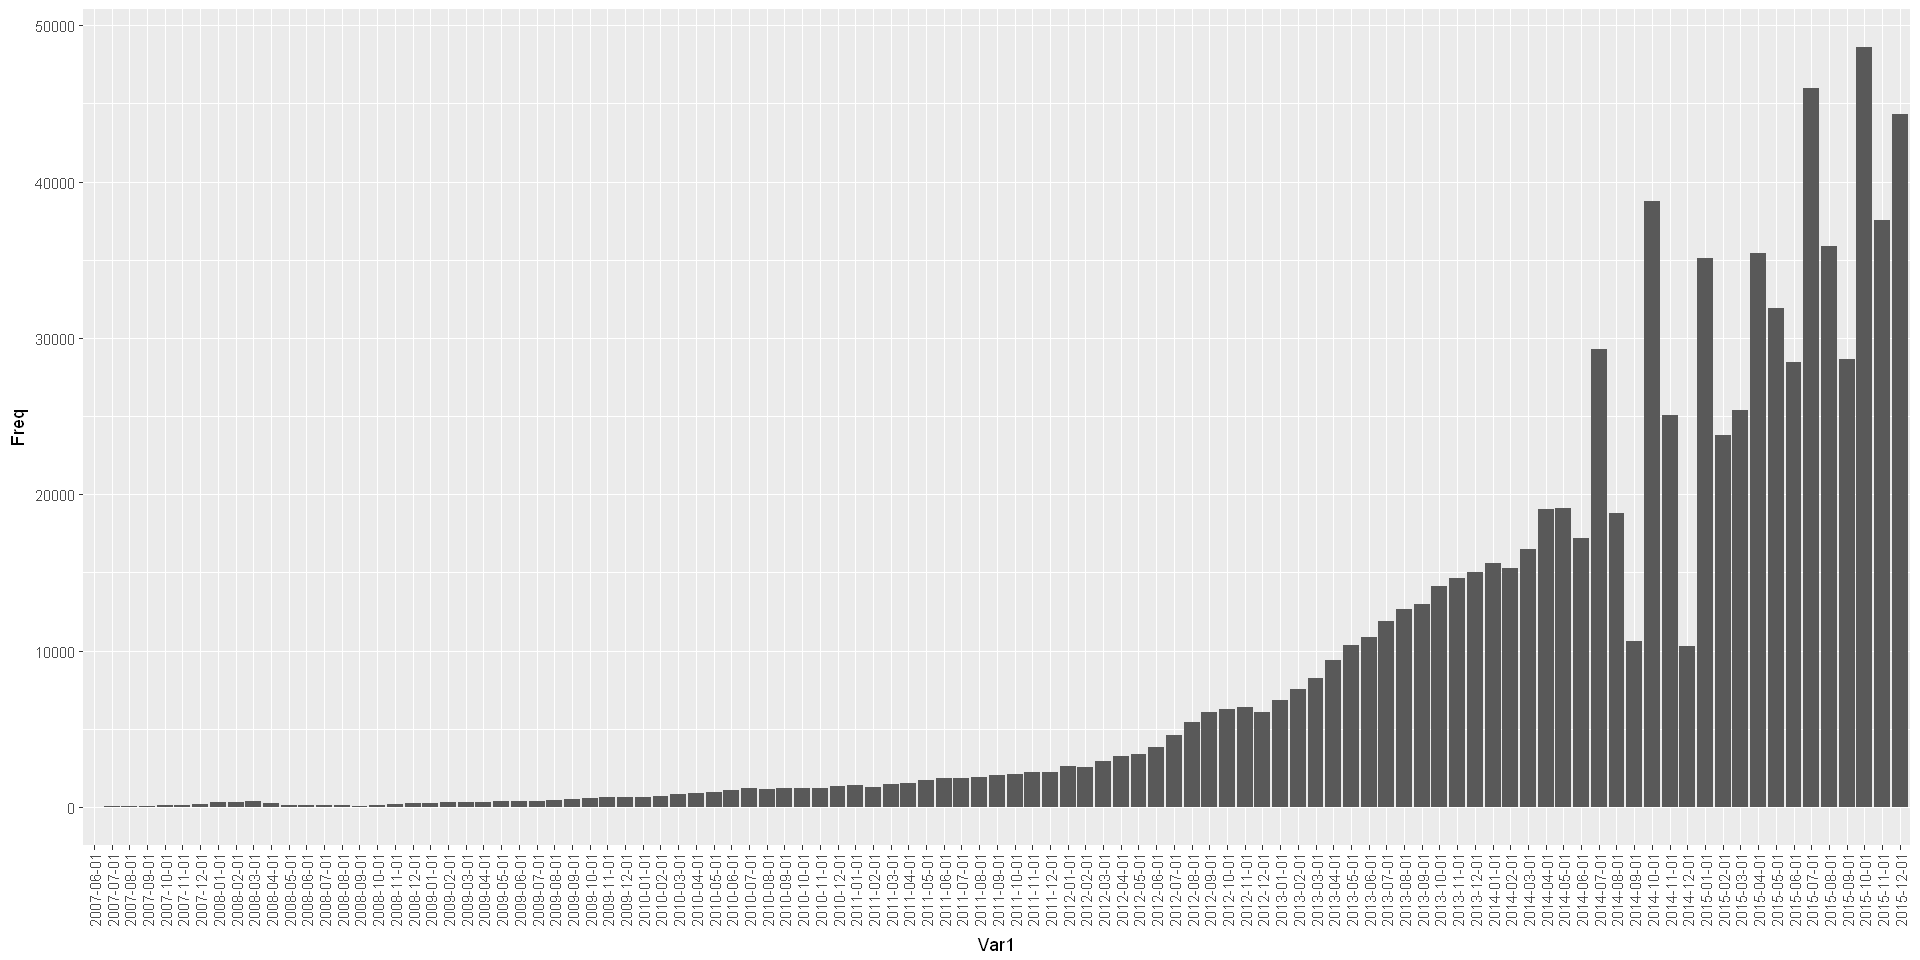

In [226]:
options(repr.plot.width=16, repr.plot.height=8)
ggplot(as.data.frame(table(loan$issue_d_date)), aes(x=Var1, y=Freq)) + 
geom_bar(stat="identity") + 
theme(axis.text.x = element_text(angle=90, hjust=1, vjust=.5),
        legend.position = "none")

### 49. initial_list_status
initial_list_status : The initial listing status of the loan. Possible values are – W, F

In [227]:
sum(is.na(loan$initial_list_status))/dim(loan)[1]

[1] 0

In [228]:
unique(loan$initial_list_status)

[1] "f" "w"

In [229]:
table(loan$initial_list_status)


     f      w 
456848 430531 

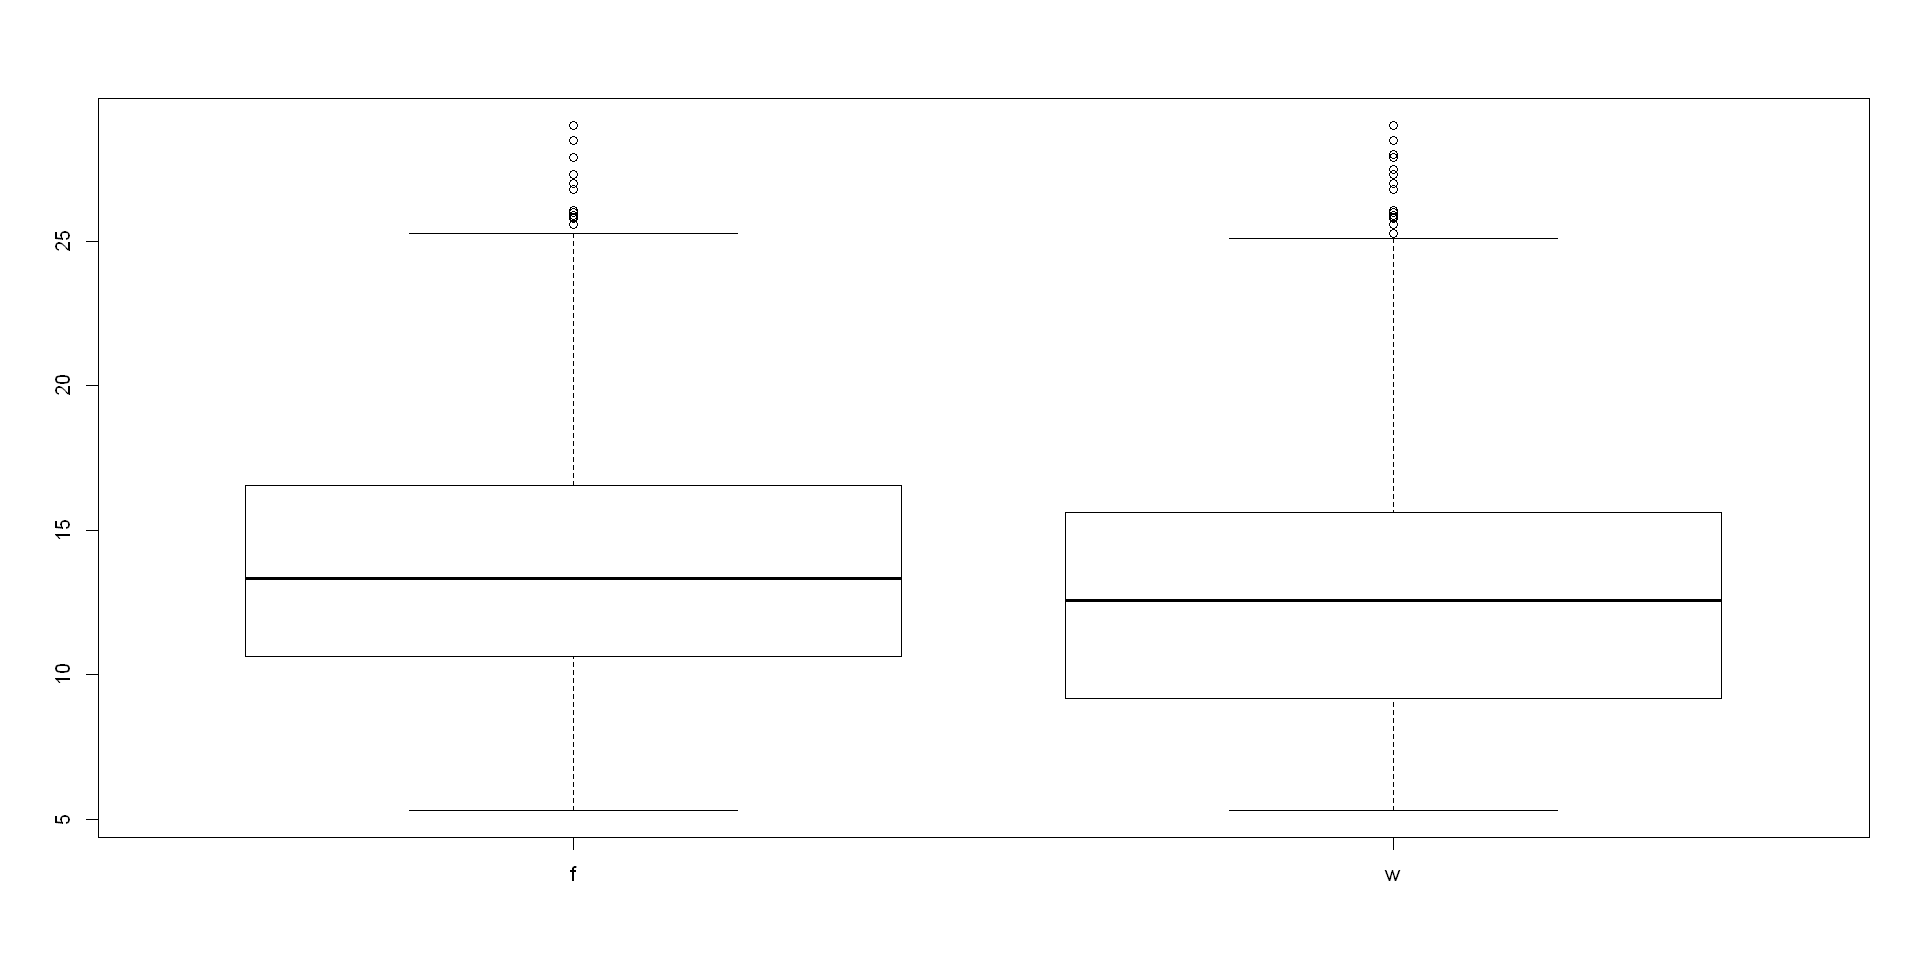

In [230]:
boxplot(loan$int_rate ~loan$initial_list_status)

In [231]:
t.test(int_rate ~ initial_list_status, data = loan, na.action = na.omit) # significant


	Welch Two Sample t-test

data:  int_rate by initial_list_status
t = 109.03, df = 885520, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.9895826 1.0258105
sample estimates:
mean in group f mean in group w 
       13.73565        12.72795 


### 50. loan_amnt
loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

In [232]:
sum(is.na(loan$loan_amnt))/dim(loan)[1]

[1] 0

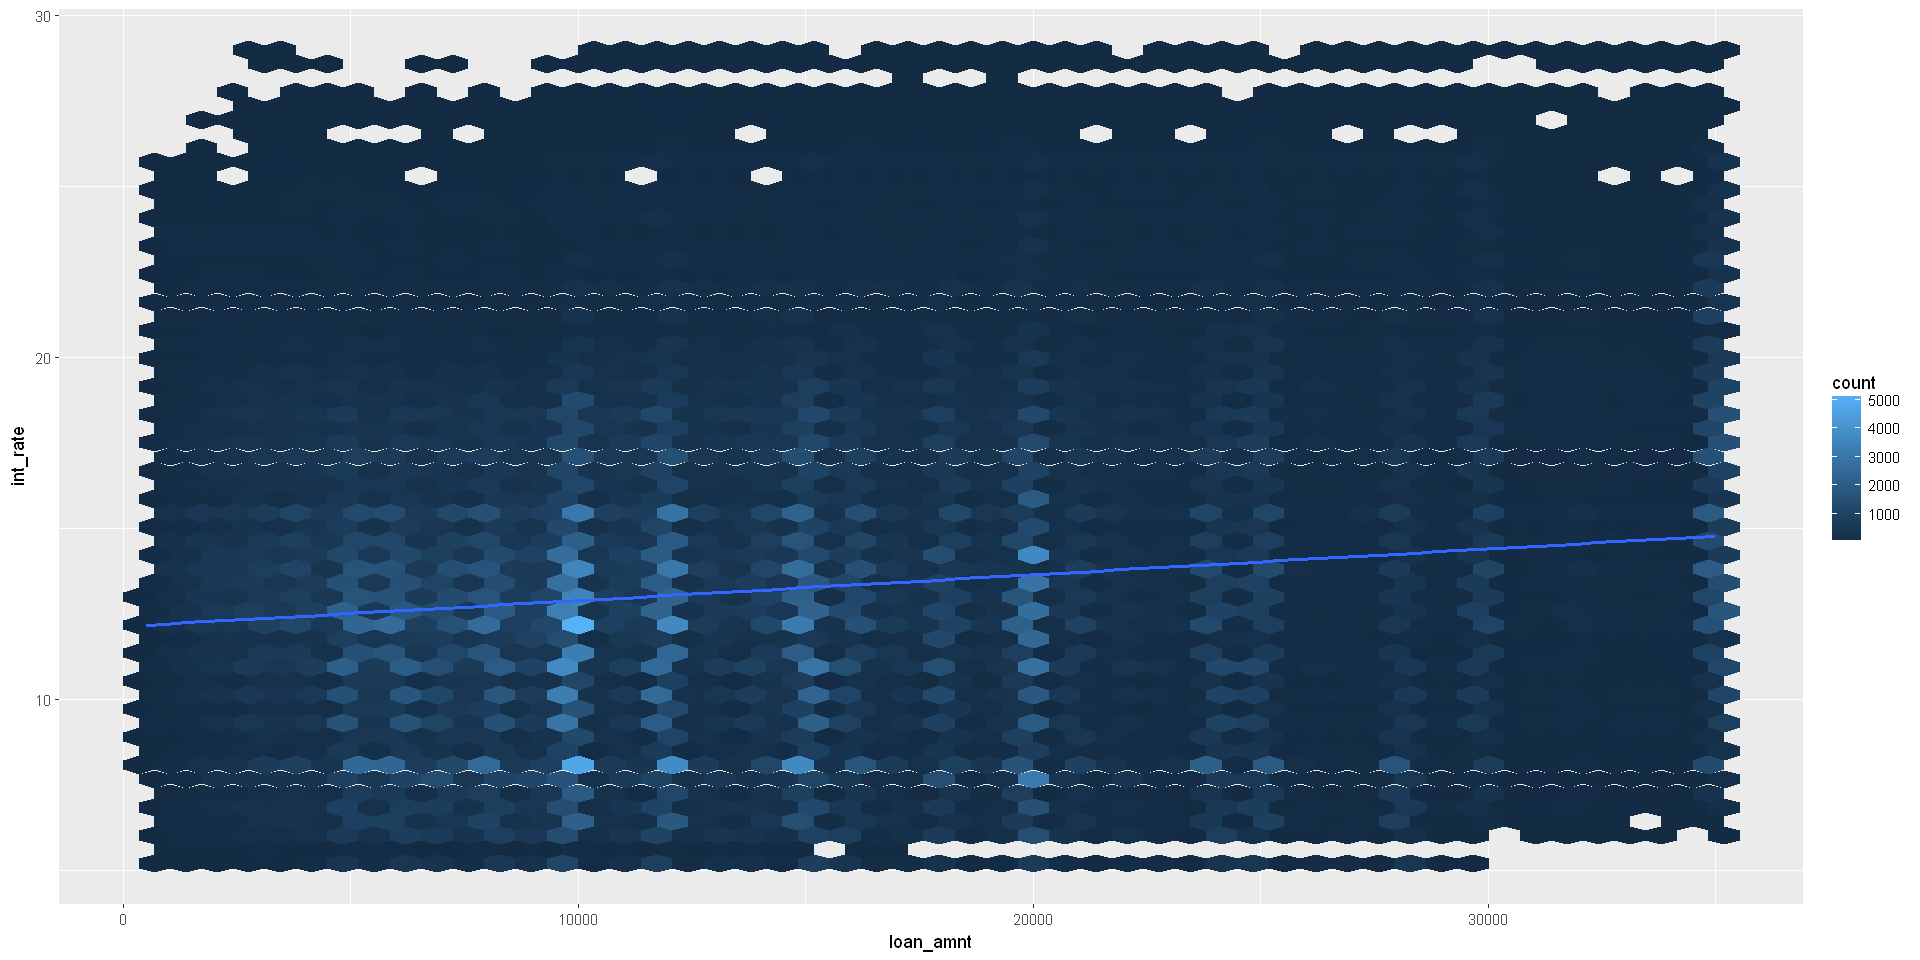

In [233]:
options(repr.plot.width=16, repr.plot.height=8)
ggplot(loan, aes(x= loan_amnt, y=int_rate)) + geom_hex(bins=50) + stat_smooth(method=lm)

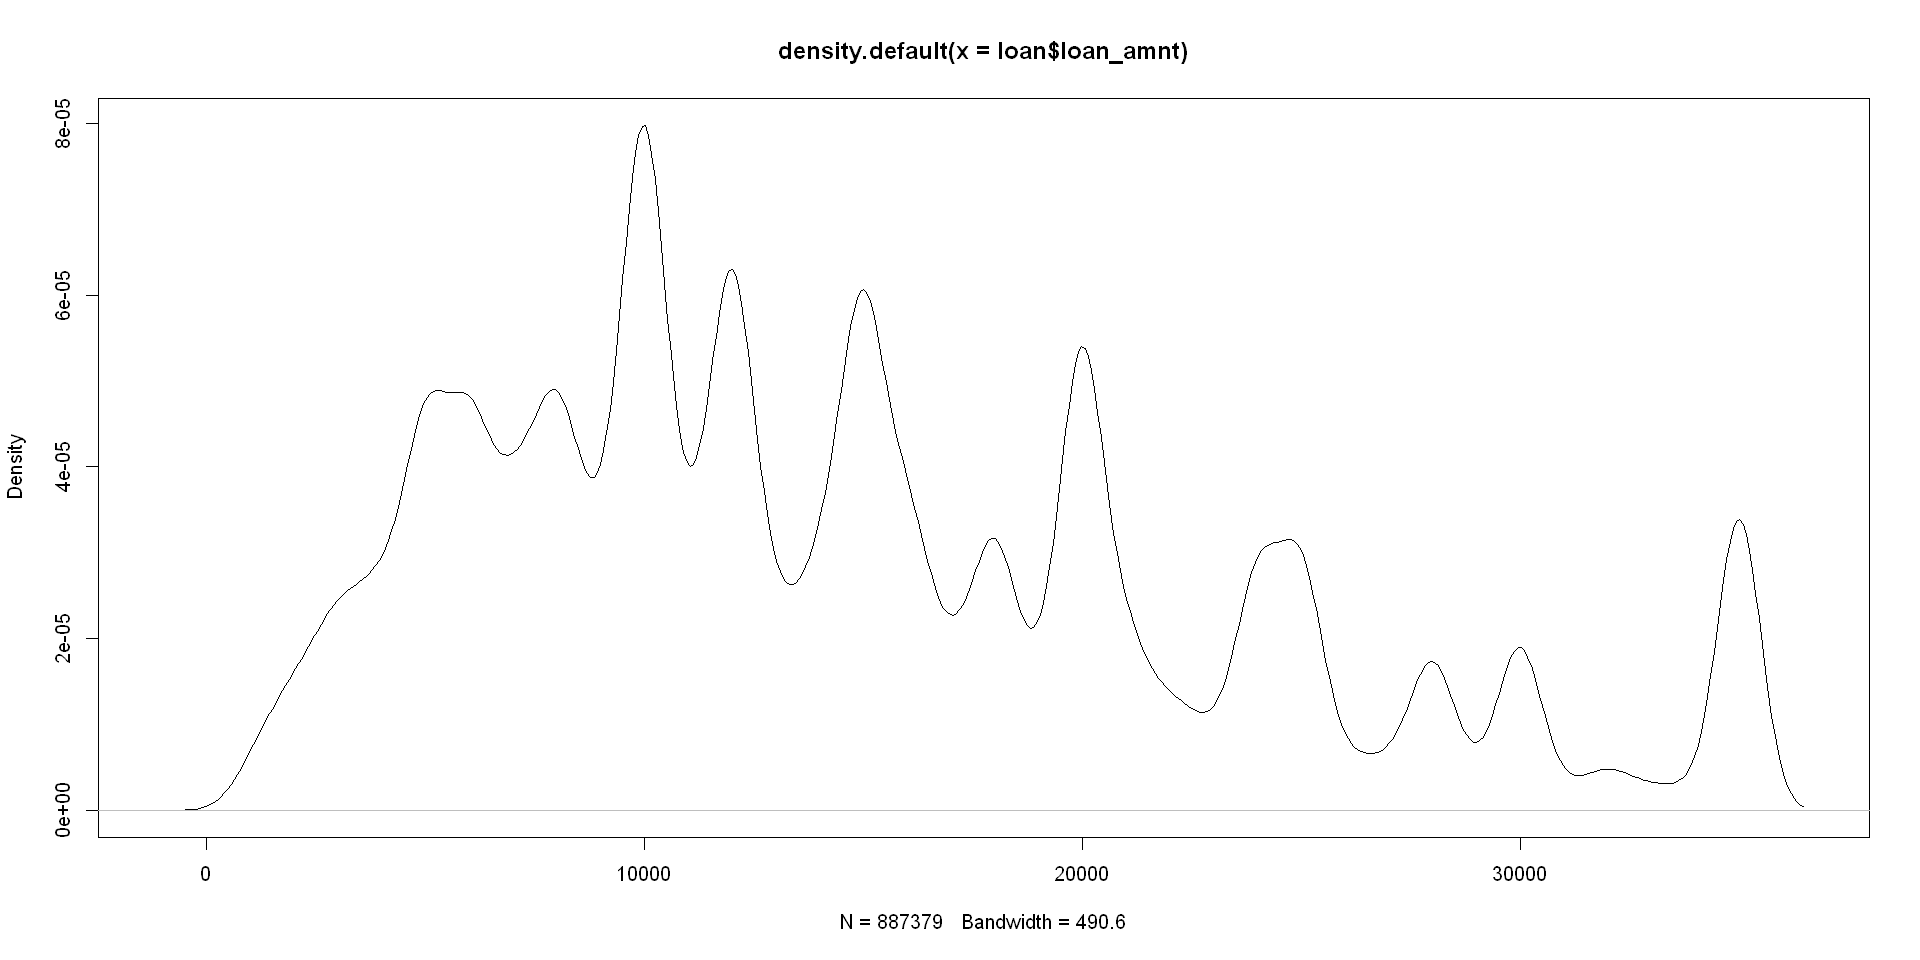

In [236]:
plot(density(loan$loan_amnt))

### 51. installment
installment : The monthly payment owed by the borrower if the loan originates.

In [238]:
sum(is.na(loan$installment))/dim(loan)[1]

[1] 0

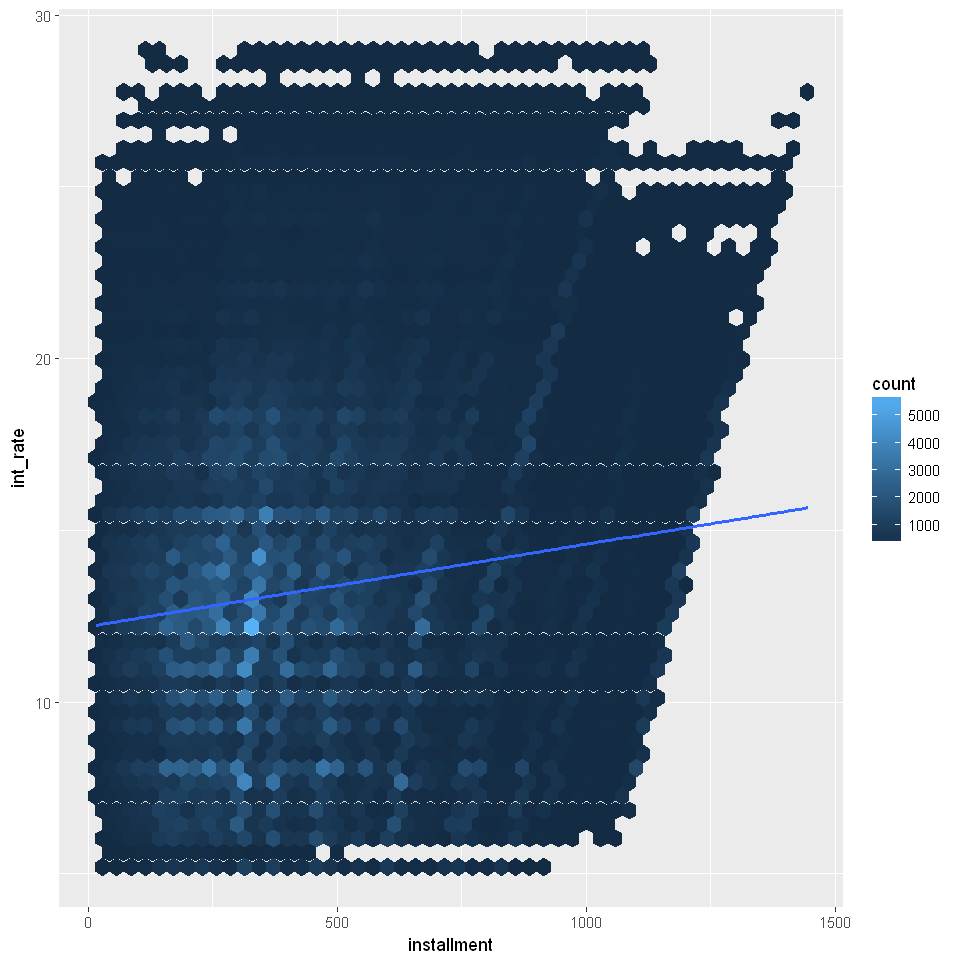

In [239]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(loan, aes(x= installment, y=int_rate)) + geom_hex(bins=50) + stat_smooth(method=lm)

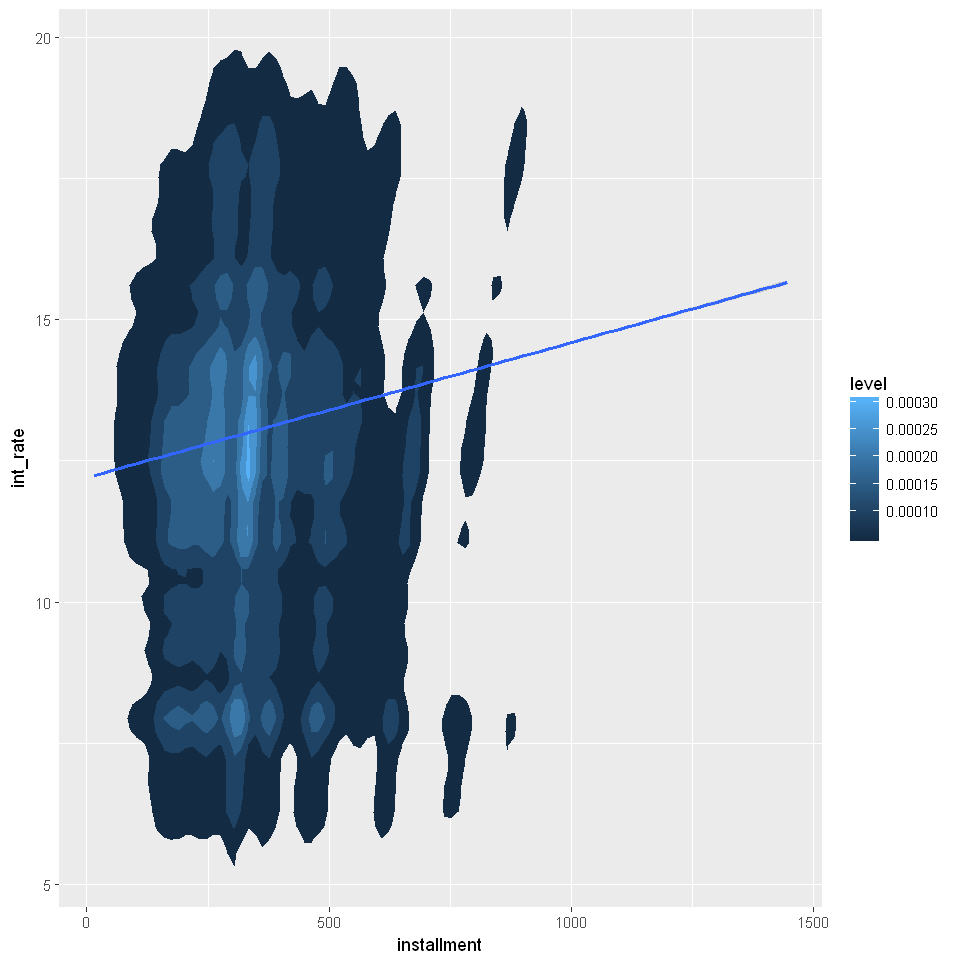

In [240]:
ggplot(loan, aes(x= installment, y=int_rate)) + 
stat_density_2d(aes(fill = ..level..), geom = "polygon") + 
stat_smooth(method=lm)

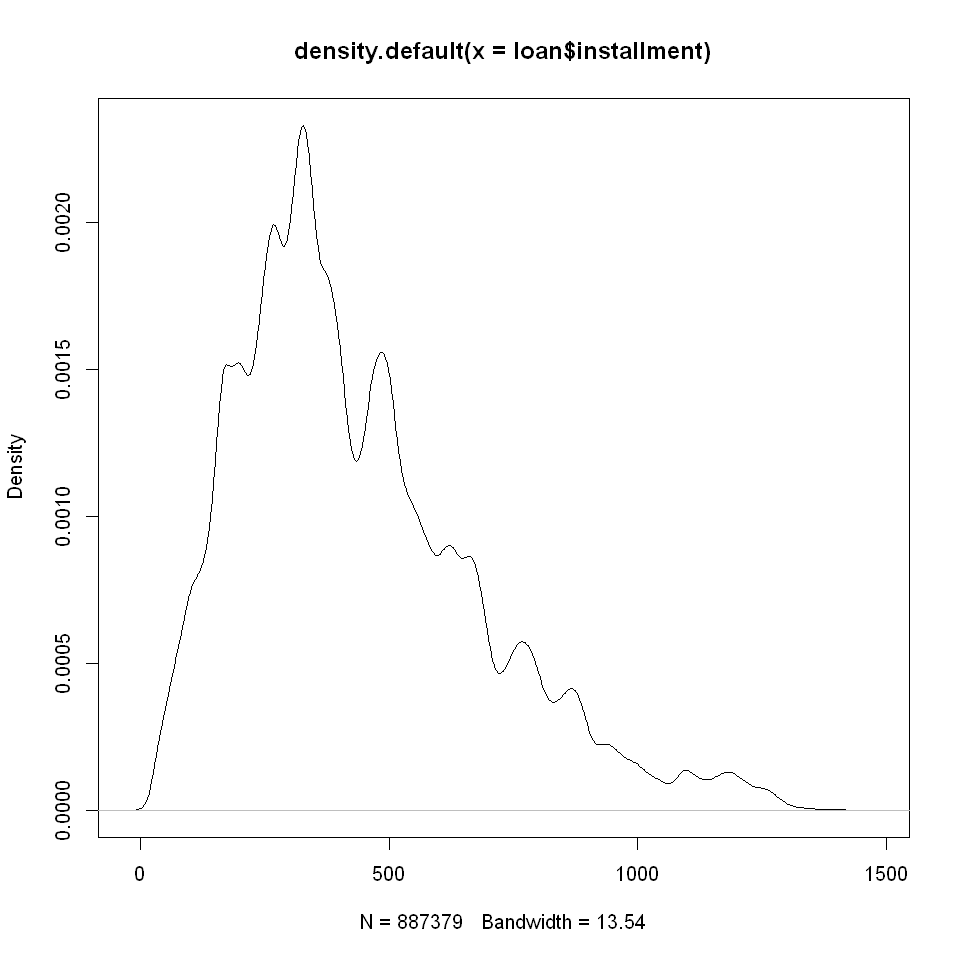

In [241]:
plot(density(loan$installment))

### 52. funded_amnt
funded_amnt : The total amount committed to that loan at that point in time.

In [242]:
sum(is.na(loan$funded_amnt))/dim(loan)[1]

[1] 0

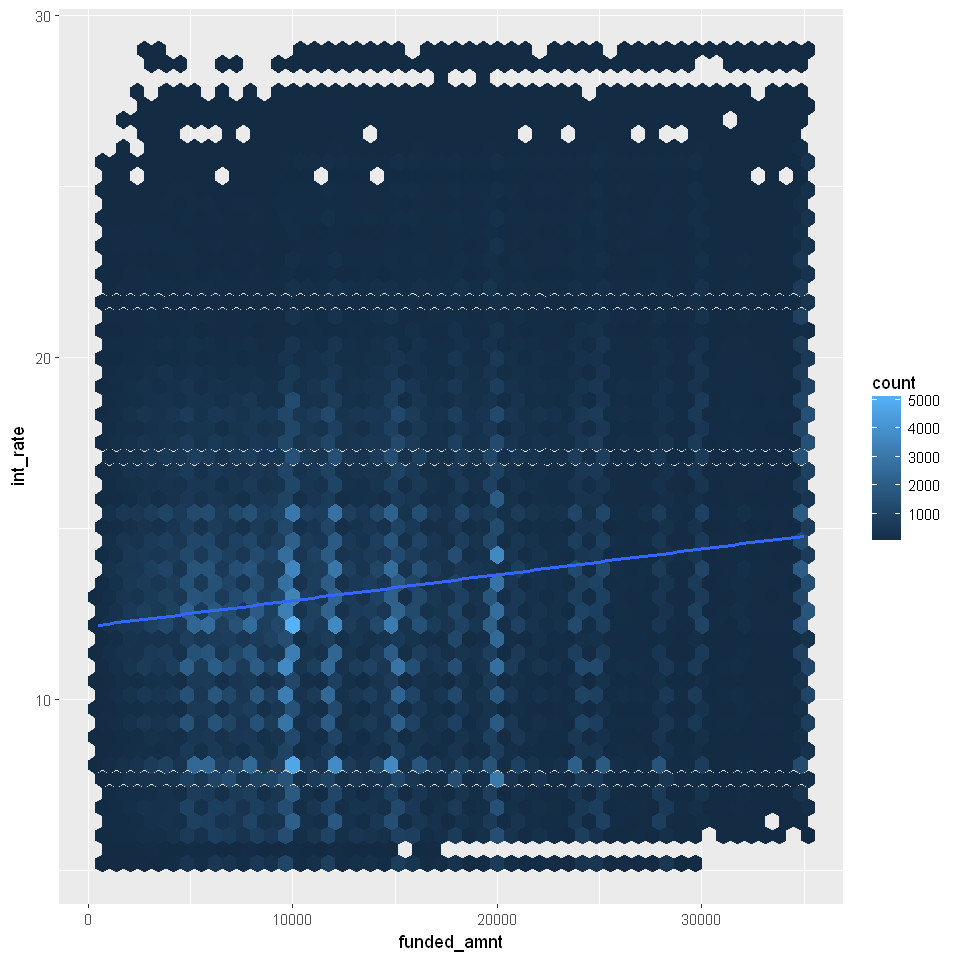

In [243]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(loan, aes(x= funded_amnt, y=int_rate)) + geom_hex(bins=50) + stat_smooth(method=lm)

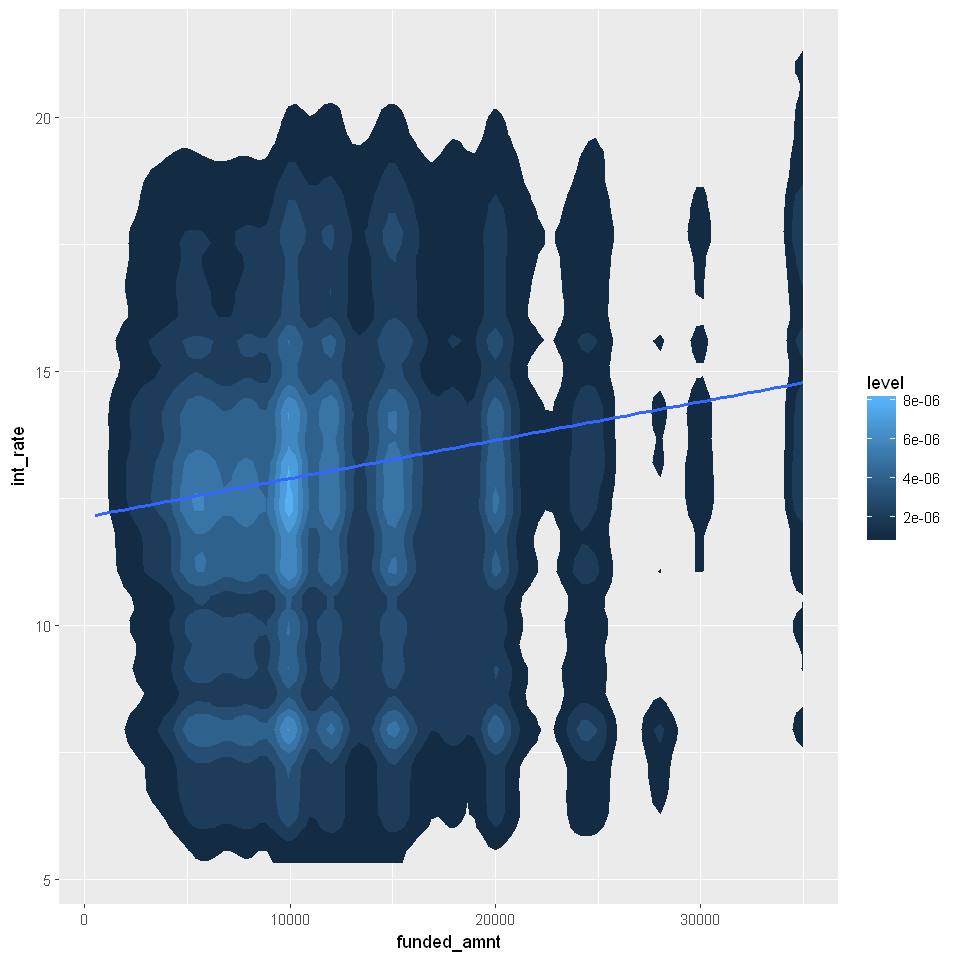

In [244]:
ggplot(loan, aes(x= funded_amnt, y=int_rate)) + 
stat_density_2d(aes(fill = ..level..), geom = "polygon") + 
stat_smooth(method=lm)

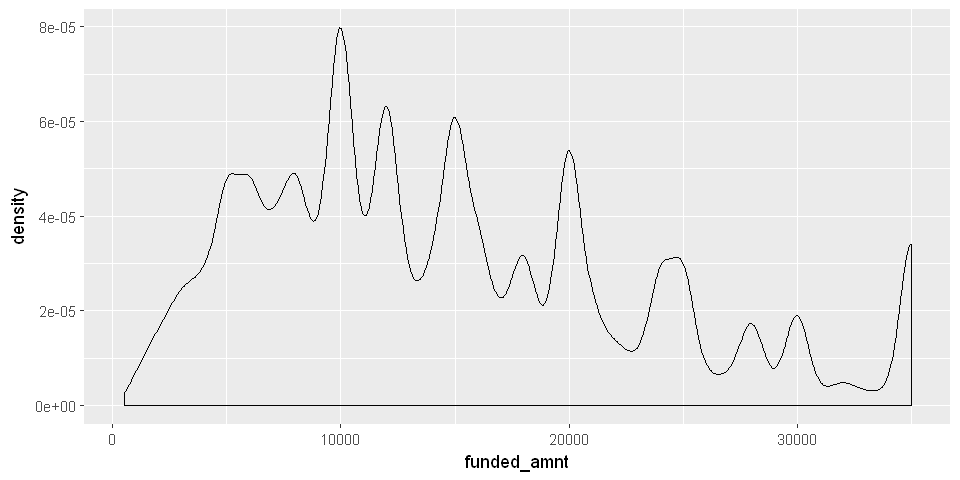

In [245]:
options(repr.plot.width=8, repr.plot.height=4)
ggplot(loan, aes(x=funded_amnt, y= ..density..)) + 
geom_density()

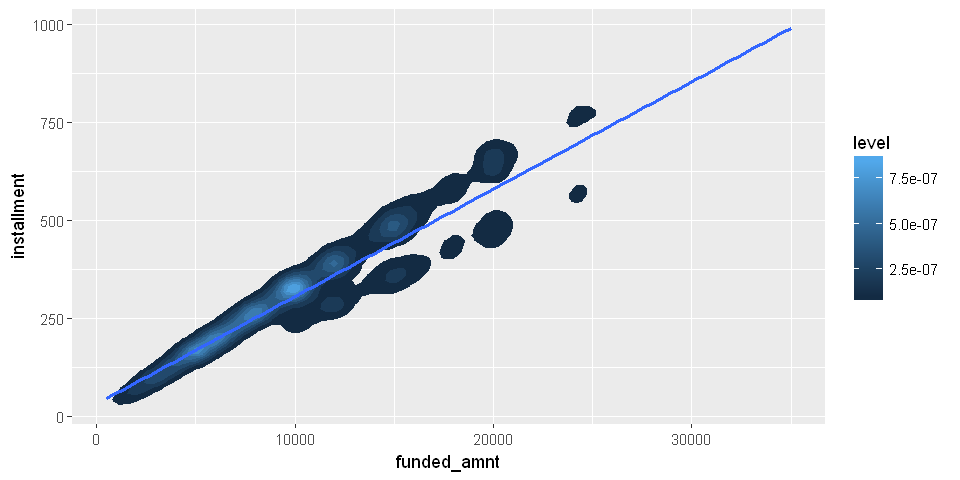

In [246]:
ggplot(loan, aes(x= funded_amnt, y=installment)) + 
stat_density_2d(aes(fill = ..level..), geom = "polygon") + 
stat_smooth(method=lm)

### 53. funded_amnt_inv
funded_amnt_inv : The total amount committed by investors for that loan at that point in time.

In [248]:
sum(is.na(loan$funded_amnt_inv))/dim(loan)[1]

[1] 0

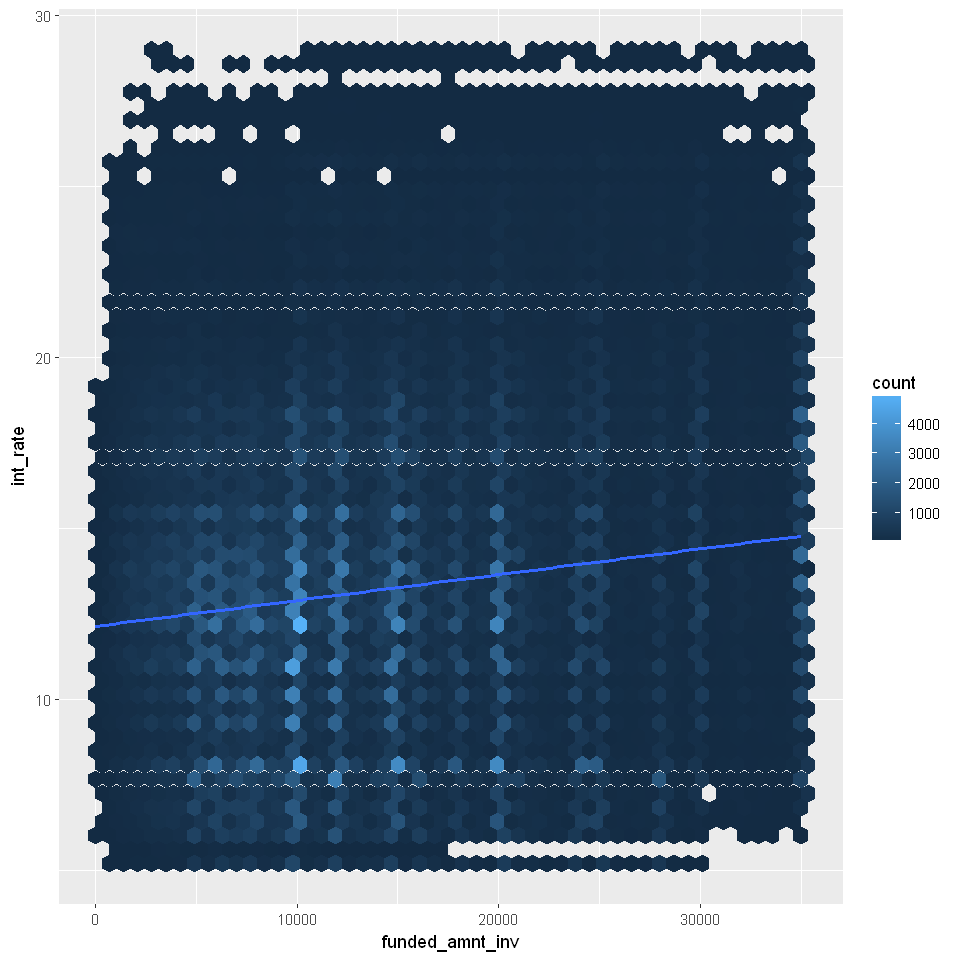

In [247]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(loan, aes(x= funded_amnt_inv, y=int_rate)) + geom_hex(bins=50) + stat_smooth(method=lm)

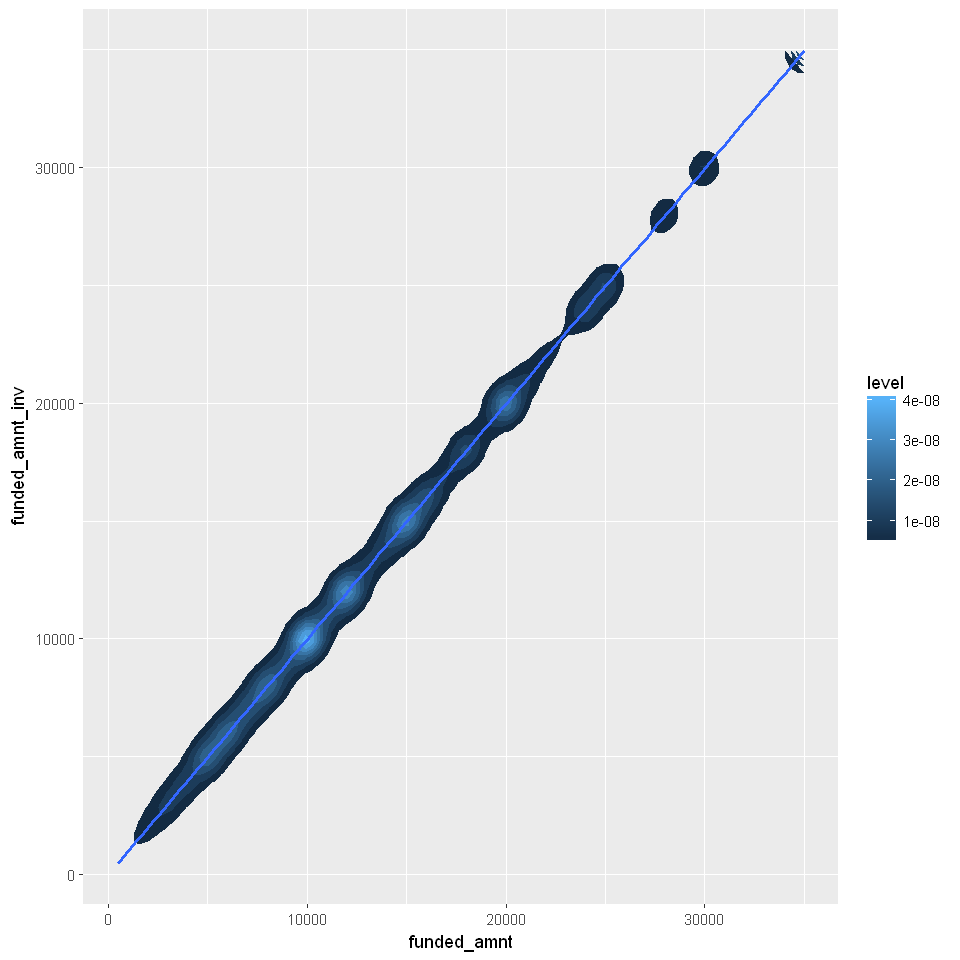

In [249]:
ggplot(loan, aes(x= funded_amnt, y=funded_amnt_inv)) + 
stat_density_2d(aes(fill = ..level..), geom = "polygon") + 
stat_smooth(method=lm)

In [250]:
# only keep one is enough
cor(loan$funded_amnt, loan$funded_amnt_inv)

[1] 0.9980251

### 54. last_pymnt_amnt

In [251]:
sum(is.na(loan$last_pymnt_amnt))/dim(loan)[1]

[1] 0

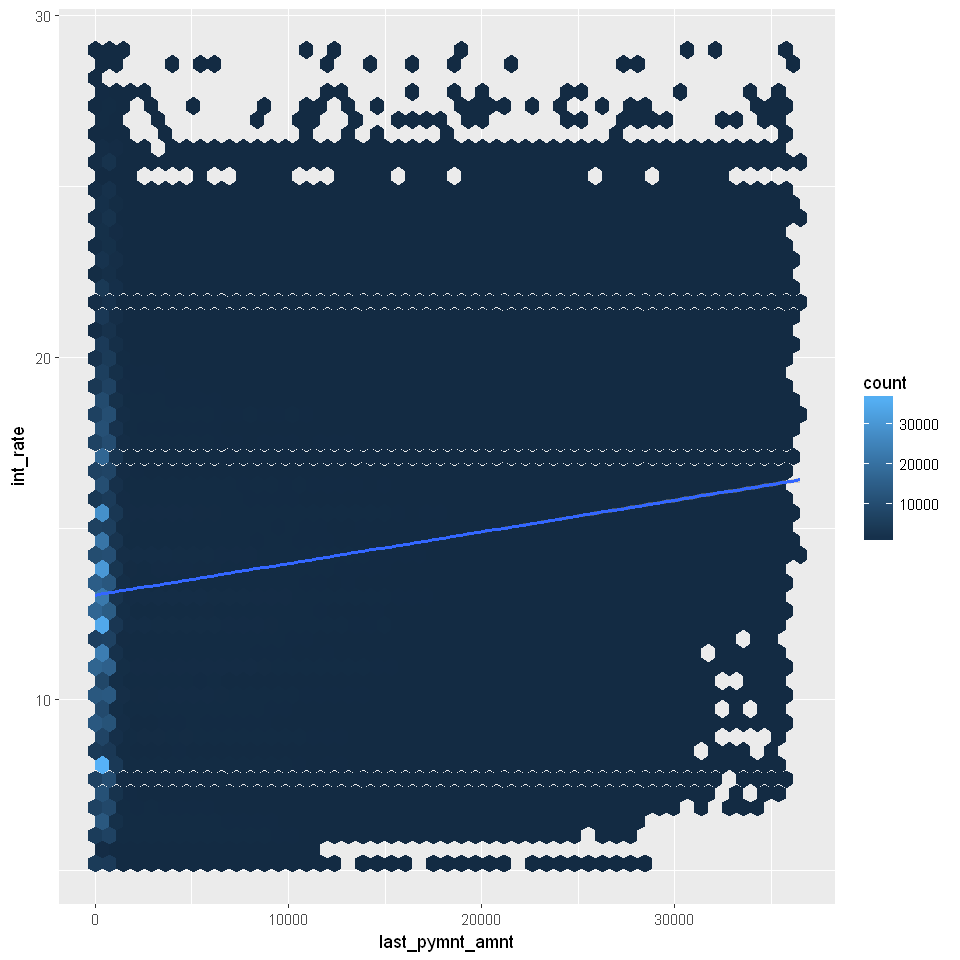

In [252]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(loan, aes(x= last_pymnt_amnt, y=int_rate)) + geom_hex(bins=50) + stat_smooth(method=lm)

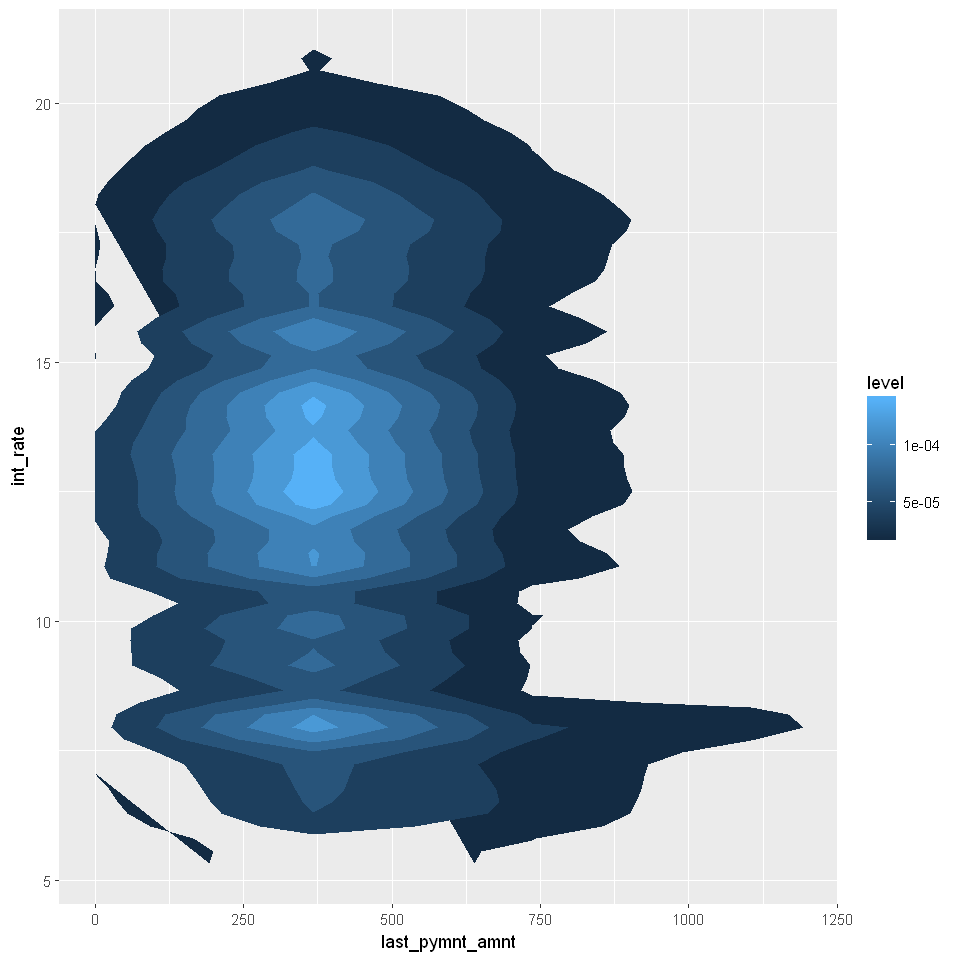

In [253]:
ggplot(loan, aes(x= last_pymnt_amnt, y=int_rate)) + 
stat_density_2d(aes(fill = ..level..), geom = "polygon") 
# stat_smooth(method=lm)

### 55. last_pymnt_d
last_pymnt_d : Last month payment was received

In [254]:
loan$last_pymnt_d_date = as.Date(as.yearmon(loan$last_pymnt_d, "%b-%Y"))

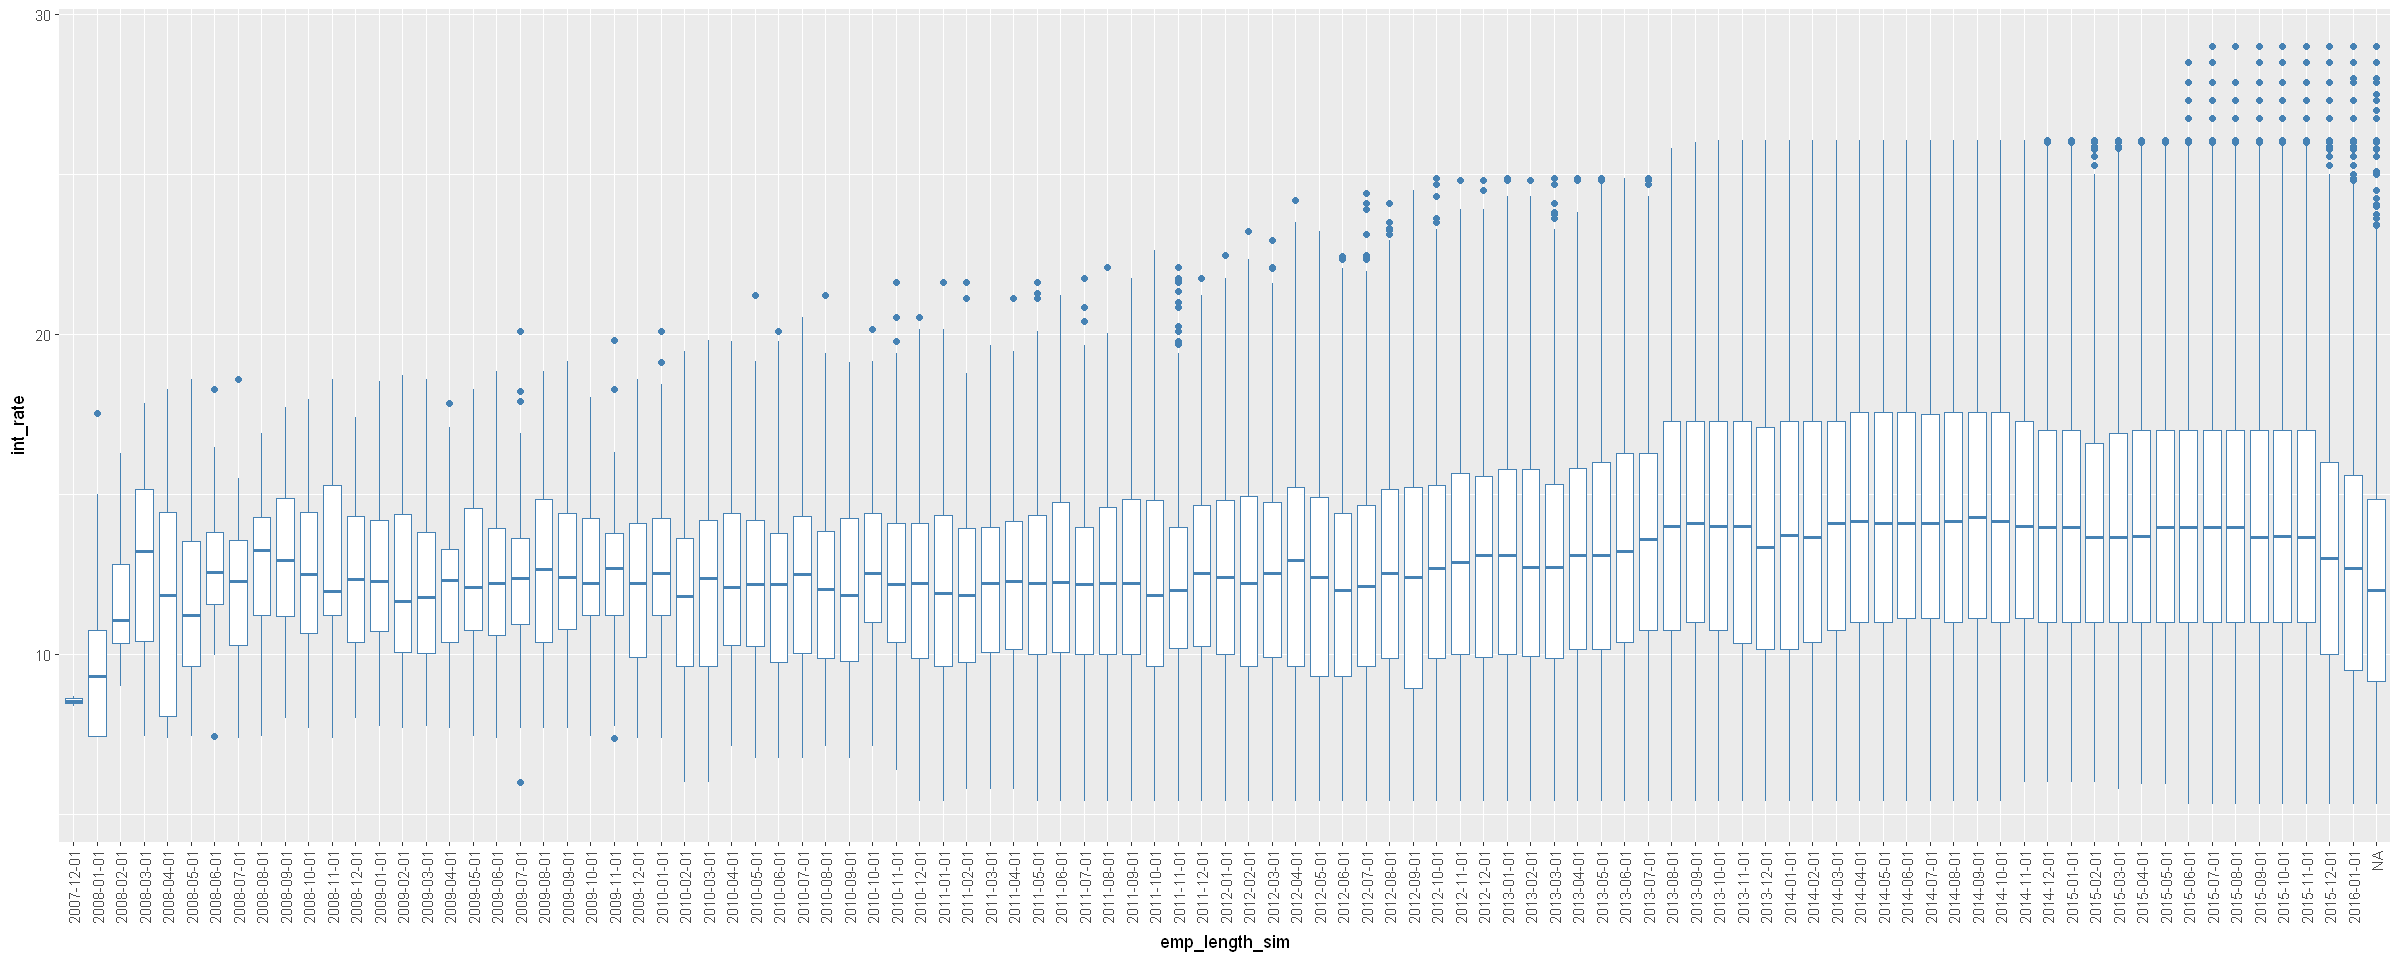

In [255]:
options(repr.plot.width=20, repr.plot.height=8)
ggplot(loan, aes(x=factor(last_pymnt_d_date), y=int_rate)) + 
geom_boxplot(color='steelblue') + labs(x='emp_length_sim') + 
theme(axis.text.x = element_text(angle=90, hjust=1, vjust=.5),
        legend.position = "none")

### 56. next_pymnt_d
next_pymnt_d : Next scheduled payment date

In [256]:
loan$next_pymnt_d_date = as.Date(as.yearmon(loan$next_pymnt_d, "%b-%Y"))

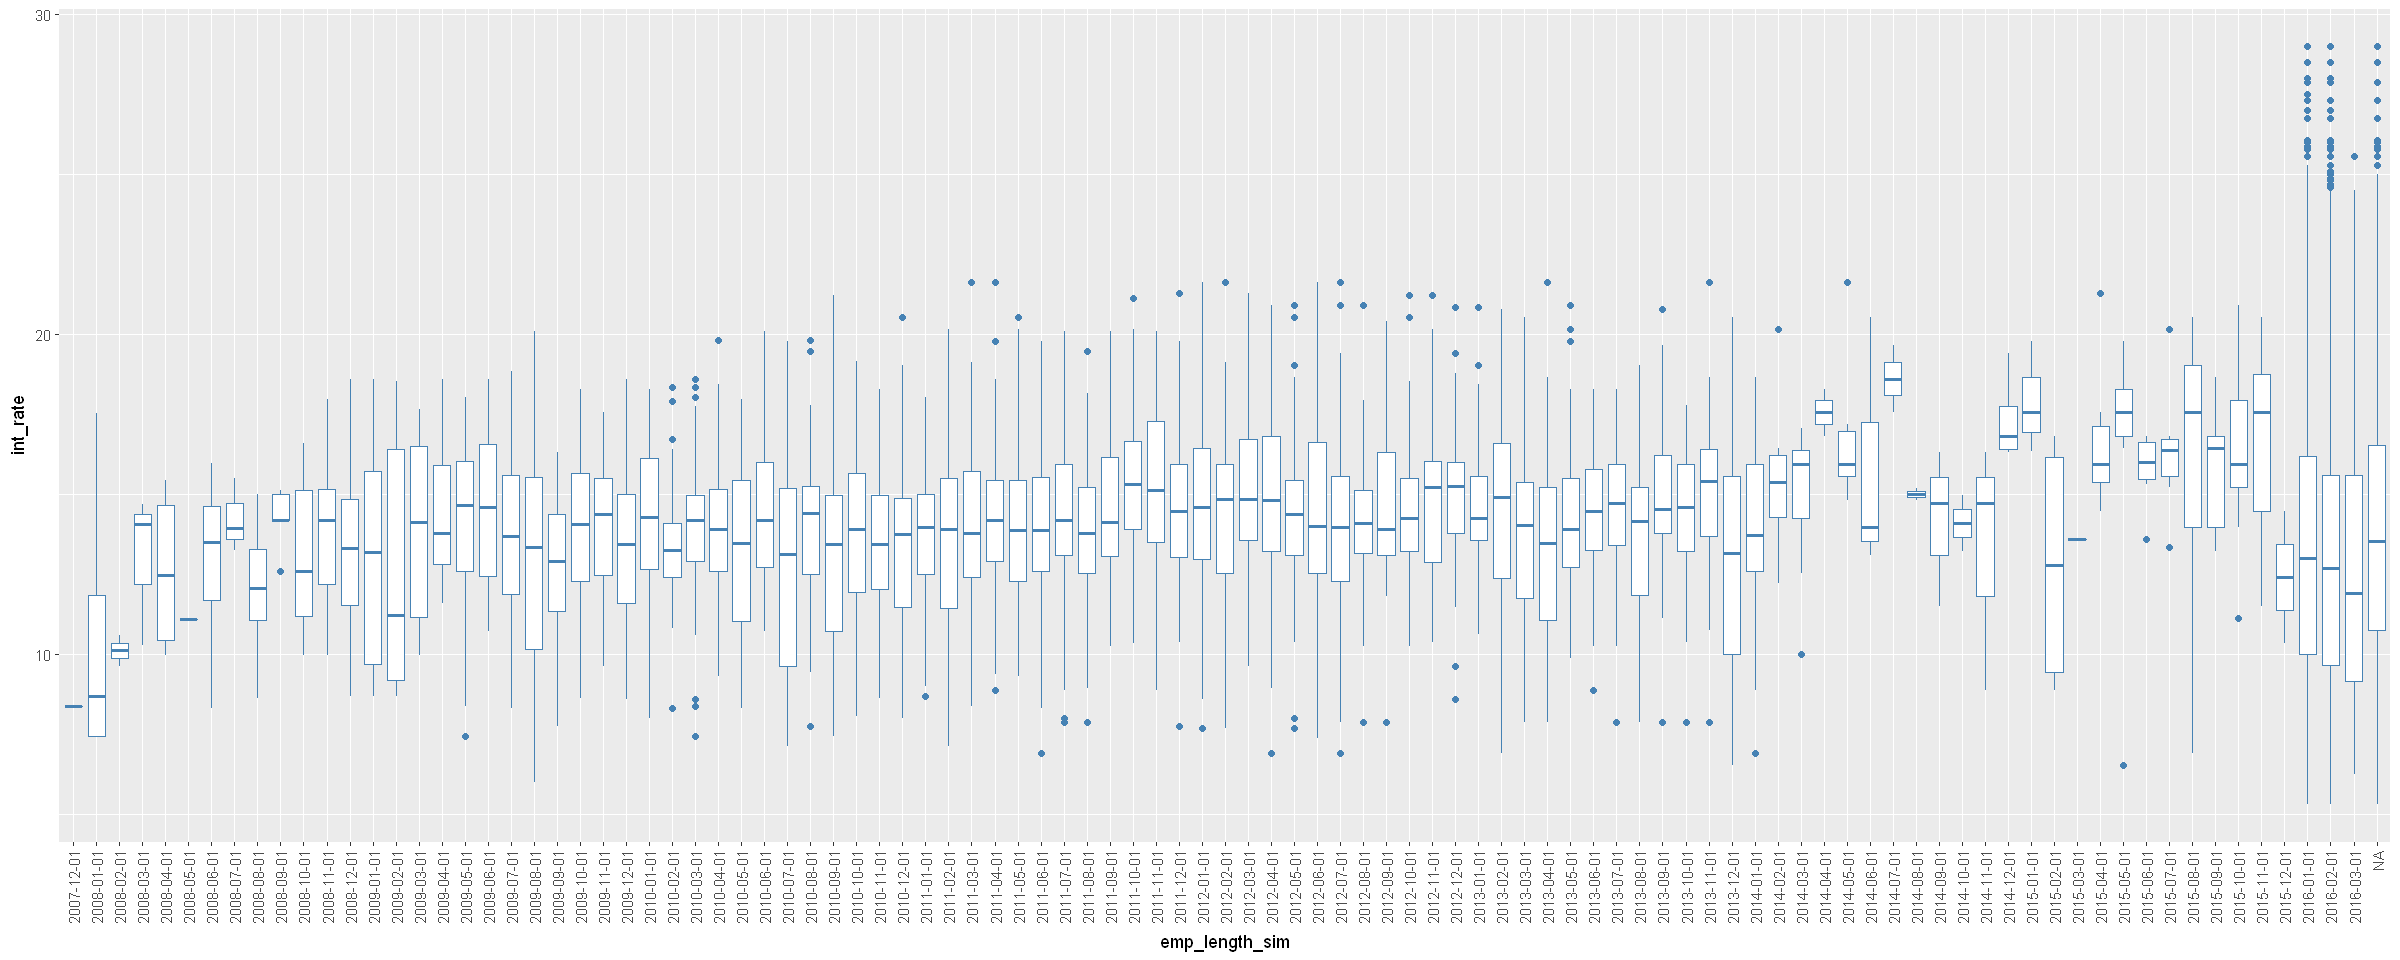

In [257]:
options(repr.plot.width=20, repr.plot.height=8)
ggplot(loan, aes(x=factor(next_pymnt_d_date), y=int_rate)) + 
geom_boxplot(color='steelblue') + labs(x='emp_length_sim') + 
theme(axis.text.x = element_text(angle=90, hjust=1, vjust=.5),
        legend.position = "none")

In [258]:
# possible feature engineering: days to next payment

### 57. pymnt_plan
pymnt_plan : Indicates if a payment plan has been put in place for the loan

In [259]:
sum(is.na(loan$pymnt_plan))/dim(loan)[1]

[1] 0

In [260]:
# basic no use
table(loan$pymnt_plan)


     n      y 
887369     10 

### 58. recoveries
recoveries : post charge off gross recovery

In [262]:
sum(is.na(loan$recoveries))/dim(loan)[1]

[1] 0

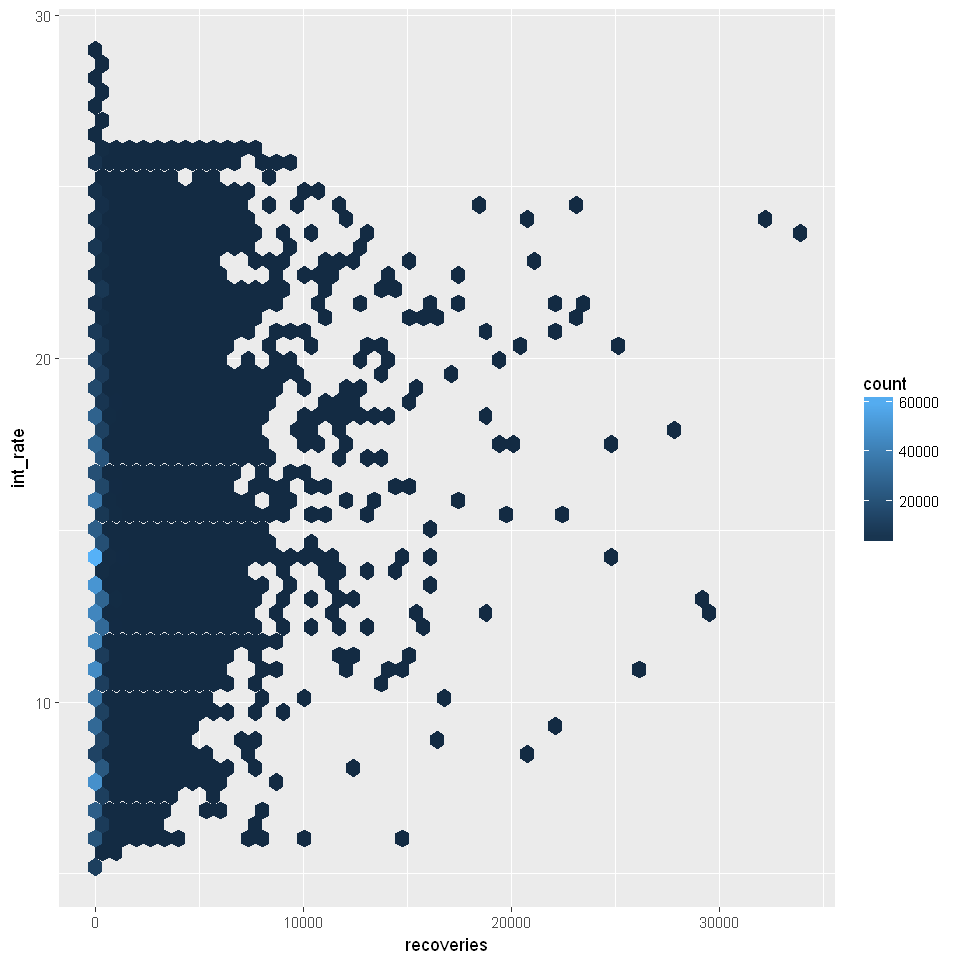

In [263]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(loan, aes(x=recoveries, y=int_rate)) + geom_hex(bins=50) #+ stat_smooth(method=lm)

### 59. total_pymnt
total_pymnt : Payments received to date for total amount funded

In [270]:
sum(is.na(loan$total_pymnt))/dim(loan)[1]

[1] 0

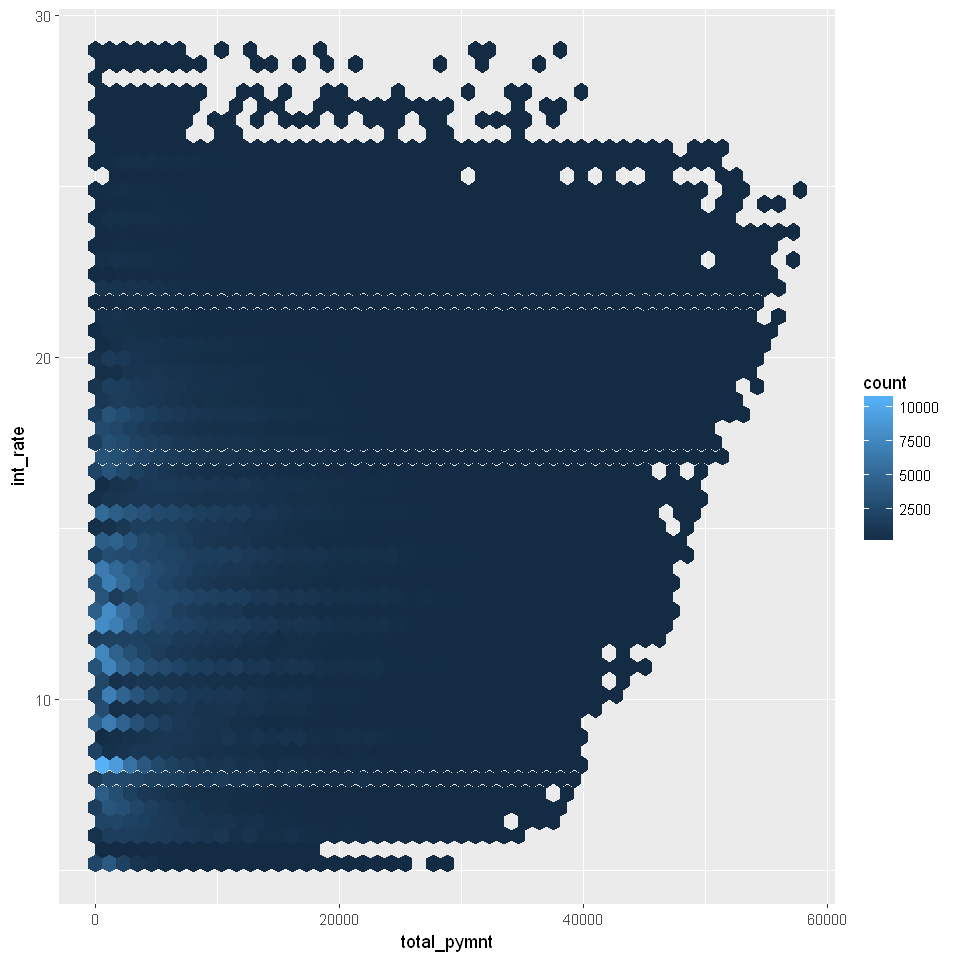

In [271]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(loan, aes(x=total_pymnt, y=int_rate)) + geom_hex(bins=50) #+ stat_smooth(method=lm)

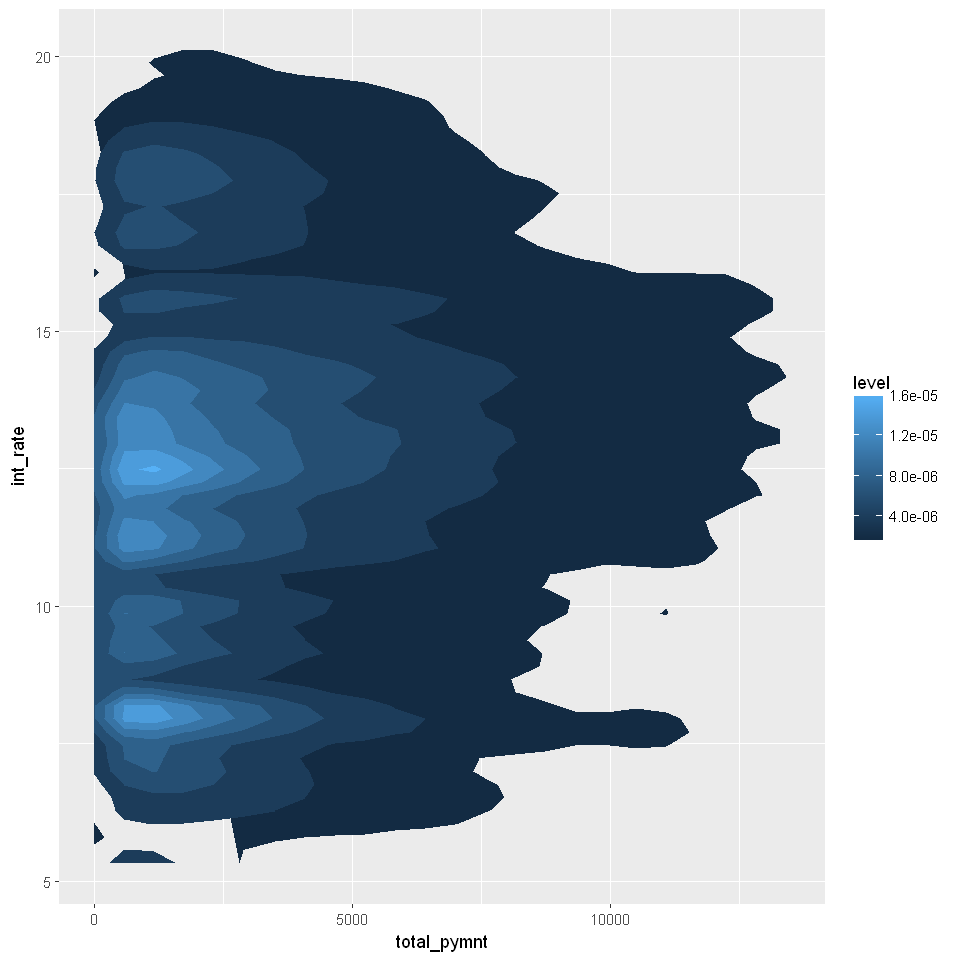

In [272]:
ggplot(loan, aes(x= total_pymnt, y=int_rate)) + 
stat_density_2d(aes(fill = ..level..), geom = "polygon")

### 60. total_pymnt_inv
total_pymnt_inv : Payments received to date for portion of total amount funded by investors

In [273]:
sum(is.na(loan$total_pymnt_inv))/dim(loan)[1]

[1] 0

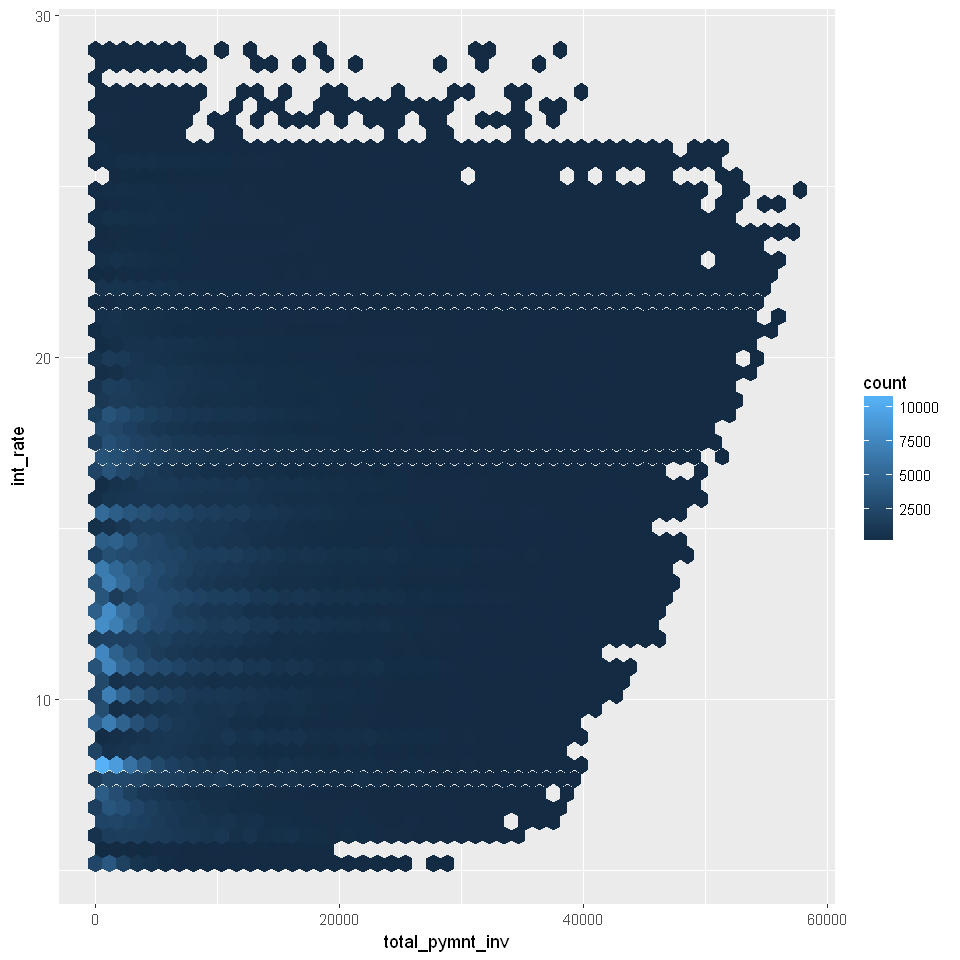

In [274]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(loan, aes(x=total_pymnt_inv, y=int_rate)) + geom_hex(bins=50) #+ stat_smooth(method=lm)

In [275]:
# only keep one is enough
cor(loan$total_pymnt, loan$total_pymnt_inv)

[1] 0.9975923

### 61. total_rec_int
total_rec_int : Interest received to date

In [277]:
sum(is.na(loan$total_rec_int))/dim(loan)[1]

[1] 0

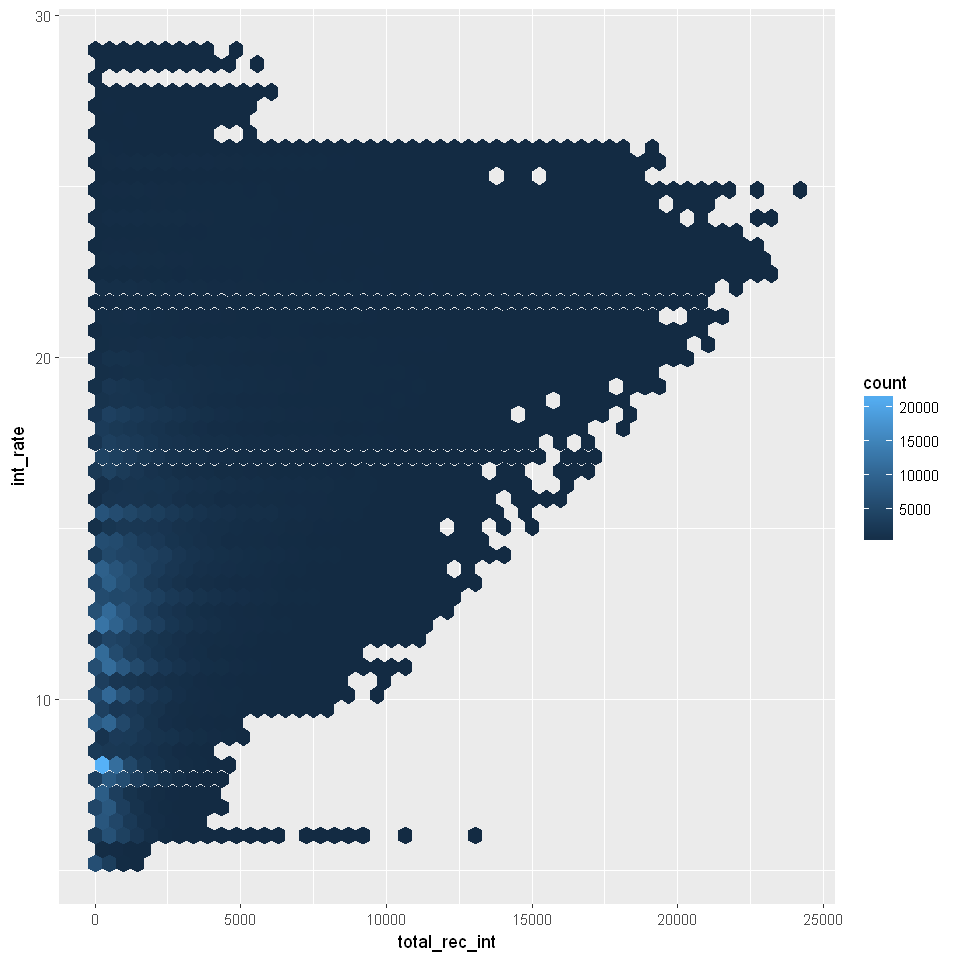

In [278]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(loan, aes(x=total_rec_int, y=int_rate)) + geom_hex(bins=50) #+ stat_smooth(method=lm)

In [279]:
cor(loan$total_rec_int, loan$int_rate)

[1] 0.4456788

### 62. total_rec_late_fee
total_rec_late_fee : Late fees received to date

In [281]:
sum(is.na(loan$total_rec_late_fee))/dim(loan)[1]

[1] 0

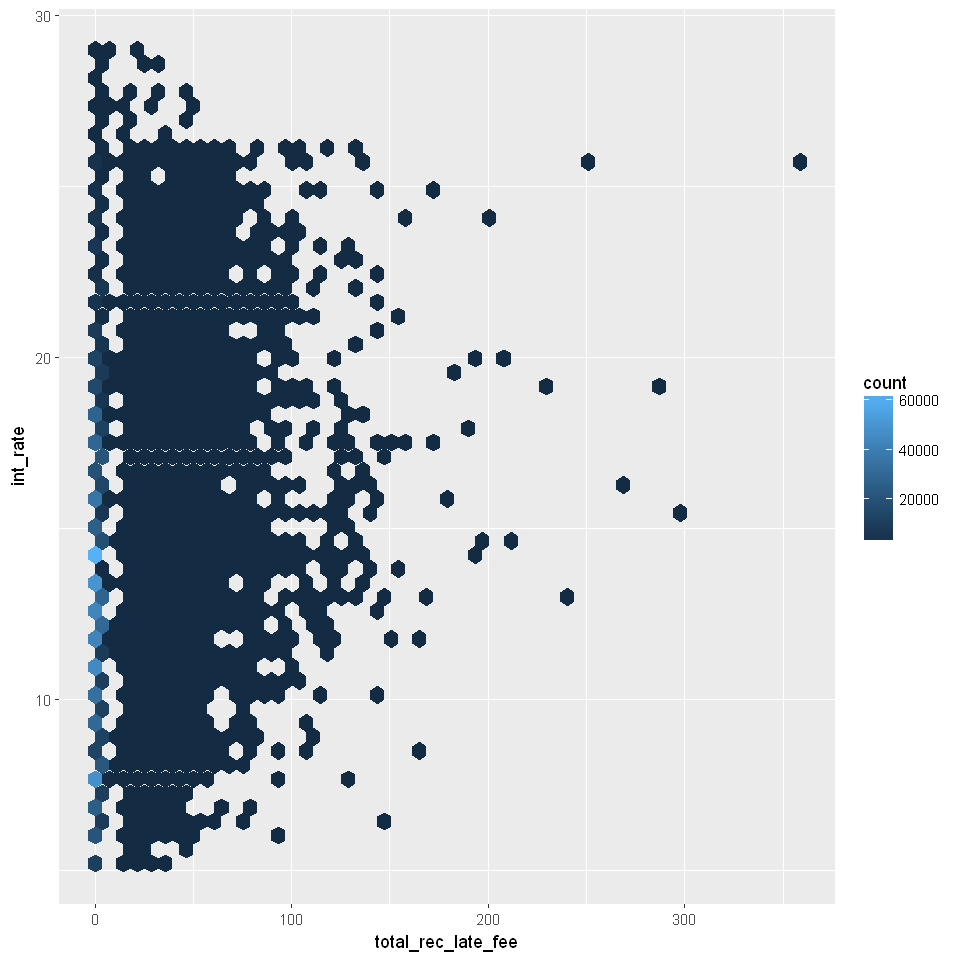

In [282]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(loan, aes(x=total_rec_late_fee, y=int_rate)) + geom_hex(bins=50) #+ stat_smooth(method=lm)

In [283]:
cor(loan$total_rec_late_fee, loan$int_rate)

[1] 0.05715012

### 63. total_rec_prncp
total_rec_prncp : Principal received to date

In [285]:
sum(is.na(loan$total_rec_prncp))/dim(loan)[1]

[1] 0

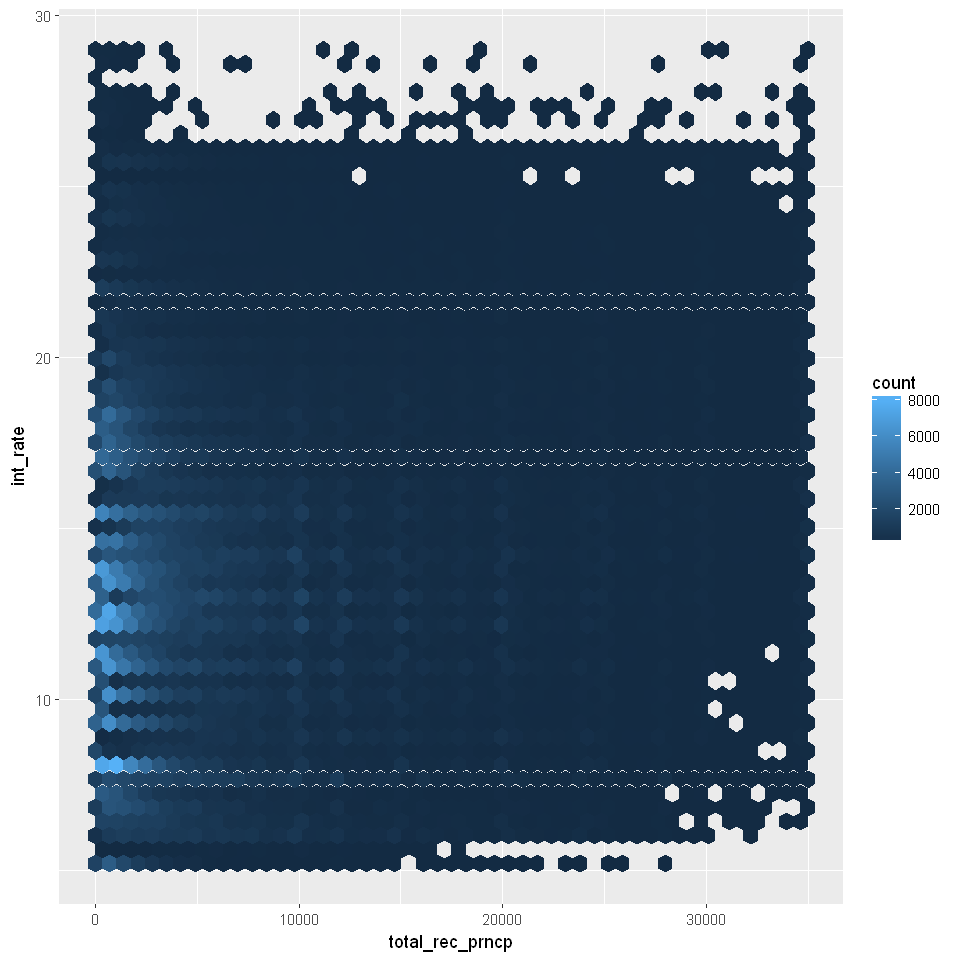

In [286]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(loan, aes(x=total_rec_prncp, y=int_rate)) + geom_hex(bins=50) #+ stat_smooth(method=lm)

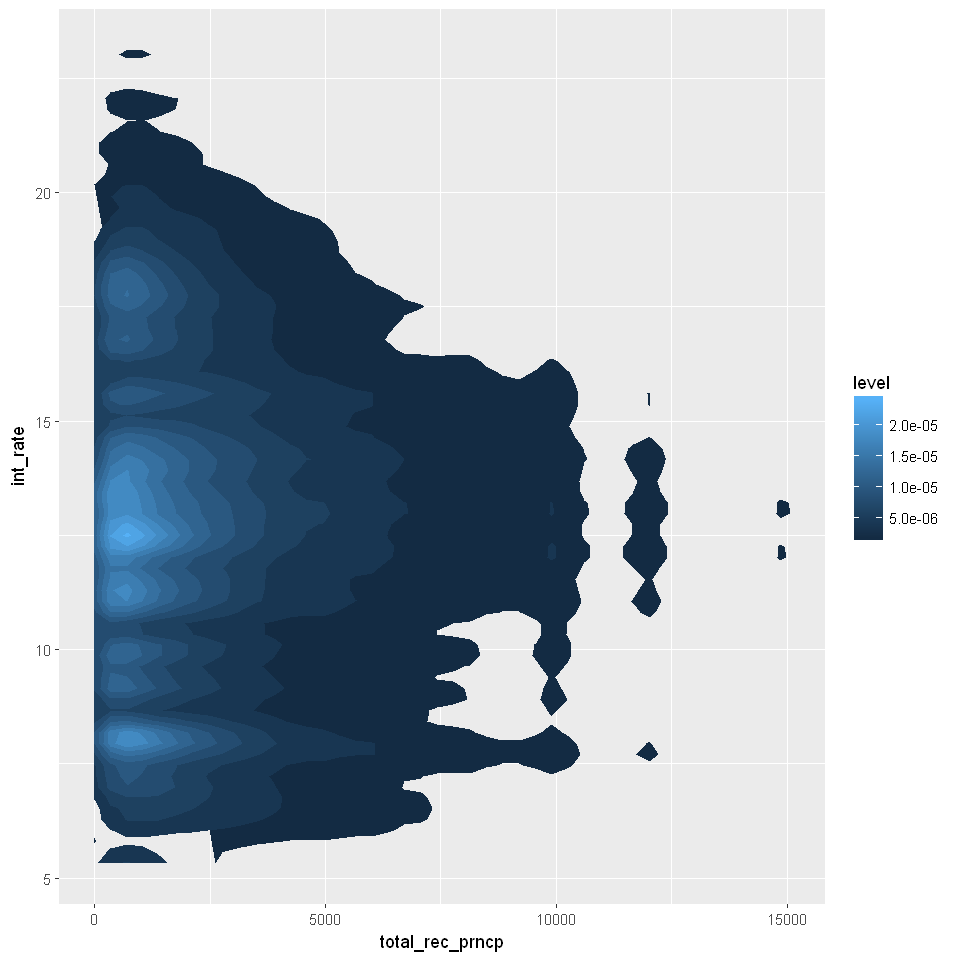

In [287]:
ggplot(loan, aes(x= total_rec_prncp, y=int_rate)) + 
stat_density_2d(aes(fill = ..level..), geom = "polygon")

### 64. collection_recovery_fee
collection_recovery_fee : post charge off collection fee

In [288]:
sum(is.na(loan$collection_recovery_fee))/dim(loan)[1]

[1] 0

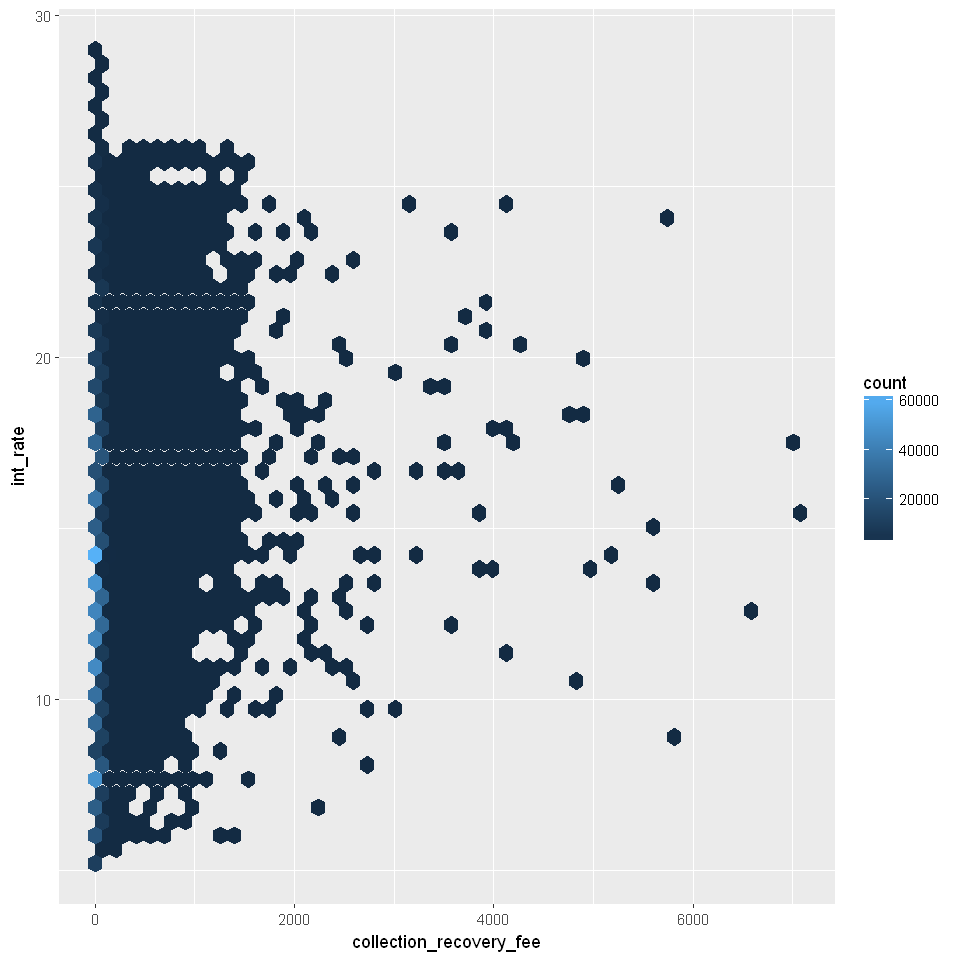

In [289]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(loan, aes(x=collection_recovery_fee, y=int_rate)) + geom_hex(bins=50) #+ stat_smooth(method=lm)

### 65. out_prncp
out_prncp : Remaining outstanding principal for total amount funded

In [291]:
sum(is.na(loan$out_prncp))/dim(loan)[1]

[1] 0

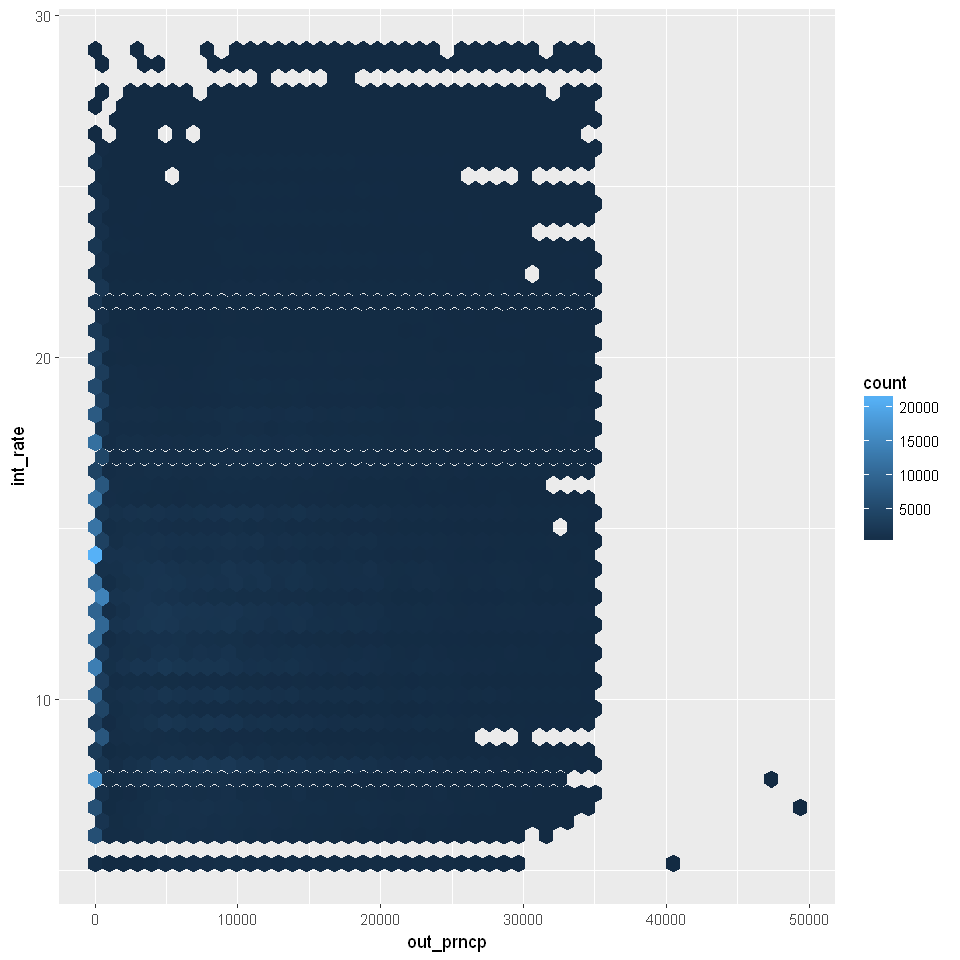

In [292]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(loan, aes(x=out_prncp, y=int_rate)) + geom_hex(bins=50) #+ stat_smooth(method=lm)

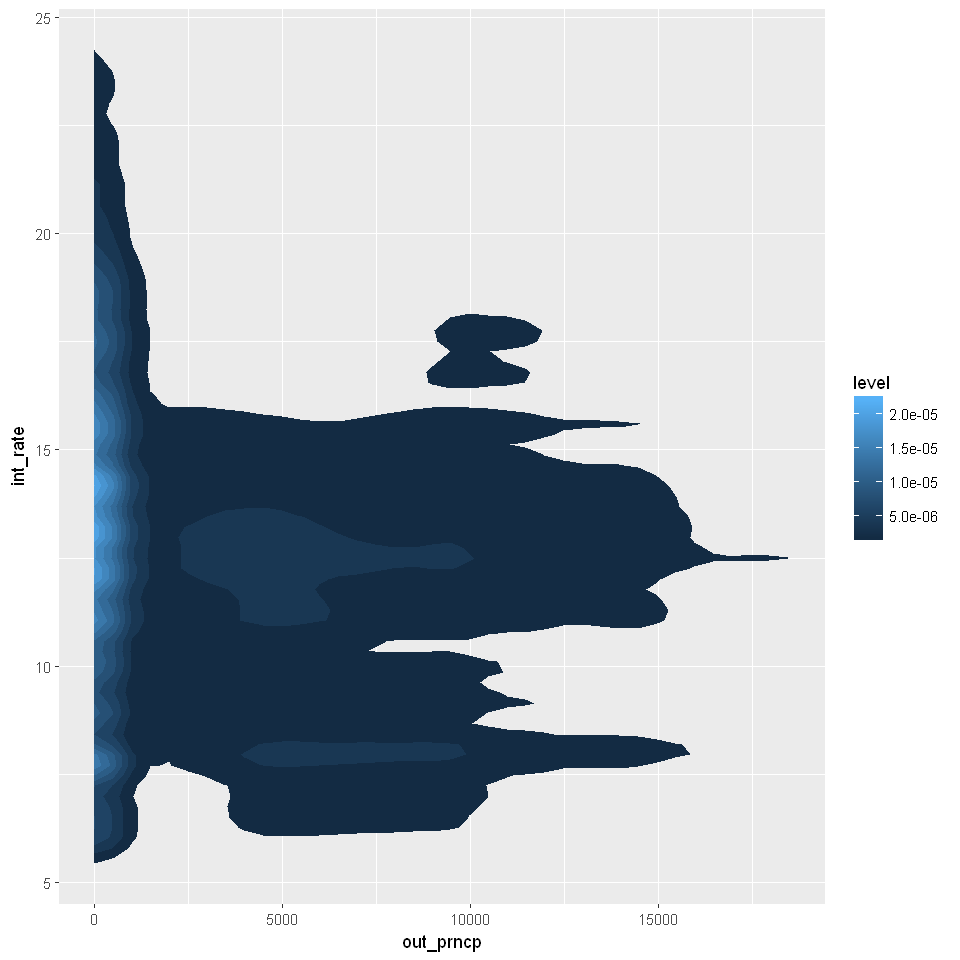

In [293]:
ggplot(loan, aes(x=out_prncp, y=int_rate)) + 
stat_density_2d(aes(fill = ..level..), geom = "polygon")

### 66. out_prncp_inv
out_prncp_inv : Remaining outstanding principal for portion of total amount funded by investors

In [294]:
# keep one is enough
cor(loan$out_prncp, loan$out_prncp_inv)

[1] 0.9999972

## feature engineering
 - use int_rate average in sub_grade group to generate a feature call sub_grade_int_ave
 - do one hot encoding on sub_grade

In [295]:
# sub_grade_int_ave
sub_grade = by(loan$int_rate, loan$sub_grade, mean)
loan$sub_grade_int_ave = sapply(loan$sub_grade, function(x){sub_grade[x]})

In [296]:
# sub_grade_dummy
sub_grade_dummy = model.matrix(~loan$sub_grade)